# MoTLGLM (Poisson Regression)

#### 1.1 Import libraries

In [1]:
import numpy
import pandas

import import_ipynb
import data_analysis
import sklearn_models
import Algorithm_of_MoTLGLM_with_unknown_points_of_interest
import utility_figures

pandas.set_option('display.width', 400)
pandas.set_option('display.max_columns', 400)
pandas.set_option('display.max_rows', 3000)
data_path_reg = './data/'

importing Jupyter notebook from data_analysis.ipynb
importing Jupyter notebook from sklearn_models.ipynb
importing Jupyter notebook from Algorithm_of_MoTLGLM_with_unknown_points_of_interest.ipynb
importing Jupyter notebook from utility_figures.ipynb


#### 1.2 Data

In [2]:
def load_data_reg(data_frame_name):
    if (data_frame_name == 'covid_19_vaccinations_ca') or (data_frame_name == 'covid_19_vaccinations_usa'): 
        df_frame = pandas.read_csv(data_path_reg+'vaccinations_global.csv') # see data via https://docs.owid.io/projects/etl/api/covid/
        df_frame = df_frame[df_frame['country'] == 'Canada'] if data_frame_name == 'covid_19_vaccinations_ca' else df_frame[df_frame['country'] == 'United States']
        df_frame = df_frame[['date', 'total_vaccinations']]
        df_frame['date'] = pandas.to_datetime(df_frame['date'])
        df_frame['year'] = (df_frame['date'].dt.year).astype(int)
        df_frame = df_frame[(df_frame['year'] >= 2020) & (df_frame['year'] <= 2022)]
        
        # handling nan (?) values (do have)
        df_frame.dropna(inplace = True)
        df_frame.reset_index(drop=True, inplace=True)
        df_frame['time'] = df_frame.index.values + 1
        # delete useless variable (do have)
        df_frame.drop(['date', 'year'], axis = 1, inplace = True)
        # handling duplicates rows (doesn't have)

        df_frame['total_vaccinations'] = df_frame['total_vaccinations'].astype(int)
        target_name = 'total_vaccinations'
        if data_frame_name == 'covid_19_vaccinations_ca' :
            data_frame_global_name  = 'Covid 19 vaccinations CA (2020-2022)' + ' ' + str(df_frame.shape)
        else:
            data_frame_global_name  = 'Covid 19 vaccinations USA (2020-2022)' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)
    
    elif (data_frame_name == 'covid_19_hospital_ca') or (data_frame_name == 'covid_19_hospital_usa'):
        df_frame = pandas.read_csv(data_path_reg+'hospital.csv') # see data via https://docs.owid.io/projects/etl/api/covid/
        df_frame = df_frame[df_frame['country'] == 'Canada'] if data_frame_name == 'covid_19_hospital_ca' else df_frame[df_frame['country'] == 'United States']
        df_frame = df_frame[['date', 'daily_occupancy_hosp']]
        df_frame['date'] = pandas.to_datetime(df_frame['date'])
        df_frame['year'] = (df_frame['date'].dt.year).astype(int)
        df_frame = df_frame[(df_frame['year'] >= 2020) & (df_frame['year'] <= 2022)]
        
        # handling nan (?) values (do have)
        df_frame.dropna(inplace = True)
        df_frame.reset_index(drop=True, inplace=True)
        df_frame['time'] = df_frame.index.values + 1
        # delete useless variable (do have)
        df_frame.drop(['date', 'year'], axis = 1, inplace = True)
        # handling duplicates rows (doesn't have)

        df_frame['daily_occupancy_hosp'] = df_frame['daily_occupancy_hosp'].astype(int)
        target_name = 'daily_occupancy_hosp'
        if data_frame_name == 'covid_19_hospital_ca' :
            data_frame_global_name  = 'Covid 19 hospital CA (2020-2022)' + ' ' + str(df_frame.shape)
        else:
            data_frame_global_name  = 'Covid 19 hospital USA (2020-2022)' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)
    
    elif (data_frame_name == 'covid_19_deaths_ca') or (data_frame_name == 'covid_19_deaths_usa') :
        df_frame = pandas.read_csv(data_path_reg+'cases_deaths.csv') # see data via https://docs.owid.io/projects/etl/api/covid/
        df_frame = df_frame[df_frame['country'] == 'Canada'] if data_frame_name == 'covid_19_deaths_ca' else df_frame[df_frame['country'] == 'United States']
        df_frame = df_frame[['date', 'new_deaths']]
        df_frame['date'] = pandas.to_datetime(df_frame['date'])
        df_frame['year'] = (df_frame['date'].dt.year).astype(int)
        df_frame = df_frame[df_frame['year'] == 2020]

        # handling nan (?) values (do have)
        df_frame.dropna(inplace = True)
        df_frame.reset_index(drop=True, inplace=True)
        df_frame['time'] = df_frame.index.values + 1
        # delete useless variable (do have)
        df_frame.drop(['date', 'year'], axis = 1, inplace = True)
        # handling duplicates rows (doesn't have)

        df_frame['new_deaths'] = df_frame['new_deaths'].astype(int)
        target_name = 'new_deaths'
        if data_frame_name == 'covid_19_deaths_ca' :
            data_frame_global_name  = 'Covid 19 deaths CA (2020)' + ' ' + str(df_frame.shape)
        else:
            data_frame_global_name  = 'Covid 19 deaths USA (2020)' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)
        
    elif (data_frame_name == 'covid_19_cases_ca') or (data_frame_name == 'covid_19_cases_usa'):
        df_frame = pandas.read_csv(data_path_reg+'cases_deaths.csv') # see data via https://docs.owid.io/projects/etl/api/covid/
        df_frame = df_frame[df_frame['country'] == 'Canada'] if data_frame_name == 'covid_19_cases_ca' else df_frame[df_frame['country'] == 'United States']
        df_frame = df_frame[['date', 'new_cases']]
        df_frame['date'] = pandas.to_datetime(df_frame['date'])
        df_frame['year'] = (df_frame['date'].dt.year).astype(int)
        df_frame = df_frame[df_frame['year'] == 2020]

        # handling nan (?) values (do have)
        df_frame.dropna(inplace = True)
        df_frame.reset_index(drop=True, inplace=True)
        df_frame['time'] = df_frame.index.values + 1
        # delete useless variable (do have)
        df_frame.drop(['date', 'year'], axis = 1, inplace = True)
        # handling duplicates rows (doesn't have)

        df_frame['new_cases'] = df_frame['new_cases'].astype(int)
        target_name = 'new_cases'
        if data_frame_name == 'covid_19_cases_ca':
            data_frame_global_name  = 'Covid 19 cases CA (2020)' + ' ' + str(df_frame.shape)
        else:
            data_frame_global_name  = 'Covid 19 cases USA (2020)' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)
    
    elif data_frame_name == 'Medpar_data':
        df_frame = pandas.read_csv(data_path_reg+'Medpar.txt') # see data via https://beshstat.eu/wp-content/uploads/download-manager-files/medpar.csv or see https://rdrr.io/cran/msme/man/medpar.html
        for col in df_frame.columns:
            df_frame[col] = df_frame[col].astype(object) if col != 'los' else df_frame[col]
        
        # handling nan (?) values (doesn't have)
        # delete useless variable (do have)
        df_frame.drop(['type1', 'type2', 'type3', 'provnum'], axis = 1, inplace = True)
        # handling duplicates rows (do have)
        df_frame.drop_duplicates(inplace=True)
        
        target_name = 'los'
        data_frame_global_name  = 'Medpar data*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)
        
    elif (data_frame_name == 'AER_credit_card_data_1') or (data_frame_name == 'AER_credit_card_data_2'):
        df_frame = pandas.read_csv(data_path_reg+'AER_credit_card_data.csv') # see data via https://www.kaggle.com/datasets/like1008/aer-credit-card-datacsv

        # handling nan (?) values (doesn't have)
        # delete useless variable (doesn't have)
        # handling duplicates rows (doesn't have)
        
        if data_frame_name == 'AER_credit_card_data_1':
            target_name = 'active'
        else:
            target_name = 'reports'

        data_frame_global_name  = 'AER credit card data*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)

    elif (data_frame_name == 'Nigerian_Road_Traffic_Crashes_2020_2024_1') or (data_frame_name == 'Nigerian_Road_Traffic_Crashes_2020_2024_2'):
        df_frame = pandas.read_csv(data_path_reg+'Nigerian_Road_Traffic_Crashes_2020_2024.csv') # see data via https://www.kaggle.com/datasets/akinniyiakinwande/nigerian-traffic-crashes-2020-2024/data or see https://www.kaggle.com/code/akinniyiakinwande/poisson-regression-of-nigerian-traffic-crashes
        df_frame.rename(columns=str.lower, inplace=True)
        
        # handling nan (?) values (doesn't have)
        # delete useless variable (doesn't have)
        # handling duplicates rows (doesn't have)

        if data_frame_name == 'Nigerian_Road_Traffic_Crashes_2020_2024_1':
            target_name = 'total_crashes'
        else:
            target_name = 'num_killed'
        
        data_frame_global_name  = 'Nigerian Traffic Crashes (2020-2024)*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)

    elif data_frame_name == 'Number_of_publications':
        df_frame = pandas.read_stata(data_path_reg+'couart4.dta') # see data via https://academicweb.nd.edu/~rwilliam/statafiles/couart4.dta or see page 231 of http://investigadores.cide.edu/aparicio/data/refs/Long%26Freese_RegModelsUsingStata_2001.pdf
        columns = ['art', 'female', 'married', 'kid5', 'phd', 'mentor']
        df_frame = df_frame[columns]
        df_frame['art'] = df_frame['art'].astype(int)
        df_frame['female'] = df_frame['female'].astype(object)
        df_frame['married'] = df_frame['married'].astype(object)
        df_frame['kid5'] = df_frame['kid5'].astype(int)
        df_frame['phd'] = df_frame['phd'].astype(float)
        df_frame['mentor'] = df_frame['mentor'].astype(int)
        
        # handling nan (?) values (doesn't have)
        # delete useless variable (doesn't have)
        # handling duplicates rows (do have)
        df_frame.drop_duplicates(inplace=True)
        
        target_name = 'art'
        data_frame_global_name  = 'Couart2*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)

    elif data_frame_name == 'School_administrators_study':
        df_frame = pandas.read_stata("https://stats.idre.ucla.edu/stat/stata/dae/nb_data.dta") # see data via https://stats.oarc.ucla.edu/r/dae/negative-binomial-regression/
        df_frame["prog"] = df_frame["prog"].map({1: "General", 2: "Academic", 3: "Vocational"}) #program 1=General, 2=Academic, 3=Vocational
        
        # handling nan (?) values (doesn't have)
        # delete useless variable (do have)
        df_frame.drop(['id'], axis = 1, inplace = True)
        # handling duplicates rows (do have)
        df_frame.drop_duplicates(inplace=True)

        df_frame['daysabs'] = df_frame['daysabs'].astype(int)
        target_name = 'daysabs'
        data_frame_global_name  = 'School administrators*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)

    elif data_frame_name == 'Mullahy':
        df_frame = pandas.read_csv(data_path_reg+'Doctorvisits.txt', delimiter=',') # see data via http://qed.econ.queensu.ca/jae/1997-v12.3/mullahy/ or https://vincentarelbundock.github.io/Rdatasets/csv/AER/DoctorVisits.csv
        
        # handling nan (?) values (doesn't have)
        # delete useless variable (do have)
        df_frame.drop(['rownames'], axis = 1, inplace = True)
        # handling duplicates rows (do have)
        df_frame.drop_duplicates(inplace=True)
        
        target_name = 'visits'
        data_frame_global_name  = 'Mullahy 1997*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)

    elif data_frame_name == 'DebTrivedi':
        df_frame = pandas.read_csv(data_path_reg+'NMES_OLD.DT', delimiter=' ', header=None) # see data via http://qed.econ.queensu.ca/jae/1997-v12.3/deb-trivedi/ or https://www.rdocumentation.org/packages/RAZIAD/versions/0.0.1/topics/DebTrivedi
        columns = ['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth', 'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'black', 'male', 'married', 'school', 'faminc', 'employed', 'privins', 'medicaid']
        df_frame.columns = columns
        
        # handling nan (?) values (doesn't have)
        # delete useless variable (doesn't have)
        # handling duplicates rows (doesn't have)
        
        target_name = 'ofp'
        data_frame_global_name  = 'DebTrivedi 1997*' + ' ' + str(df_frame.shape)

        print('Data shape : ', df_frame.shape)
        
    return df_frame, target_name, data_frame_global_name
    

In [3]:
# An overview of the descriptive statistics of each data set.
names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa', 'Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, Means, Variances, Minimums, Maximums = [], [], [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    Means.append(df[target_name].mean().round(2))
    Variances.append(round((df[target_name].std())**2, 2))
    Minimums.append(df[target_name].min())
    Maximums.append(df[target_name].max())

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 'Minimum':Minimums, 'Maximum':Maximums, 'Mean':Means, 'Variance':Variances})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)


Data shape :  (739, 2)
Data shape :  (749, 2)
Data shape :  (1005, 2)
Data shape :  (900, 2)
Data shape :  (363, 2)
Data shape :  (363, 2)
Data shape :  (362, 2)
Data shape :  (363, 2)
Data shape :  (414, 6)
Data shape :  (1319, 12)
Data shape :  (1319, 12)
Data shape :  (518, 11)
Data shape :  (518, 11)
Data shape :  (885, 6)
Data shape :  (293, 4)
Data shape :  (3870, 12)
Data shape :  (4406, 22)


In [4]:
SUMMARY

,Data set,Target,Minimum,Maximum,Mean,Variance
0,"AER credit card data* (1319, 12)",active,0,46,7.000000e+00,3.976000e+01
1,"AER credit card data* (1319, 12)",reports,0,14,4.600000e-01,1.810000e+00
2,"Couart2* (885, 6)",art,0,19,1.730000e+00,3.770000e+00
3,"Covid 19 cases CA (2020) (362, 2)",new_cases,0,8129,1.562180e+03,3.957724e+06
4,"Covid 19 cases USA (2020) (363, 2)",new_cases,0,246505,5.393274e+04,3.557357e+09
5,"Covid 19 deaths CA (2020) (363, 2)",new_deaths,0,222,4.208000e+01,2.722110e+03
6,"Covid 19 deaths USA (2020) (363, 2)",new_deaths,0,3389,9.697100e+02,6.361547e+05
7,"Covid 19 hospital CA (2020-2022) (1005, 2)",daily_occupancy_hosp,251,11489,3.560270e+03,6.058868e+06
8,"Covid 19 hospital USA (2020-2022) (900, 2)",daily_occupancy_hosp,9866,154497,4.807976e+04,1.087884e+09
9,"Covid 19 vaccinations CA (2020-2022) (739, 2)",total_vaccinations,5,96303716,5.792326e+07,1.068797e+15


#### 1.3 Data visualization

In [ ]:
name = 'covid_19_cases_ca'
df, target_name, DataName = load_data_reg(name)
numeric_vars, category_vars = data_analysis.num_and_cat_features(df, print_var=True)


#from scipy.io.arff import loadarff
#import pandas as pd

#raw_data = loadarff(data_path_reg+'rmftsa_ladata.arff')
#df = pd.DataFrame(raw_data[0])
#target_name = 'Respiratory_Mortality'
#numeric_vars, category_vars = data_analysis.num_and_cat_features(df, print_var=True)

In [ ]:
# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# See the distributions
for col in df[numeric_vars]:
    if col == target_name:
        continue

    plt.scatter(df[col], df[target_name], color='blue', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target_name)
    plt.title(f'{col} vs {target_name}')
    plt.show()

In [ ]:
data_analysis.data_visualisation(df, name, 1)

In [ ]:
data_analysis.data_visualisation(df, name, 2)

In [ ]:
data_analysis.data_visualisation(df, name, 3)

In [ ]:
data_analysis.data_visualisation(df, name, 4)

#### 1.4 Learning

In [5]:
##### Parameters Setting
train_size=0.70
lr=0.1
lambda_param=100
max_iters=2000
lambda_validation=True
times=10
check_multicollinearity=True
return_flag='simple'

##### 1.4.1 Learning of MoTLM with n=0

In [ ]:
names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa', 'Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names = [], []
Poisson_model_mse_scores, MoTLGLM_mse_scores = [], []
Poisson_model_mpd_scores, MoTLGLM_mpd_scores = [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of classical Poisson regression
    Poisson_summary = sklearn_models.Poisson_regression(df.copy(), target_name, train_size=train_size, C_param=100, C_validation=True, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    print(f'Poisson_summary = {Poisson_summary}')
    
    # Learning of our MoTLGLM regressors
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg_n_0(df.copy(), target_name, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    print(f'Ours_summary = {Ours_summary}')

    Poisson_model_mse_scores.append(Poisson_summary.loc['Testing set', 'MSE'])
    Poisson_model_mpd_scores.append(Poisson_summary.loc['Testing set', 'MPD'])
    
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'Poisson Model (MSE)':numpy.array(Poisson_model_mse_scores), 'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores),
                            'Poisson Model (MPD)':numpy.array(Poisson_model_mpd_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)
                           })

SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)


In [ ]:
SUMMARY #n=0

##### 1.4.2 Learning of MoTLM with n=1

In [ ]:
n_points = 1
names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa', 'Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, MoTLGLM_mse_scores, MoTLGLM_mpd_scores = [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of our Mixtures of tranparent local generalized linear model (regressors)
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    
    print(f'Ours_summary = {Ours_summary}')
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)
 

In [ ]:
SUMMARY #n=1

###### 1.4.2 Plot MoTLGLM result for covid-19 dataset (cases)

Data shape :  (362, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 1, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (10 random restarts for each lambda) :   0%|          | 0/9 [00:00<?, ?it/s]

Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:46<00:00,  5.16s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:47<07:08, 47.64s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    586.5522  344043.5018  159.0167   218.5855   218.8502
Validation set  760.2069  577914.5262  166.7613   254.1603    254.425
Testing set     530.9025  281857.4401   144.047   169.8436   170.1083
C = [[-0.65208069]], Epsilon = [0.005177], lambda_param = 253.0
K = [12.67111857], TAU = [32.103504]
W = [[-0.11234154]], MU = [6.92827]
w_ext = [2.06949139], mu_ext = 5.723106
RHO = [0.02795037], SIGMA = [0.021149]
rho_ext = 0.019611032896067172, sigma_ext = 0.025144


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.78s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [01:31<06:05, 45.65s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    578.7578  334960.5951   139.567    200.961   200.9636
Validation set  601.2314    361479.22  151.0666   188.0264    188.029
Testing set     537.6251  289040.7251  163.5865   247.4356   247.4382
C = [[-0.57294078]], Epsilon = [0.005459], lambda_param = 25300.0
K = [15.69709157], TAU = [40.519123]
W = [[-0.37123869]], MU = [6.82249]
w_ext = [1.98765987], mu_ext = 5.66892
RHO = [0.02452718], SIGMA = [0.023319]
rho_ext = 0.020586260062647778, sigma_ext = 0.025026


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:44<00:00,  4.90s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [02:17<05:18, 45.48s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    577.9479  334023.8292  154.3925   219.4308    245.609
Validation set   478.889  229334.6286  112.0281   208.0486   234.2268
Testing set     679.4954  461713.9328  186.1923   220.6213   246.7995
C = [[-0.61550797]], Epsilon = [0.00522], lambda_param = 2.5300000000000002
K = [12.10335776], TAU = [30.314252]
W = [[-0.11200294]], MU = [6.960603]
w_ext = [2.00280567], mu_ext = 5.64459
RHO = [0.03460917], SIGMA = [0.022464]
rho_ext = 0.020172794364113338, sigma_ext = 0.025345


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:46<00:00,  5.22s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [03:05<04:39, 46.60s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    559.1241  312619.7878  147.9348    203.458    203.458
Validation set  677.6029   459145.726   168.975   244.3466   244.3466
Testing set     498.8811  248882.3462   142.421   214.4273   214.4273
C = [[-0.65246937]], Epsilon = [0.000142], lambda_param = 2530000.0
K = [13.38263786], TAU = [34.411207]
W = [[-0.18388034]], MU = [6.927582]
w_ext = [1.96073812], mu_ext = 5.782662
RHO = [0.004973], SIGMA = [0.024603]
rho_ext = 0.02224098991151145, sigma_ext = 0.026701


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:41<00:00,  4.64s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [03:48<03:46, 45.28s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    550.6455  303210.5042  134.2543   207.6171   207.8732
Validation set  603.9826   364795.031   125.325   206.1499    206.406
Testing set     559.2956  312811.5784  182.8373   350.2783   350.5344
C = [[-0.57704978]], Epsilon = [0.008354], lambda_param = 253.0
K = [10.3926622], TAU = [26.384692]
W = [[-0.47656383]], MU = [6.769015]
w_ext = [1.8808023], mu_ext = 5.702809
RHO = [0.02681683], SIGMA = [0.023222]
rho_ext = 0.019999821351099144, sigma_ext = 0.025815


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:44<00:00,  4.98s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [04:34<03:02, 45.53s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    536.9974  288366.1729  137.3605   237.6868   237.6894
Validation set   727.574  529363.8815  154.7476    219.966   219.9685
Testing set     598.8584  358631.3812  157.0777   330.1221   330.1247
C = [[-0.53580161]], Epsilon = [0.021362], lambda_param = 25300.0
K = [10.16118032], TAU = [25.181285]
W = [[-0.20041198]], MU = [6.885709]
w_ext = [1.99660176], mu_ext = 5.586073
RHO = [0.02132643], SIGMA = [0.021146]
rho_ext = 0.020584966152139866, sigma_ext = 0.025471


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.72s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [05:18<02:14, 44.88s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    583.6202  340612.4987  154.8204   222.0002   224.5828
Validation set  500.7169  250717.4573  130.0512    179.832   182.4146
Testing set     770.6034  593829.5671   151.945   241.3893   243.9719
C = [[-0.57249846]], Epsilon = [0.007441], lambda_param = 25.3
K = [12.40505797], TAU = [31.915112]
W = [[-0.12643999]], MU = [6.933066]
w_ext = [2.05596637], mu_ext = 5.503624
RHO = [0.02843192], SIGMA = [0.020434]
rho_ext = 0.020837428641373872, sigma_ext = 0.024484


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:43<00:00,  4.87s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [06:03<01:29, 44.94s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    568.2325   322888.164  134.4642   206.4416   206.4673
Validation set  374.7563  140442.2621  119.9261   201.7581   201.7837
Testing set     819.2973  671248.0708  172.0076    270.762   270.7877
C = [[-0.55758867]], Epsilon = [0.019718], lambda_param = 2530.0
K = [15.68537848], TAU = [41.241446]
W = [[-0.38581322]], MU = [6.846536]
w_ext = [2.04998549], mu_ext = 5.633332
RHO = [0.02026986], SIGMA = [0.023505]
rho_ext = 0.02064755925606782, sigma_ext = 0.024898


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:43<00:00,  4.81s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [06:47<00:44, 44.79s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set     612.331  374949.2712  166.3627   225.0476   227.7369
Validation set  505.3218  255350.1191  150.5431   219.2918    221.981
Testing set     497.5162  247522.3341  118.5298   177.7401   180.4294
C = [[-0.62738987]], Epsilon = [0.003256], lambda_param = 25.3
K = [11.79405381], TAU = [29.81412]
W = [[0.11962453]], MU = [7.094025]
w_ext = [1.98315187], mu_ext = 5.686693
RHO = [0.02865192], SIGMA = [0.022954]
rho_ext = 0.019744363198168583, sigma_ext = 0.025499


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:47<00:00,  5.26s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [07:36<00:00, 45.61s/it]
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic 

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    609.1602  371076.1993  159.9564    226.288   226.2882
Validation set  448.1048  200797.9243   141.286   200.6041   200.6044
Testing set      593.505    352248.17  105.8098   170.6785   170.6787
C = [[-0.62538784]], Epsilon = [0.011227], lambda_param = 253000.0
K = [13.13100364], TAU = [33.209866]
W = [[-0.07849853]], MU = [6.989244]
w_ext = [2.02049958], mu_ext = 5.643374
RHO = [0.02197913], SIGMA = [0.022973]
rho_ext = 0.02016682772078128, sigma_ext = 0.025205
*********** END ***********
C = [[-0.5988715]], BETA = [0.3927673]
W = [[-0.19275665]], MU = [6.915654]
w_ext = [2.00077024], mu_ext = 5.657518


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

*********************************************** The Poisson Regression ***********************************************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, C_validation = True, times = 10


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

summary =                     RMSE          MSE       MPD
Training set    821.5315  675214.2492  619.4824
Validation set  774.1845  604212.4972  544.6791
Testing set     788.5002  624378.8334  598.9835


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 1, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:23<00:00,  2.64s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:24<03:44, 24.99s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    23155.6299  536183194.8482  7016.6208  7453.1824  7454.1718
Validation set  19317.6105  373170076.2117  5954.1687  6612.4815  6613.4709
Testing set     22737.6517  517000806.9951  6609.1161  7216.8275  7217.8169
C = [[-2.40800211]], Epsilon = [0.], lambda_param = 254.0
K = [50.95735501], TAU = [35.277884]
W = [[6.41026085]], MU = [15.065145]
w_ext = [1.01372814], mu_ext = 10.480707
RHO = [0.01109975], SIGMA = [0.015145]
rho_ext = 0.034924679877986135, sigma_ext = 0.0189


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:24<00:00,  2.72s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [00:50<03:22, 25.37s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    21357.0085  456121812.9195  8295.7222  8653.5637  8653.5637
Validation set  20878.8461   435926214.345  7681.3506  7768.6369   7768.637
Testing set     18338.2871  336292772.4834   6216.291  7085.6996  7085.6997
C = [[-0.6016497]], Epsilon = [0.000297], lambda_param = 2540000.0
K = [17.45457329], TAU = [59.080086]
W = [[-0.6966391]], MU = [9.73371]
w_ext = [1.28119773], mu_ext = 10.116306
RHO = [0.00031353], SIGMA = [0.006195]
rho_ext = 0.02335308331542733, sigma_ext = 0.02886


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:25<00:00,  2.81s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [01:17<03:01, 25.90s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    22631.4639  512183156.8807  6735.1888  7208.3943  7209.3297
Validation set  21611.2569   467046424.066   6059.158  6773.6069  6774.5423
Testing set     22434.8016  503320323.6466  7977.7863  8252.9193  8253.8547
C = [[-2.26788144]], Epsilon = [0.], lambda_param = 254.0
K = [43.61580394], TAU = [32.598032]
W = [[6.19484073]], MU = [14.633981]
w_ext = [1.02818776], mu_ext = 10.45596
RHO = [0.01927998], SIGMA = [0.024165]
rho_ext = 0.03216341882175497, sigma_ext = 0.019019


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:25<00:00,  2.88s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [01:44<02:38, 26.39s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    23003.2685  529150361.2546  7083.2437   7480.032  7480.9908
Validation set  20427.5886  417286375.5961   5914.333  6455.7315  6456.6902
Testing set     21428.8146  459194093.4283  6781.4881  7216.9525  7217.9113
C = [[-2.26451529]], Epsilon = [0.], lambda_param = 254.0
K = [43.27461133], TAU = [33.454649]
W = [[6.3381313]], MU = [15.111603]
w_ext = [1.03327976], mu_ext = 10.473171
RHO = [0.0118293], SIGMA = [0.014782]
rho_ext = 0.03468172635009386, sigma_ext = 0.018734


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:24<00:00,  2.70s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [02:09<02:10, 26.08s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    22515.6335   506953754.027   6660.098  7123.0042  7123.9592
Validation set  20799.9789  432639121.7482  6806.0864   7452.139   7453.094
Testing set      23888.839  570676628.2422    7353.83  7890.0124  7890.9674
C = [[-2.36016516]], Epsilon = [0.], lambda_param = 254.0
K = [48.93017753], TAU = [34.678732]
W = [[6.28151863]], MU = [14.777516]
w_ext = [0.99459283], mu_ext = 10.459092
RHO = [0.00513934], SIGMA = [0.00752]
rho_ext = 0.035917833215434444, sigma_ext = 0.019016


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:24<00:00,  2.72s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [02:35<01:44, 26.00s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    16997.9695  288930968.5837   3844.216  4954.9302  4954.9302
Validation set  24306.0376  590783465.2214  5767.0994   6266.922  6266.9221
Testing set     14558.8212  211959274.4484  4267.8805  5611.1837  5611.1838
C = [[-0.25127424]], Epsilon = [7.2e-05], lambda_param = 2540000.0
K = [30.20302748], TAU = [40.36757]
W = [[0.88810951]], MU = [10.619339]
w_ext = [1.57630348], mu_ext = 9.656978
RHO = [0.04786857], SIGMA = [0.009054]
rho_ext = 0.023433272683869293, sigma_ext = 0.005485


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:24<00:00,  2.70s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [03:01<01:17, 25.85s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18385.8796  338040568.5111   3823.715  5029.6604  5035.3479
Validation set  17950.2225  322210489.5317  4060.4179  5451.5071  5457.1946
Testing set      19129.758  365947641.0035  3802.5309  4961.9701  4967.6577
C = [[-0.24437855]], Epsilon = [0.004339], lambda_param = 25.400000000000002
K = [30.68695823], TAU = [41.071153]
W = [[0.91466167]], MU = [10.611635]
w_ext = [1.82680529], mu_ext = 9.384178
RHO = [1.17612447e-09], SIGMA = [0.013043]
rho_ext = 0.020344086391424127, sigma_ext = 0.009149


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:25<00:00,  2.79s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [03:27<00:51, 25.95s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    19825.9789  393069437.3882  4024.8581  5675.1897  5675.1898
Validation set  14488.7805   209924760.173  3313.0346  5613.0222  5613.0222
Testing set     29633.1344   878122654.731  6532.6185  7657.8996  7657.8996
C = [[-0.20086997]], Epsilon = [1.1e-05], lambda_param = 2540000.0
K = [22.51087349], TAU = [27.53787]
W = [[0.80856797]], MU = [10.556088]
w_ext = [2.10523491], mu_ext = 8.924026
RHO = [0.02603546], SIGMA = [0.01224]
rho_ext = 0.02216744374264726, sigma_ext = 0.012723


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:24<00:00,  2.75s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [03:53<00:25, 25.96s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    23243.8942  540278619.0555  6972.4655  7442.6897  7443.6637
Validation set  20670.4157  427266085.7032  6436.2587  7011.0969  7012.0709
Testing set     20156.0912  406268012.5268  6329.2766  6678.0342  6679.0082
C = [[-2.35277665]], Epsilon = [0.], lambda_param = 254.0
K = [53.16667023], TAU = [37.630312]
W = [[6.56842585]], MU = [15.019383]
w_ext = [1.01955521], mu_ext = 10.470648
RHO = [0.00810537], SIGMA = [0.011344]
rho_ext = 0.03450883452794522, sigma_ext = 0.019373


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 9/9 [00:24<00:00,  2.76s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [04:19<00:00, 25.94s/it]
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic 

summary_random=                      RMSE            MSE        MPD Gibbs_risk Risk_bound
Training set    22454.0041  504182301.642   6496.412  7054.3058  7055.2624
Validation set   21412.816  458508690.222  7397.3266  7791.3903   7792.347
Testing set      24007.354  576353046.991   7551.388  7877.8293  7878.7859
C = [[-2.40013349]], Epsilon = [0.], lambda_param = 254.0
K = [51.21129958], TAU = [35.350825]
W = [[6.22822429]], MU = [14.782498]
w_ext = [1.00870598], mu_ext = 10.472325
RHO = [0.00694795], SIGMA = [0.010205]
rho_ext = 0.03489235262368251, sigma_ext = 0.019012
*********** END ***********
C = [[-1.53516466]], BETA = [1.0956716]
W = [[3.99361017]], MU = [13.09109]
w_ext = [1.28875911], mu_ext = 10.089339


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

*********************************************** The Poisson Regression ***********************************************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, C_validation = True, times = 10


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

summary =                       RMSE           MSE         MPD
Training set    22060.9631  4.869445e+08   9600.4445
Validation set  21655.1022  4.723747e+08   9761.8854
Testing set     22120.4809  4.912012e+08  10030.9311


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

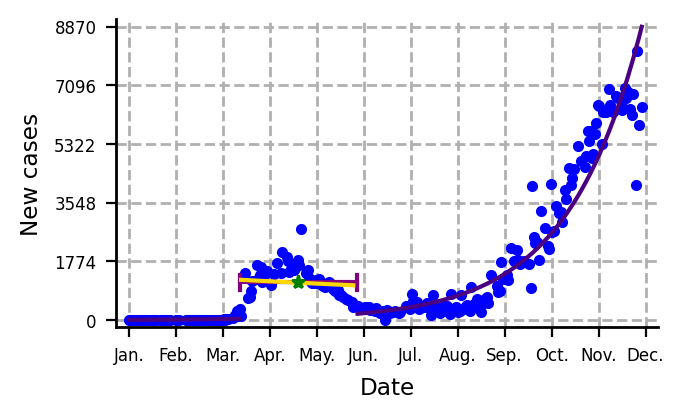

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman


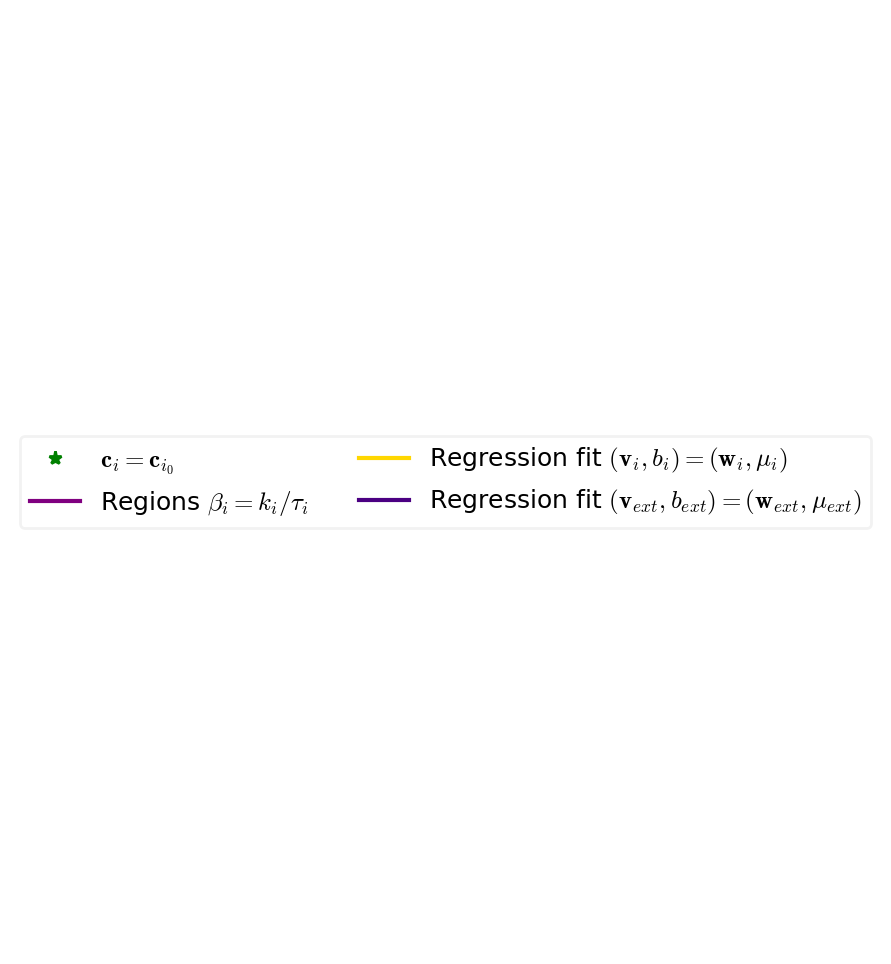

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

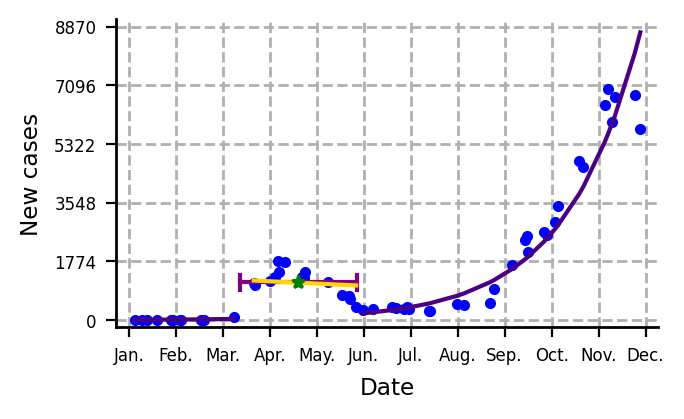

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman


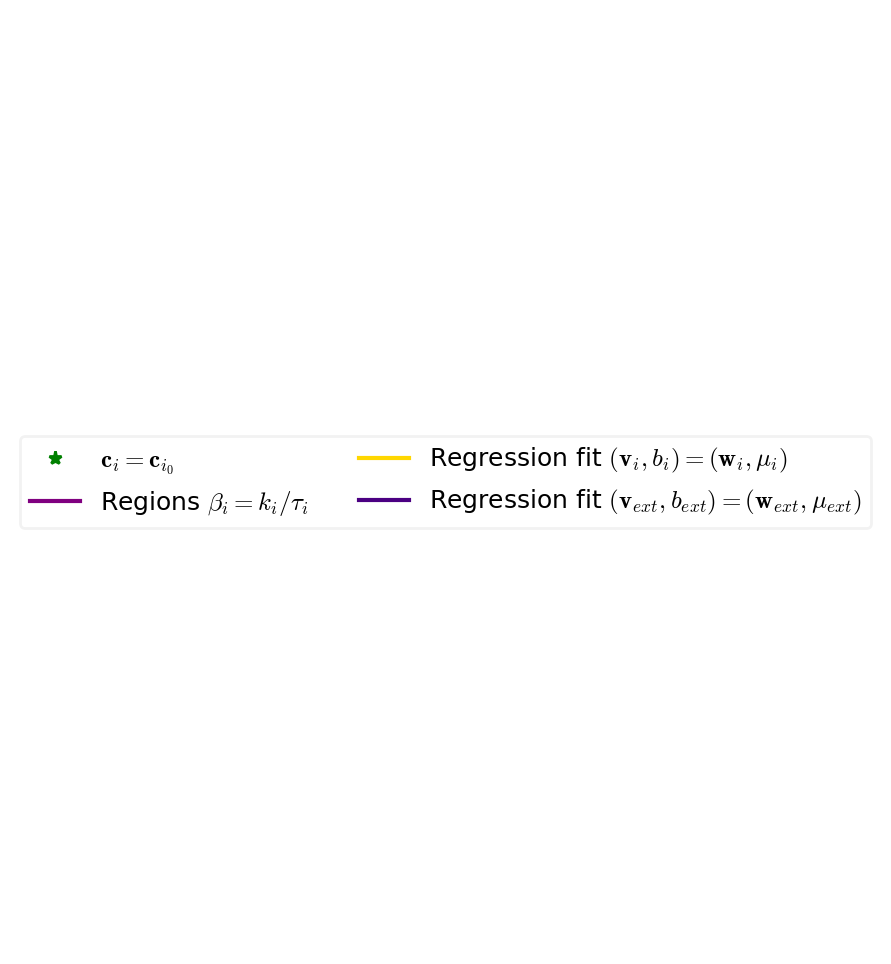

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

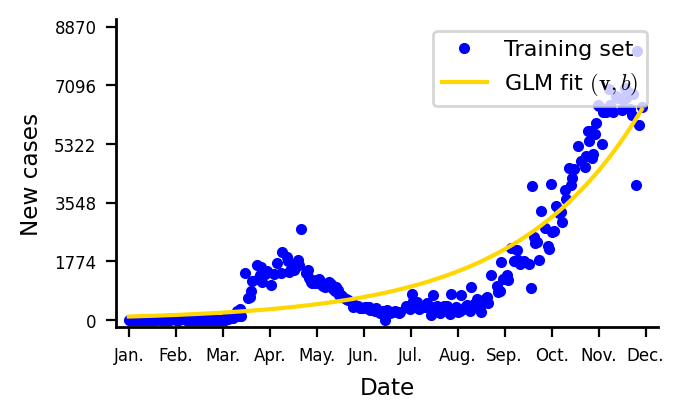

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

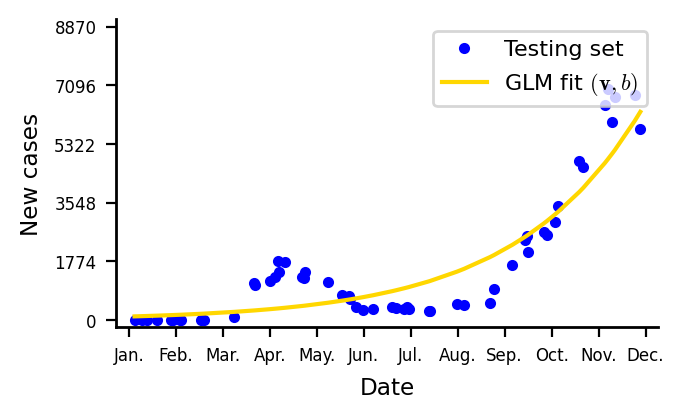

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

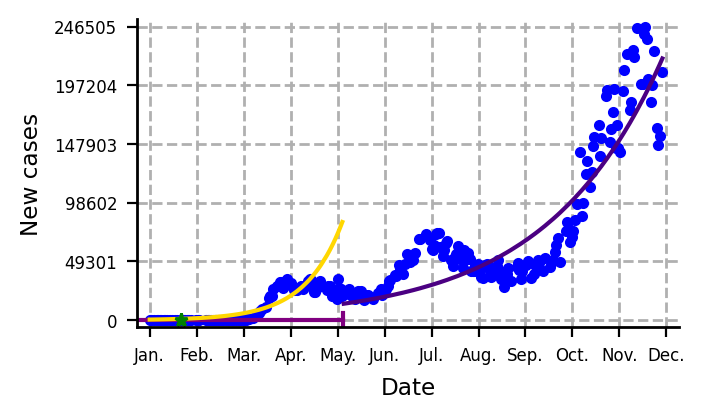

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman


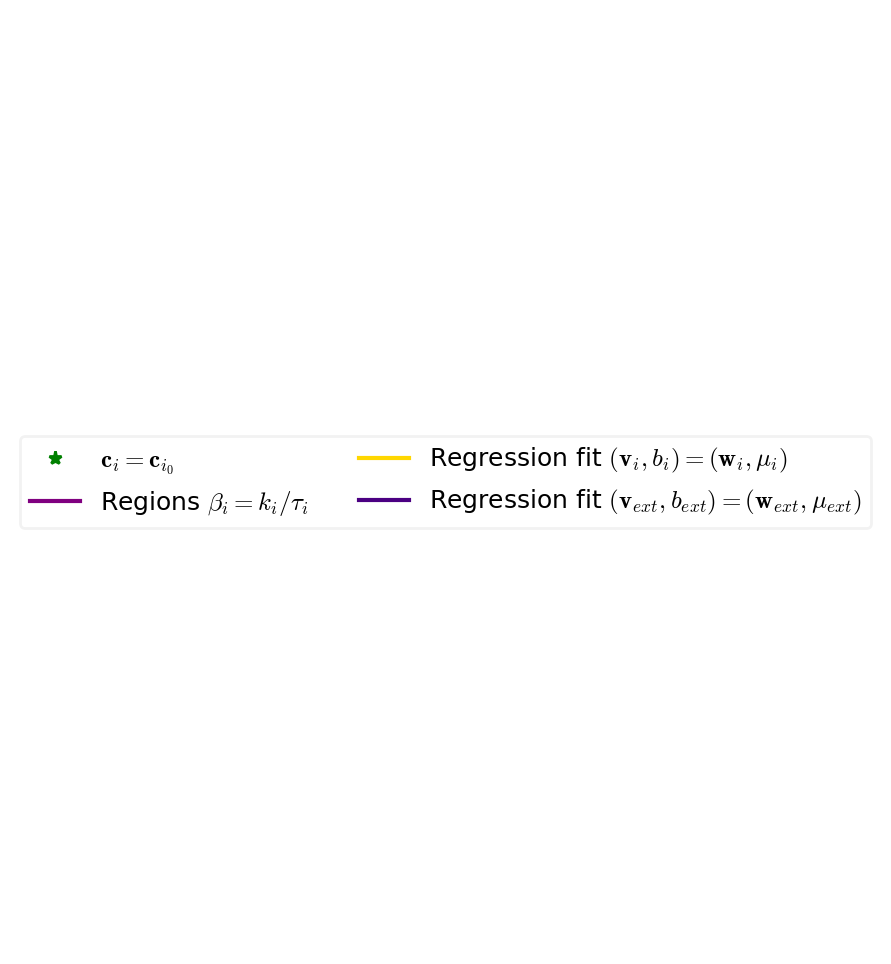

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

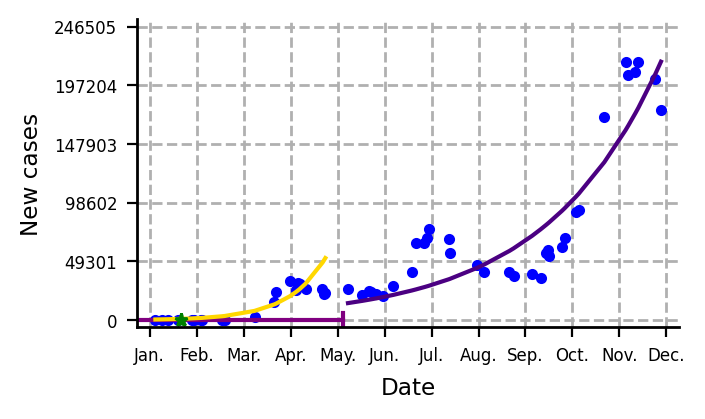

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman


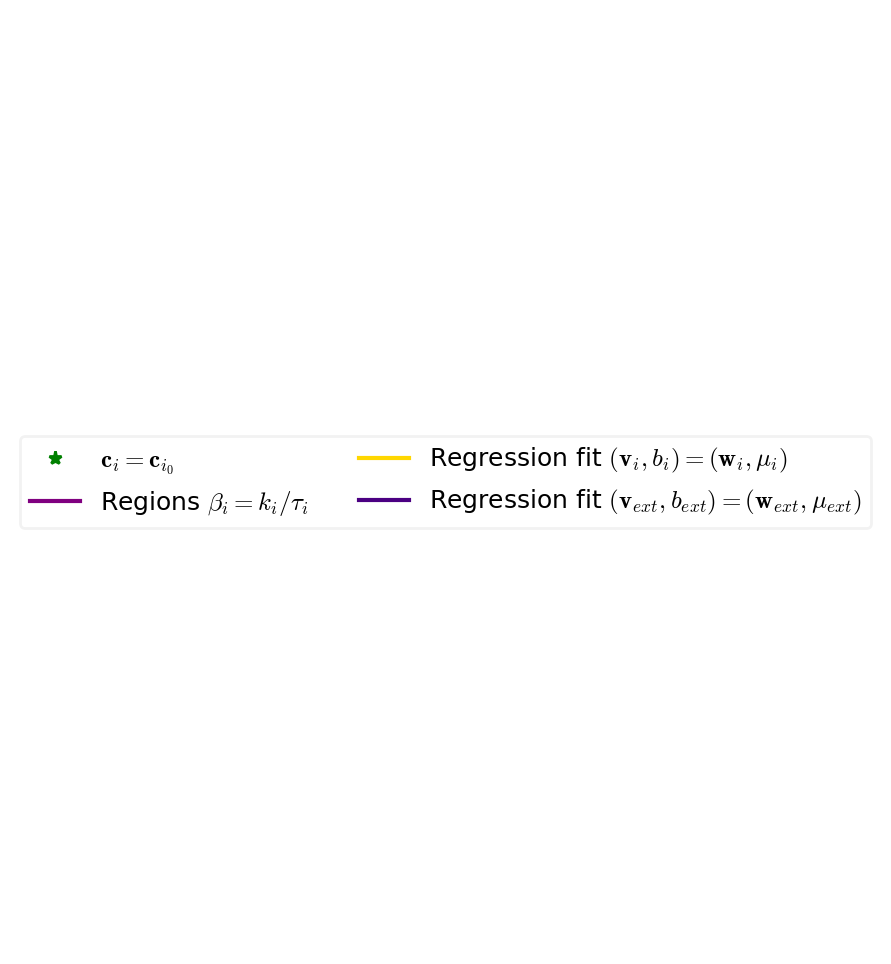

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

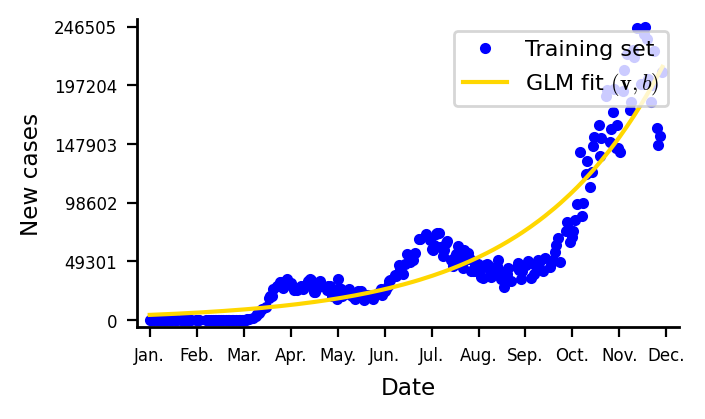

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

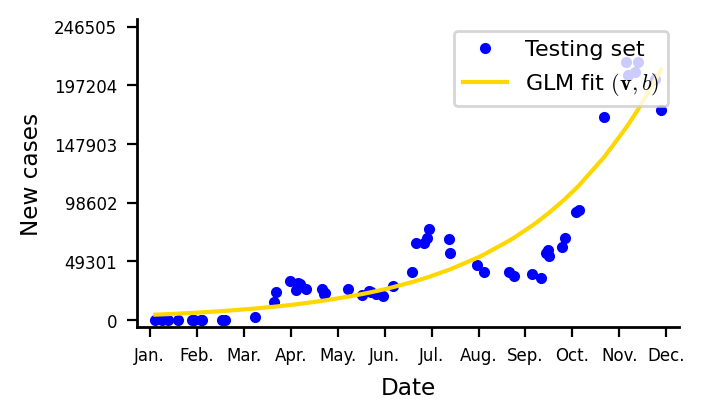

In [6]:
from numpy import linalg as LA
for n_points in range(1,2):
    names = ['covid_19_cases_ca', 'covid_19_cases_usa']
    for i, name in enumerate(names):    
        df, target_name, DataName = load_data_reg(name)
        lambda_param, C_enc, W, w_ext, MU, mu_ext, BETA, summary, X_train, X_test, ytrain_true, ytest_true, ytrain_pred, ytest_pred, y_c_preds = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag='complex')

        ylabel ='New cases'
        situation = name + '_n_points_' + str(n_points)
        Mat_dists_train = LA.norm((C_enc.reshape(C_enc.shape[0], 1, C_enc.shape[1]) - X_train), axis=2)
        xmin, xmax, ymin, ymax = utility_figures.get_xlimit_ylimit(X=X_train, y=ytrain_true, Xc=C_enc, Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA)
        utility_figures.visualize_MoTLGLM_reg_gn(X=X_train, y=ytrain_true, Xc=C_enc, Yc=y_c_preds, Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, ylabel=ylabel, situation=situation, jeu='Apprentissage', lang='en')

        Mat_dists_test = LA.norm((C_enc.reshape(C_enc.shape[0], 1, C_enc.shape[1]) - X_test), axis=2)
        utility_figures.visualize_MoTLGLM_reg_gn(X=X_test, y=ytest_true, Xc=C_enc, Yc=y_c_preds, Mat_dists=Mat_dists_test, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, ylabel=ylabel, situation=situation, jeu='Tester', lang='en')


        w, b, summary, X_tr, X_tt, ytrain_true, ytest_true, ytrain_pred, ytest_pred = sklearn_models.Poisson_regression(df.copy(), target_name, train_size=train_size, C_param=100, C_validation=True, times=times, check_multicollinearity=check_multicollinearity, return_flag='complex')
        print(f'summary = {summary}')
    
        utility_figures.visualize_PM_reg_gn(X=X_tr, y=ytrain_true, w=w, b=b, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, ylabel=ylabel, situation=name, jeu='Apprentissage', lang='en')
    
        utility_figures.visualize_PM_reg_gn(X=X_tt, y=ytest_true, w=w, b=b, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, ylabel=ylabel, situation=name, jeu='Tester', lang='en')


##### 1.4.3 Learning of MoTLM with n=2

In [7]:
n_points = 2
names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa', 'Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, MoTLGLM_mse_scores, MoTLGLM_mpd_scores = [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of our Mixtures of tranparent local generalized linear model (regressors)
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    
    print(f'Ours_summary = {Ours_summary}')
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)
 

Data shape :  (739, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:52<00:00, 25.83s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [03:55<35:17, 235.29s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5282669.1812   27906593678005.46875   574046.209  939160.4452  939168.6718
Validation set  5071901.2756  25724182549645.835938  507534.0705  825903.9795  825912.2061
Testing set     4902930.7191  24038729636449.882812  514001.8574  869237.2671  869245.4937
C = [[-2.57873591]
 [-1.36914944]], Epsilon = [0.001002 0.004045], lambda_param = 51.7
K = [ 2.8190262  13.81656852], TAU = [10.990412 23.995661]
W = [[0.1604914 ]
 [4.08957954]], MU = [ 0.406418 20.508649]
w_ext = [0.29535127], mu_ext = 17.972667
RHO = [0.26511733 0.01746739], SIGMA = [0.200073 0.019345]
rho_ext = 0.004756387283491577, sigma_ext = 0.030149


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:01<00:00, 26.85s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [08:00<32:06, 240.87s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5209344.0515  27137265447245.796875  549263.7169  920207.5769  920216.9356
Validation set  5600787.4302    31368819837789.9375  611509.4458  865148.3412  865157.6999
Testing set     4876015.7263  23775529363498.050781  526242.0198  917980.6749  917990.0336
C = [[-2.62902349]
 [-1.41456665]], Epsilon = [0.       0.005306], lambda_param = 51.7
K = [ 2.00060425 13.7766423 ], TAU = [11.147329 23.180618]
W = [[0.13238907]
 [3.85174421]], MU = [ 0.407244 20.47703 ]
w_ext = [0.29223402], mu_ext = 17.971679
RHO = [0.24944248 0.01215274], SIGMA = [0.173569 0.011814]
rho_ext = 0.004660418401337579, sigma_ext = 0.028979


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:55<00:00, 26.19s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [11:58<27:56, 239.57s/it]

summary_random=                        RMSE                    MSE           MPD    Gibbs_risk    Risk_bound
Training set    7808749.2269  60976564488984.203125  1975418.9708  3019067.2187  3019067.2275
Validation set  7449544.3367  55495710824841.234375  1997585.7299   3197267.615  3197267.6238
Testing set      7261592.706  52730728627157.882812  1884536.8664   3276948.544  3276948.5529
C = [[0.07620964]
 [2.63878808]], Epsilon = [0.001808 0.292674], lambda_param = 51700.0
K = [29.66262197  2.        ], TAU = [28.976174 57.885045]
W = [[0.43917003]
 [4.71785391]], MU = [17.949688  3.245627]
w_ext = [0.90811818], mu_ext = 17.046651
RHO = [3.52930661e-02 9.88071575e-20], SIGMA = [0.024946 0.      ]
rho_ext = 0.0005495738037041755, sigma_ext = 2.3e-05


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:00<00:00, 26.75s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [16:01<24:07, 241.28s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5327276.5761  28379875718352.496094  592116.5572  982660.1009  982669.4346
Validation set  5561728.9497  30932828910073.175781  609165.5184  951490.4795  951499.8132
Testing set     5276297.6176  27839316549473.667969  593057.4621  991646.1686  991655.5024
C = [[-2.64093272]
 [-1.42340406]], Epsilon = [0.       0.030452], lambda_param = 51.7
K = [ 2.0006847  12.89584904], TAU = [11.287659 22.511734]
W = [[0.16461573]
 [4.09275909]], MU = [ 0.390026 20.656629]
w_ext = [0.29763599], mu_ext = 17.981869
RHO = [0.25588216 0.01218827], SIGMA = [0.17521  0.014993]
rho_ext = 0.0065287140106956906, sigma_ext = 0.029232


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:04<00:00, 27.17s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [20:09<20:17, 243.50s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5476053.1713  29987158335166.734375  620427.2073   965715.3385   965724.5851
Validation set  4919208.5428  24198612687803.613281   525594.064    887556.085   887565.3315
Testing set     5156621.9082     26590749503921.125  606072.2338  1107843.9446  1107853.1911
C = [[-2.61348018]
 [-1.40815155]], Epsilon = [0.       0.005042], lambda_param = 51.7
K = [ 2.28188593 12.72761603], TAU = [11.123417 21.695965]
W = [[0.15953299]
 [4.07478516]], MU = [ 0.406069 20.522777]
w_ext = [0.2949508], mu_ext = 17.977429
RHO = [0.276325   0.02327189], SIGMA = [0.203097 0.024882]
rho_ext = 0.005098116341891217, sigma_ext = 0.031005


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:07<00:00, 27.53s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [24:19<16:22, 245.72s/it]

summary_random=                        RMSE                    MSE           MPD    Gibbs_risk    Risk_bound
Training set    8371937.3868  70089335608295.171875  1892592.6234  3235648.0648  3235648.0735
Validation set  8864806.9274  78584801860225.578125  1906150.5354  2945628.0871  2945628.0957
Testing set      9076965.162  82391296551865.984375  1643600.8608  2646502.5094   2646502.518
C = [[0.09191173]
 [2.59903058]], Epsilon = [0.003492 0.272454], lambda_param = 51700.0
K = [29.41596224  2.        ], TAU = [27.713571 58.025523]
W = [[0.48004155]
 [4.69478915]], MU = [17.899481  3.321991]
w_ext = [1.01461318], mu_ext = 16.868074
RHO = [1.64611208e-02 4.65436633e-17], SIGMA = [0.012009 0.      ]
rho_ext = 4.9985485925359415e-05, sigma_ext = 2.5e-05


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:04<00:00, 27.18s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [28:27<12:19, 246.38s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5219056.8073  27238553958290.632812  565052.0746    960960.116   960969.4716
Validation set  5478570.7572  30014737541140.011719  590514.3984   960485.8571   960495.2126
Testing set      5248971.252     27551699204541.875  587026.8323  1032654.7956  1032664.1511
C = [[-2.62753864]
 [-1.38168416]], Epsilon = [0.       0.001972], lambda_param = 51.7
K = [ 2.00070566 12.55744458], TAU = [11.228685 22.22812 ]
W = [[0.16820846]
 [4.10422361]], MU = [ 0.388745 20.587681]
w_ext = [0.29899376], mu_ext = 17.97497
RHO = [0.24480799 0.01211117], SIGMA = [0.172831 0.012438]
rho_ext = 0.008189255580710321, sigma_ext = 0.031587


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:52<00:00, 25.88s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [32:22<08:05, 242.96s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set      5248369.47  27545382094008.253906  540963.5541  931125.1865  931134.5082
Validation set  5260966.4238  27677767711991.851562  533653.4807  969039.8318  969049.1536
Testing set     5019169.3643  25192061107213.539062  424364.6936   716684.889  716694.2108
C = [[-2.61597106]
 [-1.37246638]], Epsilon = [0.       0.009916], lambda_param = 51.7
K = [ 2.00058278 14.23991554], TAU = [11.158154 24.544527]
W = [[0.16777838]
 [4.14888657]], MU = [ 0.394139 20.621428]
w_ext = [0.29921647], mu_ext = 17.965058
RHO = [0.27626264 0.02123446], SIGMA = [0.202957 0.02457 ]
rho_ext = 0.0055770577053891246, sigma_ext = 0.030384


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:51<00:00, 25.69s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [36:16<04:00, 240.19s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5274420.8935  27819515761684.761719  577327.5128  963444.9512     963454.3
Validation set  4974060.8881  24741281718789.628906  511535.1022  863842.0378  863851.3866
Testing set     4943560.6458  24438791859161.960938  534154.4841  951571.9942  951581.3429
C = [[-2.62416991]
 [-1.38958666]], Epsilon = [0.     0.0001], lambda_param = 51.7
K = [ 2.00056504 13.01458884], TAU = [11.204845 22.143555]
W = [[0.16484852]
 [3.96398822]], MU = [ 0.395209 20.457521]
w_ext = [0.29204933], mu_ext = 17.975347
RHO = [0.28089208 0.01713541], SIGMA = [0.204278 0.020685]
rho_ext = 0.004562658863961723, sigma_ext = 0.031017


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:53<00:00, 25.91s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [40:12<00:00, 241.21s/it]

summary_random=                         RMSE                     MSE           MPD    Gibbs_risk    Risk_bound
Training set    10554619.3758  111399990167122.671875  2893513.4011  3530940.5239  3539176.8787
Validation set   9845057.7502     96925162105281.8125  2721902.1914  3962326.9747  3970563.3295
Testing set      10957174.222  120059666930755.734375  3013814.9903  3548274.3996  3556510.7544
C = [[-1.57944405]
 [ 1.93299246]], Epsilon = [0.001219 0.002429], lambda_param = 0.0517
K = [9.58393571 2.00273247], TAU = [28.107476 15.92165 ]
W = [[-2.39003165]
 [ 3.8116623 ]], MU = [10.869025 12.013557]
w_ext = [0.39805678], mu_ext = 17.882771
RHO = [3.72621158e-11 1.11385330e-09], SIGMA = [0. 0.]
rho_ext = 0.013677973492335266, sigma_ext = 0.007406
*********** END ***********
Ours_summary =                         RMSE           MSE           MPD    Gibbs_risk    Risk_bound
Training set    6.377250e+06  4.384802e+13  1.078072e+06  1.644893e+06  1.645723e+06
Validation set  6.302663e+06  

Data shape :  (749, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:19<00:00, 28.82s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [04:21<39:15, 261.76s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    52105229.3006  2714954920469571.5  11003566.8114   17864594.228  17864681.1617
Validation set  52449680.1393  2750968946711525.0  11438603.4726  16928269.4618  16928356.3955
Testing set     52638112.3302  2770770869690949.0  11497473.1537  17600787.4481  17600874.3819
C = [[-0.14101496]
 [ 2.8285196 ]], Epsilon = [0.004205 0.317886], lambda_param = 5.24
K = [30.13238899  2.        ], TAU = [27.479754 35.094779]
W = [[0.43980825]
 [2.01655962]], MU = [19.937716  1.507018]
w_ext = [0.72277589], mu_ext = 19.291313
RHO = [1.41532505e-02 5.64937935e-06], SIGMA = [0.009812 0.000948]
rho_ext = 0.00041074218408105695, sigma_ext = 3.7e-05


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:19<00:00, 28.88s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [08:44<34:57, 262.13s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    50329403.1756  2533048824011498.0  10516844.0058  19286673.6603  19296985.2885
Validation set  57954331.3512  3358704522368877.5  11005055.8042  20369575.8289  20379887.4571
Testing set     55255244.7361  3053142070841071.0  13451452.2069  22974018.1388   22984329.767
C = [[-0.13004311]
 [ 3.242147  ]], Epsilon = [0.000632 0.525584], lambda_param = 0.0524
K = [20.86592061  2.        ], TAU = [17.943663 47.595522]
W = [[0.42474452]
 [3.95949006]], MU = [19.928366  3.231723]
w_ext = [0.70975142], mu_ext = 19.273065
RHO = [6.57353866e-03 3.12772521e-19], SIGMA = [0.007043 0.      ]
rho_ext = 4.398782515275581e-05, sigma_ext = 6e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:00<00:00, 26.68s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [12:46<29:31, 253.09s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    50578721.8613   2558207105125908.5  10804390.0646  19338348.0117  19338453.7662
Validation set  46536183.1105  2165616338491900.25  11339830.9548  19565007.9014  19565113.6559
Testing set     45956879.7975   2112034800724435.0  11470377.7939  19466537.5425  19466643.2969
C = [[-1.9278112 ]
 [-0.08713043]], Epsilon = [0.      0.00417], lambda_param = 5.24
K = [ 7.73865035 22.1887336 ], TAU = [46.009894 19.97559 ]
W = [[-1.25191482]
 [ 0.41399588]], MU = [ 1.102312 19.929601]
w_ext = [0.70346989], mu_ext = 19.285607
RHO = [6.74088502e-19 5.17869068e-02], SIGMA = [0.      0.01684]
rho_ext = 0.00022832980747041813, sigma_ext = 0.000249


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:13<00:00, 28.18s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [17:02<25:26, 254.43s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    48976304.3009  2398678382973368.0  10059934.9616  18755227.6326  18755227.6336
Validation set  49250697.6074  2425631214816460.5   7575116.8782  18528635.6999  18528635.7009
Testing set     50113736.4572  2511386581702038.5  10103267.9471  19786536.6724  19786536.6734
C = [[-0.11475349]
 [ 2.79492759]], Epsilon = [0.00195 0.28116], lambda_param = 524000.0
K = [26.8390104  2.       ], TAU = [23.713356 29.384526]
W = [[0.40905052]
 [2.23053534]], MU = [19.948932  1.483136]
w_ext = [0.79039142], mu_ext = 19.199405
RHO = [8.43578309e-04 8.58463242e-24], SIGMA = [0.008036 0.042785]
rho_ext = 1.2221959575697666e-05, sigma_ext = 0.0


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:12<00:00, 28.09s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [21:17<21:12, 254.46s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    63485416.6298  4030398124664796.0  14980852.7352  18805315.7961  18805315.8798
Validation set  73303218.7495  5373361879034078.0  21726502.6704  24902297.1738  24902297.2575
Testing set     69458360.3533  4824463822962595.0  18471232.6359  21667276.3374  21667276.4211
C = [[-1.64271362]
 [ 1.91470075]], Epsilon = [3.38e-04 1.20e-05], lambda_param = 5240.0
K = [5.80981629 2.        ], TAU = [30.354295 16.060644]
W = [[-5.91380579]
 [ 4.84791009]], MU = [ 7.278548 12.370315]
w_ext = [0.35370397], mu_ext = 19.88454
RHO = [1.03801135e-07 4.15616299e-08], SIGMA = [0. 0.]
rho_ext = 0.01614270843015222, sigma_ext = 0.008737


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:09<00:00, 27.72s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [25:29<16:54, 253.59s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    50046197.7067  2504621904898168.0  11097776.9711  21347190.4166  21357479.1665
Validation set  47505709.4728  2256792432516533.0   7714943.8216  16917516.9027  16927805.6526
Testing set     53416831.8871  2853357928853195.0  10567717.6074  19265981.9862   19276270.736
C = [[-0.06209876]
 [ 3.31975592]], Epsilon = [0.001224 0.568386], lambda_param = 0.0524
K = [19.75003905  2.        ], TAU = [17.319807 47.71771 ]
W = [[0.42656308]
 [4.26963693]], MU = [19.906318  3.430932]
w_ext = [0.74220754], mu_ext = 19.230556
RHO = [5.15644403e-03 1.22030902e-18], SIGMA = [0.007644 0.      ]
rho_ext = 3.15909304641745e-05, sigma_ext = 6e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:05<00:00, 27.26s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [29:37<12:35, 251.93s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set     48248069.358  2327876196777679.0  10451780.3467  18424793.4547  18424793.4558
Validation set  47191735.6192  2227059910754644.0    14895898.82  22259458.6908  22259458.6919
Testing set     48887506.5325  2389988294969306.5   10893818.037  17456347.8281  17456347.8292
C = [[-0.10038483]
 [ 2.73069465]], Epsilon = [1.5000e-04 2.0709e-01], lambda_param = 524000.0
K = [23.2826532  2.       ], TAU = [21.34888  31.680284]
W = [[0.41572394]
 [2.74189211]], MU = [19.939944  1.725109]
w_ext = [0.69992562], mu_ext = 19.322257
RHO = [1.17601420e-04 1.49511627e-25], SIGMA = [0.005888 0.      ]
rho_ext = 3.6001183453101267e-06, sigma_ext = 0.0


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:10<00:00, 27.81s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [33:51<08:24, 252.47s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set     50373401.021  2537479530418249.5  10504672.2763  20623378.8694  20623380.1219
Validation set  49644720.9534  2464598318543225.5   7358935.4809  18478327.1556  18478328.4081
Testing set     53748555.6739  2888907237027881.0   9917279.0675  16988569.3921  16988570.6446
C = [[-1.12189941]
 [-0.05645712]], Epsilon = [0.000763 0.006829], lambda_param = 524.0
K = [ 3.62179595 19.71212786], TAU = [52.31737  16.769696]
W = [[-2.83212784]
 [ 0.41313677]], MU = [16.007434 19.911548]
w_ext = [0.77322268], mu_ext = 19.181024
RHO = [1.32108294e-14 2.50605619e-05], SIGMA = [0.       0.001645]
rho_ext = 3.4522204447323406e-09, sigma_ext = 0.0


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:18<00:00, 28.76s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [38:12<04:15, 255.17s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    53407294.3152  2852339086070057.0  11655988.0545  17336383.5328  17336469.4505
Validation set  49099960.0549  2410806077395554.0  10785087.5034  17117104.2355  17117190.1533
Testing set     56916541.6068  3239492708481487.5  12232672.3215  17533782.6367  17533868.5545
C = [[-0.17299366]
 [ 2.83635225]], Epsilon = [0.001998 0.320707], lambda_param = 5.24
K = [33.24271542  2.        ], TAU = [31.162265 35.177881]
W = [[0.44062712]
 [2.01736829]], MU = [19.955073  1.501902]
w_ext = [0.70544338], mu_ext = 19.323455
RHO = [2.13436697e-02 2.79885058e-05], SIGMA = [0.016669 0.001755]
rho_ext = 0.002135771247335929, sigma_ext = 0.000383


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [04:19<00:00, 28.79s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [42:34<00:00, 255.43s/it]


summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    45185220.8133   2041704179947404.0   8908448.7757   12408752.968  12408752.9769
Validation set  47083217.1792  2216829339944213.25  12821948.9994  17664429.1048  17664429.1136
Testing set     52600640.9664   2766827430074460.0  12689467.6171  17614757.8151   17614757.824
C = [[-1.73363197]
 [-0.18479617]], Epsilon = [0.000586 0.002137], lambda_param = 52400.0
K = [ 6.33885285 33.97228916], TAU = [65.716856 34.191841]
W = [[-4.85497616]
 [ 0.41593666]], MU = [ 2.886335 19.981718]
w_ext = [0.54887477], mu_ext = 19.554598
RHO = [7.41280402e-02 5.63208743e-06], SIGMA = [0.074048 0.02919 ]
rho_ext = 0.023669712875137135, sigma_ext = 0.00052
*********** END ***********
Ours_summary =                         RMSE           MSE           MPD    Gibbs_risk    Risk_bound
Training set    5.127353e+07  2.649931e+15  1.099843e+07  1.841907e+07  1.842115e+07
Validation set  

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:48<00:00, 18.76s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:50<25:36, 170.77s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1480.3448  2191420.6993  529.0039   596.4075   596.4076
Validation set  1637.5162  2681459.3028  607.1873   650.5733   650.5733
Testing set     1532.0172  2347076.8301  540.2667   612.1046   612.1046
C = [[-1.24508882]
 [ 0.04256556]], Epsilon = [0.032639 0.002004], lambda_param = 7030000.0
K = [8.99053691 7.29334954], TAU = [41.393465 32.356913]
W = [[-2.22827271]
 [ 0.38459584]], MU = [3.702581 7.290246]
w_ext = [0.36827745], mu_ext = 8.21905
RHO = [5.69472561e-11 9.91593564e-02], SIGMA = [0.       0.067862]
rho_ext = 0.020502601580040563, sigma_ext = 0.021011


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:52<00:00, 19.17s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:45<23:05, 173.20s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1356.5777  1840302.9314  425.3878   542.6805   542.6806
Validation set  1365.3396  1864152.3163  423.4779   581.8729   581.8729
Testing set     1555.5161  2419630.2273  539.0663   640.3205   640.3205
C = [[-1.30967389]
 [ 0.1090843 ]], Epsilon = [0.023291 0.005999], lambda_param = 7030000.0
K = [ 9.78251834 10.63912183], TAU = [45.532818 33.136971]
W = [[-1.82423642]
 [ 1.55160104]], MU = [4.185133 7.320402]
w_ext = [0.3389961], mu_ext = 8.295303
RHO = [3.14924928e-14 4.35449240e-02], SIGMA = [0.       0.029991]
rho_ext = 0.027428342565353987, sigma_ext = 0.021877


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:58<00:00, 19.82s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:46<20:35, 176.47s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1524.5982  2324399.7937  535.9537   600.4929   600.5146
Validation set  1372.5007  1883758.1832  454.7214   518.2804   518.3021
Testing set     1672.2462  2796407.4405  632.5556   704.9194    704.941
C = [[-1.25306729]
 [-0.06540006]], Epsilon = [0.03077  0.003356], lambda_param = 7030.0
K = [ 9.1108959  12.07071645], TAU = [44.014425 72.675834]
W = [[-1.9173829 ]
 [-1.22688332]], MU = [4.045956 6.894235]
w_ext = [0.35412205], mu_ext = 8.23216
RHO = [5.37400488e-11 2.57570939e-02], SIGMA = [0.       0.025334]
rho_ext = 0.020144274992601657, sigma_ext = 0.023757


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:53<00:00, 19.31s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [11:41<17:37, 176.17s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1513.7239  2291360.0518  532.1876   593.9461   593.9679
Validation set  1267.4205  1606354.7571  437.3478   512.3229   512.3448
Testing set     1785.7269   3188820.642  682.9457   752.3566   752.3785
C = [[-1.28012855]
 [-0.09020799]], Epsilon = [0.034682 0.002672], lambda_param = 7030.0
K = [ 8.86272678 12.33028351], TAU = [42.691323 71.638179]
W = [[-1.56246619]
 [-1.49362928]], MU = [4.497129 6.863293]
w_ext = [0.35105844], mu_ext = 8.240811
RHO = [6.48204522e-11 2.14012050e-02], SIGMA = [0.       0.022258]
rho_ext = 0.019838844741037063, sigma_ext = 0.022618


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:04<00:00, 20.48s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [14:47<14:58, 179.73s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1533.0515  2350246.9697  542.8807   623.8305   623.8305
Validation set   1523.406  2320765.9897  564.9356   660.4953   660.4953
Testing set     1489.4605  2218492.6837  512.9858   601.5101   601.5101
C = [[-1.27531963]
 [-0.06359658]], Epsilon = [0.033856 0.002153], lambda_param = 7030000.0
K = [8.00926402 5.62037859], TAU = [38.036648 31.933661]
W = [[-2.23781285]
 [-0.25712758]], MU = [3.642595 7.057731]
w_ext = [0.37284628], mu_ext = 8.227792
RHO = [1.69469321e-09 2.98670221e-02], SIGMA = [0.       0.061838]
rho_ext = 0.022796107799156296, sigma_ext = 0.017114


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:06<00:00, 20.68s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [17:56<12:10, 182.64s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1547.3224  2394206.5637  555.4186   638.9453   641.2085
Validation set  1635.4427  2674672.8283  606.3664   682.6703   684.9336
Testing set     1215.7296  1477998.5168  431.1507   490.0636   492.3269
C = [[-1.16797889]
 [-0.0145302 ]], Epsilon = [0.050214 0.027702], lambda_param = 70.3
K = [ 7.58029429 12.33860846], TAU = [35.903258 60.785296]
W = [[ 1.24751225]
 [-1.13349312]], MU = [8.049411 7.195781]
w_ext = [0.36287538], mu_ext = 8.238306
RHO = [1.78741276e-07 8.52273508e-03], SIGMA = [0.       0.014906]
rho_ext = 0.02265352184343085, sigma_ext = 0.022978


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:05<00:00, 20.66s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [21:04<09:13, 184.37s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1577.3375   2487993.561  563.4812   640.2272   640.2273
Validation set  1445.6713  2089965.4175  516.2851    590.838    590.838
Testing set     1285.6298  1652844.0629  457.5016   539.0982   539.0982
C = [[-1.28662686]
 [-0.05530226]], Epsilon = [0.031705 0.0007  ], lambda_param = 7030000.0
K = [8.91490939 6.39507502], TAU = [40.876549 32.411241]
W = [[-2.01664302]
 [-0.19490189]], MU = [3.94897 7.16362]
w_ext = [0.35588917], mu_ext = 8.262142
RHO = [5.30279062e-11 7.64693670e-02], SIGMA = [0.       0.057731]
rho_ext = 0.019873595243191832, sigma_ext = 0.022429


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:53<00:00, 19.25s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [23:59<06:03, 181.52s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1380.2305  1905036.1985  445.1122   581.3978   581.3979
Validation set  1568.5063  2460211.9212  502.5532   623.2817   623.2817
Testing set       1195.53  1429291.8896  348.5326   489.0704   489.0704
C = [[-1.2084353 ]
 [ 0.12698355]], Epsilon = [0.008356 0.002155], lambda_param = 7030000.0
K = [10.18650152 10.07497706], TAU = [44.096153 31.357847]
W = [[-2.08295687]
 [ 1.19996858]], MU = [3.957432 7.33729 ]
w_ext = [0.35935692], mu_ext = 8.261831
RHO = [1.32911836e-12 6.82975547e-02], SIGMA = [0.       0.052717]
rho_ext = 0.02512634975556335, sigma_ext = 0.019684


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:51<00:00, 19.03s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [26:52<02:58, 178.91s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1475.2219  2176279.7767  523.2877   606.2513   606.2513
Validation set  1627.6649  2649292.8977  600.2094   648.4263   648.4263
Testing set     1403.1983  1968965.5394  522.3532   596.5655   596.5656
C = [[-1.20725072]
 [ 0.02363855]], Epsilon = [0.006951 0.002082], lambda_param = 7030000.0
K = [9.07914778 7.86101252], TAU = [41.65736  31.226611]
W = [[-2.18858385]
 [ 0.22868444]], MU = [3.748596 7.326671]
w_ext = [0.36280708], mu_ext = 8.250897
RHO = [4.25912925e-11 8.72011095e-02], SIGMA = [0.       0.062725]
rho_ext = 0.020733637460553463, sigma_ext = 0.020144


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:56<00:00, 19.63s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [29:51<00:00, 179.12s/it]


summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1509.2072  2277706.3794  535.9776    619.643   621.8571
Validation set  1612.8745  2601364.1386  567.8762   650.8126   653.0267
Testing set     1489.5576  2218781.7005  539.8517   628.7283   630.9423
C = [[-1.24527033]
 [-0.09830192]], Epsilon = [0.023895 0.029796], lambda_param = 70.3
K = [ 6.15866864 11.6257602 ], TAU = [29.422429 61.288812]
W = [[ 1.22312497]
 [-1.42288571]], MU = [8.042996 7.006431]
w_ext = [0.35635663], mu_ext = 8.236124
RHO = [6.62447460e-07 4.52784287e-03], SIGMA = [3.0000e-06 1.0906e-02]
rho_ext = 0.033506516940125186, sigma_ext = 0.030914
*********** END ***********
Ours_summary =                      RMSE           MSE       MPD  Gibbs_risk  Risk_bound
Training set    1489.7616  2.223895e+06  518.8691    604.3822    604.8343
Validation set  1505.6343  2.283200e+06  528.0960    611.9574    612.4095
Testing set     1462.4612  2.171831e+06  520.7210    605.4737

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:53<00:00, 19.28s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:54<26:13, 174.86s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    26982.0135  728029051.1963  13128.3801  14078.6109  14078.6112
Validation set   25027.278  626364645.9703  11943.1146    12552.62  12552.6204
Testing set     26385.9235  696216960.8415   12823.429  13395.7743  13395.7746
C = [[0.38914651]
 [1.77508672]], Epsilon = [0.001993 0.002359], lambda_param = 630000.0
K = [ 7.4845205  11.96916374], TAU = [77.371773 41.47084 ]
W = [[5.69436903]
 [2.59744333]], MU = [9.303221 6.039334]
w_ext = [-0.25048956], mu_ext = 10.682974
RHO = [6.82846985e-07 1.27557291e-04], SIGMA = [0.001265 0.000111]
rho_ext = 0.048246209322475336, sigma_ext = 0.023219


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:47<00:00, 18.61s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:43<22:51, 171.41s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set     26359.567  694826772.2366  11623.9757  13439.7863  13439.7867
Validation set  26110.6647  681766811.9487  11738.3662   14394.093  14394.0933
Testing set     24534.3212  601932919.1273  10355.2871  11656.6755  11656.6758
C = [[0.14611313]
 [1.77293612]], Epsilon = [0.002386 0.004298], lambda_param = 630000.0
K = [17.84126039  6.68660159], TAU = [43.682701 36.922338]
W = [[0.41309552]
 [3.7853265 ]], MU = [11.148646  3.996182]
w_ext = [-0.30275116], mu_ext = 10.544488
RHO = [1.43333544e-07 2.78696865e-05], SIGMA = [1.1621e-02 2.6000e-05]
rho_ext = 0.04609044003489167, sigma_ext = 0.030756


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:55<00:00, 19.53s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:41<20:19, 174.28s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    25240.0333  637059282.5317  10481.5938  12746.8083  12746.8083
Validation set  24925.5705  621284065.1005   10629.035  12287.3189  12287.3189
Testing set     22425.5422   502904945.154   8649.4223  10895.3708  10895.3709
C = [[-1.58041093]
 [-0.60951773]], Epsilon = [0.01509  0.034577], lambda_param = 6300000.0
K = [ 6.68428744 20.60875702], TAU = [29.806782 69.718694]
W = [[-2.88479233]
 [-2.09795698]], MU = [6.017779 9.0365  ]
w_ext = [-0.3919702], mu_ext = 10.972337
RHO = [4.97615846e-10 3.74674659e-02], SIGMA = [0.       0.040517]
rho_ext = 0.012307984802507202, sigma_ext = 0.003174


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:49<00:00, 18.86s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [11:32<17:18, 173.12s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    24202.3197  585752279.0502   9760.1344  11755.8134   14914.456
Validation set  24661.0276  608166281.3857   9986.3082  12602.5122  15761.1548
Testing set     28740.7113  826028488.2155  12793.8421  15648.2087  18806.8514
C = [[-1.64691336]
 [-0.65008577]], Epsilon = [0.035665 0.006917], lambda_param = 0.063
K = [ 7.12238467 22.39786726], TAU = [29.737149 74.91865 ]
W = [[-3.28239096]
 [-2.36477006]], MU = [5.189189 8.737436]
w_ext = [-0.43477027], mu_ext = 10.955485
RHO = [5.18416974e-09 2.02294763e-02], SIGMA = [0.       0.022553]
rho_ext = 0.0015046510818935526, sigma_ext = 0.001656


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:50<00:00, 18.98s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [14:25<14:24, 172.95s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    25975.5332  674728327.3805  10922.5428  12943.2115  12943.2116
Validation set  21280.7717  452871244.5935   7983.1297  10694.3036  10694.3037
Testing set     22032.7264  485441032.7225   9414.0734  11609.8893  11609.8893
C = [[-1.58276201]
 [-0.59889463]], Epsilon = [0.001368 0.033316], lambda_param = 6300000.0
K = [ 7.60459711 19.73883394], TAU = [30.405385 67.050392]
W = [[-2.81382689]
 [-2.39129812]], MU = [6.159427 8.877339]
w_ext = [-0.3861324], mu_ext = 10.987761
RHO = [4.72813499e-10 4.10550111e-02], SIGMA = [0.       0.042651]
rho_ext = 0.0005879525692194676, sigma_ext = 0.001757


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:51<00:00, 19.03s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [17:18<11:32, 173.07s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    24664.5888  608341940.1034  10198.4051   12426.507  12426.5071
Validation set  22850.3992  522140742.6991   8475.2655  10910.1994  10910.1995
Testing set     25095.7568  629797008.7418  10791.3708  12933.1134  12933.1134
C = [[-1.54800286]
 [-0.59070784]], Epsilon = [0.002523 0.039403], lambda_param = 6300000.0
K = [ 8.07892689 20.42976698], TAU = [31.942155 68.304896]
W = [[-2.68492671]
 [-2.36649113]], MU = [6.453369 8.944843]
w_ext = [-0.43081577], mu_ext = 10.987166
RHO = [5.29566638e-11 3.37003282e-02], SIGMA = [0.       0.036389]
rho_ext = 0.0011366300591219658, sigma_ext = 0.002829


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:51<00:00, 19.09s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [20:12<08:39, 173.25s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set     24854.544  617748356.8825  10309.5381  12698.4644  12698.4644
Validation set  24980.3078  624015778.3428   9923.1702  12191.1403  12191.1403
Testing set     21834.2603  476734922.7797   8244.5759  10352.7258  10352.7258
C = [[-1.55368757]
 [-0.60478569]], Epsilon = [0.013108 0.030158], lambda_param = 6300000.0
K = [ 7.03922746 20.13370478], TAU = [30.5829   68.138303]
W = [[-2.71481353]
 [-2.33769067]], MU = [6.364539 8.887034]
w_ext = [-0.42455123], mu_ext = 10.971595
RHO = [5.37139629e-10 3.05450196e-02], SIGMA = [0.       0.033576]
rho_ext = 0.0009107252506278699, sigma_ext = 0.001291


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [03:01<00:00, 20.12s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [23:16<05:53, 176.54s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    18561.3971  344525462.4322  5644.9904   9294.7888  13667.6343
Validation set  18655.1606   348015018.159  6153.9716  10231.9558  14604.8013
Testing set     17375.8528  301920262.0648  4991.9612   8658.7103  13031.5558
C = [[-1.02237498]
 [ 0.17196669]], Epsilon = [0.003765 0.016843], lambda_param = 0.063
K = [ 3.4355295 18.8435725], TAU = [17.229906 46.992956]
W = [[-0.29184692]
 [ 0.40404389]], MU = [11.111462 11.139319]
w_ext = [-0.14572132], mu_ext = 10.383762
RHO = [1.75931231e-05 1.73874397e-16], SIGMA = [7.0e-06 7.7e-05]
rho_ext = 0.011656134145915903, sigma_ext = 0.010967


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:52<00:00, 19.21s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [26:10<02:55, 175.96s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set     25210.357  635562102.5049  10415.5613   12575.509   12575.509
Validation set   18738.501  351131421.2363   6503.7578    8900.556    8900.556
Testing set     28330.6879  802627874.6881  13114.3968  14293.8252  14293.8253
C = [[-1.56819069]
 [-0.60596484]], Epsilon = [0.006467 0.033775], lambda_param = 6300000.0
K = [ 7.54138816 19.87972859], TAU = [32.45314  66.947607]
W = [[-2.83944803]
 [-2.41138724]], MU = [6.147546 8.863199]
w_ext = [-0.41343836], mu_ext = 10.972014
RHO = [2.65460789e-10 4.97935753e-02], SIGMA = [0.       0.050029]
rho_ext = 0.0003807411985094575, sigma_ext = 0.002518


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:48<00:00, 18.73s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [29:00<00:00, 174.05s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    26390.6158  696464601.2142  12537.0489   13509.063   13509.095
Validation set  25655.7814   658219121.443  12197.3221  13838.3246  13838.3566
Testing set     26558.0023  705327486.0849  12683.6177  14324.0921  14324.1241
C = [[0.33881571]
 [1.73950754]], Epsilon = [0.000158 0.000471], lambda_param = 6300.0
K = [6.97465677 5.99247377], TAU = [48.560165 36.202838]
W = [[2.78649052]
 [4.30053996]], MU = [10.493874  3.232353]
w_ext = [-0.27981688], mu_ext = 10.634006
RHO = [2.15421627e-04 2.71372865e-05], SIGMA = [4.342e-03 2.300e-05]
rho_ext = 0.045495372772591795, sigma_ext = 0.027279
*********** END ***********
Ours_summary =                       RMSE           MSE         MPD  Gibbs_risk  Risk_bound
Training set    24844.0969  6.223038e+08  10502.2171  12546.8563  13300.0084
Validation set  23288.5462  5.493975e+08   9553.3441  11860.3024  12613.4545
Testing set     24331.3785

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:29<00:00,  9.92s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:30<13:33, 90.37s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.2778  541.8546   9.4007     14.639    14.6394
Validation set  29.8447  890.7067  12.0056    16.4742    16.4746
Testing set     28.1717  793.6422  12.5465     17.206    17.2064
C = [[-0.53786387]
 [ 0.7212261 ]], Epsilon = [0.020419 0.006064], lambda_param = 254000.0
K = [14.62502177 24.7159817 ], TAU = [42.497428 46.589157]
W = [[-0.46875527]
 [ 2.55187835]], MU = [4.369152 0.67001 ]
w_ext = [1.11698493], mu_ext = 2.922447
RHO = [1.13766854e-05 9.62629684e-06], SIGMA = [1.9331e-02 2.8000e-05]
rho_ext = 2.031069149020395e-07, sigma_ext = 0.0


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:34<00:00, 10.48s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:05<12:25, 93.13s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    24.1272   582.1241   8.8747    13.9821    17.4404
Validation set  27.2827   744.3457  12.5169    18.1204    21.5787
Testing set     32.3206  1044.6223  14.5524    21.0476    24.5059
C = [[-0.49599391]
 [ 0.73253576]], Epsilon = [0.014284 0.010302], lambda_param = 25.400000000000002
K = [13.59120073 22.57669197], TAU = [37.158153 44.506935]
W = [[-0.33562205]
 [ 2.4043168 ]], MU = [4.449627 0.691931]
w_ext = [1.28968955], mu_ext = 2.595657
RHO = [0.00019646 0.00236047], SIGMA = [0.023367 0.001406]
rho_ext = 1.90865189605738e-06, sigma_ext = 1e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.26s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:38<10:51, 93.09s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    23.3495  545.1983  9.6642    14.5037    14.5389
Validation set   26.153   683.982   11.38    16.8022    16.8374
Testing set     30.5111  930.9259  14.652    19.3425    19.3777
C = [[-0.50150556]
 [ 0.73174597]], Epsilon = [0.012089 0.023552], lambda_param = 2540.0
K = [13.35689165 22.92615231], TAU = [40.142256 42.780892]
W = [[-0.6602864 ]
 [ 2.82353687]], MU = [4.303047 0.34851 ]
w_ext = [1.13563233], mu_ext = 2.873513
RHO = [1.45573707e-07 4.50737124e-02], SIGMA = [0.007328 0.033879]
rho_ext = 3.6614625460096607e-06, sigma_ext = 1e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:29<00:00,  9.97s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:08<09:12, 92.06s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    26.3925  696.5653  11.2624    17.6256    17.6256
Validation set  23.4889  551.7301   7.8047    14.9812    14.9812
Testing set     22.0784  487.4539   9.0028    13.5513    13.5514
C = [[-0.5477766 ]
 [ 0.63913265]], Epsilon = [0.026592 0.007648], lambda_param = 2540000.0
K = [12.75165645 15.4702694 ], TAU = [36.133093 32.255365]
W = [[-0.23947075]
 [ 1.33524957]], MU = [4.49192  1.767859]
w_ext = [1.15196793], mu_ext = 2.826926
RHO = [0.0075273  0.00583078], SIGMA = [2.3641e-02 4.4000e-05]
rho_ext = 3.6688343625712312e-06, sigma_ext = 2e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:28<00:00,  9.82s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [07:38<07:34, 90.98s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.6911  609.6516   8.9237    16.6559    17.0663
Validation set  30.9689  959.0705  11.0031    24.7994    25.2097
Testing set     25.8939  670.4951  13.8963    19.8731    20.2835
C = [[-0.51827328]
 [ 0.75482173]], Epsilon = [0.054929 0.000552], lambda_param = 254.0
K = [11.45558896 21.53111165], TAU = [31.235463 40.313036]
W = [[-0.86419275]
 [ 2.8911181 ]], MU = [4.186339 0.167784]
w_ext = [1.24289573], mu_ext = 2.651438
RHO = [1.92396932e-07 3.79849239e-05], SIGMA = [0.034248 0.000148]
rho_ext = 5.874301074012014e-07, sigma_ext = 0.0


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:31<00:00, 10.12s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [09:09<06:04, 91.20s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set     29.127  848.3846  12.7828    19.2691    56.2096
Validation set  22.9827  528.2065   8.4575    16.4429    53.3833
Testing set     22.5987  510.6991    11.79    20.0327    56.9732
C = [[-0.44650584]
 [ 1.57139911]], Epsilon = [0.016556 0.208478], lambda_param = 2.54
K = [13.03394614 27.97266173], TAU = [33.920576 41.072465]
W = [[-1.33358016]
 [ 1.88441121]], MU = [3.901874 1.539427]
w_ext = [0.98141549], mu_ext = 2.069954
RHO = [3.74376803e-06 1.30530120e-05], SIGMA = [5.5e-05 7.0e-06]
rho_ext = 9.448844975834287e-05, sigma_ext = 5.6e-05


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:31<00:00, 10.21s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [10:42<04:34, 91.59s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    30.1044  906.2723  12.3485    18.3034     56.237
Validation set  19.3682  375.1263   7.5288    15.1944    53.1281
Testing set     28.0005  784.0276  14.6335    19.4326    57.3663
C = [[-0.46159209]
 [ 1.45537177]], Epsilon = [0.015809 0.002733], lambda_param = 2.54
K = [15.4176286  17.30416911], TAU = [41.817225 40.502609]
W = [[-1.51566304]
 [ 2.07527824]], MU = [3.858345 1.415089]
w_ext = [0.53353148], mu_ext = 2.152258
RHO = [7.88254061e-06 1.30027825e-03], SIGMA = [6.54e-04 4.30e-05]
rho_ext = 1.5285293793364747e-06, sigma_ext = 3e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:29<00:00,  9.93s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [12:12<03:02, 91.18s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    26.1437  683.4929  10.1057    15.6822    16.0699
Validation set  23.7357  563.3836   9.4651    22.1101    22.4978
Testing set     21.3596  456.2337  10.7953    17.0558    17.4434
C = [[-0.47638199]
 [ 0.81686696]], Epsilon = [0.006325 0.032899], lambda_param = 254.0
K = [10.72204469 23.34473882], TAU = [31.281179 46.616569]
W = [[-0.51564206]
 [ 2.45988773]], MU = [4.476434 0.618417]
w_ext = [1.20455949], mu_ext = 2.757861
RHO = [3.67416747e-09 9.13191496e-05], SIGMA = [0.040254 0.057178]
rho_ext = 2.5135156155156086e-06, sigma_ext = 0.0


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.28s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [13:45<01:31, 91.81s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.8998  571.2005   9.6834    14.6824    18.1416
Validation set  23.6316  558.4535  10.4813    16.2902    19.7493
Testing set     30.0643  903.8605  14.3269    17.8904    21.3496
C = [[-0.51037739]
 [ 0.72260267]], Epsilon = [0.011543 0.025708], lambda_param = 25.400000000000002
K = [13.73893058 24.28723043], TAU = [40.06819  47.203308]
W = [[-0.58400557]
 [ 2.45971661]], MU = [4.358833 0.702285]
w_ext = [1.19082814], mu_ext = 2.792692
RHO = [0.00010549 0.00237638], SIGMA = [0.022589 0.000988]
rho_ext = 2.4873921377466043e-06, sigma_ext = 1e-06


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:30<00:00, 10.01s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [15:16<00:00, 91.60s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set     35.122  1233.5529  17.6746    28.7215   352.1668
Validation set  16.1162   259.7328   7.1421    18.6408   342.0861
Testing set     43.4691  1889.5622  26.2065    40.2114   363.6566
C = [[-0.43687064]
 [ 0.45766   ]], Epsilon = [0.007736 0.044443], lambda_param = 0.254
K = [10.81581314 14.15171134], TAU = [24.420509 37.88289 ]
W = [[-1.14710429]
 [ 0.23850001]], MU = [3.456992 0.581623]
w_ext = [1.76996882], mu_ext = 1.656309
RHO = [8.70064204e-05 1.24025630e-04], SIGMA = [1.3e-04 4.4e-05]
rho_ext = 0.0001290177801253243, sigma_ext = 9.9e-05
*********** END ***********
Ours_summary =                    RMSE       MSE      MPD  Gibbs_risk  Risk_bound
Training set    26.6235  721.8297  11.0721     17.4065     58.0136
Validation set  24.3573  611.4738   9.7785     17.9856     58.5926
Testing set     28.4468  847.1522  14.2402     20.5643     61.1714


Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:58<00:00, 13.22s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:59<17:58, 119.86s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    469.2146  220162.3498  158.6637   240.6617   241.0669
Validation set  413.0041  170572.3843  114.9794   226.5169   226.9221
Testing set      370.078  136957.7445  100.7419   226.7471   227.1523
C = [[-0.72365932]
 [ 0.03609724]], Epsilon = [0.014383 0.006949], lambda_param = 254.0
K = [11.4213584  16.01872918], TAU = [44.461812 21.245368]
W = [[-1.41025545]
 [-0.46232174]], MU = [6.315949 6.915863]
w_ext = [2.16029465], mu_ext = 4.497079
RHO = [0.00471887 0.01019532], SIGMA = [0.006108 0.01195 ]
rho_ext = 0.01620508552798612, sigma_ext = 0.019203


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:12<00:00, 14.77s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [04:14<17:06, 128.26s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set     348.634  121545.6922  125.1044   201.2869   201.3369
Validation set  320.8751  102960.8274  126.9568   186.2972   186.3471
Testing set     584.3218  341432.0022  264.9779   369.1219   369.1718
C = [[-0.56696182]
 [ 1.33303701]], Epsilon = [0.000169 0.005224], lambda_param = 2540.0
K = [17.83168704  9.28804   ], TAU = [56.157774 11.067814]
W = [[-1.33197846]
 [ 1.09575851]], MU = [6.571741 5.823653]
w_ext = [1.41323756], mu_ext = 6.356017
RHO = [0.02112424 0.02635319], SIGMA = [0.024208 0.02249 ]
rho_ext = 3.076905763230782e-11, sigma_ext = 0.029942


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:04<00:00, 13.83s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [06:19<14:49, 127.03s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    444.7965  197843.9189  152.2409   327.9644    714.821
Validation set  355.7368   126548.691  102.9155   202.7482   589.6048
Testing set     448.7511  201377.5067  161.2886   357.7779   744.6345
C = [[-0.18833433]
 [ 1.594612  ]], Epsilon = [0.00072  0.001133], lambda_param = 0.254
K = [18.73025533 10.56483709], TAU = [25.260391 19.199346]
W = [[-0.14957392]
 [ 2.39192185]], MU = [6.936345 4.083656]
w_ext = [1.55981938], mu_ext = 5.250723
RHO = [0.00023551 0.03184896], SIGMA = [0.014092 0.033853]
rho_ext = 0.06630356509445615, sigma_ext = 0.031561


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:10<00:00, 14.54s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [08:31<12:54, 129.04s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    396.8124  157460.1016  125.9933   200.8747   200.9181
Validation set  321.4019  103299.2065   95.9918   170.0665   170.1099
Testing set     355.6531  126489.1224  118.7415   199.6929   199.7364
C = [[-0.74232537]
 [-0.1083895 ]], Epsilon = [0.027142 0.001544], lambda_param = 2540.0
K = [ 9.23357502 25.23903184], TAU = [41.917404 34.515085]
W = [[-0.49647525]
 [-0.58416533]], MU = [7.064147 6.872595]
w_ext = [1.47660244], mu_ext = 5.476275
RHO = [0.00920646 0.0306272 ], SIGMA = [0.001272 0.038687]
rho_ext = 0.024472928153295416, sigma_ext = 0.014956


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:08<00:00, 14.23s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [10:40<10:44, 129.00s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    432.8921  187395.5845  149.5876   198.3555   198.3555
Validation set  512.8617  263027.1526  199.8371   316.1458   316.1458
Testing set     471.8341  222627.3757  162.1492   220.1409   220.1409
C = [[-1.46381794]
 [ 1.56808369]], Epsilon = [0.007739 0.001708], lambda_param = 2540000.0
K = [18.4613654   5.06341388], TAU = [41.828817 11.124603]
W = [[0.36710088]
 [2.46499791]], MU = [3.351896 3.899855]
w_ext = [-0.29342475], mu_ext = 6.947261
RHO = [3.64058735e-06 4.62298789e-03], SIGMA = [6.000e-06 1.172e-03]
rho_ext = 0.011188794666946215, sigma_ext = 0.013319


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:00<00:00, 13.42s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [12:42<08:26, 126.52s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set      395.14  156135.6345  118.3248   214.0237   214.4741
Validation set  386.5628  149430.7627   92.7023   182.6902   183.1405
Testing set      386.019  149010.6453  132.9595   251.4587    251.909
C = [[-0.65703426]
 [ 0.07515133]], Epsilon = [0.016635 0.000603], lambda_param = 254.0
K = [12.1589863  13.83696282], TAU = [47.869601 19.122836]
W = [[-1.38907536]
 [-0.43365457]], MU = [6.519138 6.957301]
w_ext = [1.81000023], mu_ext = 4.85524
RHO = [0.00148894 0.00065893], SIGMA = [0.002624 0.016173]
rho_ext = 0.005108663943995579, sigma_ext = 0.006772


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:04<00:00, 13.81s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [14:48<06:18, 126.32s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    382.6022  146384.4112  112.4627   188.2931   188.7383
Validation set  303.2077    91934.882   95.9448   177.1209   177.5661
Testing set     320.3099  102598.4504   88.2634   137.1793   137.6245
C = [[-0.65585749]
 [ 0.04172299]], Epsilon = [0.013159 0.004805], lambda_param = 254.0
K = [11.90567204 17.73364804], TAU = [48.55326  26.541921]
W = [[ 0.28009063]
 [-0.48626066]], MU = [7.568651 6.961434]
w_ext = [1.71926923], mu_ext = 5.071312
RHO = [0.02008364 0.0004183 ], SIGMA = [0.016133 0.040306]
rho_ext = 0.017401124845883454, sigma_ext = 0.02061


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:05<00:00, 13.95s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [16:55<04:12, 126.47s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    381.1832  145300.6341   153.329   224.3143    224.363
Validation set  389.0995  151398.4428  143.7672   248.0848   248.1335
Testing set     419.3407  175846.6401  176.3956   261.9153    261.964
C = [[-0.56429146]
 [ 1.33766724]], Epsilon = [0.003931 0.015657], lambda_param = 2540.0
K = [14.16512215  9.45891997], TAU = [49.210324 12.39325 ]
W = [[-1.22134184]
 [ 1.26880012]], MU = [6.684076 5.759786]
w_ext = [1.36152078], mu_ext = 6.415563
RHO = [0.01463644 0.02291201], SIGMA = [0.024348 0.017734]
rho_ext = 4.815217142319227e-11, sigma_ext = 0.032173


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:02<00:00, 13.57s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [18:58<02:05, 125.55s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    377.1032  142206.8105  110.9541   188.9448   189.3624
Validation set  337.5638  113949.3039  100.0787   181.6676   182.0852
Testing set     363.5743  132186.3001  102.6124   188.3437   188.7614
C = [[-0.6928484 ]
 [ 0.04195607]], Epsilon = [0.009834 0.018884], lambda_param = 254.0
K = [11.60526161 17.3033174 ], TAU = [47.739434 24.690713]
W = [[-0.34278756]
 [-0.45737675]], MU = [7.141359 6.929534]
w_ext = [1.76075887], mu_ext = 5.032501
RHO = [0.03287568 0.00296832], SIGMA = [0.018387 0.027832]
rho_ext = 0.020039847582652894, sigma_ext = 0.021234


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:10<00:00, 14.54s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [21:10<00:00, 127.02s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    397.5113  158015.2396  114.6412   198.6417   199.0691
Validation set  317.8915  101055.0183  117.6657   222.6375   223.0648
Testing set     456.9688  208820.4961   143.001   232.5678   232.9951
C = [[-0.70798682]
 [ 0.00259447]], Epsilon = [0.017763 0.012388], lambda_param = 254.0
K = [11.80688462 18.51354296], TAU = [50.192266 23.52198 ]
W = [[-1.1858063 ]
 [-0.44030977]], MU = [6.538685 6.96163 ]
w_ext = [1.8755481], mu_ext = 4.842937
RHO = [0.00127338 0.01509544], SIGMA = [0.001249 0.014216]
rho_ext = 0.007296988824722671, sigma_ext = 0.010101
*********** END ***********
Ours_summary =                     RMSE          MSE       MPD  Gibbs_risk  Risk_bound
Training set    402.5889  163245.0377  132.1302    218.3361    257.2505
Validation set  365.8205  137417.6671  119.0839    211.3976    250.3120
Testing set     417.6851  179734.6283  145.1131    244.4945    283.4090


Data shape :  (362, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:43<00:00, 18.12s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:44<24:42, 164.67s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    569.9987  324898.5329   133.245   171.6367   171.6828
Validation set  758.1244   574752.612  147.6704    184.529   184.5752
Testing set     498.8755  248876.7992    97.024   132.4073   132.4534
C = [[-0.79053092]
 [-0.45038533]], Epsilon = [0.029597 0.017794], lambda_param = 2530.0
K = [ 9.27928348 17.09932284], TAU = [38.177246 61.805811]
W = [[ 0.75687882]
 [-2.15047031]], MU = [7.679149 5.964636]
w_ext = [2.09249072], mu_ext = 5.69078
RHO = [0.01860265 0.00115875], SIGMA = [0.000653 0.011276]
rho_ext = 0.022112433409530365, sigma_ext = 0.027475


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:37<00:00, 17.45s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:23<21:28, 161.11s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    524.2265  274813.4096  108.2801   172.0682   172.0682
Validation set   551.393  304034.2445  117.0485   155.6326   155.6326
Testing set     486.2471  236436.2106  137.6028   222.6996   222.6996
C = [[-0.57980347]
 [ 0.59734435]], Epsilon = [0.007183 0.00023 ], lambda_param = 2530000.0
K = [15.07099752 14.49835076], TAU = [40.300484 63.66032 ]
W = [[-0.25578445]
 [ 3.71267282]], MU = [6.909217 4.139316]
w_ext = [1.84016188], mu_ext = 5.901746
RHO = [0.03283494 0.0719999 ], SIGMA = [0.023347 0.062436]
rho_ext = 0.022345784205146213, sigma_ext = 0.01849


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:42<00:00, 18.04s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:07<18:56, 162.41s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    526.5525  277257.5105  125.4006   184.1588   184.5651
Validation set  429.4496  184426.9852   99.6566   177.0464   177.4526
Testing set     615.2604  378545.3843  159.5207   183.2519   183.6582
C = [[-0.61970625]
 [ 0.58204677]], Epsilon = [0.004749 0.002366], lambda_param = 253.0
K = [13.33193025 15.81665965], TAU = [35.31644  70.754662]
W = [[-0.13698136]
 [ 4.33133353]], MU = [6.980604 3.726596]
w_ext = [1.84602935], mu_ext = 5.88864
RHO = [0.02606382 0.05039667], SIGMA = [0.022242 0.05271 ]
rho_ext = 0.023139655922940344, sigma_ext = 0.018979


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 17.96s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [10:50<16:16, 162.73s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set     508.218   258285.564  110.7387   171.5299   171.5339
Validation set  610.7239  372983.6236  123.3763   199.5997   199.6037
Testing set      482.612  232914.3486  159.4629   217.0341    217.038
C = [[-0.64292968]
 [ 0.49854519]], Epsilon = [0.005481 0.001949], lambda_param = 25300.0
K = [14.03832243  9.08036755], TAU = [37.054548 39.467213]
W = [[-0.56510651]
 [ 2.69891628]], MU = [6.686844 4.897854]
w_ext = [1.82368567], mu_ext = 5.992205
RHO = [0.02737007 0.06943557], SIGMA = [0.023301 0.061403]
rho_ext = 0.02324334629193304, sigma_ext = 0.022076


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:32<00:00, 16.98s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [13:24<13:18, 159.77s/it]

summary_random=                    RMSE          MSE      MPD Gibbs_risk Risk_bound
Training set    417.0633   173941.803  108.904   190.4197    190.467
Validation set  412.4995  170155.8283  97.3948   191.1911   191.2384
Testing set     454.9647  206992.9006  156.187   327.6423   327.6896
C = [[-0.57837385]
 [ 1.3116967 ]], Epsilon = [0.015411 0.009597], lambda_param = 2530.0
K = [10.69904451  5.70420244], TAU = [27.605123 15.316528]
W = [[-0.39497255]
 [ 1.89150478]], MU = [6.829238 5.771264]
w_ext = [1.75571896], mu_ext = 5.71791
RHO = [4.35688465e-07 3.69047746e-04], SIGMA = [0.032441 0.000433]
rho_ext = 0.01841412260365561, sigma_ext = 0.02396


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:31<00:00, 16.87s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [15:58<10:30, 157.57s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    484.3635  234607.9637  100.6742   175.9673   176.3595
Validation set  665.4261  442791.8697  131.5348   180.9325   181.3247
Testing set     567.0094  321499.6846  153.5665   241.2216   241.6139
C = [[-0.58627941]
 [ 0.58806685]], Epsilon = [0.002424 0.00408 ], lambda_param = 253.0
K = [13.43784349 11.7903161 ], TAU = [35.948517 54.670391]
W = [[-0.59939243]
 [ 2.75184373]], MU = [6.691565 4.595898]
w_ext = [1.8517896], mu_ext = 5.819406
RHO = [0.01736499 0.04791992], SIGMA = [0.022236 0.046026]
rho_ext = 0.021045273491814447, sigma_ext = 0.021827


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:35<00:00, 17.31s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [18:35<07:52, 157.44s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    517.5952  267904.8175  127.6106   182.4331   187.9193
Validation set  411.1522  169046.1403   88.2708   138.6712   144.1574
Testing set     688.3187  473782.6642  152.7979   223.4918   228.9779
C = [[-0.58406221]
 [ 0.67492902]], Epsilon = [0.001159 0.004937], lambda_param = 25.3
K = [13.55100199  8.79450034], TAU = [38.146311 34.497585]
W = [[-0.14168355]
 [ 3.72872399]], MU = [6.977535 3.944656]
w_ext = [1.84915653], mu_ext = 5.821459
RHO = [2.04559713e-02 3.75084143e-11], SIGMA = [0.017744 0.      ]
rho_ext = 0.018536742354754044, sigma_ext = 0.019334


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:33<00:00, 17.10s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [21:10<05:13, 156.83s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    569.9698  324865.6078  127.6025    171.073    171.119
Validation set  368.0352  135449.9154  112.2778   158.7809    158.827
Testing set     834.6455  696633.1597  154.2611   207.8305   207.8765
C = [[-0.73935774]
 [-0.42743721]], Epsilon = [0.018455 0.026812], lambda_param = 2530.0
K = [ 8.59223645 11.07582823], TAU = [39.312249 40.225377]
W = [[ 0.54879768]
 [-1.68865434]], MU = [7.548602 6.276507]
w_ext = [2.08972026], mu_ext = 5.579053
RHO = [0.00563544 0.02826162], SIGMA = [0.00049  0.001338]
rho_ext = 0.021731351266090826, sigma_ext = 0.026564


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:38<00:00, 17.56s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [23:50<02:37, 157.70s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    598.5303  358238.5568  138.1608   171.0998   171.1003
Validation set  488.4582  238591.4418  128.4636   160.8425    160.843
Testing set     493.7449  243784.0453  104.5041   122.2787   122.2792
C = [[-0.7933615 ]
 [-0.47151454]], Epsilon = [0.002803 0.007916], lambda_param = 253000.0
K = [10.33797286 10.71851342], TAU = [50.834623 36.709077]
W = [[ 0.64035319]
 [-1.55559441]], MU = [7.600608 6.283808]
w_ext = [2.01546508], mu_ext = 5.641402
RHO = [2.02734157e-04 1.21478151e-05], SIGMA = [2.6000e-05 1.8373e-02]
rho_ext = 0.022271132182310298, sigma_ext = 0.025796


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:36<00:00, 17.36s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [26:27<00:00, 158.79s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    534.0104  285167.1418  135.0868   221.0607   268.1852
Validation set  405.0798  164089.6511  126.4043   189.3188   236.4432
Testing set      534.009  285165.6628   93.6139   161.8315   208.9559
C = [[-0.58464543]
 [ 1.22580156]], Epsilon = [0.002978 0.005477], lambda_param = 2.5300000000000002
K = [15.56777486  2.81864197], TAU = [40.112589 18.546155]
W = [[-0.93166301]
 [ 2.90193114]], MU = [6.454653 4.672792]
w_ext = [1.95440962], mu_ext = 5.682293
RHO = [1.52336483e-02 1.60186915e-06], SIGMA = [2.9594e-02 4.0000e-06]
rho_ext = 0.009745199378355726, sigma_ext = 0.013103
*********** END ***********
Ours_summary =                     RMSE          MSE       MPD  Gibbs_risk  Risk_bound
Training set    525.0528  277998.0908  121.5703    181.1447    186.5000
Validation set  510.0342  275632.2312  117.2098    173.6545    179.0098
Testing set     565.5687  332463.0860  136.8541    203.9689  

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:40<00:00, 17.82s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:41<24:17, 161.98s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    17996.8716  323887386.9912  4088.1803  5107.1676  5116.4015
Validation set  17697.4471  313199633.0958  3923.9923  5328.8853  5338.1192
Testing set     17407.5478  303022720.9174  4516.3748  5490.4933  5499.7272
C = [[-0.31647977]
 [ 3.66951968]], Epsilon = [0.001415 0.64676 ], lambda_param = 25.400000000000002
K = [29.2454076  2.       ], TAU = [39.58277  60.855305]
W = [[0.9576372 ]
 [3.67641501]], MU = [10.666048  3.000322]
w_ext = [1.6451926], mu_ext = 9.648338
RHO = [2.80479580e-02 2.58356958e-16], SIGMA = [0.010365 0.      ]
rho_ext = 0.024562210253787117, sigma_ext = 0.006949


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:43<00:00, 18.19s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:27<21:53, 164.23s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    15066.1949  226990229.9969  3405.9512  4414.2313  4415.0927
Validation set   13695.618  187569953.6142  2875.3336  3543.8258  3544.6872
Testing set     14092.4986  198598515.6158  3428.9101  4547.0128  4547.8742
C = [[-1.45674569]
 [ 0.86025849]], Epsilon = [0.031519 0.029096], lambda_param = 254.0
K = [15.97555113 16.81432227], TAU = [45.239565 49.683678]
W = [[-0.07863951]
 [ 1.69927443]], MU = [0.998466 9.356905]
w_ext = [0.99791072], mu_ext = 10.602938
RHO = [1.36346392e-18 1.43640029e-02], SIGMA = [0.       0.027898]
rho_ext = 0.019998046266327764, sigma_ext = 0.026347


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:43<00:00, 18.15s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:12<19:10, 164.41s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    19466.5431   378946299.732    4130.83   5315.548  5376.2179
Validation set  21030.5039  442282092.4918  4208.1035  6035.9255  6096.5954
Testing set     18203.6673  331373503.9744  3794.2789  5015.7297  5076.3996
C = [[-0.25725349]
 [ 3.33231938]], Epsilon = [0.002345 0.384632], lambda_param = 2.54
K = [27.38538297  2.05743883], TAU = [34.665754 28.362442]
W = [[0.85232986]
 [1.393149  ]], MU = [10.580194  1.230738]
w_ext = [1.95213923], mu_ext = 9.206911
RHO = [0.02396843 0.00522797], SIGMA = [0.008493 0.001081]
rho_ext = 0.025825457395770794, sigma_ext = 0.015418


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 17.93s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [10:55<16:24, 164.05s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set     13980.375  195450884.1756  3253.3298  3927.5707  3928.4665
Validation set  17547.7473  307923435.5571  4736.3432  5090.1544  5091.0502
Testing set     15301.8252  234145854.9096  3496.4669  4735.2949  4736.1907
C = [[-1.54063451]
 [ 0.81939512]], Epsilon = [0.032715 0.031881], lambda_param = 254.0
K = [17.98695395 17.32768092], TAU = [47.461969 50.628025]
W = [[-0.67358576]
 [ 1.79518541]], MU = [1.497665 9.376078]
w_ext = [1.00871168], mu_ext = 10.650081
RHO = [1.46320629e-19 9.98841659e-03], SIGMA = [0.       0.018409]
rho_ext = 0.02043461394300321, sigma_ext = 0.016663


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:35<00:00, 17.33s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [13:32<13:27, 161.52s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    16746.1495  280433521.7821  3577.4207   4681.312  4681.3121
Validation set  22860.8582  522618836.5215  4602.5733  6501.5111  6501.5112
Testing set      21611.075  467038562.5891  3991.5892  5840.7961  5840.7962
C = [[-0.26735416]
 [ 3.15508678]], Epsilon = [0.004087 0.471341], lambda_param = 2540000.0
K = [30.8133464  2.       ], TAU = [40.111597 75.934581]
W = [[0.87045884]
 [2.43282026]], MU = [10.60761   2.279837]
w_ext = [1.7539744], mu_ext = 9.421971
RHO = [3.32627945e-02 7.01818700e-12], SIGMA = [0.016877 0.      ]
rho_ext = 0.02329282026211453, sigma_ext = 0.013961


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:38<00:00, 17.63s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [16:12<10:43, 160.98s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18965.6403  359695510.7565   6003.855    6260.67  6261.2925
Validation set  21032.3326   442359015.111  5568.8848  6218.6537  6219.2763
Testing set     18658.6268  348144353.4979  6732.3922  7304.6432  7305.2658
C = [[-1.54642609]
 [ 1.00879965]], Epsilon = [0.007128 0.004531], lambda_param = 254.0
K = [11.55639866  7.69263037], TAU = [32.457503 57.884783]
W = [[0.09838926]
 [4.78228516]], MU = [0.849572 5.977441]
w_ext = [1.01327937], mu_ext = 10.482679
RHO = [9.11214535e-10 4.19904464e-02], SIGMA = [0.      0.04224]
rho_ext = 0.022725495239269252, sigma_ext = 0.017682


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:42<00:00, 18.03s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [18:56<08:05, 161.85s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    17960.1155  322565749.1803  4018.0776  5019.6642  5083.4736
Validation set  17072.8856  291483424.3783  3884.5233  5347.1838  5410.9932
Testing set      18879.168  356422983.5276  4122.7664  5032.0932  5095.9026
C = [[-0.2492235]
 [ 3.3314301]], Epsilon = [0.000798 0.385343], lambda_param = 2.54
K = [32.30505244  2.07897425], TAU = [44.222255 28.38749 ]
W = [[0.93956352]
 [1.36623265]], MU = [10.626815  1.21107 ]
w_ext = [1.69752494], mu_ext = 9.561907
RHO = [0.01352695 0.00201612], SIGMA = [0.012076 0.000257]
rho_ext = 0.02187616342907147, sigma_ext = 0.008974


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 18.00s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [21:39<05:24, 162.28s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    19356.2581  374664728.7291    4011.24  5766.3522  5773.3109
Validation set   14420.722  207957224.2894  3285.3901   5691.672  5698.6307
Testing set     28634.4188  819929942.8041  6389.3793   7445.282  7452.2407
C = [[-2.70369336]
 [-0.19917368]], Epsilon = [0.529424 0.000877], lambda_param = 25.400000000000002
K = [15.43876156 19.91991405], TAU = [64.733702 24.255499]
W = [[-0.65293841]
 [ 0.8053356 ]], MU = [ 1.653387 10.54803 ]
w_ext = [2.04331765], mu_ext = 9.012119
RHO = [3.0544319e-14 1.8587405e-02], SIGMA = [0.000159 0.009262]
rho_ext = 0.026373556341657455, sigma_ext = 0.015583


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 17.96s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [24:22<02:42, 162.40s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    20549.0766  422264548.0933  4178.7446  5810.3149  5816.9621
Validation set  14051.0538  197432112.7901  3323.0064  5119.0114  5125.6586
Testing set     20561.8824   422791008.585  4534.7673  5897.6718  5904.3189
C = [[-0.24678632]
 [ 2.77330687]], Epsilon = [0.004585 0.      ], lambda_param = 25.400000000000002
K = [21.10018579  2.01120733], TAU = [26.099036 15.708241]
W = [[0.80094938]
 [0.59472661]], MU = [10.571588  0.570032]
w_ext = [1.94014562], mu_ext = 9.222598
RHO = [0.01406146 0.25522253], SIGMA = [0.01845  0.096885]
rho_ext = 0.016098637793888003, sigma_ext = 0.023217


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:39<00:00, 17.67s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [27:03<00:00, 162.32s/it]


summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18062.8064  326264975.5872  3991.4212  5055.0058  5120.3593
Validation set  16436.3461   270153473.141  4184.1322  5305.3581  5370.7116
Testing set     18605.7477  346173846.5009   4289.567  5002.1426  5067.4962
C = [[-0.2750574 ]
 [ 3.31887213]], Epsilon = [0.004471 0.370688], lambda_param = 2.54
K = [33.40454433  2.11703401], TAU = [44.888942 28.18479 ]
W = [[0.83908685]
 [1.39318713]], MU = [10.617963  1.223057]
w_ext = [1.62466225], mu_ext = 9.645108
RHO = [0.02737379 0.00022934], SIGMA = [1.7383e-02 8.0000e-06]
rho_ext = 0.02294259101642568, sigma_ext = 0.004739
*********** END ***********
Ours_summary =                       RMSE           MSE        MPD  Gibbs_risk  Risk_bound
Training set    17815.0031  3.211164e+08  4065.9050   5135.7837   5157.2889
Validation set  17584.5515  3.182979e+08  4059.2283   5418.2181   5439.7234
Testing set     19195.6458  3.827641e+08  4529.6

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (289, 6), Validation_n_samples = (62, 6), Testing_n_samples = (63, 6)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:50<00:00,  5.62s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:51<07:40, 51.16s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    13.3952  179.4316  8.7844     8.7846     8.7847
Validation set  11.8858  141.2729  8.4995     8.5009      8.501
Testing set      9.8038   96.1151   6.456     6.4606     6.4607
C = [[-0.56802593  0.40515197 -1.11771341 -0.30325169 -0.81102925 -0.03144324]
 [ 0.28838368 -0.53305917  0.252913    0.79944473  0.58291827 -0.53390604]], Epsilon = [0.       0.363927], lambda_param = 2890000.0
K = [21.96717298 15.16899086], TAU = [20.785695 46.836595]
W = [[-0.62394594  0.62393247 -0.62395138 -0.6183968  -0.62394544 -0.62392877]
 [ 0.02084042  0.23108933 -0.13229383 -0.20469304 -0.20224905  0.03776906]], MU = [ 0.623955 -0.040078]
w_ext = [-0.14955161  0.0213735  -0.08727522 -0.0844054   0.02690422  0.23543418], mu_ext = 2.652803
RHO = [9.94983991e-07 7.72305084e-01], SIGMA = [1.00000e-06 7.71355e-01]
rho_ext = 2.0854949315429615e-05, sigma_ext = 0.0
Check multicollinearity, Training_n_samples = (289,

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:49<00:00,  5.53s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [01:41<06:45, 50.67s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.8697  165.6299  8.4189     8.4531    12.7045
Validation set  10.3489  107.0992  6.5016     6.5372    10.7886
Testing set     13.6548  186.4544  9.6533     9.6869    13.9383
C = [[ 0.30374715 -0.26238635  0.2417984   0.18575741  0.33635198  0.14004699]
 [ 0.32610788 -0.23922412  0.28158336  0.32269196  0.24105551  0.25160786]], Epsilon = [0.000475 0.012875], lambda_param = 28.900000000000002
K = [47.1690665  13.29136047], TAU = [33.477587 10.785124]
W = [[-0.00313877  0.01532851  0.00351908  0.00175964 -0.0043037   0.00044887]
 [-0.30803554  0.35268823 -0.07908577 -0.30719347 -0.07996195 -0.02629464]], MU = [7.620000e-04 1.810069e+00]
w_ext = [-0.13253286  0.02127719 -0.05208396 -0.12230088  0.00413483  0.09274053], mu_ext = 2.652701
RHO = [0.13037391 0.34618467], SIGMA = [0.035771 0.239861]
rho_ext = 0.015999067089831516, sigma_ext = 0.015965
Check multicollinearity, Training_n_samples = (

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:52<00:00,  5.89s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [02:34<06:03, 51.91s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    10.8142  116.9459    6.932     7.0076    55.7338
Validation set  13.9752  195.3055  10.8201    10.8129    59.5391
Testing set     17.8192  317.5225  12.4076    12.6607    61.3869
C = [[ 0.10765585 -0.12157122  0.11905768  0.10165975  0.07166661  0.37514088]
 [ 0.86804029 -0.81994515  0.63225276  0.66743776  0.79235233  0.72909642]], Epsilon = [0.000721 0.042796], lambda_param = 2.89
K = [35.8789061  27.87917653], TAU = [26.587171 25.57193 ]
W = [[-0.10282526  0.09024355  0.0087137  -0.08622378 -0.08735146 -0.08392932]
 [-0.11130419  0.1777934  -0.00129481 -0.0890745  -0.0009124  -0.18483586]], MU = [ 0.116742 -0.180247]
w_ext = [-0.12766944  0.09261854 -0.07826387 -0.17268849 -0.02204186  0.12682594], mu_ext = 2.606144
RHO = [0.32177585 0.826995  ], SIGMA = [0.191567 0.808302]
rho_ext = 6.220727616488544e-05, sigma_ext = 6.2e-05
Check multicollinearity, Training_n_samples = (289, 6), Validat

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:50<00:00,  5.58s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [03:25<05:08, 51.46s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.6567  160.1915  8.6554     8.6564     9.0756
Validation set  14.5193  210.8113  8.1139      8.114     8.5332
Testing set     10.1404   102.827  6.7501     6.7554     7.1746
C = [[ 0.29992729  1.28834668  1.12828893  0.55258483 -0.36281386  0.16657881]
 [ 1.12876745 -1.13475128 -0.11017122 -1.98517628  1.5038286  -1.37459341]], Epsilon = [0.026046 0.442794], lambda_param = 289.0
K = [ 3.50723366 31.333891  ], TAU = [ 5.728295 28.810303]
W = [[-0.16343172  0.20911011 -0.20478877 -0.21206934  0.04450253 -0.22320122]
 [-0.29424704  0.3233367  -0.26281513  0.20200727 -0.24031497  0.20370731]], MU = [-0.217558 -0.235305]
w_ext = [-0.18064385  0.04263804 -0.05101635 -0.13252059 -0.00971547  0.11793644], mu_ext = 2.657624
RHO = [0.87335946 0.79003038], SIGMA = [0.870549 0.785123]
rho_ext = 2.3594287794552158e-05, sigma_ext = 0.0
Check multicollinearity, Training_n_samples = (289, 6), Validation_n_

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:48<00:00,  5.42s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [04:15<04:13, 50.72s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    12.8059  163.9913   8.1852     8.3746      8.375
Validation set  11.0108  121.2385   7.4853     7.6665     7.6668
Testing set     14.4738    209.49  10.1402     9.8745     9.8749
C = [[ 0.48542283 -0.32224422 -0.12555728  0.22977748  0.46988367 -1.51727162]
 [ 1.76756125  1.30801025  2.044068    0.97372072 -2.68955632  2.19846096]], Epsilon = [0.010343 0.414466], lambda_param = 289000.0
K = [45.02738853 17.8205069 ], TAU = [11.396751 12.896905]
W = [[-0.18395556  0.0435476  -0.06262847 -0.09360983  0.06999336  0.12170597]
 [-0.39574426  0.289845   -0.34361293 -0.36027358  0.26536879 -0.36837918]], MU = [ 2.642903 -0.303777]
w_ext = [-0.4190375  -0.22544537 -0.27372989  0.05981287 -0.23020397  0.42615254], mu_ext = 1.748222
RHO = [0.02996297 0.80464867], SIGMA = [0.028548 0.80113 ]
rho_ext = 0.004030668887429342, sigma_ext = 0.00387
Check multicollinearity, Training_n_samples = (289, 6), Vali

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:50<00:00,  5.59s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [05:05<03:22, 50.71s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.3275  151.9669  8.2812     8.2818    17.1195
Validation set  15.6378  244.5399  10.941    10.9417    19.7794
Testing set     10.3515  107.1537  6.1338     6.1347    14.9724
C = [[-0.15597065  0.09144904  0.0631945  -1.26350688 -0.35743705  0.61925766]
 [ 0.4405985   0.01412638 -0.10060225  0.11812879  0.50073398  0.3295368 ]], Epsilon = [4.9525e-02 4.0000e-06], lambda_param = 28.900000000000002
K = [ 8.43070249 48.19116054], TAU = [10.513256 33.772725]
W = [[-9.79934967e-01  6.55426402e-01 -4.77031860e-01 -7.75516270e-01
  -4.77116641e-01 -3.65936186e-01]
 [-1.07167312e-05  3.40411509e-07 -7.06829735e-06  2.68442407e-07
  -8.03566705e-06  3.70930577e-07]], MU = [2.19538e-01 1.38000e-04]
w_ext = [-0.21680795  0.08225465 -0.1327888  -0.1615788   0.00998153  0.14553323], mu_ext = 2.608384
RHO = [5.88173708e-01 1.15532760e-07], SIGMA = [5.42283e-01 2.00000e-06]
rho_ext = 0.0007346479106873894,

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:51<00:00,  5.74s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [05:57<02:33, 51.16s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    11.8943  141.4753   7.7649      7.765    15.6324
Validation set   17.345  300.8478  12.4952    12.4954    20.3628
Testing set     11.4882  131.9781   8.4404     8.4406     16.308
C = [[ 0.22103647 -0.11793376  0.08737612  0.24860075  0.24020253  0.14039151]
 [ 0.59819213  0.29843434  0.16366127 -1.00925337 -0.09633166 -0.73784096]], Epsilon = [0.001633 0.02153 ], lambda_param = 28.900000000000002
K = [37.41019376  9.07557172], TAU = [27.621343 10.762017]
W = [[-0.09260909  0.06223514  0.00532813 -0.12412741 -0.10945486 -0.05184882]
 [-0.58669463  0.53935037 -0.51129952 -0.85051048 -0.46006893 -0.42977734]], MU = [0.192119 0.078558]
w_ext = [-0.20209305 -0.05030612 -0.09597118 -0.12646037 -0.02611242  0.19491354], mu_ext = 2.633628
RHO = [2.69108970e-07 6.29463441e-01], SIGMA = [1.00000e-06 5.91135e-01]
rho_ext = 0.0002231715730544846, sigma_ext = 0.000392
Check multicollinearity, Training_n_

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:49<00:00,  5.47s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [06:47<01:41, 50.72s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    11.8813  141.1645   8.0511     8.0517     8.0518
Validation set   17.523  307.0548  11.4955    11.4916    11.4916
Testing set     10.0161  100.3225   6.4827     6.4831     6.4832
C = [[-1.12965891 -0.06179721 -1.47755266 -0.12050677 -1.2649861   0.04373676]
 [ 0.31228992 -0.55225393  0.21761788  0.82436046  0.64357258 -0.40710037]], Epsilon = [0.019958 0.366768], lambda_param = 2890000.0
K = [35.45758825 15.55492852], TAU = [20.703158 46.98779 ]
W = [[-0.76825082  0.26496345 -0.76806076 -0.19067309 -0.76826711 -0.61488879]
 [ 0.1055475   0.11567482  0.00759655 -0.24636614 -0.23975892  0.11820129]], MU = [ 0.76829  -0.123744]
w_ext = [-0.10293869  0.00032698 -0.09980713 -0.11404622 -0.02347276  0.10093857], mu_ext = 2.64669
RHO = [1.04421448e-06 7.90822556e-01], SIGMA = [1.0000e-06 7.8865e-01]
rho_ext = 1.1047279990762052e-06, sigma_ext = 3.5e-05
Check multicollinearity, Training_n_samples = 

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:50<00:00,  5.58s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [07:38<00:50, 50.70s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set     13.276   176.251  8.6931     8.6939    16.6425
Validation set  11.7817  138.8079  8.4501     8.4509    16.3995
Testing set      9.9306   98.6161  6.2483      6.249    14.1976
C = [[-0.44119722  0.32530315 -0.33651655 -0.85461221 -0.22758384 -0.94418865]
 [ 0.21687947 -0.17827039  0.24840217  0.30316829  0.26024637  0.17364143]], Epsilon = [1.0000e-06 1.3191e-02], lambda_param = 28.900000000000002
K = [ 4.89284836 30.06565577], TAU = [13.244843 23.078029]
W = [[-9.28904357e-01  5.59079870e-01 -3.83531387e-01 -7.40165277e-01
  -2.48976176e-01 -2.82159913e-01]
 [-2.07087594e-03  2.92694169e-03  7.87100419e-03  2.32978293e-03
   1.29048528e-04 -2.91640584e-03]], MU = [ 0.566556 -0.022105]
w_ext = [-0.17223243  0.03817727 -0.07645853 -0.13096983 -0.00846588  0.16020636], mu_ext = 2.646447
RHO = [5.37040234e-01 4.57293927e-05], SIGMA = [4.65718e-01 8.00000e-05]
rho_ext = 0.0008803586550666174, sig

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:52<00:00,  5.83s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [08:31<00:00, 51.15s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    12.3094  151.5205   7.6941     7.7667    12.6843
Validation set  11.0453  121.9983   7.5297     7.5932    12.5108
Testing set     15.6846  246.0068  13.0177    13.0899    18.0075
C = [[ 0.33660023  0.36546996 -0.41649657  0.29763167  0.28101109 -0.3585493 ]
 [ 0.50437654 -0.11591669  0.1906004   0.17460487 -0.1248988   0.1594246 ]], Epsilon = [0.18851 0.     ], lambda_param = 28.900000000000002
K = [ 6.51626602 15.15262292], TAU = [ 8.552983 13.080408]
W = [[-0.35282063  0.51854484 -0.08449776 -0.38498735 -0.18565222 -0.07275947]
 [-0.09633089 -0.02431775 -0.09233082 -0.1105325   0.05329718 -0.06219532]], MU = [ 1.714476 -0.100822]
w_ext = [-0.11372002  0.11092798 -0.15729412 -0.10534948  0.03714589  0.07740094], mu_ext = 2.66194
RHO = [0.34486312 0.67934906], SIGMA = [0.221495 0.646833]
rho_ext = 0.025874440487772193, sigma_ext = 0.025782
*********** END ***********
Ours_summary =          

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (923, 10), Validation_n_samples = (198, 10), Testing_n_samples = (198, 10)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:57<00:00,  6.43s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:59<08:52, 59.20s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8539  34.2681  5.0049     5.0127     5.0271
Validation set   6.117  37.4175  4.8402     4.8485      4.863
Testing set     6.7064  44.9758  5.5036     5.5173     5.5317
C = [[-2.78667496  0.53532437  1.04724791  0.26822268 -1.45115178 -0.04908171
  -0.04170903  0.17107003 -0.5869714  -1.92138366]
 [-1.87182371 -2.41060625 -1.56765348 -0.21165706 -0.1917317   1.2398088
   1.33447088 -2.75431523 -0.62083481  0.72608511]], Epsilon = [0.607622 0.002349], lambda_param = 9230.0
K = [11.48716354 42.59951359], TAU = [10.030242 19.234255]
W = [[ 0.22729128  0.22148455 -0.23098866 -0.23046685  0.22836669 -0.21233715
   0.22852814 -0.20398793  0.22676032  0.22683507]
 [ 0.47158615  0.61149495  0.42279488  0.42507036 -0.17708747 -0.36022419
  -0.40337598  0.51471047 -0.10274586 -0.01057752]], MU = [-0.230226 -0.390814]
w_ext = [ 0.2144953   0.04177169 -0.09027764  0.05125237  0.00358285  0.0082176
  0.058

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:56<00:00,  6.31s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [01:56<07:45, 58.25s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8984  34.7911  5.1191     5.1191      5.121
Validation set  6.3396  40.1907  5.0755     5.0755     5.0773
Testing set     5.5964  31.3198  4.7093     4.7093     4.7112
C = [[-1.03012072 -2.12051468 -1.35800837 -0.21501585  0.01127577  1.14549213
  -0.71366313 -0.32101688  0.01088668 -0.50893708]
 [-0.70096759  2.115801    3.18093343  0.53955549  1.57526696 -1.80476082
   0.96210966  2.27453177  1.94385856 -1.50473787]], Epsilon = [0.300871 0.455473], lambda_param = 92300.0
K = [45.15044857 31.07170972], TAU = [39.55647  16.887508]
W = [[ 0.15866814  0.20905448  0.19967476  0.19907676  0.18760904 -0.14658652
   0.22329525  0.21048349  0.18705807  0.14797054]
 [-0.26985016 -0.29352886 -0.45572349 -0.34102391 -0.32514614 -0.26975462
   0.38540828  0.3620165  -0.17870926 -0.28695678]], MU = [-0.213396 -0.418342]
w_ext = [ 0.20729692  0.03948498 -0.04378765 -0.00086683  0.01003936  0.03966886
  0.

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:57<00:00,  6.43s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [02:55<06:48, 58.35s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8878  34.6664  5.0524     5.0625    35.3655
Validation set  5.5237  30.5115  4.8326     4.8505    35.1535
Testing set     6.1378   37.672  5.2659     5.2737    35.5767
C = [[ 0.00715209  0.03932484  0.05183865  0.16382447  0.12098551  0.26410403
  -0.46762487 -0.60594656 -0.04926079  0.32963077]
 [ 0.16441876  0.060605    0.03695014  0.0595849   0.12369457  0.16025384
  -0.50654507 -0.58616328 -0.07372792  0.27032496]], Epsilon = [0.012288 0.008985], lambda_param = 9.23
K = [ 9.16153727 53.55111652], TAU = [ 8.099191 35.026919]
W = [[-0.13329623 -0.14272504 -0.29482985 -0.16289804 -0.18907024 -0.30780784
   0.54997301  0.58898068  0.19144486 -0.40094563]
 [-0.00925766 -0.02103879  0.0054466  -0.01164743 -0.0212785  -0.00643766
   0.02344455  0.02743466 -0.02313614 -0.00997883]], MU = [-0.464561  0.056915]
w_ext = [ 0.18160357  0.04676505 -0.12032511  0.07576429  0.02557003  0.01271658
  0.104

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:57<00:00,  6.43s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [03:53<05:50, 58.50s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8582   34.318  4.9457     4.9495     6.6887
Validation set  5.5409  30.7013  4.6681     4.6729     6.4122
Testing set     6.3223  39.9716  5.8711     5.8725     7.6117
C = [[-0.98894496 -1.07842783  0.67564124 -2.0291386  -0.51515264  0.19776678
   0.17507685 -0.89160226  0.50221413  1.18127108]
 [ 0.22094465 -1.65168798  0.09137144  1.40476459 -0.83315672  0.18280733
  -1.80567245 -0.60649612  0.13868677  0.58518397]], Epsilon = [0.017362 0.494926], lambda_param = 92.30000000000001
K = [35.00866635 33.62933442], TAU = [20.985731 20.243673]
W = [[ 0.01776441  0.12714592  0.11264103  0.10943802  0.06631471  0.00342499
  -0.05748292  0.17850741  0.0064182  -0.00161966]
 [-0.20307569  0.36981703 -0.37316969 -0.06079733 -0.05418154 -0.26573932
   0.49741596  0.37142711  0.01621324 -0.26119152]], MU = [-0.145767 -0.413294]
w_ext = [ 0.19809704  0.02670947 -0.10720399  0.07585235  0.02774763  0.017

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:58<00:00,  6.49s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [04:53<04:54, 58.86s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9188  35.0321   5.027     5.0329     5.2586
Validation set  6.3741  40.6287  5.5067      5.512     5.7377
Testing set     5.3744  28.8837  4.6921     4.6975     4.9232
C = [[-3.49078947e-03 -4.42744372e-03 -1.73971266e-04  3.65469331e-02
  -6.07044545e-05 -1.67004425e-03 -7.03675523e-02 -9.24245394e-02
  -1.28073883e-02  4.70540981e-01]
 [ 9.37586229e-01  6.17315580e-01  2.71774613e+00  1.53919113e+00
  -1.91678142e+00 -1.07582635e+00 -1.32341686e+00 -1.17229868e+00
   4.50341923e-02 -3.51268501e-01]], Epsilon = [4.00000e-06 4.66741e-01], lambda_param = 923.0
K = [27.42837687 16.94964427], TAU = [26.564555  9.89302 ]
W = [[-0.08900423 -0.10304061 -0.04530096 -0.0632903  -0.00756254 -0.05830793
   0.11094036  0.11813557 -0.23391173 -0.1099485 ]
 [-0.22949228 -0.24151922 -0.37009673 -0.35972638  0.22836897 -0.02675306
   0.32803035  0.27736155 -0.03965823 -0.06942006]], MU = [ 0.226815 -0.33565

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.20s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [05:49<03:52, 58.01s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9907   35.889  5.2015     5.2033      5.337
Validation set  5.3778  28.9203  4.6263     4.6274     4.7611
Testing set      5.878  34.5508  4.8599     4.8617     4.9953
C = [[-2.05027395 -2.01433748 -0.04295761  1.94315089 -0.6411627  -0.81257986
  -1.66420351  0.44211859 -1.76256743 -2.08764785]
 [ 1.31464473  1.263084    1.36753258 -0.8120882  -0.77089482 -1.31935222
   2.30738979 -1.05635252  0.81051193  1.25465054]], Epsilon = [0.737798 0.695763], lambda_param = 923.0
K = [25.60185847 24.64506471], TAU = [15.782399 12.665407]
W = [[-0.23124208 -0.15520867 -0.30736754 -0.22496242 -0.21421498 -0.23757767
   0.40416767  0.34332625 -0.03777593 -0.22711521]
 [-0.25796836 -0.24540447  0.06544856 -0.22369749 -0.20378653  0.2816482
  -0.26254482  0.26218485 -0.22172351 -0.22873129]], MU = [-0.350612 -0.246744]
w_ext = [ 0.19530948  0.04253627 -0.08042191  0.04356539 -0.03532291 -0.00365287
  0.079

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:59<00:00,  6.56s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [06:49<02:55, 58.62s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8482   34.202  4.8548     4.8548     4.8566
Validation set    6.57  43.1655  6.0256     6.0256     6.0274
Testing set     5.5113  30.3739  5.0466     5.0466     5.0484
C = [[-1.02023737 -2.10744199 -1.35613247 -0.44236342  0.00446658  1.13810626
  -0.72475705 -0.3202196   0.00362305 -0.48789503]
 [-0.72406339  2.09303709  3.05114301  0.43333014  1.48746048 -1.70997182
   0.87175955  1.92365862  1.86487401 -1.41233385]], Epsilon = [0.286698 0.450566], lambda_param = 92300.0
K = [45.26543644 25.26809235], TAU = [39.450451 14.908394]
W = [[ 0.1514151   0.20593232  0.19233123  0.1920019   0.18570381 -0.14525783
   0.22138261  0.21605579  0.18842016  0.14408684]
 [-0.26284101 -0.31528134 -0.37304987 -0.31874382 -0.32799561 -0.25838696
   0.36212216  0.33369152 -0.18434912 -0.27125926]], MU = [-0.209482 -0.391091]
w_ext = [ 0.20578294  0.0027298  -0.13047646  0.12888603 -0.01275593  0.00076306
  0.

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:57<00:00,  6.37s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [07:48<01:57, 58.56s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8989  34.7972  5.0958      5.103     5.3523
Validation set   5.795  33.5819  4.9216      4.929     5.1783
Testing set     6.8877  47.4408  5.0054     5.0136     5.2628
C = [[ 0.14423909  0.40650081  0.14594107  0.37569255  0.55851559  0.7085383
  -0.59927832 -0.63913047  0.0551061   1.37662666]
 [ 0.86626597  0.64472791  2.73150133  1.56671653 -1.70495318 -1.07738885
  -1.30951733 -1.10522849  0.15568002 -0.35231155]], Epsilon = [0.00053 0.34065], lambda_param = 923.0
K = [17.56334607 17.13756071], TAU = [42.568634  9.864371]
W = [[-0.40418642 -0.37163843 -0.00669025 -0.13572397 -0.34386964 -0.31819386
   0.61064953  0.67590228 -0.84241211 -0.38302323]
 [-0.23872007 -0.1984568  -0.39134711 -0.37056278  0.20970057  0.06974133
   0.33173075  0.29187309 -0.07029508 -0.04715614]], MU = [ 0.967483 -0.342521]
w_ext = [ 0.20642572  0.03706711 -0.0772397   0.05324401  0.00968396  0.02853466
  0.07263

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:57<00:00,  6.40s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [08:46<00:58, 58.43s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8768  34.5368   5.009     5.0425    36.0324
Validation set  5.7466  33.0232  4.7552     4.7962    35.7861
Testing set     6.2922   39.592  5.5085     5.5369    36.5268
C = [[ 0.105931    0.14764063  0.02106821  0.10083505  0.17874334  0.28440122
  -0.45028407 -0.57280778 -0.2329886   0.36175199]
 [ 0.19722306  0.08408697  0.02955649  0.04041724  0.02365793  0.09647408
  -0.43966933 -0.51432633  0.01256535  0.24851035]], Epsilon = [0.004511 0.008904], lambda_param = 9.23
K = [11.59782399 42.16614352], TAU = [ 9.312293 28.476841]
W = [[-2.12228369e-01 -1.54042174e-01 -2.30995405e-01 -1.19093559e-01
  -2.92697809e-01 -3.12178100e-01  5.97986586e-01  6.46569444e-01
  -9.87234581e-02 -4.17171398e-01]
 [ 3.97246139e-04  1.30608240e-03 -2.91023658e-03 -1.72865365e-03
   6.39603885e-04  6.30902111e-04  5.11402181e-03  8.71835129e-03
   1.01411694e-04  1.21658053e-03]], MU = [-0.473694  0.03473 ]
w_ex

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:59<00:00,  6.60s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [09:46<00:00, 58.63s/it]


summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0719  36.8681  5.2726     5.2728     5.2729
Validation set  5.4298  29.4826  4.6436     4.6438     4.6439
Testing set     6.6785  44.6028  5.0576     5.0578     5.0579
C = [[-1.1772142  -1.95244527 -2.17005063  1.73260966 -1.52309641 -1.68415079
  -1.45507713  1.96471962 -0.78007446 -0.67316158]
 [ 1.1905148   0.59601505  1.45505892 -0.10530867  0.45484601 -0.86938786
   0.94419983  0.03314089 -1.33282881  0.49016854]], Epsilon = [0.888902 0.49435 ], lambda_param = 923000.0
K = [ 2.         18.81290928], TAU = [ 2.214946 29.178387]
W = [[-0.02732267 -0.16987869 -0.34136156 -0.13810432 -0.13585491 -0.26014011
   0.53866207  0.55997001  0.31008371 -0.35445895]
 [-0.17476972  0.12299553 -0.20480882 -0.20759358  0.22042485  0.14949108
  -0.16680166 -0.16766984  0.1709811   0.15866244]], MU = [-0.477426 -0.171726]
w_ext = [ 0.19804016  0.01507182 -0.10329569  0.04801688  0.07611493  0.08055872
  0

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (923, 10), Validation_n_samples = (198, 10), Testing_n_samples = (198, 10)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:02<00:00,  6.94s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:03<09:32, 63.58s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1695  1.3678  0.9055     0.9037     0.9037
Validation set  1.4289  2.0418  1.2676     1.2759     1.2759
Testing set     1.3187  1.7389  1.0351     1.0531     1.0531
C = [[-0.29496014 -0.4281302   1.26093547  2.01427629  0.45996974 -0.44087474
  -0.27880643 -0.42632476 -0.15569924 -1.03287297]
 [ 0.56869489 -0.0699426   0.11110067  0.41725625  0.96222824 -0.113251
   0.07763943 -0.32240913  0.15400616 -0.17373448]], Epsilon = [0.       0.006295], lambda_param = 9230000.0
K = [ 7.72355114 47.49919579], TAU = [14.650088  6.572907]
W = [[-0.23340461 -0.18727747 -0.2302711  -0.23652623  0.2282529  -0.23405564
   0.23412315 -0.23450049 -0.23537223  0.23134672]
 [ 0.10173182 -0.00419404  0.26285886  0.02788444  0.13534086  0.04246786
   0.43014194 -1.16558084 -0.19309936  0.03858041]], MU = [-0.235915 -1.673779]
w_ext = [-0.21946893 -0.33725407 -0.2173444  -0.1893581  -0.23754957  0.32871129
  0.1657

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:58<00:00,  6.49s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [02:03<08:12, 61.59s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     1.222  1.4934  1.0134     1.0503     1.0517
Validation set  1.2867  1.6556  1.0588     1.1014     1.1028
Testing set     0.7467  0.5575  0.6411     0.6668     0.6682
C = [[-0.95822132 -0.75281455 -0.99129079 -0.02332225  0.14535471 -0.93388887
   0.22433686 -2.24398438 -3.01106395 -0.7419042  -0.14125131]
 [-0.48167542  0.86899778 -0.82581943 -2.30223824 -0.838669    0.3081636
  -0.83685022  0.84355574 -1.19665423  1.50896843  0.17666545]], Epsilon = [0.001405 0.361242], lambda_param = 92300.0
K = [41.98469258  4.65068942], TAU = [20.558446  7.470676]
W = [[ 0.17684931  0.24676693  0.9074262   1.05839419 -0.16612004  0.1180033
   0.19572533  0.354535    0.66486231  0.33012422  0.11008322]
 [-0.2308253  -0.24628433  0.23250238  0.23250542 -0.22649546 -0.22403478
   0.23090329 -0.23353823  0.232965   -0.23480293  0.2325747 ]], MU = [-0.392681 -0.232143]
w_ext = [-0.0137672   0.00536402 -0.0084435

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:00<00:00,  6.73s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [03:06<07:13, 61.99s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2159  1.4785  0.9632     1.0227     1.0744
Validation set  0.7505  0.5632  0.7473     0.7972     0.8489
Testing set     1.5191  2.3076  1.2832     1.3495     1.4012
C = [[-7.74926238e-01 -5.92820718e-01 -1.80940182e+00  1.04910133e+00
   1.11709984e+00 -2.86149044e-01  1.62998448e+00 -1.51555021e+00
  -8.94040799e-01 -1.04456947e+00  1.80094990e+00]
 [ 1.98539376e-01  5.46597914e-01  5.93381944e-01  1.27665714e+00
  -5.28558255e-01  2.00775518e-01 -1.07394865e-04  5.13202778e-01
   5.23160333e-02 -1.48522746e-01 -4.53633496e-01]], Epsilon = [0.824208 0.      ], lambda_param = 9230.0
K = [20.08766908 40.68804692], TAU = [12.045562 41.439949]
W = [[-6.57970188e-03 -1.19072080e-01 -1.74549651e-02 -2.97731536e-03
  -2.35410662e-01 -1.37434881e-01  2.28456366e-01  4.23240763e-01
   3.41988808e-01  6.91856051e-02 -2.70730030e-01]
 [ 2.14067918e-01 -1.39461205e-04 -2.12984449e-01 -1.05138096e-01
   2

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:01<00:00,  6.81s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [04:08<06:12, 62.15s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2064  1.4554  0.9342     0.9694     0.9696
Validation set  1.2964  1.6805  1.0797     1.1312     1.1314
Testing set     1.0708  1.1466  1.0524     1.0806     1.0808
C = [[-0.68948776 -1.21330412 -1.30996595 -0.30191033 -1.24627927 -1.24579199
  -3.37927608 -1.81860021 -2.14781806  0.55532237]
 [ 0.55205115 -0.27995177 -0.09463311  0.24595018  0.51646143 -0.24786946
  -0.52598465 -0.78571233 -0.25310964  0.52461481]], Epsilon = [1.2887e-02 1.9000e-05], lambda_param = 923000.0
K = [32.34725404  2.04031708], TAU = [14.126344  0.1     ]
W = [[ 0.1317952   0.12035778  0.19267326 -0.03864196  0.17265986  0.50110708
   0.71160441  0.41199984  0.44298311 -0.27871674]
 [ 0.08262141 -0.01477524  0.15757522 -0.05708034  0.09596393  0.13976077
   0.39381053 -1.15712291 -0.20047016 -0.08650867]], MU = [-0.704188 -1.72326 ]
w_ext = [ 0.02176102 -0.32652546 -0.19268812 -0.16443261 -0.15939389  0.15195846
  0

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:58<00:00,  6.48s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [05:07<05:05, 61.08s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1279  1.2722  0.9038      0.919     3.1308
Validation set  1.1246  1.2647  0.9466     1.0069     3.2186
Testing set      0.779  0.6068   0.898     0.8884     3.1001
C = [[-0.17634689 -0.21204764 -0.22135756 -0.10416528 -0.02698375 -0.22432392
  -0.7879749   0.00804293 -0.24221539  0.29090716]
 [ 0.11182547  0.04110403  0.07179275  0.00239411  0.18089944 -0.57052592
  -0.01217543 -0.61947961  0.02216366  0.33999651]], Epsilon = [0.004519 0.002235], lambda_param = 92.30000000000001
K = [40.86051568 12.82341894], TAU = [10.83199  10.065394]
W = [[ 0.01170397 -0.08713078  0.4795268   0.07642898  0.14578328  0.13170148
   0.59004222 -1.29827501 -0.13836165  0.00970182]
 [-0.16010088 -0.27163733 -0.16561878 -0.16267937 -0.2261347   0.40477428
  -0.0132153   0.38860025 -0.03800405 -0.31066759]], MU = [-1.611151 -0.888268]
w_ext = [ 0.045313   -0.10118524  0.00886683 -0.06321002  0.04416126  0.0514512

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:57<00:00,  6.37s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [06:05<03:59, 59.99s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2499  1.5622  1.0613     1.0615     1.0616
Validation set  0.5798  0.3362  0.5774     0.5775     0.5776
Testing set     1.1776  1.3867  1.1012     1.1012     1.1014
C = [[ 0.33713683  2.25853276  2.06748122  1.54787915  1.86293178 -1.43509439
  -2.36691259 -1.17794581  2.11302431  1.59706248]
 [ 1.13180568  0.04973335  1.27502022  0.40893928  0.42185705 -0.62991682
   0.78215257  0.08824763 -1.21881933  0.44346502]], Epsilon = [0.693537 0.259326], lambda_param = 923000.0
K = [ 2.         19.57153558], TAU = [ 1.563751 28.544252]
W = [[-0.1383074  -0.29550154 -0.15472772 -0.16999324 -0.17231135  0.38464393
   0.01070313  0.37965542 -0.06328308 -0.25576316]
 [-0.23703538 -0.23424425 -0.2394091   0.11685732  0.21537769 -0.2317591
  -0.2314237  -0.23363329  0.23779986  0.2215888 ]], MU = [-0.919236 -0.238731]
w_ext = [ 0.07729783  0.06083908  0.22367806 -0.03289101  0.14641937  0.12497775
  0.3356

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:00<00:00,  6.68s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [07:06<03:00, 60.23s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1252  1.2661  1.0089     1.0283    32.8421
Validation set  2.1639  4.6827   1.179     1.1419    32.9556
Testing set     0.9853  0.9708  0.9032     0.9237    32.7374
C = [[ 0.067543   -0.01427654  0.02133577  0.06941009  0.05747574  0.01025866
   0.04564565 -0.0430629  -0.04909413  0.12833713]
 [ 0.11976885  0.04805681  0.08075146  0.08964102  0.17163389 -0.33452189
   0.05171925 -0.3797668   0.08450106  0.21040308]], Epsilon = [0.008733 0.005403], lambda_param = 9.23
K = [41.83311819 25.65634742], TAU = [ 5.63305  16.873058]
W = [[ 0.09224981  0.00241145  0.07051643  0.00872925  0.13814567  0.03296512
   0.44615988 -0.88812243 -0.12391381 -0.04444011]
 [ 0.03411159  0.03424301  0.0332338   0.03369106  0.04931408 -0.08663881
   0.012718   -0.09174689  0.01131759  0.06233973]], MU = [-1.15105  -0.150952]
w_ext = [-0.21888575 -0.32268627 -0.20845485 -0.19400329 -0.26014844  0.38140624
  0.0411930

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:58<00:00,  6.48s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [08:05<01:59, 59.91s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.9814  0.9631  0.8656     0.8909     2.7042
Validation set  1.3394  1.7939  1.0291     1.0419     2.8551
Testing set     1.3575  1.8429  1.0562     1.0401     2.8534
C = [[-0.02551656 -0.02804795  0.15711173  0.1164916   0.00448396 -0.60846353
  -0.05578497 -0.53468808  0.09308842  0.32767138]
 [ 0.36237319 -0.14772482 -0.10894057  0.29163031 -0.13355629 -0.22418537
  -0.5972937  -0.09430093  0.15148066  0.36708728]], Epsilon = [0.002628 0.010638], lambda_param = 92.30000000000001
K = [ 9.37161034 45.72995932], TAU = [8.025827 9.818621]
W = [[-0.13797612 -0.25581982 -0.12162414 -0.1477041  -0.22193107  0.39112225
   0.00756503  0.36605864  0.02024596 -0.27742675]
 [ 0.15649453  0.1282023   0.27398525  0.03529658  0.14641228  0.10713805
   0.58747953 -1.20150739 -0.09894864 -0.03941041]], MU = [-0.918072 -1.620774]
w_ext = [ 0.08665353 -0.1292038  -0.05233855 -0.10621263  0.04108522  0.06456312


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.17s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [09:01<00:58, 58.78s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0706  1.1462  0.8645     0.9118     1.5215
Validation set  1.6051  2.5764  1.1977      1.256     1.8658
Testing set     2.9774  8.8648  1.4709     1.5406     2.1504
C = [[-1.24866406 -0.76752439  0.29412106 -0.50853142 -1.41711709  0.46897348
   0.60931491  0.99875988 -0.9182599   0.89357695]
 [-0.0373161  -0.24004893  0.98197148  0.60171711 -0.09161304  2.12242532
   1.53477003  0.11227843  0.02013366 -0.77198597]], Epsilon = [0.132117 0.806756], lambda_param = 92.30000000000001
K = [34.23419644 35.33487478], TAU = [25.222055 19.172661]
W = [[ 0.00915928 -0.06450026  0.02430141 -0.13114237 -0.094473    0.33832999
  -0.19899813  0.34021396  0.05946799 -0.21527451]
 [-0.18297726 -0.03870144 -0.1463041  -0.26261686  0.0987917  -0.29204714
  -0.32599576 -0.25413459 -0.25126123  0.26208793]], MU = [-0.460504 -0.312953]
w_ext = [ 0.07097372 -0.06643691  0.03904815  0.06131658  0.13287099  0.0884376

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:54<00:00,  6.08s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [09:57<00:00, 59.78s/it]


summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1421  1.3043  0.9444     0.9468     1.0298
Validation set   1.159  1.3432  0.8709     0.8731     0.9561
Testing set     2.2262  4.9559  1.2525     1.2552     1.3382
C = [[-1.78507822 -2.05785881 -0.56258659  1.68165153 -0.55725119 -0.83875634
  -1.66897304 -0.57920153 -1.63976634 -1.59323354]
 [ 1.28891818  1.22192189  1.31940607 -0.76155241 -0.77063451 -1.37673141
   2.27937152 -0.99043395  0.79197104  1.23165378]], Epsilon = [0.319173 0.697173], lambda_param = 923.0
K = [26.71536959 24.56853619], TAU = [16.30956  12.714175]
W = [[-0.1431179  -0.0509286  -0.07300124 -0.2964936  -0.26986395  0.45124868
   0.05129557  0.50483805 -0.01934444 -0.25776668]
 [-0.29158914 -0.33146826 -0.33092555 -0.09845573  0.13049527  0.2536863
  -0.30924732  0.06316989 -0.28183743  0.105217  ]], MU = [-0.503232 -0.269242]
w_ext = [ 0.06813244  0.14116464  0.05138399  0.11038109  0.1065581   0.09814404
  0.4437766

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (362, 53), Validation_n_samples = (78, 53), Testing_n_samples = (78, 53)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:40<00:00, 11.20s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:43<15:28, 103.16s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    43.5809  1899.2942   9.2885     9.2885    20.1754
Validation set  30.3602   921.7411   5.9766     5.9766    16.8635
Testing set      50.883  2589.0763  11.2966    13.5548    24.4417
C = [[ 2.62868867e-09  8.84110298e-13 -5.61249515e-10  3.01962899e-06
  -3.96115989e-02 -8.50776040e-08  3.55109819e-03  1.29983139e-07
   8.97244133e-06 -6.24554492e-06  9.72607701e-02 -1.43513425e-02
  -6.28221721e-08 -1.06774650e-01  6.57056138e-07 -3.41445790e-02
   8.68675044e-11  3.43406145e-06 -1.57792699e-07 -1.00974545e-08
  -7.50946390e-09 -7.27620252e-06 -2.09468146e-09  4.89336304e-12
   9.18116010e-11  3.91792677e-05 -6.80069053e-09 -3.15771212e-09
  -1.79370935e-10  2.27801520e-05 -4.62784282e-09  1.32045944e-07
  -6.59176785e-05 -1.82114817e-14 -3.80538883e-09 -1.46225071e-13
   7.09424777e-08  2.56428432e-12  5.30006348e-12  2.31639315e-10
  -2.39579361e-14 -5.54847707e-10  1.63991476e-03 -6.8948

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:33<00:00, 10.34s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:18<13:06, 98.36s/it] 

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    47.5984    2265.61  9.5444     9.5453    76.7631
Validation set  42.5801  1813.0639  9.2746     9.2746    76.4925
Testing set     58.7129   3447.203  9.2873     9.2873    76.5052
C = [[ 4.03830733e-02 -2.32551311e-02 -8.07102158e-02  1.95623374e-02
   6.55663466e-01  3.63710873e-02 -6.12324907e-03 -8.06900280e-02
   3.74937344e-02  6.37112687e-02 -3.01553465e-02 -7.92624919e-02
  -5.36538593e-03  3.20885514e-02 -8.45545723e-02 -3.02661185e-02
   4.19406322e-02  2.64839310e-02  1.98221682e-02  2.55553951e-02
   1.29708194e-02  2.74706812e-02  2.10236839e-02  2.79262115e-02
   2.53941410e-02  2.29421031e-02  2.52604551e-02  1.63394273e-02
   2.43091720e-02  2.53161378e-02  2.10209270e-02  1.31261441e-02
  -1.97336832e-01  2.44048019e-02  3.22227873e-02  2.03375299e-02
   2.86849905e-02  2.29007983e-02 -6.11475288e-04  2.85833561e-02
  -3.18693610e-03  2.30500103e-02 -4.95442602e-02 -5.09448136

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.23s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:52<11:16, 96.68s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    39.6647  1573.2907   8.3451     8.3451    12.4589
Validation set  48.0998   2313.587   9.7068     9.7068    13.8207
Testing set     50.3916  2539.3145  10.3429    10.3429    14.4567
C = [[-4.78544146e-01 -1.09858803e-01 -1.62018100e+00 -1.37246051e-01
   1.35222974e+00 -3.52655766e-01  8.91269719e-01 -1.99267191e+00
  -5.49816027e-01  9.08858445e-01  1.00496954e+00 -3.65343245e-03
  -7.96471605e-01 -2.28856371e-02  2.61395831e-01  9.36097515e-01
  -1.59181971e+00 -4.05336297e-01  9.21587028e-01  5.95389085e-10
   6.01749454e-01 -2.61537175e-01 -1.62689634e-01 -1.28487892e+00
   1.97650166e-01 -1.07777846e+00 -1.40884471e+00 -3.27869061e-02
   4.45452235e-01  8.75114800e-01 -3.33269349e-01  6.15701958e-01
   1.04892431e+00 -2.62782177e-01  1.34966384e+00  2.82501843e-01
  -3.50915002e-01 -1.30044196e-01  1.33933952e-01  1.63911837e+00
  -1.00726928e+00 -1.05953672e+00  4.23872808e-01  1.9286

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:31<00:00, 10.14s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:26<09:32, 95.35s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    49.0431  2405.2218   8.9821     8.9821     9.0243
Validation set    45.98   2114.157  11.1218    11.1218     11.164
Testing set     54.7247   2994.798  11.4761    11.4761    11.5183
C = [[-1.00584574e+00 -2.95801347e-01 -7.75525612e-01  4.52681680e-01
  -2.37916455e+00  1.02349264e+00 -1.33212488e-01  2.24331893e+00
  -1.67663453e+00  1.00446883e+00  1.46360736e+00 -3.89924523e-01
  -1.89198187e+00 -1.38029282e+00  2.62409719e-01  2.92292797e-01
   9.49163378e-01 -1.55076053e+00 -1.79243531e+00  1.61084786e+00
  -4.64019099e-01 -1.10916682e+00 -1.85861777e-01 -2.50192852e+00
   3.11634832e-01  5.31636903e-02  6.04912669e-01 -1.06240970e+00
   1.66202697e+00  2.57783324e-01  1.31351447e+00 -1.39531687e+00
   2.02308916e-02 -2.38265202e-01 -5.04283715e-01  2.97686466e-01
   1.48798614e+00  2.02926967e-01 -1.37912660e+00  5.90366066e-01
   2.00846023e+00 -2.33368058e+00 -1.08294820e+00  9.1724

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:20<00:00,  8.97s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [07:48<07:34, 90.82s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    50.9127  2592.1017   9.5017     9.4861    10.8178
Validation set   62.907  3957.2886  15.0902    15.0902    16.4218
Testing set      49.729  2472.9725  10.6453    10.6546    11.9862
C = [[-9.56704946e-01 -3.32689648e-01 -1.79446446e-01 -5.66147700e-01
  -5.48101771e-01  4.62872460e-01  1.63109990e-01 -6.80055504e-02
  -1.93800180e-01  1.57568607e-01  1.17202995e-02 -3.89677139e-01
  -1.49061260e-02 -1.99130006e-01 -5.19640139e-01 -2.08323336e-02
  -1.96063167e-01 -3.82274076e-01 -2.22604906e-01 -1.47566392e-01
  -1.66208366e-01 -1.59624343e-01  4.79689214e+00 -1.45475087e-01
  -1.48013051e-01 -1.48260820e-01 -1.66198653e-01 -1.57323172e-01
  -1.40495749e-01 -1.64877662e-01 -1.75392542e-01 -2.88073875e-01
  -1.52808014e-01 -1.75054711e-01 -1.72146339e-01 -2.13863861e-01
  -1.75662869e-01 -2.63008208e-01 -1.53571314e-01 -1.87299665e-01
  -1.58388460e-01 -1.41200840e-01 -2.31229724e-01 -1.8799

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:33<00:00, 10.36s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [09:24<06:10, 92.56s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    48.4488  2347.2855  9.1355     9.1378     9.1564
Validation set  46.5336  2165.3714  8.2534     8.2534      8.272
Testing set     38.5743  1487.9741   7.446      7.446     7.4646
C = [[-2.61071642e-01 -3.44813415e-01 -2.21008768e-01  9.40199489e-04
  -3.47564187e-01 -3.74525445e-01 -3.40658419e-01  2.37041907e-01
  -2.31528673e-01 -1.62406127e-01 -2.60524729e-01 -3.21642606e-01
  -1.97187188e-01 -2.62723468e-01 -2.71131596e-01  1.39312883e-01
  -3.24691467e-01 -1.01416518e-01 -2.37486670e-01 -2.00851062e-01
  -4.12724905e-01 -1.59731874e-01 -4.32278168e-02 -3.29503489e-01
  -1.71828770e-01 -1.21589973e-01 -1.48440031e-01 -1.10422713e-01
  -1.17910667e-01 -1.86426265e-01  1.65388267e-01 -2.39099972e-01
  -1.49955800e-01 -1.55611905e-01  8.92893460e-03 -1.37823648e-01
  -2.07072142e-01 -1.98519965e-01 -1.27783567e-01 -1.73507938e-01
  -7.67635278e-02 -8.10387258e-02 -1.88808254e-01  5.80730256

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:33<00:00, 10.34s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [10:59<04:39, 93.25s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    49.3993  2440.2886  22.0041    22.1794   505.2702
Validation set   37.405  1399.1309  17.2645    17.2645   500.3554
Testing set     56.1875  3157.0372  25.5041    25.5041    508.595
C = [[-1.06239969e-01 -1.07891102e-01 -2.32179182e-01 -3.93741628e-01
   1.27064725e-02  9.94345512e-03 -6.97167446e-03  8.12753777e-03
  -2.07347166e-03 -5.82630827e-03 -1.51520767e-02  1.59733693e-03
   1.28587861e-02  8.33363659e-04 -1.70000941e-03 -8.02628247e-03
  -1.48269237e-02  2.50395032e-05 -7.48511520e-03 -7.81255383e-03
  -1.09844536e-02  1.25517726e-01  7.63436062e-03 -3.97182148e-03
  -3.73221936e-03  3.26823077e-04 -1.77365836e-03  3.92811855e-05
  -8.24401889e-03  5.41538363e-04 -3.32765906e-01  4.81170464e-04
  -2.74712866e-03 -3.56760878e-02 -2.73233229e-01  4.91876708e-03
  -6.19562467e-03  1.14110322e-03  1.70643867e-03  5.03606390e-03
  -2.32720108e-03  8.95382418e-03  2.56240219e-05 -4.8020

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:27<00:00,  9.75s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [12:29<03:04, 92.28s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    47.3171  2238.9058  8.8491     8.8491    14.6986
Validation set   59.325  3519.4497  9.8688     9.8688    15.7184
Testing set     53.1987   2830.098  11.881     11.881    17.7306
C = [[-0.13150547 -0.46960253 -0.2476532  -0.67933784 -0.09179421  0.08248956
   0.11529435  0.19005652 -0.38678898 -0.19793196 -0.1216679   0.49119469
   0.09032242  0.24626041  0.15454561  0.13269295  0.17722707  0.12321828
   0.10758373  0.04659056  0.0955413   0.00462937  0.11195243  0.11226148
   0.0721629   0.74512845  0.41450472  0.11229222  0.12160241  0.04990392
  -0.58431129  0.0833287   0.11994333  0.09636315  0.12821752  0.18835856
   0.09618957  0.23830217 -0.11468409  0.12257763  0.05554543 -0.07326908
  -0.29772723 -0.03282113  0.11827852  0.12215705 -1.13420786  0.0104213
   0.08014753  0.12507749  0.10619353  1.09137254  0.1091172 ]
 [ 1.15319074 -1.45574561  1.22413375  1.15619171  1.21224295  1.20

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:26<00:00,  9.62s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [13:58<01:31, 91.20s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set     49.626  2462.7388   9.4327     9.4327     9.5389
Validation set  42.8668  1837.5667   9.3651     9.3651     9.4712
Testing set     50.1643  2516.4619  10.8672    10.8672    10.9733
C = [[-0.96496585 -1.12386067 -1.25678918 -0.40634571 -0.99155411  0.6435993
   0.89840011  1.436127   -1.12767345 -1.11772307 -1.03508572  0.82245488
   0.09829613  0.91861907 -0.64331055  0.27637569 -1.00862113  0.10160909
   1.24512691 -0.58791316 -1.2339353   0.71510235 -0.46637232  1.07206192
   1.14131422 -0.71526009  0.64963259 -0.70478746  0.70056046 -1.08191184
  -0.97731423 -0.86501029  1.06534143 -0.34392704 -1.07558691  0.32612455
   1.61933809 -0.95067958 -0.8526768   0.47557389  0.34576252 -0.85676201
  -0.27920752 -0.78341785  0.40207497  0.39355493 -0.64675586 -1.216992
   1.98534642  0.66368681 -1.04252968 -0.47160947 -0.76905117]
 [ 1.0171761  -0.20876816  0.97461784 -0.2924078   1.00651465 -0.

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.28s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [15:32<00:00, 93.27s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    49.2167  2422.282  13.3754    13.6026   349.5275
Validation set  62.0842  3854.445  18.7266    18.9504   354.8753
Testing set     40.0839  1606.722  10.7521    11.8918   347.8167
C = [[-2.53269493e-01 -9.95216404e-02 -3.96278134e-01 -5.96924806e-01
  -1.87313063e-02  1.56807192e-02  1.92867576e-01  1.00219126e-01
   2.36575716e-01  1.16877068e-01 -5.14852575e-02  8.42240328e-03
   3.19440960e-03  2.16093969e-02 -5.83059549e-02  3.40053025e-03
  -1.62778641e-01 -2.21551788e-01 -7.98119194e-02 -1.61683415e-01
  -2.68128104e-01  3.13457263e+00 -2.30418904e-01  3.57360756e+00
  -2.82969317e-01 -1.19986965e-01 -3.38658477e-01 -3.09447878e-01
  -2.26096055e-01 -4.22740357e-01 -6.18072207e-01 -9.05494730e-02
   3.34725638e-02 -1.71036933e-01 -1.48108518e-01 -1.02189435e-01
  -3.14214957e-01 -3.05418259e-01 -1.45607998e-01 -1.62134815e-01
  -1.49259252e-01 -2.44198199e-01 -9.60791953e-02 -1.04184091

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (362, 53), Validation_n_samples = (78, 53), Testing_n_samples = (78, 53)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.19s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:58<08:42, 58.02s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    22.0106  484.4686   9.3247     9.3259     9.4036
Validation set   19.332  373.7246   9.0185     9.0357     9.1134
Testing set     27.6641  765.3009  19.3988    19.3988    19.4765
C = [[-0.99634966 -0.29707541 -0.77447672  0.44115386 -2.3626922   1.01714819
  -0.15054008  2.24256343 -1.66898595  0.9859045   1.87757937  0.0949711
  -1.8301676  -1.23022126  0.2514011   0.24510018  0.94439213 -1.51799316
  -1.70993706  1.58931803 -0.46132673 -1.33767997 -0.14706998 -2.46222612
   0.30642661  0.04963913  0.59460092 -0.85810464  1.65105423  0.2490267
   0.64126405 -1.36465448  0.01960085 -0.24186866 -0.49680836 -0.19984852
   1.47107086  0.19484036 -1.36959963  1.05017272  2.01223664 -2.31202252
  -1.07575321  0.41548308 -1.43595331  1.290459    0.41367151 -0.76965867
  -0.18383224 -2.6719144  -1.75527687 -0.80887418 -1.72606596]
 [-0.44294515 -0.45817576 -0.51986419 -1.0106947  -0.44687321  0.977

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:52<00:00,  5.81s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [01:53<07:31, 56.41s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set      22.83  521.2101  7.6902     7.6946     7.6955
Validation set  20.8516  434.7884  8.0053     8.0053     8.0062
Testing set     25.7375  662.4168  11.115     11.115    11.1159
C = [[-5.21002879e-01  8.79261943e-01  1.53260576e+00 -8.19065473e-01
   1.31899620e+00 -8.09200770e-01  3.26528019e-01  7.54698996e-01
   5.95601649e-01 -1.65438381e+00  5.09783089e-01  2.14397652e-01
  -5.91376497e-01 -8.80815223e-01  2.34361028e+00  4.72244870e-01
   7.92520550e-01 -1.04016306e+00  3.80768290e-01 -5.57432487e-01
  -5.77556161e-01  3.83141345e-01 -9.58019024e-01 -1.05472986e+00
  -5.99867390e-01 -5.51231086e-01  2.75916194e-01 -5.94489233e-01
  -5.63662270e-01 -5.73899687e-01 -6.71799801e-01  1.82887872e+00
  -6.48873347e-01 -6.00793169e-01 -9.00634851e-01 -9.50330474e-01
  -6.00791232e-01  3.49890591e-01  7.91989336e-01 -3.48673448e-01
   2.38970246e-01 -5.76699152e-01 -1.31179351e-01 -5.97174942e-01

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:48<00:00,  5.35s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [02:43<06:15, 53.60s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    20.8608  435.1726  11.3872    11.3873    20.3845
Validation set  22.3288  498.5738   9.3514     9.3666    18.3638
Testing set     31.2637  977.4171  16.0954    16.8811    25.8783
C = [[-2.59538266e-04 -1.12061323e-09 -2.03314460e-05 -1.15773238e-04
   4.43588857e-04 -2.42205972e-09 -1.25124121e-05  3.62702962e-08
   3.33422192e-06 -2.57748715e-02 -8.75262477e-05 -6.70722809e-07
   1.40557818e-05  2.72583988e-06  1.39255556e-05  4.66364826e-06
  -3.94914416e-03  3.71389323e-06 -1.89587183e-08 -3.56144497e-09
  -1.67583462e-08  3.65050448e-04  6.53771317e-08  2.11107717e-06
  -2.66981314e-08 -4.11552090e-08 -4.16797686e-04 -2.12007833e-05
   2.31846471e-07 -2.83280559e-04  3.03106837e-07 -3.26309925e-04
  -3.54259505e-04 -1.68415896e-08  8.01951997e-08  5.26510342e-11
   2.84954226e-05  2.18113530e-10 -1.33009708e-08  3.55573697e-06
  -8.41661433e-05  3.70791539e-08  1.51240868e-06 -7.74421372

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.13s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [03:40<05:30, 55.05s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.1509  535.9652   8.0036     8.0036     8.0041
Validation set  30.1932  911.6264  11.4627    11.4627    11.4632
Testing set     26.7653  716.3819  13.4133    13.4133    13.4138
C = [[ 0.22902155 -0.31735923  1.37979604 -0.98658729  1.54171559 -2.35373269
   0.6400875   0.43823195 -0.65450722 -1.92514028 -0.79411094  0.26136675
   0.76903947 -1.30890001  1.65810868 -0.61358202 -1.30844111  0.53784553
   0.49489755 -0.3176392  -0.41355041  1.17788782  0.71397253 -1.11309355
   1.25991366  1.36963586  0.68512952 -1.63169689 -1.81069219  0.42575154
  -0.77847149  0.43039379  0.44642082 -1.9666562  -0.70391514 -0.23105162
   1.80472069 -1.59642409  0.51820438  0.06076454 -0.94121356  1.00879987
   0.71082931  1.64792727  0.39400559 -0.57389342  3.2916475   0.72052767
   0.28246199 -2.16656416 -0.79866341 -1.11183359  1.97989962]
 [ 0.53121239  0.52771766  0.59407593  0.48038842  0.5900056  -0.5

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.16s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [04:38<04:40, 56.03s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.5302  553.6725  11.0921    11.0921    12.0429
Validation set  15.9971  255.9062   4.9669     4.9669     5.9177
Testing set     27.4877  755.5711   9.4381     9.4381    10.3888
C = [[-8.13332859e-01 -1.04496197e+00 -1.13120653e+00 -1.15480499e+00
  -1.27442206e-01  8.55669845e-01 -1.13632365e+00  9.60589330e-01
   4.10491714e-01 -1.09993287e+00 -1.26803610e+00  4.70629095e-01
  -1.28783982e+00 -6.97336673e-01 -1.00829180e+00 -9.57458863e-01
  -5.65961905e-01 -2.76344896e-01  8.20165453e-01 -6.93407082e-01
  -9.41000103e-01  9.07741459e-01  5.02335475e-01  6.01480261e-01
   6.20242046e-01 -8.40232072e-01  8.91376633e-01 -8.97500350e-01
   8.43502057e-01  6.69923476e-01  8.35119883e-01  2.03388418e-01
   8.48833111e-01 -8.36288000e-01  5.33648912e-01 -9.93050836e-01
  -7.71887283e-01 -8.53837750e-01 -8.12794365e-01 -8.34669589e-01
   5.88548883e-01  3.98879576e-01 -9.48143443e-01  7.97072865

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:56<00:00,  6.25s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [05:36<03:46, 56.64s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.0683  579.2848    9.532     10.731  6934.3742
Validation set   24.033  577.5851  16.8722    15.9527  6939.5959
Testing set     20.0481  401.9252   12.096    11.9937  6935.6369
C = [[-1.06504322e-03  8.63445689e-04 -1.98487856e-04 -9.93383165e-04
  -1.64898165e-02 -1.16050425e-04 -2.15303367e-04  3.40988265e-03
  -8.89123692e-05  1.26552773e-04 -1.03587211e-04 -9.04531858e-05
  -1.00680459e-04 -3.14019778e-04 -3.60153170e-04 -8.36979967e-04
  -9.79992923e-05  1.56793162e-02 -9.32055910e-04 -5.26308646e-05
  -1.78666776e-04 -3.61074548e-04  6.30649540e-05 -4.00316809e-04
  -5.12002068e-04 -2.48034292e-04  9.24781990e-04  3.25285948e-03
  -4.37910390e-04 -5.59954682e-04 -5.71059296e-04 -8.82334359e-05
  -4.63372839e-04 -1.40836301e-04 -5.73102759e-04 -1.16048386e-04
  -3.81993779e-04  1.88714338e-03 -1.33132395e-03 -2.91461531e-04
  -2.08525190e-04 -9.84383079e-05  2.56662314e-03 -1.15789301

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:49<00:00,  5.50s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [06:27<02:44, 54.89s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    22.4245  502.8591   8.0209     8.0209     8.0213
Validation set  29.5218   871.537  10.6553    10.6553    10.6557
Testing set     24.5342  601.9267   8.8441     8.8441     8.8445
C = [[ 1.67499111e-01 -3.44873154e-01  1.37108343e+00 -9.66465427e-01
   1.52759165e+00 -2.32181243e+00  6.91804061e-01 -2.30155470e-01
  -7.79173592e-01 -1.93641553e+00 -6.71738673e-01  5.91533747e-01
   7.36886186e-01 -1.25985224e+00  1.62317522e+00 -5.74489273e-01
  -1.29715448e+00  6.55744711e-01  4.23034075e-01  2.83789595e-01
  -3.34631844e-01  1.19260621e+00  7.17028830e-01 -1.09113118e+00
   1.19919318e+00  1.37365123e+00  6.22636995e-01 -1.61122842e+00
  -1.79390161e+00  4.14529977e-01 -7.80355930e-01  2.01542656e-03
   4.35836331e-01 -1.95386368e+00 -7.00987807e-01 -4.88068506e-01
   1.80879921e+00 -1.57220507e+00  2.43745624e-01 -1.04731059e-01
  -9.28594902e-01  1.01832371e+00  9.26240822e-01  1.62713583

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:51<00:00,  5.68s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [07:21<01:48, 54.48s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    24.6049  605.4019  7.9857     7.9836     7.9846
Validation set  18.3329  336.0967  7.6953     7.6953     7.6963
Testing set     21.4844  461.5779  8.8585     8.8585     8.8595
C = [[-3.05751746e-01 -3.83859666e-01 -2.47371952e-01 -4.92685146e-01
   7.90292475e-01 -2.62575062e-01 -2.76108050e-01 -2.86177764e-01
  -3.02730132e-01 -4.80629516e-01 -3.14296466e-01 -2.83169735e-01
  -2.77551812e-01 -2.84617940e-01  3.14737978e-01 -3.06268455e-01
  -2.25955087e-01 -1.64482937e-01 -1.58431665e-01 -1.72428230e-01
  -3.12125769e-01 -1.58979396e-01 -1.54059442e-01 -1.26667395e-01
  -1.60144503e-01 -1.63660729e-01 -1.78031558e-01 -1.76612862e-01
  -1.75965524e-01 -1.55237633e-01 -1.39067634e-01  5.40207570e-01
  -1.16913204e-01 -1.76352135e-01 -5.38577497e-01 -1.27488581e-01
  -1.36157130e-01 -1.67288083e-01 -1.89209353e-01 -2.88210881e-01
  -1.65835888e-01 -1.68539868e-01 -2.00414287e-01 -1.50006156e-01

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:53<00:00,  5.97s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [08:17<00:54, 54.93s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.4245  548.7075   7.8428     7.8428     7.8502
Validation set   24.055  578.6436   9.3035     9.3035     9.3109
Testing set     28.9554  838.4123  11.8959    11.8959    11.9033
C = [[-0.9857643  -0.15666232 -0.60704381 -0.29163033  0.77701752 -0.84808917
  -0.84449976  0.500576    0.82009728  0.08909398  1.3231681  -0.48087433
   0.89256914 -0.62545171 -0.52852215 -0.55243686  0.20172117  0.19691301
   0.48677759  0.30247885 -0.84908621  0.27104358  0.07557437  0.18407241
   1.89161632  0.1568932   0.18205467 -0.51777851 -0.99720631  0.19014569
  -0.50012217  1.52203631  0.16804276 -0.50963372 -0.37402238 -0.52153303
  -0.52331999 -0.51510227 -0.75064135  0.68413727 -0.77070461  0.17513036
  -0.52970928  0.75205657 -0.49893917 -0.51431008 -0.47382208  0.17896432
   1.03506827  2.22112857  0.2009587   0.27185424  0.18257795]
 [ 0.88339842  0.30443552 -0.88859666  0.8614808  -0.80906336 -0.6

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:54<00:00,  6.01s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [09:13<00:00, 55.39s/it]


summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    24.8765  618.8385  9.2343     9.2343    10.4741
Validation set  28.3204  802.0459  8.3461     8.3461     9.5858
Testing set     23.9724  574.6763  8.0907     8.0907     9.3304
C = [[-2.10561326e-01  4.58933229e-02 -4.33180466e-01  1.94579718e-01
  -1.89284127e-01 -2.17140770e-01 -1.23373518e+00  7.29133056e-02
  -1.23420692e+00 -6.22649335e-01 -1.26515994e+00  9.78922938e-03
  -6.11151008e-01  1.98759812e-01  1.77277702e-02 -6.29140649e-01
  -1.74634035e-01  1.57025333e-01  2.06611610e-01 -6.85046456e-04
  -2.41938683e-01 -2.02459305e-01  2.58026674e-01  1.83665387e-01
   1.85834726e-01  2.37610981e-01  2.58868150e-01  8.73404947e-02
  -4.47506267e-02  2.40349463e-02  1.94884674e-01  7.89538826e-01
   1.91153615e-01  2.58301800e-01  8.47153277e-02  2.45067203e-01
   1.10942995e+00  2.42914127e-01 -6.06553053e-02  2.07266898e-01
   3.57002602e-01 -1.49915649e-01  2.54062179e-01  2.63794328e-01

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:56<00:00,  6.30s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:57<08:41, 57.94s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set      1.93  3.7251  1.8733     1.9074      3.223
Validation set  1.5231  2.3198  1.4979     1.5297     2.8454
Testing set     1.7606  3.0996  1.6405     1.6728     2.9884
C = [[ 0.13949316 -0.01367968  0.11935906 -0.09003203  0.33609332]
 [ 0.19450867  0.02039833  0.11197758 -0.11242308  0.33939658]], Epsilon = [0.009168 0.003694], lambda_param = 61.900000000000006
K = [43.22252076 35.4253328 ], TAU = [34.961648 29.254001]
W = [[ 0.0173612  -0.00801479 -0.0236479   0.05654373 -0.04210533]
 [ 0.04572106 -0.02676428 -0.01977302  0.03259341 -0.06051824]], MU = [ 0.100743 -0.011765]
w_ext = [-0.15957659 -0.02244841  0.23441347  0.14272667 -0.03623863], mu_ext = 0.483681
RHO = [0.23317258 0.35553015], SIGMA = [0.212037 0.264839]
rho_ext = 0.060602946828496165, sigma_ext = 0.014424
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:56<00:00,  6.33s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [01:55<07:41, 57.64s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8136  3.2893  1.7109     1.7572    23.1347
Validation set  1.9142   3.664  1.8285     1.9027    23.2802
Testing set     2.0758  4.3088  2.0883     2.1486    23.5261
C = [[-0.00126448 -0.00582267 -0.02246477  0.00256622  0.00231123]
 [ 0.4249746   0.01285016  0.09538011 -0.02144128  0.13458371]], Epsilon = [0.002592 0.014509], lambda_param = 6.19
K = [70.78426751  6.58068103], TAU = [10.492356  7.005795]
W = [[-0.15516134  0.0384549   0.29992914  0.16502827 -0.11013993]
 [-0.38654613  0.12379657 -0.17396163  0.14067481 -0.12147908]], MU = [ 0.474398 -0.708441]
w_ext = [ 0.010632   -0.00763029  0.11573923  0.01628516 -0.00692898], mu_ext = 0.070284
RHO = [0.02749199 0.53786447], SIGMA = [0.027915 0.460797]
rho_ext = 2.202882163826632e-05, sigma_ext = 0.00028
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:54<00:00,  6.08s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [02:50<06:35, 56.53s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.9764  3.9061  1.8697     1.9064    17.9983
Validation set  1.6332  2.6673  1.5985     1.6366    17.7285
Testing set     1.4299  2.0446  1.5345     1.5534    17.6454
C = [[ 0.10773011 -0.02822836  0.05046459 -0.054429    0.2435366 ]
 [ 0.18627345 -0.04257554  0.15811955 -0.03358449  0.30327623]], Epsilon = [0.001873 0.002687], lambda_param = 6.19
K = [37.34597222 30.18670832], TAU = [28.117169 24.843362]
W = [[-0.02516874 -0.00347414 -0.128266    0.02878831 -0.01803331]
 [-0.2221007   0.01283231 -0.1958503   0.11065143 -0.17258412]], MU = [ 0.006803 -0.413204]
w_ext = [-0.14544307 -0.00692281  0.24951235  0.13447734 -0.06159122], mu_ext = 0.512056
RHO = [0.40904042 0.76113245], SIGMA = [0.28134  0.721125]
rho_ext = 0.007135248180588084, sigma_ext = 0.000183
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.12s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [03:46<05:36, 56.14s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8945  3.5892  1.7681     1.7915    26.8993
Validation set  1.6831   2.833  1.7029     1.7148    26.8225
Testing set     1.8044  3.2557  1.9088     1.9156    27.0233
C = [[ 0.02620691  0.02137631  0.06961099  0.01399105 -0.0097521 ]
 [ 0.26816226 -0.02743033  0.15953747 -0.06699652  0.14870618]], Epsilon = [0.006371 0.014588], lambda_param = 6.19
K = [24.61397654 34.49964233], TAU = [ 3.265824 28.240325]
W = [[-0.11789176  0.02862416  0.23666832  0.12921232 -0.06685639]
 [ 0.01060561  0.00076627  0.03717105  0.02054808 -0.05861235]], MU = [0.512263 0.076902]
w_ext = [-0.3732616   0.10839927 -0.32645173 -0.03141058 -0.18850957], mu_ext = -0.552227
RHO = [5.54125327e-05 1.29980769e-04], SIGMA = [5.60e-05 1.27e-04]
rho_ext = 0.6834839583147371, sigma_ext = 0.656194
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:54<00:00,  6.11s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [04:41<04:39, 55.91s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8501   3.423  1.7982     1.8437    21.7246
Validation set   1.816  3.2979  1.7527     1.7872    21.6681
Testing set     1.9464  3.7883  1.9495     1.9979    21.8787
C = [[-0.000473   -0.00107527  0.00031222  0.00028458 -0.00085659]
 [ 0.21038668 -0.00640047  0.23468602 -0.06069866  0.27421078]], Epsilon = [0.000404 0.000365], lambda_param = 6.19
K = [52.31124401  8.95338999], TAU = [2.627097 8.830095]
W = [[-0.13308739 -0.02975905  0.17387522  0.10928591 -0.06309793]
 [-0.36515375  0.09940261 -0.25165308  0.1316977  -0.04527759]], MU = [ 0.425085 -0.714419]
w_ext = [-0.01119833  0.00551741  0.07704459  0.00229001 -0.00083567], mu_ext = 0.088496
RHO = [0.02526811 0.55615242], SIGMA = [0.027543 0.476134]
rho_ext = 0.05500901200972843, sigma_ext = 1.5e-05
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:53<00:00,  5.99s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [05:36<03:41, 55.40s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8617  3.4659  1.8095     1.8747    27.4371
Validation set  1.8492  3.4194  1.8112     1.8953    27.4577
Testing set     1.6397  2.6888  1.5466     1.5765     27.139
C = [[ 0.03678837  0.03967776  0.18645069  0.00888814 -0.01218863]
 [ 0.15401719 -0.00924616  0.08086396 -0.05403468  0.2557474 ]], Epsilon = [0.002968 0.002463], lambda_param = 6.19
K = [31.40478979 33.23398529], TAU = [ 4.686145 25.403722]
W = [[-0.12878289 -0.02617581  0.24088986  0.12724522 -0.06520599]
 [ 0.01215149 -0.00431184 -0.01214925  0.06926827 -0.06390521]], MU = [0.46871  0.101797]
w_ext = [-0.38178404  0.10928243 -0.30988576  0.00564156 -0.0847045 ], mu_ext = -0.429013
RHO = [1.86096336e-02 9.88789811e-07], SIGMA = [0.009223 0.000118]
rho_ext = 0.7310651496215711, sigma_ext = 0.71277
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:52<00:00,  5.86s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [06:29<02:44, 54.70s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8194  3.3103  1.7938     1.8396    29.8511
Validation set  1.5903  2.5291  1.5761     1.5954    29.6069
Testing set     2.1158  4.4767  1.9003     1.9281    29.9396
C = [[ 0.04984822  0.01339654  0.14617597  0.00146279  0.00303068]
 [ 0.23381732 -0.03912032  0.14173903 -0.10138052  0.44771841]], Epsilon = [0.002845 0.004444], lambda_param = 6.19
K = [35.22957908 27.62835372], TAU = [ 5.572685 22.435577]
W = [[-0.13603013  0.03638834  0.21540705  0.12176768 -0.05145455]
 [-0.01979232  0.00617046 -0.00609657  0.02236898 -0.03282195]], MU = [0.487945 0.111107]
w_ext = [-0.35555943  0.14069539 -0.28928623 -0.04618861 -0.17116333], mu_ext = -0.482204
RHO = [2.51314326e-02 2.04895764e-08], SIGMA = [0.012623 0.000123]
rho_ext = 0.7080864564632193, sigma_ext = 0.679432
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:55<00:00,  6.18s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [07:25<01:50, 55.16s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.7395  3.0258  1.7435     1.7988    30.7566
Validation set  2.1365  4.5648  1.9529     1.9878    30.9456
Testing set     1.9498  3.8018  1.7753     1.8163    30.7741
C = [[ 0.02796867  0.0312709   0.15149134  0.02187168  0.00332752]
 [ 0.15994052 -0.03003191  0.08460587 -0.05259868  0.27289843]], Epsilon = [0.00014  0.005634], lambda_param = 6.19
K = [34.91972626 34.21174886], TAU = [ 5.349432 26.255764]
W = [[-0.12258007  0.03021033  0.24487727  0.13000405 -0.10472726]
 [-0.00980769  0.00442629  0.01135101  0.03490313 -0.01890074]], MU = [0.430503 0.093817]
w_ext = [-0.38484956  0.12177456 -0.295204   -0.02343481 -0.22830574], mu_ext = -0.565582
RHO = [5.83231621e-05 1.30297270e-04], SIGMA = [5.60e-05 1.27e-04]
rho_ext = 0.6741434405205249, sigma_ext = 0.645571
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:56<00:00,  6.29s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [08:22<00:55, 55.76s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8898  3.5714  1.8128     1.8207      3.191
Validation set  1.6245  2.6388  1.6154     1.6236     2.9939
Testing set     1.9047   3.628  1.8115     1.8187      3.189
C = [[-0.07721481 -0.15870278  0.16327845  0.0700591  -0.04953217]
 [ 0.13390591 -0.12040316  0.19635702 -0.06930673  0.34573301]], Epsilon = [0.09309  0.000455], lambda_param = 61.900000000000006
K = [25.09192279  9.89594287], TAU = [ 1.179269 11.434559]
W = [[-0.1892319   0.01298454  0.23780291  0.16247787 -0.06533317]
 [-0.47568402  0.19967703 -0.30718446  0.21374287 -0.29856514]], MU = [ 0.468128 -0.78373 ]
w_ext = [-0.19050783  0.14156996  0.07713745  0.21756614 -0.09334283], mu_ext = 0.051279
RHO = [0.02691888 0.60660423], SIGMA = [0.025708 0.553974]
rho_ext = 0.08725730770640118, sigma_ext = 0.022731
Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:54<00:00,  6.08s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [09:17<00:00, 55.78s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8121  3.2839  1.7777      1.826    23.9337
Validation set  1.9698    3.88  1.7019     1.7221    23.8299
Testing set     1.7719  3.1398  1.7978     1.8201    23.9279
C = [[ 0.00696695  0.08317787  0.21635983  0.03421022  0.02537111]
 [ 0.22293552  0.02733955  0.11431556 -0.04392617  0.2879256 ]], Epsilon = [0.002442 0.006902], lambda_param = 6.19
K = [33.29594058 29.04567387], TAU = [ 4.704039 22.86399 ]
W = [[-0.10730703  0.00473181  0.24251186  0.10341039 -0.06208802]
 [-0.00201502  0.01241619  0.00119397  0.02366511 -0.02694181]], MU = [0.492864 0.090313]
w_ext = [-0.36242766  0.09819741 -0.27924276  0.02824853 -0.15623144], mu_ext = -0.46666
RHO = [2.07894164e-02 4.34860578e-05], SIGMA = [9.861e-03 1.200e-05]
rho_ext = 0.7118479960705433, sigma_ext = 0.686056
*********** END ***********
Ours_summary =                   RMSE     MSE     MPD  Gibbs_risk  Risk_bound
Training set    1.8587  3.4

Data shape :  (293, 4)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 2, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.74s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [00:43<06:27, 43.06s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5814  43.3142   5.825     5.9266    70.1361
Validation set  7.6627  58.7177  6.4147     6.7296    70.9391
Testing set     4.8024  23.0628   4.711     4.7361    68.9456
C = [[-0.28136258  0.15517273  0.76302096 -0.06380401]
 [ 0.08041638  0.07908579  0.70879622  0.40601746]], Epsilon = [0.01592  0.009885], lambda_param = 2.05
K = [37.06223956 50.1928523 ], TAU = [ 9.719378 38.305106]
W = [[-0.19499794 -0.07688441  0.10031224 -0.39873949]
 [-0.0139491   0.05575883 -0.02951334 -0.01675811]], MU = [1.693471 0.066623]
w_ext = [-0.02351293 -0.00783219 -0.30331209 -0.03554766], mu_ext = -0.268739
RHO = [4.46591497e-05 1.20622416e-04], SIGMA = [5.10e-05 1.19e-04]
rho_ext = 0.6550071946597409, sigma_ext = 0.595264
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.76s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [01:26<05:45, 43.13s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.7297  45.2894  5.8028     5.8769      9.593
Validation set  7.2304  52.2792  6.8935     6.9588    10.6749
Testing set     4.5336  20.5539   4.282     4.3633     8.0794
C = [[-1.20317957  0.19578122  0.94068527  1.1688576 ]
 [-0.85449296  1.01423     0.25335885  1.12561899]], Epsilon = [0.228388 0.681279], lambda_param = 20.5
K = [24.69211312 27.64404975], TAU = [22.099403 31.594805]
W = [[ 0.24563542 -0.1571472  -0.26812819 -0.14706561]
 [-0.02834954  0.25019947 -0.36467286 -0.22065057]], MU = [-0.274516  0.274473]
w_ext = [-0.23785262 -0.08313473  0.16597415 -0.41235761], mu_ext = 1.694661
RHO = [0.80974476 0.53532037], SIGMA = [0.784501 0.450821]
rho_ext = 4.786627355980646e-06, sigma_ext = 0.000244
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.69s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [02:08<05:00, 42.94s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5409   42.784  5.6556     5.6759     5.7412
Validation set  7.5396  56.8456  6.6843     6.6271     6.6924
Testing set     5.1902   26.938  5.0217     5.0038     5.0691
C = [[-2.57137922 -1.20701167 -1.82723803 -1.49381314]
 [ 0.88077438  0.46241501 -0.42192058  1.66192996]], Epsilon = [0.708679 0.011123], lambda_param = 2050.0
K = [ 2.9331707  47.94954646], TAU = [ 8.861876 25.788984]
W = [[ 0.16393404 -0.01953046 -0.31187126 -0.09625271]
 [-0.07506041  0.02245183 -1.02076605 -0.04394202]], MU = [-0.257243  1.004777]
w_ext = [-0.14854647 -0.10599591  0.19355549 -0.58211467], mu_ext = 1.566313
RHO = [0.8279252  0.02291066], SIGMA = [0.814667 0.026775]
rho_ext = 1.6277611446935273e-07, sigma_ext = 0.0
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:41<00:00,  4.64s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [02:51<04:15, 42.61s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     6.486  42.0686  5.5928     5.6608    66.7919
Validation set  6.2371   38.901  5.3038     5.3551    66.4863
Testing set     7.1302  50.8404  7.2392     7.2691    68.4002
C = [[-0.06053508 -0.00796493  0.55658759 -0.14793576]
 [ 0.03332335 -0.13295373  0.74182135  0.43906509]], Epsilon = [0.020996 0.031872], lambda_param = 2.05
K = [34.8527737  52.95006093], TAU = [ 8.498827 39.811519]
W = [[-0.1799113  -0.18137925  0.214323   -0.37066292]
 [-0.00215703  0.00920047 -0.02464541 -0.00689402]], MU = [1.620197 0.042523]
w_ext = [-0.0134     -0.02072355 -0.22352646 -0.11992459], mu_ext = -0.141825
RHO = [4.60324424e-05 1.21771923e-04], SIGMA = [5.1e-05 1.2e-04]
rho_ext = 0.642146726560692, sigma_ext = 0.576127
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:43<00:00,  4.83s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [03:34<03:35, 43.04s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     6.761  45.7116  5.9021      5.904      5.904
Validation set  6.5345  42.7001  5.2559     5.2584     5.2584
Testing set     5.2375  27.4309  5.5728     5.5743     5.5743
C = [[ 0.83280384  0.51427799  1.66342018  1.31603366]
 [ 1.79011713 -1.65817381  0.96308617 -2.26761583]], Epsilon = [0.861154 0.808472], lambda_param = 2050000.0
K = [28.66973115 12.1146007 ], TAU = [45.996379 26.583442]
W = [[-0.19091016  0.3043908  -0.42131469 -0.65438094]
 [-0.2830396   0.09289593 -0.32704068  0.18887418]], MU = [ 0.554101 -0.299694]
w_ext = [-0.20950571 -0.06245349  0.15891368 -0.43251993], mu_ext = 1.674998
RHO = [0.60244238 0.82442317], SIGMA = [0.536065 0.818232]
rho_ext = 6.0202838176626905e-05, sigma_ext = 4.6e-05
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.70s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [04:17<02:51, 42.90s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.8549  46.9898  6.1102     6.1123     6.1123
Validation set  5.3706  28.8435  4.3012     4.3038     4.3039
Testing set     5.8701  34.4578   5.387      5.392      5.392
C = [[ 0.56502303  1.04654801  1.76127152  1.27527847]
 [ 1.72083954 -1.22983762  0.88953386 -2.07749533]], Epsilon = [0.845211 0.819326], lambda_param = 2050000.0
K = [29.62027637 10.70085394], TAU = [45.473555 26.653694]
W = [[-0.10272014  0.2342141  -0.49864041 -0.64950541]
 [-0.47495494 -0.1212463  -0.32820926  0.18573508]], MU = [ 0.368068 -0.287004]
w_ext = [-0.21171838 -0.12483044  0.12293818 -0.34884027], mu_ext = 1.698138
RHO = [0.62151704 0.82771061], SIGMA = [0.579177 0.817748]
rho_ext = 0.00011154576826116812, sigma_ext = 9e-05
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:42<00:00,  4.76s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [05:00<02:09, 43.05s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1236  37.4985  4.9039     4.9249     4.9655
Validation set  6.8183  46.4891   8.678      8.785     8.8256
Testing set     8.1333  66.1511  7.5664     7.4957     7.5363
C = [[-1.31736021  0.70351177 -2.02979434  1.17277462]
 [ 0.14096429  0.07244983 -1.34906415  0.74658774]], Epsilon = [0.141934 0.002536], lambda_param = 2050.0
K = [10.19429193 48.69470222], TAU = [28.708067 16.562664]
W = [[ 0.21006221 -0.26354152 -0.23456644  0.14582989]
 [-0.17768787 -0.19975128 -0.74988282 -0.5235167 ]], MU = [-0.217463  1.27563 ]
w_ext = [-0.31234853 -0.17265785  0.09643923 -1.47733181], mu_ext = 1.006904
RHO = [0.88057025 0.01966672], SIGMA = [0.87747  0.019993]
rho_ext = 0.012054143098521888, sigma_ext = 0.00601
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:43<00:00,  4.84s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [05:44<01:26, 43.37s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3496   40.317  5.5866     5.5868     5.6345
Validation set  6.5415  42.7912  5.2073     5.2074     5.2552
Testing set     7.2324  52.3083  7.1581     7.1583     7.2061
C = [[ 0.87337455 -2.74771552 -1.64854307 -1.05081297]
 [ 2.01729873 -1.47617953  1.0896765  -1.71963096]], Epsilon = [0.569603 0.17862 ], lambda_param = 2050.0
K = [ 2.035896  11.6908883], TAU = [ 5.836046 15.132067]
W = [[-0.22545066  0.21193701 -0.23142102  0.08906371]
 [-0.33391493  0.36359039 -0.32670721  0.31087194]], MU = [-0.225502 -0.300465]
w_ext = [-0.1380846  -0.12078595  0.14887457 -0.4741552 ], mu_ext = 1.596503
RHO = [0.88247881 0.82772153], SIGMA = [0.881064 0.827174]
rho_ext = 1.9670056411126075e-06, sigma_ext = 0.0
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:43<00:00,  4.83s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [06:28<00:43, 43.52s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0635  36.7664  5.2828     5.2901     9.7548
Validation set  7.1451  51.0518  5.6824     5.7027    10.1675
Testing set     8.0724  65.1644   8.496     8.5109    12.9757
C = [[ 0.0193527   0.12194289  0.57837781 -0.21576205]
 [ 0.03796011  0.23317359  1.05742544  0.49230276]], Epsilon = [0.008858 0.003271], lambda_param = 20.5
K = [31.65140937 25.60633331], TAU = [ 7.032611 20.812604]
W = [[-0.18157787 -0.09566898  0.0418755  -0.47486315]
 [-0.14275223 -0.21028469 -0.31436625  0.11584483]], MU = [ 1.632545 -0.277265]
w_ext = [-0.24507293 -0.16322155 -0.27090116 -1.0710076 ], mu_ext = 0.704999
RHO = [1.98203968e-04 7.80165387e-01], SIGMA = [9.70000e-05 7.42518e-01]
rho_ext = 0.44591402331297053, sigma_ext = 0.338015
Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [00:43<00:00,  4.85s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [07:12<00:00, 43.30s/it]


summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3837  40.7512  5.4534     5.4854     5.5417
Validation set    5.17  26.7289  4.9988     5.0599     5.1162
Testing set     8.0745  65.1973  7.4594     7.4897      7.546
C = [[-2.73966149 -0.3729598  -1.85701435 -1.50506541]
 [ 0.56940172 -0.16893194 -0.40563849  1.9974542 ]], Epsilon = [0.58314  0.007494], lambda_param = 2050.0
K = [ 2.91073238 38.47351906], TAU = [ 8.840436 15.139855]
W = [[ 0.05476086 -0.26041057 -0.31400433 -0.17608932]
 [-0.07985111  0.11857052 -1.1101445  -0.26610697]], MU = [-0.246731  1.094876]
w_ext = [-0.21999045 -0.12484608  0.15244579 -1.27940083], mu_ext = 1.081705
RHO = [0.82352215 0.00247515], SIGMA = [0.810027 0.009839]
rho_ext = 4.598846120554185e-05, sigma_ext = 9e-06
*********** END ***********
Ours_summary =                   RMSE      MSE     MPD  Gibbs_risk  Risk_bound
Training set    6.4874  42.1491  5.6115      5.6444     19.0175
Validation set  6.6250  

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (2709, 11), Validation_n_samples = (580, 11), Testing_n_samples = (581, 11)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:39<00:00, 11.07s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:40<15:04, 100.47s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8433  0.7112  1.0018     1.4158    60.8542
Validation set  0.8869  0.7866  1.0914     1.5164    60.9549
Testing set     0.7447  0.5545  0.9586     1.3815      60.82
C = [[ 0.22574628 -0.04120923  0.08900784  0.10883158  0.17791125 -0.03369366
   0.00135859  0.12246845  0.25597384  0.059427    0.1102098 ]
 [ 0.28875414 -0.03088621  0.10352384  0.14790843  0.18045578  0.02551439
  -0.0516773   0.05759673  0.30571917  0.03375988  0.29307245]], Epsilon = [0.003991 0.000235], lambda_param = 2.709
K = [26.64994724 14.76408324], TAU = [15.727597  9.56729 ]
W = [[-0.3187943  -0.02748171 -0.12233622 -0.00868671 -0.11632038 -0.05071251
  -0.04834494 -0.06580897 -0.17181459 -0.09497916 -0.10948486]
 [-0.23780075 -0.00980539 -0.13055389 -0.12447655 -0.15150114  0.01956689
   0.10517106 -0.08462071 -0.19875227  0.01186063 -0.16820642]], MU = [-0.334847 -0.256186]
w_ext = [ 0.01545961 -0.06935821  0.1409655

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:36<00:00, 10.77s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:18<13:11, 98.92s/it] 

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8365  0.6997  1.0153     1.4362    61.8002
Validation set  0.7382  0.5449   0.962     1.3914    61.7554
Testing set     0.9522  0.9067  1.0928     1.5384    61.9024
C = [[ 0.23656972 -0.02730281  0.06102613  0.08422132  0.1300743  -0.02625481
  -0.02639734  0.10005416  0.24367147  0.02666617  0.12195807]
 [ 0.28671563 -0.03344007  0.12081822  0.15522671  0.15554337  0.03263654
  -0.08652364  0.05257895  0.29138462 -0.03622842  0.27339075]], Epsilon = [0.001142 0.000651], lambda_param = 2.709
K = [26.79291928 14.7585335 ], TAU = [15.770559  9.55217 ]
W = [[-0.31357007 -0.02710412 -0.12037113 -0.00747462 -0.11694521 -0.0523528
  -0.03629212 -0.06400893 -0.17272245 -0.04867317 -0.10878093]
 [-0.23737405 -0.00594669 -0.13089464 -0.1248353  -0.15162458  0.01671044
   0.11302301 -0.08157342 -0.1986286   0.01650968 -0.16843459]], MU = [-0.335394 -0.256143]
w_ext = [ 0.03013831 -0.03727365  0.11744946

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:37<00:00, 10.79s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:56<11:29, 98.49s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     0.872  0.7604  1.0004     1.0009     1.0986
Validation set   0.904  0.8172  1.0069     1.0074     1.1051
Testing set     0.8376  0.7016  0.9894     0.9898     1.0875
C = [[ 0.3918246   0.06177634  0.36817815  0.96298248  0.33164755  0.23676213
   0.03538587  0.37552579  0.72917629  0.21929303  0.63248842]
 [ 1.71221997  2.39239423  0.62101933 -1.01586594 -1.69303072  2.09623492
   1.03379453 -1.80087947  0.96478675 -1.434957   -1.97974097]], Epsilon = [0.035647 0.757618], lambda_param = 2709.0
K = [49.40122655  2.        ], TAU = [33.001995  1.728984]
W = [[ 0.10719714 -0.04611209  0.06640814  0.27100912  0.26814518  0.36856021
  -0.36440779  0.20712304  0.32310684  0.17747222  0.32044108]
 [-0.22315708 -0.28612346 -0.06157289 -0.06691574 -0.15245113 -0.14093696
  -0.00058067 -0.28573993 -0.25273265 -0.05453928 -0.27639098]], MU = [-0.434068 -0.778802]
w_ext = [ 0.10023048 -0.0836549   0.252277

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:39<00:00, 11.03s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:36<09:55, 99.31s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8471  0.7175  0.9725     0.9726     0.9794
Validation set  0.8755  0.7664  1.0769      1.077     1.0838
Testing set     0.9383  0.8804  1.0587     1.0588     1.0657
C = [[-1.74337158e+00  2.41315398e+00 -1.44928343e+00 -4.11105621e-01
   2.42435448e-01 -2.14831558e+00 -4.72809401e-01 -5.38022872e-01
   4.09352971e-01 -2.13034496e+00  1.62807019e+00]
 [ 2.45481975e+00  6.91113465e-04  7.98070540e-01  6.29837918e-01
  -1.07351838e+00  2.05834445e-01 -2.56622545e+00  1.51485998e+00
  -4.14229399e-01 -2.63865862e-01  8.48653319e-01]], Epsilon = [0.746903 0.161403], lambda_param = 27090.0
K = [ 2.         36.28396985], TAU = [ 2.088371 20.955371]
W = [[-0.06917622 -0.17661624  0.03657473  0.08015382 -0.0616004  -0.04817806
  -0.06329545 -0.22346769 -0.18898261 -0.03124604 -0.17540385]
 [-0.22675316  0.2119222  -0.19268042  0.15861599  0.21608069 -0.22430516
   0.22345561  0.19298765 -0.19555353 -0.

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:39<00:00, 11.03s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [08:18<08:20, 100.18s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8208  0.6737   0.992     1.0361     1.0362
Validation set    0.83  0.6889  1.0249     1.0693     1.0693
Testing set     0.8754  0.7664  0.9858     1.0285     1.0286
C = [[-1.99997077  0.23829185 -0.05946903 -0.28277977 -0.18391056 -0.01755462
   0.17797386  0.75261578  0.17638495 -1.71765719 -0.82793182]
 [ 2.71669923 -0.38195241 -0.06607253  0.59465743  0.55376799  1.45364238
  -0.94167198 -1.49008718 -1.17039204 -1.34310052  1.70576892]], Epsilon = [0.134025 0.999698], lambda_param = 2709000.0
K = [44.65222364 31.65305975], TAU = [38.452979 18.131214]
W = [[ 6.12212981e-02 -1.84807858e-02  3.49334065e-02  3.06255337e-03
   1.81992779e-02  4.77373994e-02 -6.77698840e-02  2.36609948e-04
   1.43145972e-02  5.20188620e-02  7.71941079e-03]
 [-2.99004536e-01 -1.14575465e-01 -2.03491619e-01 -1.48482773e-01
  -1.85023134e-01 -1.96967809e-01  1.22735766e-01 -5.99852679e-02
  -2.33052205e-01  2.049019

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:37<00:00, 10.84s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [09:58<06:40, 100.13s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8022  0.6436   0.973     1.0127     1.0127
Validation set  0.9698  0.9405  1.1765     1.2164     1.2164
Testing set     0.8088  0.6542  0.9375      0.975      0.975
C = [[-1.89191899  0.24231148 -0.02409765 -0.22190284 -0.07652498 -0.01505029
   0.14093195  0.70416117  0.15819527 -1.62212448 -0.74031302]
 [ 2.55531982 -0.08467884 -0.06413302  0.34294352  0.39064409  1.4262848
  -0.62781157 -1.51636466 -1.18493138 -1.35285333  1.64614528]], Epsilon = [0.121602 1.      ], lambda_param = 2709000.0
K = [45.33544837 30.67266334], TAU = [37.962158 18.79733 ]
W = [[ 4.52431976e-02 -6.62569013e-03  1.92270914e-02  8.47249741e-04
   1.16864994e-02  3.11207839e-02 -5.08626185e-02  2.88110862e-05
   7.52437611e-03  3.49767371e-02  3.43759848e-03]
 [-2.95135698e-01 -1.23531115e-01 -1.88411081e-01 -1.38551057e-01
  -1.77682298e-01 -1.68940494e-01  9.56669827e-02 -5.99142097e-02
  -2.30521838e-01  1.3025598

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:38<00:00, 10.97s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [11:38<04:59, 99.95s/it] 

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8226  0.6766  0.9857     0.9859     0.9912
Validation set  0.8355  0.6981  0.9931     0.9933     0.9986
Testing set     0.8311  0.6907  1.0207     1.0208     1.0262
C = [[-1.99323488  0.97455112  0.33535423 -1.32287233 -2.50501194  1.1765572
  -2.25882046 -0.79278211  1.78578494  1.5206225  -0.74651403]
 [ 2.481072   -0.21574898  0.81917954  0.64734869 -1.10136175  0.47030516
  -2.58661225  1.52538285 -0.42221459 -0.26651575  0.84909142]], Epsilon = [0.925984 0.167839], lambda_param = 27090.0
K = [ 2.         36.26476164], TAU = [ 1.839646 20.962207]
W = [[-0.11811777 -0.19578058 -0.0045407   0.02822082 -0.0804287  -0.06954581
  -0.05692013 -0.26725507 -0.21823404 -0.06933583 -0.19934108]
 [-0.22874293  0.22039611 -0.21112225  0.21514311  0.22301689 -0.22730333
   0.22669707  0.21028532 -0.21157207 -0.19571038 -0.21367902]], MU = [-0.944178 -0.227253]
w_ext = [ 0.03375156 -0.02203156  0.137337

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:37<00:00, 10.87s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [13:18<03:20, 100.09s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8246    0.68  0.9887     1.0561     1.0565
Validation set  0.7477  0.5591  0.8823     0.9638     0.9642
Testing set     0.9505  0.9035  1.1663     1.2365     1.2369
C = [[ 0.63934106 -1.10387362  0.57711073  0.46101514 -0.69033145  1.87387806
  -1.21543289 -0.75186389  0.16205516  0.7215453   1.51522691]
 [ 0.9641617   3.40481886  0.38140667  0.67779461 -1.04789264  2.10618887
   0.87791184 -0.12156244 -1.29076679  0.56270935 -1.02102839]], Epsilon = [0.104254 0.007276], lambda_param = 270900.0
K = [23.56787483 23.18760094], TAU = [19.483882 12.955219]
W = [[-0.23170339  0.23182104 -0.22899123  0.23005512  0.22835861 -0.23200603
   0.23186825  0.22877974 -0.2303409   0.23110248 -0.23285231]
 [-0.26719602 -0.92933022 -0.1173965  -0.05737404 -0.02193702 -0.68705546
  -0.23300679  0.0412982  -0.11282139 -0.34801481 -0.16341091]], MU = [-0.231935 -0.469135]
w_ext = [-0.01218622 -0.04908394  0.2058

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:35<00:00, 10.58s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [14:56<01:39, 99.32s/it] 

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8364  0.6996  0.9973     1.0387     1.0387
Validation set  0.8233  0.6778  0.9183     0.9626     0.9627
Testing set     0.8305  0.6898  1.0313     1.0743     1.0743
C = [[-2.00603336  0.12973284 -0.04194655 -0.28799086 -0.16192847 -0.01746684
   0.16478537  0.75596237  0.17661062 -1.72696952 -0.82953619]
 [ 2.75097951  0.36867676 -0.08901247  0.62793675  0.46803347  1.66250175
  -0.92350731 -1.2787344  -1.19283472 -1.33616307  1.72525071]], Epsilon = [0.131822 0.998744], lambda_param = 2709000.0
K = [44.61073152 31.71665769], TAU = [38.45777  18.081857]
W = [[ 6.28273469e-02 -2.57353741e-02  3.34229108e-02  3.31652848e-03
   2.07819173e-02  4.82489122e-02 -6.81860409e-02  3.27045186e-04
   1.47283906e-02  5.27418429e-02  8.68227785e-03]
 [-3.15553202e-01 -1.19903257e-01 -2.06890842e-01 -1.49812245e-01
  -1.81036607e-01 -5.51035235e-01  1.30172216e-01 -6.69544654e-02
  -2.43759535e-01  1.339696

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:36<00:00, 10.69s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [16:34<00:00, 99.48s/it]


summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     0.804  0.6464  0.9529     0.9979     0.9979
Validation set  0.9699  0.9406  1.1828     1.2271     1.2271
Testing set     0.8093   0.655  1.0313     1.0735     1.0735
C = [[-1.88470677  0.04036326 -0.08678532 -0.20495736 -0.03231933 -0.01453973
   0.13812639  0.70119707  0.15707833 -1.61844839 -0.72635388]
 [ 2.54457846 -0.21875931 -0.06069399  0.60018047  0.50258257  1.40852054
  -0.79352343 -1.50801089 -1.14924237 -1.32978442  1.61171917]], Epsilon = [0.12305  0.943087], lambda_param = 2709000.0
K = [45.40346372 29.52912474], TAU = [37.938215 18.168118]
W = [[ 4.30793572e-02 -1.45239780e-02  2.98732952e-02  8.92198086e-04
   1.29316812e-02  2.82268301e-02 -4.90644072e-02  2.70262406e-05
   7.06498267e-03  3.25185932e-02  3.45187470e-03]
 [-2.96776413e-01 -1.03359626e-01 -1.91096658e-01 -1.35077607e-01
  -1.75500353e-01 -1.77216651e-01  1.26861544e-01 -6.49203799e-02
  -2.27411116e-01  2.147662

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (3084, 20), Validation_n_samples = (661, 20), Testing_n_samples = (661, 20)


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.90s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:50<16:38, 110.97s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1322  37.6042  4.9915     5.0156     5.0156
Validation set  6.3778  40.6768  4.9558     4.9795     4.9795
Testing set     7.7486  60.0413  5.2985     5.3248     5.3248
C = [[ 0.70626872  0.74377855  0.71673402  0.71305453  0.70635708  0.70595008
   0.74136409  0.7065114   0.70626446  0.69347629  0.73281096  0.70571526
   0.72429928  0.70622771 -0.70636534 -0.70633947  0.73739578  0.68281858
  -0.76917162  0.70582061]
 [ 0.77625388  0.77695386 -0.80279028  0.77793402  0.77278498  0.75339691
   0.77645136  0.74632047  0.75962236  0.77708921  0.77661758  0.75030588
   0.77681354  0.78672635 -0.77632377 -0.77596828  0.77695282  0.77594587
  -0.78734063  0.8078437 ]], Epsilon = [0.046948 0.055196], lambda_param = 30840000.0
K = [41.90276392 33.1555674 ], TAU = [45.594896 42.818543]
W = [[ 0.31020225  1.09737413  0.31152058  0.31015825  0.31007228  0.3104667
   0.31012011  0.30991158  0.30983115  0

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:52<00:00, 12.47s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:46<15:11, 113.90s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1336  37.6205  4.9935     5.0105     5.0744
Validation set  6.4174  41.1833  5.1548     5.1719     5.2358
Testing set     6.7344  45.3525   5.691      5.708     5.7719
C = [[-2.05182968e+00 -2.14732139e+00 -9.44197305e-01 -4.28028568e-01
  -1.98898914e+00 -1.74962327e+00 -1.89508411e+00  2.80805496e+00
  -1.67320611e+00 -7.45471426e-01 -2.03179876e+00 -1.73838024e+00
  -5.40369977e-01 -1.62471558e+00 -2.28991248e+00 -2.08931606e+00
  -1.89412023e+00 -1.71403165e+00  2.91155256e-01 -1.14248735e+00]
 [-2.16605549e-01  1.83418916e-01 -7.98751697e-01 -1.90668551e+00
   9.36300875e-01 -7.21238476e-01  2.67677967e-01 -2.35072844e+00
   3.87718332e-01 -2.00065073e-01  7.51673603e-01 -1.00063066e+00
  -2.37013568e-01  1.07094160e+00  4.15321076e-01 -5.87495148e-04
  -4.04582034e-01  9.95986559e-01  3.73072967e-01  6.59595215e-01]], Epsilon = [0.915755 0.399505], lambda_param = 3084.0
K = [2.         

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:45<00:00, 11.78s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [05:36<13:03, 112.00s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3803  40.7076  4.9149     4.9344     4.9924
Validation set  5.8726  34.4872  5.0138     5.0329     5.0909
Testing set     9.4076  88.5029   5.931     5.9511     6.0091
C = [[-1.98046844e-01  1.64821504e-01 -6.09326589e-01 -1.71560796e+00
   5.63814999e-01 -7.34660955e-01  2.43930898e-01 -2.19192909e+00
   3.72509435e-01 -1.95287466e-01  7.32919465e-01 -9.63702002e-01
  -2.31934820e-01  9.90303640e-01  3.99788722e-01 -4.96056625e-06
  -3.71456852e-01  7.83613567e-01  3.67139958e-01  6.63886816e-01]
 [ 9.93352359e-01  9.63055485e-01  9.42649594e-01 -1.48067575e+00
   1.17101588e+00  7.80151865e-01  1.26793126e+00  1.66426705e+00
   1.37478974e+00 -9.17514354e-01  2.50798015e-01  1.35308923e+00
  -5.23712907e-01  1.46127280e+00 -1.45931707e+00 -9.57833160e-01
   2.67009970e-01  6.48384717e-02 -1.58194835e+00 -1.61277607e-01]], Epsilon = [0.239843 0.080061], lambda_param = 3084.0
K = [ 5.59780492

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:46<00:00, 11.84s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [07:25<11:04, 110.79s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     6.216  38.6386  4.9446     4.9451     4.9451
Validation set  8.4296  71.0587  4.7907     4.7914     4.7915
Testing set     6.6348  44.0205  5.7495     5.7499     5.7499
C = [[-2.00264974 -0.31492774 -0.61795868  0.40841248  0.40348881 -2.13763217
   0.65436543 -0.06473788 -1.57165098 -0.13495499  2.39674368  1.23130335
   1.05553076  1.89804204 -1.29649322  2.27819801  0.64440609 -1.07543772
  -0.11067821 -1.19304929]
 [-0.12406465  1.08024072  0.90048127  0.37024181 -1.14913437 -1.10480778
   1.62180001  0.30635751  1.68984614  1.56826892 -2.06757899  0.47906983
  -2.90629324 -1.15315361  0.61475822 -0.38345495 -0.77592343 -1.02279757
  -0.74468259 -0.09007919]], Epsilon = [0.576192 0.470789], lambda_param = 3084000.0
K = [40.95798682 29.81261363], TAU = [19.671972 10.708691]
W = [[ 0.23114148  0.23031137  0.2301321   0.22982355  0.21263007  0.23132974
   0.23150446  0.23170884  0.23165235  0

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:50<00:00, 12.30s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [09:20<09:20, 112.15s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3754  40.6458  4.9511     4.9728      5.009
Validation set   7.285  53.0712  5.2747     5.2971     5.3333
Testing set     6.5242  42.5647  5.4139     5.4365     5.4728
C = [[-7.58463259e-08  1.18177418e-01  5.63246724e-02 -2.07441668e-33
  -3.51250202e-01  5.06440313e-01 -3.14509007e-01  1.21878062e-01
  -4.89287295e-02  5.50970479e-02  1.73161106e-05  7.43778095e-10
   6.48494378e-02  6.31931584e-02 -7.05388211e-05 -2.45490830e-03
  -4.75174352e-02 -2.68456371e-02 -3.64432295e-03 -1.64252110e-02]
 [ 1.44076310e-01  1.14848683e-02 -1.12231432e-01  1.35260595e-01
   1.34099550e-01 -7.01053748e-01  1.63340696e-01 -2.29219054e-01
   4.78996549e-02  4.41537032e-02  1.15555962e-04  2.22929320e-01
   4.70404593e-02  5.99756850e-02 -3.24745033e-04  2.40586978e-05
   4.64080318e-01 -2.27330728e-02  2.01263751e-03  1.30254561e-02]], Epsilon = [0. 0.], lambda_param = 30840.0
K = [ 8.61491575 17.6277068

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:49<00:00, 12.13s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [11:11<07:27, 111.93s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.2589  39.1741  5.0286     5.0296     5.0296
Validation set  6.4019   40.984  5.1299     5.1307     5.1308
Testing set     6.1558  37.8933  4.8786     4.8795     4.8795
C = [[-2.00225319 -0.33563054 -0.61724311  0.40819775  0.40311709 -2.13725305
   0.65410787 -0.06457047 -1.57108963 -0.13456935  2.39590334  1.23104313
   1.05527679  1.89731328 -1.2963071   2.27763059  0.6440153  -1.07478565
  -0.11054543 -1.19246234]
 [-0.13582589  1.07449847  0.88500655  0.22792801 -1.10892432 -1.1005551
   1.59078988  0.28494254  1.66324451  1.60303931 -2.05412472  1.09673403
  -2.89620025 -1.13337209  0.67834596 -0.30386106 -0.44248448 -1.03113444
  -0.72389186 -0.10000154]], Epsilon = [0.574763 0.470654], lambda_param = 3084000.0
K = [40.95813323 30.07326724], TAU = [19.672348 10.5334  ]
W = [[ 0.23083721  0.2290309   0.22937876  0.22888223  0.21828494  0.23089804
   0.23114581  0.23145697  0.23135754  0.

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:49<00:00, 12.20s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [13:04<05:36, 112.20s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9585  35.5038  4.8205     4.8216      6.285
Validation set  6.4282  41.3212  5.1667     5.1687     6.6321
Testing set     7.7141  59.5073  5.9073     5.9081     7.3716
C = [[-0.77031834  0.18687624  0.06178337  0.75913359  0.21726758  0.17271526
   0.66367289 -0.45552863 -1.68268172 -0.56220205  0.53742819 -2.50781901
   0.4050465  -0.12922597  1.33379255  1.12308508 -0.21179849  0.7237421
   1.03361668 -1.15831755]
 [ 0.14732368  0.10365138 -0.00528006  0.25522987  0.19496344  0.22879902
   0.2942891   0.0166748   0.36699122  0.34224718  0.46190815  0.34140622
   0.28349396  0.1552908  -0.29016108 -0.0052147   0.07593943  0.19323006
  -0.37790805  0.23222348]], Epsilon = [0.000188 0.000175], lambda_param = 308.40000000000003
K = [45.57762871  6.66682846], TAU = [17.190558  4.992331]
W = [[ 0.21646397  0.1841081   0.16193678  0.16867356  0.2226296   0.22500203
   0.22246674  0.23165064  0.235

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [02:04<00:00, 13.86s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [15:13<03:54, 117.43s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.7767  45.9242  5.0306     5.0567     5.7459
Validation set  6.4311  41.3596  5.0436      5.069     5.7582
Testing set     6.1078  37.3051  5.1865     5.2128      5.902
C = [[-4.50815254e-01 -4.36058687e-03  2.01772307e-02 -2.89309597e-05
   1.19627894e-02  8.41561154e-04  1.40078664e-01  1.13227301e-01
   9.69061313e-02  1.00375136e-01 -1.04773284e-02  1.42036432e-01
   3.01257535e-02 -2.45678221e-01 -4.10847318e-01 -3.04007868e-05
  -1.25862234e+00  3.05969775e-02 -7.20521201e-02  1.97374753e-01]
 [ 2.60376965e-03 -2.25351484e-02  2.26702481e-03 -9.63317746e-02
  -8.00950956e-02  6.49751364e-02  3.28456053e-02  1.13622167e-01
  -5.19315794e-03  6.94080863e-02  1.39727429e-01 -2.98820958e-04
  -1.95887833e-01  9.95403110e-02  1.65691698e-01  1.49799667e-01
   2.00490100e-01  4.85786215e-02  5.63080458e-02  4.00374822e-02]], Epsilon = [0. 0.], lambda_param = 3084.0
K = [27.63294414  4.08304514

Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:43<00:00, 11.49s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [16:58<01:53, 113.83s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0699  36.8434   4.927     4.9515     6.0268
Validation set  6.1155  37.3992  4.7557     4.7809     5.8563
Testing set      7.138  50.9504  5.8299     5.8538     6.9292
C = [[-7.91561189e-01  1.85068545e-01  1.91586477e-03  7.64974073e-01
  -7.13978367e-02  1.61235638e-01  6.66494890e-01 -5.26605220e-01
  -1.70104916e+00 -5.81603121e-01  6.39527953e-01 -2.52010605e+00
   4.04748033e-01 -1.58722728e-01  1.35648995e+00  1.14312169e+00
  -2.46746186e-01  7.21881914e-01  1.05885803e+00 -1.17295098e+00]
 [ 1.87697505e-01  2.87834529e-02  5.20398986e-02  3.25345510e-01
   3.04929890e-01  2.58641601e-01  4.28616632e-01  1.11862773e-01
   3.41711917e-01  3.15209257e-01  4.78398400e-01  3.27196152e-01
   3.73173198e-01  3.64021085e-01 -4.42496796e-01 -1.96607518e-01
   1.60001186e-01  3.30479606e-01 -6.20769708e-01  2.42344810e-01]], Epsilon = [4.8000e-05 4.8703e-02], lambda_param = 308.40000000000003


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 9/9 [01:52<00:00, 12.45s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [18:52<00:00, 113.22s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    7.0766  50.0786  5.3264     5.3772   207.2302
Validation set  5.2463  27.5237  4.2446     4.2894   206.1424
Testing set     6.4265  41.2997  5.2028     5.2265   207.0795
C = [[-0.01054387 -0.00436842 -0.00206735 -0.03932592 -0.01130094  0.03173153
   0.01725098 -0.01279048 -0.00030948  0.01768408  0.00038917  0.03474628
   0.04179634  0.05157449 -0.03854867 -0.0390841   0.01900777  0.06400204
  -0.07455839  0.03546831]
 [ 0.03525122  0.03002173  0.01841395  0.1081987   0.10779128  0.11608222
   0.13999064  0.04759703  0.18245027  0.19662437  0.12967411  0.16094935
   0.13436331  0.02868788 -0.06283594 -0.02602086  0.05599711  0.128168
  -0.2020087   0.11789859]], Epsilon = [0.00204  0.003387], lambda_param = 3.084
K = [31.29388027 25.10192829], TAU = [10.950858 13.352038]
W = [[-0.08013651  0.04963772  0.04608329 -0.16459504 -0.00732057 -0.22609338
  -0.07734594  0.26652698  0.11135028 -0.00121

In [8]:
SUMMARY #n=2

,Data set,Target,MoTLGLM (MSE),MoTLGLM (MPD)
0,"AER credit card data* (1319, 12)",active,3.793830e+01,5.152000e+00
1,"AER credit card data* (1319, 12)",reports,2.437800e+00,1.069400e+00
2,"Couart2* (885, 6)",art,3.423200e+00,1.795300e+00
3,"Covid 19 cases CA (2020) (362, 2)",new_cases,3.324631e+05,1.368541e+02
4,"Covid 19 cases USA (2020) (363, 2)",new_cases,3.827641e+08,4.529649e+03
5,"Covid 19 deaths CA (2020) (363, 2)",new_deaths,8.471522e+02,1.424020e+01
6,"Covid 19 deaths USA (2020) (363, 2)",new_deaths,1.797346e+05,1.451131e+02
7,"Covid 19 hospital CA (2020-2022) (1005, 2)",daily_occupancy_hosp,2.171831e+06,5.207210e+02
8,"Covid 19 hospital USA (2020-2022) (900, 2)",daily_occupancy_hosp,6.028932e+08,1.038620e+04
9,"Covid 19 vaccinations CA (2020-2022) (739, 2)",total_vaccinations,4.346086e+13,1.032687e+06


##### 1.4.4 Learning of MoTLM with n=3

In [6]:
n_points = 3
names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa']
#names = ['Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, MoTLGLM_mse_scores, MoTLGLM_mpd_scores = [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of our Mixtures of tranparent local generalized linear model (regressors)
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    
    print(f'Ours_summary = {Ours_summary}')
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)
 

Data shape :  (739, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:04<00:00, 47.15s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [07:08<1:04:13, 428.19s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5011815.7579  25118297191391.132812  497938.4573  922659.9505  922659.9507
Validation set   4643857.774  21565415024893.253906  402140.7254  848971.4679   848971.468
Testing set     4848258.1719  23505607301286.058594  514146.5429  868548.1852  868548.1853
C = [[-2.94645064]
 [-1.35302873]
 [-0.74752535]], Epsilon = [6.15533e-01 9.75400e-03 5.14000e-04], lambda_param = 5170000.0
K = [ 4.83776841 16.12932766  2.        ], TAU = [60.294437 28.575449 66.647281]
W = [[ -2.13370258]
 [  4.28676972]
 [-11.2642181 ]], MU = [ 1.893223 20.748691  9.074101]
w_ext = [0.28690592], mu_ext = 17.981231
RHO = [5.14199811e-32 1.83977308e-02 1.46059302e-21], SIGMA = [0.       0.020166 0.      ]
rho_ext = 0.01514532053076052, sigma_ext = 0.017226


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:02<00:00, 46.95s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [14:13<56:52, 426.51s/it]  

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5234649.1862  27401552102167.152344  600813.1327   1138234.377  1138234.3896
Validation set  5548086.4889  30781263687952.730469  641331.0541  1041569.9449  1041569.9575
Testing set     5061187.9858    25615623827430.1875  632247.7544  1221444.8091  1221444.8216
C = [[-1.83440233]
 [-1.36749294]
 [ 1.89344196]], Epsilon = [0.000101 0.004575 0.002362], lambda_param = 51700.0
K = [11.14001224  9.43290124  2.        ], TAU = [65.276445 16.393274 17.844408]
W = [[-0.25980827]
 [ 3.41705966]
 [ 3.20903163]], MU = [ 2.239777 20.001076 12.868712]
w_ext = [0.29157601], mu_ext = 17.974315
RHO = [5.76688524e-15 4.13490164e-06 5.87135320e-11], SIGMA = [0. 0. 0.]
rho_ext = 0.023909074978434586, sigma_ext = 0.022794


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:10<00:00, 47.89s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [21:28<50:12, 430.36s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5286292.5977  27944889428946.855469  556162.8351   963413.9276   963413.9278
Validation set  5520511.7447     30476049923358.875  652642.1942   1025798.477  1025798.4771
Testing set     5569510.5219  31019447453075.320312  628957.7346  1117219.3104  1117219.3105
C = [[-2.97415684]
 [-1.38321071]
 [-0.64540923]], Epsilon = [0.61975  0.002385 0.002378], lambda_param = 5170000.0
K = [ 5.10350233 15.31597887  2.        ], TAU = [60.245013 27.342193 67.279825]
W = [[ -2.26424314]
 [  4.2583596 ]
 [-13.15678573]], MU = [ 1.883315 20.795013  9.059041]
w_ext = [0.28797611], mu_ext = 17.981909
RHO = [2.13967955e-29 2.41482416e-02 2.24413532e-22], SIGMA = [0.       0.026535 0.      ]
rho_ext = 0.02027338336912846, sigma_ext = 0.016042


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:27<00:00, 49.74s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [29:00<43:53, 438.92s/it]

summary_random=                        RMSE                    MSE           MPD    Gibbs_risk    Risk_bound
Training set     5952677.111  35434364788266.679688  1190653.1971  1969162.8802  1969162.9959
Validation set  6309893.8814  39814760794230.523438  1283597.1506  2246529.9528  2246530.0685
Testing set     6547725.5626  42872710043442.710938  1884011.7641  2890726.5717  2890726.6874
C = [[-1.57021996]
 [ 0.07077829]
 [ 2.18687851]], Epsilon = [0.00272 0.00099 0.     ], lambda_param = 5170.0
K = [18.44700088 18.52016714  2.4924387 ], TAU = [68.906976 20.747885 42.005717]
W = [[-5.20594493]
 [ 0.4207972 ]
 [ 1.29167514]], MU = [ 5.560319 17.985062  1.217656]
w_ext = [0.62083505], mu_ext = 17.503406
RHO = [9.19257761e-22 2.05061407e-07 2.51781866e-01], SIGMA = [0.       0.009029 0.280081]
rho_ext = 2.65567569295036e-05, sigma_ext = 0.0


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:08<00:00, 47.58s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [36:12<36:22, 436.49s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5095948.8452  25968694632942.199219  511639.4458  903838.6652  903838.6653
Validation set  4615701.0178  21304695885688.035156  428236.6761  884295.5444  884295.5446
Testing set     4590521.6316  21072888850210.878906  420276.4421  915918.9396  915918.9398
C = [[-2.94791765]
 [-1.38212321]
 [-0.78030891]], Epsilon = [0.613322 0.00387  0.001407], lambda_param = 5170000.0
K = [ 4.81877139 16.01455232  2.        ], TAU = [60.291605 28.26916  66.657779]
W = [[ -2.19250419]
 [  4.33033506]
 [-11.30709449]], MU = [ 1.897888 20.875899  8.572882]
w_ext = [0.28613539], mu_ext = 17.985886
RHO = [3.11531476e-28 2.06976229e-02 4.29545478e-21], SIGMA = [0.       0.023771 0.      ]
rho_ext = 0.015478060200924052, sigma_ext = 0.01723


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:11<00:00, 47.90s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [43:27<29:03, 435.99s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5142536.4488  26445681127206.183594   529947.011  983600.9282  983600.9284
Validation set  5356182.7184  28688693313403.203125  509764.5538  869472.6756  869472.6757
Testing set     5915497.5088  34993110777052.820312  573652.4025  849791.1516  849791.1517
C = [[-2.9906897 ]
 [-1.32248634]
 [-0.65743889]], Epsilon = [0.63402  0.001313 0.001523], lambda_param = 5170000.0
K = [ 5.49974032 16.22991242  2.        ], TAU = [60.227828 29.021137 67.709294]
W = [[ -2.04077014]
 [  4.36673755]
 [-12.397702  ]], MU = [ 1.845843 20.687808  9.456346]
w_ext = [0.30017018], mu_ext = 17.960198
RHO = [6.95089270e-30 2.96338373e-02 1.32029424e-21], SIGMA = [0.       0.034167 0.      ]
rho_ext = 0.020775904424950555, sigma_ext = 0.016588


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:16<00:00, 48.53s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [50:49<21:53, 437.74s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5513536.4274  30399083936231.921875   614342.516   1044460.753  1044460.7532
Validation set  5873198.1823       34494456888596.5  675126.4678   984493.0684   984493.0686
Testing set     5526562.3409       30542891308245.0  633956.9585  1241403.2489  1241403.2491
C = [[-3.00526127]
 [-1.40081522]
 [-0.69181176]], Epsilon = [0.620493 0.050225 0.000972], lambda_param = 5170000.0
K = [ 5.15343425 15.18593386  2.        ], TAU = [60.260433 27.791738 67.818968]
W = [[ -2.17683316]
 [  4.37322863]
 [-11.20806204]], MU = [ 1.865261 20.857948  9.85138 ]
w_ext = [0.29341832], mu_ext = 17.980359
RHO = [2.07151066e-34 9.49499239e-03 4.29693764e-25], SIGMA = [0.      0.01001 0.     ]
rho_ext = 0.02796057817808471, sigma_ext = 0.012523


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:02<00:00, 46.91s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [57:55<14:28, 434.11s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set     5008567.454  25085747940772.285156  503520.1366  926341.8037  926341.8038
Validation set  5299888.3301  28088816311664.050781  557551.9045  930972.4162  930972.4164
Testing set     4883766.2482  23851172767108.296875   410705.236  709390.2516  709390.2517
C = [[-2.95222563]
 [-1.35294216]
 [-0.7899499 ]], Epsilon = [6.17051e-01 4.86100e-03 3.26000e-04], lambda_param = 5170000.0
K = [ 4.95856721 15.89108766  2.        ], TAU = [60.27683  27.976889 66.690977]
W = [[ -2.14774802]
 [  4.25832551]
 [-11.30265098]], MU = [ 1.887749 20.71871   8.484931]
w_ext = [0.28786805], mu_ext = 17.976549
RHO = [1.77680507e-28 2.45035233e-02 3.13930738e-21], SIGMA = [0.       0.027433 0.      ]
rho_ext = 0.01622778993506946, sigma_ext = 0.015489


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:59<00:00, 46.60s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:04:58<07:10, 430.75s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5233898.2343  27393690726709.585938  539305.1191   905708.3013   905708.3015
Validation set   4773416.705  22785507039406.929688  436568.6801   806751.7616   806751.7617
Testing set     5219975.0044  27248139047067.140625  554687.0658  1030244.0383  1030244.0384
C = [[-2.95504741]
 [-1.3729728 ]
 [-0.71387936]], Epsilon = [0.615111 0.0051   0.000789], lambda_param = 5170000.0
K = [ 4.91857991 16.80244093  2.        ], TAU = [60.275396 29.555065 66.41356 ]
W = [[ -2.26771984]
 [  4.25064552]
 [-12.09798239]], MU = [ 1.898533 20.777289  8.965007]
w_ext = [0.28548657], mu_ext = 17.982031
RHO = [2.71893252e-29 1.95473784e-02 1.59564246e-21], SIGMA = [0.       0.021193 0.      ]
rho_ext = 0.014799145170400728, sigma_ext = 0.015997


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:52<00:00, 45.83s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:11:54<00:00, 431.41s/it]

summary_random=                        RMSE                    MSE           MPD    Gibbs_risk    Risk_bound
Training set    7632387.1036    58253332898902.4375  1686432.5528  3452255.9103  3452376.7283
Validation set  7393718.3849  54667071555594.632812  2100435.0049  3909748.7457  3909869.5637
Testing set     8173962.2056      66813658137915.75  1636578.4726  3427037.6578  3427158.4758
C = [[-2.37823874]
 [-0.75492385]
 [ 0.50049736]], Epsilon = [0.096359 0.005098 0.005125], lambda_param = 5.17
K = [15.0072584   7.3640414  14.43136894], TAU = [52.360749 11.043917 12.087325]
W = [[-0.50382481]
 [ 1.24227408]
 [ 0.30064083]], MU = [ 0.451666 18.228129 17.984152]
w_ext = [1.79551119], mu_ext = 15.49836
RHO = [5.91174080e-13 9.73525872e-03 9.62521230e-03], SIGMA = [0.000e+00 2.500e-05 1.333e-02]
rho_ext = 2.563510710940563e-10, sigma_ext = 0.0
*********** END ***********
Ours_summary =                         RMSE           MSE          MPD    Gibbs_risk    Risk_bound
Training set    5.5

Data shape :  (749, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:01<00:00, 46.89s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [07:04<1:03:40, 424.51s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    51799741.5605  2683213225729638.0  10562430.9812  18570766.8857  18570766.8943
Validation set  52112137.2818  2715674852079867.5  10784083.0252  16949391.3974  16949391.4061
Testing set     50466521.5459  2546869796943417.0  10516098.3378  18080644.6196  18080644.6283
C = [[-0.12480384]
 [ 2.61761776]
 [ 3.26801857]], Epsilon = [0.000826 0.281388 0.517084], lambda_param = 52400.0
K = [30.49515058  2.          2.        ], TAU = [27.616064 51.021032 28.816817]
W = [[0.43461293]
 [1.3787963 ]
 [1.64812028]], MU = [19.934927  1.252676  1.254675]
w_ext = [0.74565321], mu_ext = 19.25072
RHO = [0.06652236 0.15900722 0.08603194], SIGMA = [0.017684 0.221832 0.18257 ]
rho_ext = 0.0012842063182779092, sigma_ext = 0.000276


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:06<00:00, 47.35s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [14:14<56:59, 427.45s/it]  

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    38180248.3455  1457731363724210.75   7625609.1636  13003411.4155  13003557.0381
Validation set   37156846.158   1380631216407724.0   6495943.8383  13188339.6356  13188485.2581
Testing set     42536286.6771  1809335684273659.75  10020598.5683  16051464.4923  16051610.1148
C = [[-2.93958897]
 [-0.3647643 ]
 [ 1.51194515]], Epsilon = [9.7187e-02 1.2210e-03 8.3000e-05], lambda_param = 5.24
K = [28.29443869 32.98585819  8.22387227], TAU = [35.643149 35.935467 15.124431]
W = [[-1.75397487]
 [ 0.52144305]
 [ 0.44901413]], MU = [ 0.946079 19.988884 19.640825]
w_ext = [0.92347275], mu_ext = 19.45947
RHO = [1.03488298e-27 1.94072835e-06 1.21726400e-05], SIGMA = [0.       0.035381 0.      ]
rho_ext = 1.3925615646940733e-05, sigma_ext = 0.000135


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:52<00:00, 45.81s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [21:09<49:12, 421.79s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    46999733.7371   2208974971360410.0   9859748.8134  18801967.1298  18801967.1408
Validation set  44441949.5478  1975086879608889.25  10606397.2844  19282032.0126  19282032.0236
Testing set     45634348.5997  2082493772115998.25  10999133.8045  19299363.4918  19299363.5027
C = [[-0.03240659]
 [ 3.65429746]
 [ 3.7482864 ]], Epsilon = [0.001457 0.676273 0.436954], lambda_param = 52400.0
K = [24.92417686  2.85947664 16.90909716], TAU = [21.358117 49.761914 39.669079]
W = [[0.3929602 ]
 [2.99709191]
 [1.66536227]], MU = [19.924394  2.106918  1.25149 ]
w_ext = [0.72388765], mu_ext = 19.225161
RHO = [1.28335267e-03 8.69523707e-23 1.73109449e-01], SIGMA = [0.006826 0.       0.259073]
rho_ext = 1.4053437735739698e-06, sigma_ext = 0.0


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:17<00:00, 48.63s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [28:29<42:55, 429.25s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    49350108.7554  2435433234169148.5  10200492.8521  17768874.4042   17768884.456
Validation set  49440298.2107  2444343087161413.5   7584403.8671  17306326.9068  17306336.9586
Testing set     51048525.4191  2605951947469516.0   9861443.5546  18411818.2558  18411828.3076
C = [[-0.12499881]
 [ 2.58080658]
 [ 2.8035283 ]], Epsilon = [0.00094  0.159308 0.338006], lambda_param = 52.400000000000006
K = [31.02087262  2.00000048  2.        ], TAU = [27.404001 47.765296 35.022781]
W = [[0.41362928]
 [1.43272296]
 [2.08870208]], MU = [19.949717  1.220519  1.512615]
w_ext = [0.78500658], mu_ext = 19.209428
RHO = [2.92814297e-03 1.90516214e-03 2.51850256e-22], SIGMA = [0.008411 0.000239 0.01243 ]
rho_ext = 0.00011452378922418056, sigma_ext = 3e-06


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:54<00:00, 46.03s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [35:26<35:24, 424.91s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    49954164.1368  2495418514605902.0  10621139.9039  18031812.3938  18031812.4057
Validation set  49576776.2369  2457856742045833.5   7891989.3452  16221859.3892  16221859.4012
Testing set     49659282.1224  2466044300914340.0   8877781.8512  17769235.6169  17769235.6288
C = [[-1.94974159]
 [-0.11479339]
 [ 3.10473977]], Epsilon = [0.00000e+00 2.63000e-04 4.90276e-01], lambda_param = 52400.0
K = [ 2.         30.51849219  2.        ], TAU = [43.482653 26.734077 51.903458]
W = [[-0.41129876]
 [ 0.41354934]
 [ 3.86007978]], MU = [ 0.386952 19.941794  2.748784]
w_ext = [0.76241594], mu_ext = 19.225166
RHO = [5.52067619e-01 1.94492042e-03 3.84821413e-23], SIGMA = [0.583539 0.009087 0.      ]
rho_ext = 1.054842793996626e-05, sigma_ext = 1e-06


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:54<00:00, 46.10s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [42:23<28:08, 422.19s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    63600636.8021  4045041001627179.5   14077492.415    19162124.18  19162125.1025
Validation set  56062513.2041  3143005386759019.5   9864049.4555  15824346.2289  15824347.1514
Testing set     64968317.1965  4220882239340241.0  11519131.3293  13848678.8024  13848679.7249
C = [[-1.6241057 ]
 [-1.4509675 ]
 [ 1.92469777]], Epsilon = [0.000758 0.006737 0.002161], lambda_param = 524.0
K = [5.72432387 4.73597701 2.        ], TAU = [56.580435 43.692418 15.671649]
W = [[-5.57350205]
 [-5.71130876]
 [ 4.5760441 ]], MU = [ 3.451454  9.372404 12.68658 ]
w_ext = [0.35988044], mu_ext = 19.863103
RHO = [8.09423571e-02 1.01711452e-06 2.19512981e-07], SIGMA = [8.1061e-02 2.0000e-06 0.0000e+00]
rho_ext = 0.017416599442455497, sigma_ext = 0.011137


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:59<00:00, 46.58s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [49:25<21:05, 421.99s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    58549321.4039  3428023036856900.5  12453307.0803  17711095.0847  17711096.0541
Validation set  56823832.0185  3228947885264413.5   9444011.8784  13833486.4991  13833487.4685
Testing set     60600835.1409  3672461219770399.5  12353118.9893  16854808.1136   16854809.083
C = [[-1.65931899]
 [-1.46905696]
 [ 1.99650004]], Epsilon = [1.270e-04 9.100e-05 1.807e-03], lambda_param = 524.0
K = [6.44412987 4.79781293 2.79714253], TAU = [61.918564 42.454432 17.730336]
W = [[-5.89910762]
 [-5.96127996]
 [ 4.8752093 ]], MU = [ 3.619001  8.877357 12.375854]
w_ext = [0.34427848], mu_ext = 19.886122
RHO = [9.08557123e-02 2.37517273e-08 3.90502893e-10], SIGMA = [0.091011 0.       0.      ]
rho_ext = 0.01064366193679773, sigma_ext = 0.006122


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:11<00:00, 47.96s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [56:40<14:12, 426.13s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    50268593.4478  2526931487224704.0  11982801.5193  20565742.6898  20565743.9126
Validation set  49655935.0518  2465711885867161.5   8218944.1388  16225579.3745  16225580.5973
Testing set     53507701.2267  2863074090567671.0  11005205.1416  17620632.9633   17620634.186
C = [[-1.000925  ]
 [-0.05953608]
 [ 2.53928917]], Epsilon = [0.00303  0.000471 0.092945], lambda_param = 524.0
K = [ 2.         21.18258677 12.59335043], TAU = [56.294968 19.043886 56.335061]
W = [[-9.10853551]
 [ 0.4108033 ]
 [ 0.84798659]], MU = [10.224043 19.920924  0.800152]
w_ext = [0.72148408], mu_ext = 19.26625
RHO = [7.29465864e-18 4.42333107e-05 4.23986247e-01], SIGMA = [0.       0.001386 0.35619 ]
rho_ext = 9.21482466071019e-08, sigma_ext = 0.0


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [06:54<00:00, 46.11s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:03:38<07:03, 423.67s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    49500086.8597   2450258599116046.5  11770598.1362  17336872.3656  17336872.3753
Validation set  45569354.6318  2076566081560869.75   11251938.375    17250702.85  17250702.8597
Testing set     53131837.5932   2822992166026871.0  12428913.9588  17388474.2549  17388474.2647
C = [[-0.12498763]
 [ 2.39173379]
 [ 2.93309249]], Epsilon = [0.000955 0.110828 0.235873], lambda_param = 52400.0
K = [32.79581299  2.         13.1002413 ], TAU = [30.429783 36.163078 52.590854]
W = [[0.41526409]
 [0.60104315]
 [1.72918011]], MU = [19.953397  0.581223  1.519726]
w_ext = [0.67532852], mu_ext = 19.356256
RHO = [4.02156610e-04 6.67830027e-01 1.94472651e-24], SIGMA = [0.0291   0.679115 0.057887]
rho_ext = 0.0014124629354227648, sigma_ext = 1e-05


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [07:16<00:00, 48.53s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:10:58<00:00, 425.86s/it]


summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    46300751.1739  2143759559264049.5   8591249.7115  15626891.4964  15626891.4975
Validation set  50909019.9126  2591728308461667.5  12753648.4189  21246211.9685  21246211.9696
Testing set     51487850.4427  2650998743211123.5   9006765.6957  16760216.4151  16760216.4162
C = [[-1.22646405]
 [-0.09433267]
 [ 2.72424131]], Epsilon = [3.15000e-04 2.11000e-04 2.30848e-01], lambda_param = 524000.0
K = [ 4.3394715  35.60560516  2.        ], TAU = [77.079997 30.172661 21.368262]
W = [[-5.32893348]
 [ 0.38435197]
 [ 1.52032716]], MU = [12.584918 19.950356  1.079478]
w_ext = [0.80296439], mu_ext = 19.148084
RHO = [4.89468946e-10 1.31971516e-02 2.81773621e-01], SIGMA = [0.       0.016727 0.358691]
rho_ext = 0.00011780518921419686, sigma_ext = 5e-06
*********** END ***********
Ours_summary =                         RMSE           MSE           MPD    Gibbs_risk    Risk_bound


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:45<00:00, 31.74s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [04:48<43:14, 288.23s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1211.5324  1467810.6477  362.6815   523.4483   523.4486
Validation set  1305.3929  1704050.6265  400.5068   595.8776   595.8779
Testing set     1224.3214   1498962.864  364.2221   576.9561   576.9564
C = [[-1.5829947 ]
 [-0.57813264]
 [ 0.72355701]], Epsilon = [0.004285 0.001726 0.046777], lambda_param = 703000.0
K = [ 4.48319902 11.5660255   6.70134322], TAU = [18.466487 32.487594 24.866808]
W = [[-2.85092076]
 [-0.04276772]
 [ 0.60601805]], MU = [3.117004 8.028871 8.261681]
w_ext = [0.80057064], mu_ext = 7.539129
RHO = [1.73742320e-02 3.86394050e-04 1.59837167e-08], SIGMA = [1.4066e-02 6.9780e-03 4.0000e-06]
rho_ext = 0.015042860077645605, sigma_ext = 0.017058


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:56<00:00, 32.92s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [09:47<39:17, 294.69s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1095.5635  1200259.3607  319.8597   436.1645   439.3754
Validation set  1060.1887  1124000.1002  293.8827   438.6543   441.8651
Testing set     1174.9224  1380442.6583   333.095   496.1491     499.36
C = [[-1.22230178]
 [ 0.09713817]
 [ 0.48077541]], Epsilon = [0.039929 0.009573 0.007089], lambda_param = 70.3
K = [ 7.29907094 17.56709092 10.27701336], TAU = [34.421438 62.745485 76.734496]
W = [[1.27595725]
 [1.28537944]
 [6.69320335]], MU = [8.090405 7.319224 5.242328]
w_ext = [0.33855511], mu_ext = 8.285988
RHO = [3.09440197e-09 2.65000815e-02 1.69280490e-02], SIGMA = [0.       0.031314 0.013511]
rho_ext = 0.015184149679780986, sigma_ext = 0.015603


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [05:00<00:00, 33.43s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [14:50<34:49, 298.51s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1396.8111  1951081.1697  445.7296   555.7978   556.0781
Validation set  1318.1156   1737428.832  433.1539   525.9896   526.2699
Testing set     1536.2969  2360208.1659  516.7875   622.5102   622.7905
C = [[-1.20933895]
 [ 0.18347519]
 [ 1.39601457]], Epsilon = [3.8512e-02 4.0498e-02 7.8000e-05], lambda_param = 703.0
K = [ 6.25142365 18.55908122  2.03996255], TAU = [ 30.296043  56.483666 163.675272]
W = [[1.04437113]
 [2.27242211]
 [3.60733025]], MU = [7.81763  7.103183 3.48804 ]
w_ext = [0.35127064], mu_ext = 8.283093
RHO = [1.19494851e-07 3.83576792e-02 4.88615865e-02], SIGMA = [0.       0.032473 0.047484]
rho_ext = 0.023737258787024346, sigma_ext = 0.015461


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:59<00:00, 33.27s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [19:52<29:58, 299.76s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1367.6847  1870561.3785  425.2354   535.9175   536.2618
Validation set  1088.4693   1184765.499   320.857   479.7302   480.0744
Testing set     1640.3979   2690905.311  552.3002   668.5614   668.9057
C = [[-1.23695431]
 [ 0.09589982]
 [ 1.05901907]], Epsilon = [0.004616 0.039806 0.000952], lambda_param = 703.0
K = [ 6.44339908 18.5352771   2.        ], TAU = [ 30.392431  56.714798 172.520223]
W = [[1.01379213]
 [2.14020472]
 [3.47890053]], MU = [7.861684 7.197972 3.774612]
w_ext = [0.34369132], mu_ext = 8.292546
RHO = [4.84992922e-08 4.98623699e-02 5.79017737e-12], SIGMA = [0.      0.03364 0.     ]
rho_ext = 0.023020438040076745, sigma_ext = 0.015675


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:51<00:00, 32.37s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [24:46<24:48, 297.73s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1349.2905  1820584.7913  400.6354   523.9897    524.295
Validation set  1288.1259  1659268.4569  385.5197   536.9239   537.2292
Testing set     1355.4414  1837221.3829  400.1696   521.5138   521.8192
C = [[-1.21869929]
 [ 0.11580987]
 [ 1.04831062]], Epsilon = [0.034314 0.048413 0.000148], lambda_param = 703.0
K = [ 8.41800003 20.29623766  4.29965118], TAU = [ 38.491299  61.952144 168.631441]
W = [[1.03181136]
 [2.15610519]
 [3.82646584]], MU = [7.826276 7.199371 4.150553]
w_ext = [0.35700908], mu_ext = 8.298297
RHO = [5.13184828e-11 3.84653547e-02 8.80622268e-02], SIGMA = [0.       0.016184 0.086945]
rho_ext = 0.015607488467925597, sigma_ext = 0.008551


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:50<00:00, 32.32s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [29:39<19:44, 296.24s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1336.0993  1785161.3179  434.6201   555.4236   555.4236
Validation set  1342.2242  1801565.7839  417.0665   589.0015   589.0015
Testing set     1077.2544  1160476.9647   351.122   447.9672   447.9673
C = [[-3.12664513]
 [-1.17208371]
 [ 0.28715615]], Epsilon = [0.130404 0.013086 0.047477], lambda_param = 7030000.0
K = [25.26418907  6.69914958 18.93729969], TAU = [54.246264 31.445981 49.713443]
W = [[-0.5219278 ]
 [ 1.15155501]
 [ 2.81947802]], MU = [0.508452 7.924153 7.021699]
w_ext = [0.35635665], mu_ext = 8.246295
RHO = [7.28566268e-01 1.70752092e-08 2.53725401e-02], SIGMA = [0.737926 0.       0.03416 ]
rho_ext = 0.011823444404078159, sigma_ext = 0.007048


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [05:00<00:00, 33.42s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [34:43<14:56, 298.69s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1391.9173  1937433.8803  425.6284   545.8291   545.8292
Validation set  1240.8117  1539613.7095  375.0002   505.8797   505.8797
Testing set     1137.1312  1293067.4627  331.2179   465.9104   465.9104
C = [[-3.14559458]
 [-1.23139744]
 [ 0.17318853]], Epsilon = [0.128519 0.005496 0.044201], lambda_param = 7030000.0
K = [24.95348317  7.84965754 19.84766865], TAU = [54.435255 36.360324 50.208539]
W = [[-0.56674518]
 [ 1.13106346]
 [ 2.77209548]], MU = [0.549203 7.956829 7.11863 ]
w_ext = [0.34545543], mu_ext = 8.274411
RHO = [7.05003168e-01 2.16729152e-10 3.20057292e-02], SIGMA = [0.715549 0.       0.035833]
rho_ext = 0.009333211893934447, sigma_ext = 0.003368


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:58<00:00, 33.19s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [39:44<09:59, 299.57s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1219.8737  1488091.8319  370.9463   548.6957    548.696
Validation set  1377.8519  1898475.8598  415.4728   595.1287    595.129
Testing set     1059.2255  1121958.6061  318.2674   497.2344   497.2347
C = [[-1.58568548]
 [-0.58636337]
 [ 0.72670903]], Epsilon = [0.004307 0.002437 0.046724], lambda_param = 703000.0
K = [ 4.43666746 10.30090628  6.9617497 ], TAU = [19.324614 28.374899 26.057396]
W = [[-2.73668614]
 [ 0.07907357]
 [ 0.6041474 ]], MU = [3.23203  8.104067 8.278272]
w_ext = [0.78070248], mu_ext = 7.557398
RHO = [1.36802302e-02 5.59899201e-04 4.36524562e-09], SIGMA = [1.0482e-02 5.0210e-03 6.0000e-06]
rho_ext = 0.014665067121154233, sigma_ext = 0.017173


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [05:00<00:00, 33.35s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [44:47<05:00, 300.54s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1346.0197  1811768.9982  405.0307   533.1208   533.4792
Validation set  1504.9775  2264957.3136  475.4259   593.0375    593.396
Testing set     1277.1952  1631227.5129  420.2119   518.1233   518.4818
C = [[-1.20579817]
 [ 0.14465725]
 [ 1.08395228]], Epsilon = [0.036572 0.042408 0.000556], lambda_param = 703.0
K = [ 7.71572622 21.04769948  2.        ], TAU = [ 35.483707  64.535114 172.07297 ]
W = [[1.05585923]
 [1.89934825]
 [3.54345885]], MU = [7.863695 7.198194 3.822174]
w_ext = [0.34935356], mu_ext = 8.293901
RHO = [9.22893809e-10 7.47055959e-03 2.57486679e-12], SIGMA = [0.      0.00797 0.     ]
rho_ext = 0.013534043096610566, sigma_ext = 0.01536


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:52<00:00, 32.46s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [49:42<00:00, 298.25s/it]


summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1283.5541   1647511.218  386.5138   478.3421   481.5842
Validation set  1482.8148  2198739.6348  460.5464   523.6853   526.9274
Testing set     1257.5327  1581388.4441  362.8467   475.5986   478.8407
C = [[-1.24601092]
 [-0.02617167]
 [ 0.38811479]], Epsilon = [0.026942 0.004613 0.004763], lambda_param = 70.3
K = [ 7.73475151 15.841115   11.30332595], TAU = [35.759754 60.655265 76.969994]
W = [[1.20297343]
 [1.65151603]
 [6.08816455]], MU = [8.016871 7.199145 5.526166]
w_ext = [0.34431651], mu_ext = 8.267548
RHO = [3.43750463e-10 1.61030743e-01 5.90858210e-03], SIGMA = [0.       0.084819 0.002261]
rho_ext = 0.013763913788224382, sigma_ext = 0.01508
*********** END ***********
Ours_summary =                      RMSE           MSE       MPD  Gibbs_risk  Risk_bound
Training set    1299.8346  1.698026e+06  397.6881    523.6729    524.4471
Validation set  1300.8972  1.711287e+06  397.7432

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [05:07<00:00, 34.13s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [05:09<46:24, 309.39s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    20795.8173  432466016.7832  8654.4011  11407.9735  11412.2261
Validation set  20084.9505  403405235.4325  8390.7542  10391.2408  10395.4934
Testing set     20963.9638  439487778.6357   9043.208  10895.1037  10899.3563
C = [[-1.02319509]
 [ 0.36234167]
 [ 3.79664731]], Epsilon = [0.01551  0.05663  0.512985], lambda_param = 63.0
K = [ 3.46337446 12.74707844  8.59426844], TAU = [22.304789 89.501262 61.167137]
W = [[-1.93374912]
 [ 2.31758713]
 [ 0.84712551]], MU = [ 9.468582 10.535775  0.815633]
w_ext = [-0.16033901], mu_ext = 10.570536
RHO = [3.79148316e-09 6.04625039e-02 4.12038468e-03], SIGMA = [1.0000e-06 6.1095e-02 0.0000e+00]
rho_ext = 0.0033327164664769147, sigma_ext = 0.001378


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:49<00:00, 32.15s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [10:00<39:50, 298.82s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    26626.1784  708953378.4382  12399.4619  14465.1864   19301.584
Validation set   26205.342  686719949.1776  11747.3977  15009.1775  19845.5751
Testing set     24767.3101  613419647.5065  11830.2639  12899.5927  17735.9903
C = [[-0.40323776]
 [ 0.14766287]
 [ 1.4316856 ]], Epsilon = [0.027022 0.002008 0.001063], lambda_param = 0.063
K = [ 2.         15.97760163 18.82235176], TAU = [112.85679  38.38827  33.3657 ]
W = [[-3.75203084]
 [ 0.39560355]
 [ 1.03575928]], MU = [ 4.18701  11.131737  8.832992]
w_ext = [-0.39297496], mu_ext = 10.45265
RHO = [6.16195353e-15 8.68659481e-06 1.69242885e-02], SIGMA = [0.       0.015223 0.020424]
rho_ext = 0.0231135286518613, sigma_ext = 0.037575


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:42<00:00, 31.37s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [14:44<34:04, 292.01s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    26499.7529  702236906.1263  11556.5169  13184.1255  13184.5992
Validation set  25738.3918  662464812.0582   11287.404  12471.7617  12472.2354
Testing set     23300.4094   542909078.002   9318.5664  11267.7243   11268.198
C = [[-1.58722197]
 [-0.56641507]
 [ 2.44468478]], Epsilon = [0.004822 0.001401 0.      ], lambda_param = 630.0
K = [ 7.77553332 15.87542928  4.94283873], TAU = [35.871377 65.66484  20.222702]
W = [[-3.35446018]
 [-3.39836743]
 [ 2.5840579 ]], MU = [5.244313 8.034953 1.808035]
w_ext = [-0.36783693], mu_ext = 10.940737
RHO = [8.56048697e-08 1.08649042e-01 1.14931765e-14], SIGMA = [0.       0.077024 0.      ]
rho_ext = 0.0025966152861826865, sigma_ext = 0.003552


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:43<00:00, 31.51s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [19:30<28:57, 289.63s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    25151.4955  632597726.0936  10106.2485  12130.2129  12178.9113
Validation set  24554.5367  602925270.6078   9877.4206  11723.7073  11772.4057
Testing set      27052.399  731832289.4906  11746.1277  13754.1539  13802.8523
C = [[-0.53648573]
 [ 0.12135559]
 [ 1.73515605]], Epsilon = [0.054305 0.000564 0.00118 ], lambda_param = 6.3
K = [12.80228972 18.69758245 13.36028811], TAU = [99.759999 47.157239 40.772827]
W = [[-5.92010396]
 [ 0.25877688]
 [ 1.02712686]], MU = [ 6.659072 11.167862  8.593284]
w_ext = [-0.28491625], mu_ext = 10.587215
RHO = [1.76233813e-09 5.50776550e-06 8.75912916e-04], SIGMA = [0.       0.013184 0.000504]
rho_ext = 0.04817488354336981, sigma_ext = 0.043333


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:53<00:00, 32.56s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [24:25<24:17, 291.52s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    21957.8212  482145910.6918   9251.9834  11136.1144  11140.2295
Validation set  20975.6317  439977126.8086   9384.4216   11313.724  11317.8392
Testing set     23889.1753  570692694.5391  12074.9196  12078.7732  12082.8884
C = [[-1.00978756]
 [ 0.32258748]
 [ 3.81063002]], Epsilon = [0.010639 0.018252 0.515505], lambda_param = 63.0
K = [ 3.64137353 11.79621076  8.26095813], TAU = [23.069612 82.150608 61.369954]
W = [[-2.23721831]
 [ 1.57453968]
 [ 0.82404625]], MU = [ 9.164203 10.80203   0.792741]
w_ext = [-0.14697972], mu_ext = 10.563585
RHO = [7.37356467e-08 2.17539621e-02 1.36786868e-02], SIGMA = [7.000e-06 2.438e-02 3.400e-05]
rho_ext = 0.003660987942772968, sigma_ext = 0.001645


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:53<00:00, 32.61s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [29:20<19:31, 292.82s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    24547.5541   602582411.256  10079.3132  12573.8955   12574.381
Validation set  22269.8234  495945034.2638   7929.7053  10589.0119  10589.4974
Testing set     24915.7185  620793029.4367  10645.0579  12996.2831  12996.7686
C = [[-1.54024855]
 [-0.55438531]
 [ 2.46281476]], Epsilon = [0.01334  0.009795 0.      ], lambda_param = 630.0
K = [ 8.8004741  18.31564091  4.76709265], TAU = [36.386205 61.308188 20.202253]
W = [[-3.22614129]
 [-2.34786354]
 [ 2.36836937]], MU = [5.612524 8.901249 1.668543]
w_ext = [-0.43066987], mu_ext = 10.988376
RHO = [8.41435475e-09 3.50722605e-02 9.38243527e-16], SIGMA = [0.       0.040352 0.      ]
rho_ext = 0.009007382640919877, sigma_ext = 0.002204


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:54<00:00, 32.72s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [34:17<14:41, 293.97s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    25683.3983  659636947.2745  11094.5832  12868.3541   12868.848
Validation set  25470.9022  648766859.1953  10472.0471  12260.4576  12260.9515
Testing set     23133.0901   535139856.231   9460.7836  10408.2727  10408.7666
C = [[-1.55202617]
 [-0.64171753]
 [ 2.44523861]], Epsilon = [0.02082  0.012616 0.      ], lambda_param = 630.0
K = [ 8.26457835 18.56679212  4.97496008], TAU = [37.16427  63.424463 20.180082]
W = [[-3.28614925]
 [-2.41390836]
 [ 2.51345684]], MU = [5.463709 8.836069 1.779276]
w_ext = [-0.42161924], mu_ext = 10.968238
RHO = [3.78898106e-09 2.65225651e-02 1.42292012e-14], SIGMA = [0.       0.031724 0.      ]
rho_ext = 0.0005515347564102819, sigma_ext = 0.001409


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:56<00:00, 32.98s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [39:15<09:50, 295.46s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    20072.2723  402896113.8997  6825.3718  10267.0796  10267.1209
Validation set  21058.5587  443462894.4903   8112.837  10980.8249  10980.8662
Testing set     19748.0818  389986732.9273  6728.6001  10034.8537   10034.895
C = [[-0.96704011]
 [ 0.1759849 ]
 [ 2.1969996 ]], Epsilon = [0.02957  0.002838 0.050531], lambda_param = 6300.0
K = [ 4.28811528 17.8551323   2.        ], TAU = [28.879293 44.598328 27.917396]
W = [[-4.03939532]
 [ 0.38212623]
 [ 1.45508862]], MU = [ 7.452447 11.148229  1.28408 ]
w_ext = [-0.18196645], mu_ext = 10.43153
RHO = [1.79772444e-07 1.54104213e-11 8.56010972e-02], SIGMA = [2.70000e-05 4.32000e-04 1.69556e-01]
rho_ext = 0.009661616223604055, sigma_ext = 0.0105


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:49<00:00, 32.21s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [44:07<04:54, 294.28s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18734.9196   350997213.925  5804.3944  9027.4664  9031.6228
Validation set  16674.4581  278037551.4321  5425.7383  7953.2732  7957.4296
Testing set     19203.6933  368781834.9845  5752.1457  9707.8316  9711.9881
C = [[-1.03167899]
 [ 0.14742954]
 [ 3.80588571]], Epsilon = [0.002262 0.006638 0.515456], lambda_param = 63.0
K = [ 3.43819952 26.34979573  8.37910747], TAU = [17.669467 66.582675 61.268546]
W = [[-1.10527046]
 [ 0.56298069]
 [ 0.87087633]], MU = [10.236041 11.125792  0.840799]
w_ext = [-0.1569895], mu_ext = 10.377184
RHO = [1.90732239e-06 1.18068235e-03 1.45622998e-02], SIGMA = [1.530e-04 6.048e-03 5.500e-05]
rho_ext = 0.028510768849276183, sigma_ext = 0.015197


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:54<00:00, 32.74s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [49:05<00:00, 294.51s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    22411.3359  502267977.7959  7680.7749  10958.3528  15214.1952
Validation set  22974.4795  527826709.3039  8038.9503  12211.5821  16467.4245
Testing set     23505.2976  552499013.8914  8176.6073  12513.8451  16769.6875
C = [[-1.61450418]
 [ 0.14028624]
 [ 1.40337154]], Epsilon = [0.000688 0.002341 0.002525], lambda_param = 0.063
K = [14.80365629 15.57423076 12.00772539], TAU = [63.814022 35.940101 21.255884]
W = [[-3.23485384]
 [ 0.18407283]
 [ 0.31015316]], MU = [ 5.321071 11.112782  9.834785]
w_ext = [-0.92497], mu_ext = 10.156242
RHO = [2.19303649e-02 5.58228040e-06 2.15285312e-02], SIGMA = [0.020638 0.016562 0.01627 ]
rho_ext = 1.5412080113153e-07, sigma_ext = 0.035772
*********** END ***********
Ours_summary =                       RMSE           MSE        MPD  Gibbs_risk  Risk_bound
Training set    23248.0546  5.476781e+08  9345.3049  11801.8761  12717.3718
Validation set 

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:49<00:00, 18.82s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:50<25:33, 170.44s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    19.9347   397.391   8.3092    13.0853    13.0899
Validation set  29.2335  854.6002   10.208    13.9528    13.9574
Testing set     27.8599  776.1714  10.9187    15.9247    15.9293
C = [[-1.43515237]
 [-0.49448599]
 [ 1.48565736]], Epsilon = [0.037099 0.036209 0.016194], lambda_param = 25400.0
K = [30.84805511 15.15036719  5.18834986], TAU = [69.672159 49.211034  7.081602]
W = [[ 1.71737325]
 [-1.13735292]
 [ 2.25727895]], MU = [1.609008 4.078111 1.162922]
w_ext = [-0.65959209], mu_ext = 2.880509
RHO = [0.00964415 0.02173529 0.00010655], SIGMA = [6.2810e-03 2.5573e-02 1.0000e-05]
rho_ext = 1.0611256108309339e-08, sigma_ext = 0.0


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:48<00:00, 18.68s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:39<22:37, 169.68s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.3512  545.2807   7.9741    12.2834    12.2883
Validation set  26.7047  713.1384  10.9623    15.6299    15.6348
Testing set     27.7102  767.8542  11.9437    17.8229    17.8277
C = [[-1.4475148 ]
 [-0.49641122]
 [ 0.69930056]], Epsilon = [0.040981 0.011647 0.021711], lambda_param = 25400.0
K = [45.33971854 13.73284359 26.88275587], TAU = [115.304976  40.395905  46.687474]
W = [[ 2.68003976]
 [-0.31671858]
 [ 2.54850748]], MU = [1.57833  4.50281  0.528204]
w_ext = [0.9535022], mu_ext = 3.094472
RHO = [6.93429163e-06 1.54901712e-02 3.48759751e-02], SIGMA = [2.0000e-06 2.5526e-02 2.9068e-02]
rho_ext = 1.087230367556935e-07, sigma_ext = 0.0


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:47<00:00, 18.63s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:28<19:45, 169.34s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    20.6613  426.8877   6.8276    11.6972    11.7804
Validation set   25.764  663.7847   10.121    14.7863    14.8695
Testing set     26.6795   711.798  11.1493    15.5036    15.5868
C = [[-1.36043488]
 [ 0.31452619]
 [ 1.54781807]], Epsilon = [0.011402 0.022088 0.015857], lambda_param = 2540.0
K = [16.01209081 28.00790237  4.55425179], TAU = [27.255164 56.18692   7.255251]
W = [[ 6.89730203]
 [-2.37004919]
 [ 2.25281236]], MU = [9.015282 3.118387 1.13673 ]
w_ext = [-0.84712336], mu_ext = 4.228796
RHO = [3.73594512e-05 3.62470924e-08 9.39450711e-05], SIGMA = [5.743e-03 0.000e+00 1.000e-06]
rho_ext = 1.1216539629328158e-10, sigma_ext = 0.00061


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:54<00:00, 19.41s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [11:24<17:12, 172.13s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    23.0501  531.3077  8.4095    11.3269     11.327
Validation set  21.7531  473.1981  6.5036     9.0077     9.0078
Testing set     18.8919  356.9021  7.0808    11.1551    11.1551
C = [[-1.40708252]
 [ 0.11421555]
 [ 0.88050102]], Epsilon = [0.047634 0.000431 0.0033  ], lambda_param = 2540000.0
K = [21.22966991 28.50746499 12.46703847], TAU = [38.481771 63.509598 22.913147]
W = [[ 6.73304642]
 [-3.7258141 ]
 [ 2.72667962]], MU = [9.300821 3.066495 0.579147]
w_ext = [-0.05096705], mu_ext = 4.725571
RHO = [7.8264265e-02 3.1616313e-14 1.6242041e-06], SIGMA = [1.5234e-02 5.5000e-05 2.1000e-05]
rho_ext = 3.1299201704206272e-06, sigma_ext = 0.002673


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:45<00:00, 18.38s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [14:11<14:10, 170.15s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    21.9857  483.3701     7.35    11.7232    11.8098
Validation set   25.496   650.048  10.3094    16.4272    16.5138
Testing set     19.5578  382.5095   9.5682    15.1053    15.1919
C = [[-1.40607697]
 [ 0.31493254]
 [ 1.54561053]], Epsilon = [0.011858 0.013862 0.002022], lambda_param = 2540.0
K = [14.41459775 28.32092479  4.36949302], TAU = [22.794124 58.318261  6.448751]
W = [[ 6.35793778]
 [-2.38080146]
 [ 2.22570446]], MU = [8.728715 2.967122 1.095522]
w_ext = [-0.8920346], mu_ext = 4.200484
RHO = [1.67423529e-08 6.75311331e-09 1.64553629e-05], SIGMA = [0.0007 0.     0.    ]
rho_ext = 1.5420033560606318e-10, sigma_ext = 0.044229


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:49<00:00, 18.82s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [17:02<11:21, 170.47s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set     21.291  453.3055  7.5603    11.5058    11.5059
Validation set  16.5766  274.7846  6.3297    10.1958    10.1959
Testing set     16.4254   269.794  6.5821     11.368    11.3681
C = [[-1.36155084]
 [ 0.19153081]
 [ 1.2346062 ]], Epsilon = [0.007086 0.007481 0.001747], lambda_param = 2540000.0
K = [16.66558397 18.16364361 17.42096761], TAU = [26.924442 38.642366 20.547363]
W = [[ 6.60030235]
 [-3.93276182]
 [ 2.24177825]], MU = [8.844444 3.251931 1.002521]
w_ext = [-0.52012136], mu_ext = 4.501047
RHO = [5.65523682e-13 1.12481383e-11 1.30414758e-08], SIGMA = [0.022998 0.006987 0.      ]
rho_ext = 2.0814173843897187e-13, sigma_ext = 0.000272


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:48<00:00, 18.75s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [19:52<08:30, 170.32s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.4439  549.6177   8.7883    12.0643    12.0648
Validation set   17.427  303.7011   6.6345    10.9451    10.9456
Testing set     20.8548  434.9239  10.4981    14.7473    14.7478
C = [[-1.36793615]
 [-0.46839724]
 [ 0.72867172]], Epsilon = [0.005426 0.005871 0.023415], lambda_param = 254000.0
K = [30.65733412 15.80292195 29.51422202], TAU = [76.375845 57.449313 48.403641]
W = [[ 1.39864831]
 [-0.80523839]
 [ 2.53536872]], MU = [0.094759 4.412619 0.700377]
w_ext = [0.66906823], mu_ext = 3.59314
RHO = [2.25543079e-03 5.28078432e-11 2.68998962e-02], SIGMA = [0.005602 0.000118 0.023197]
rho_ext = 3.7116022330719835e-06, sigma_ext = 3e-06


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:42<00:00, 18.08s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [22:37<05:36, 168.43s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.9035  620.1859   7.8219    13.4395    13.4396
Validation set  24.9408  622.0432  10.0142    17.7809    17.7809
Testing set     18.4551  340.5894   8.3067    14.3101    14.3102
C = [[-1.30022592]
 [ 0.19244528]
 [ 0.98560459]], Epsilon = [0.007312 0.001391 0.006844], lambda_param = 2540000.0
K = [23.95246747 19.08140086 12.03295547], TAU = [50.965061 38.74669  20.613443]
W = [[ 1.62861783]
 [-3.6984978 ]
 [ 2.81299819]], MU = [2.382033 3.313644 0.273704]
w_ext = [0.05600491], mu_ext = 4.721675
RHO = [7.69815931e-15 1.08301488e-08 3.52177221e-02], SIGMA = [0.       0.001745 0.071991]
rho_ext = 3.4247658724524864e-06, sigma_ext = 0.003487


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:50<00:00, 18.96s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [25:28<02:49, 169.44s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    22.8416  521.7405    8.308    12.3188    12.8286
Validation set  21.6174  467.3101   8.7792     12.993    13.5028
Testing set     27.1219  735.5986  12.1123    14.5403    15.0501
C = [[-1.41820834]
 [-0.50412838]
 [ 0.73961599]], Epsilon = [0.011863 0.004324 0.001006], lambda_param = 254.0
K = [25.62876848 15.68234712 19.49904805], TAU = [67.075923 50.573104 34.096249]
W = [[ 1.50134359]
 [-0.67295954]
 [ 2.58124518]], MU = [0.042216 4.378413 0.643128]
w_ext = [0.83261824], mu_ext = 3.322502
RHO = [2.10160918e-03 1.22151378e-08 5.95195845e-02], SIGMA = [2.2780e-03 3.5211e-02 1.0000e-06]
rho_ext = 2.077338487160654e-06, sigma_ext = 2e-06


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:46<00:00, 18.53s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [28:16<00:00, 169.67s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.9669  623.3468   8.9131    14.5106    14.5681
Validation set  14.9041   222.133   5.6527    12.4307    12.4882
Testing set     30.9598   958.508  10.8525    18.9637    19.0211
C = [[-1.37052866]
 [ 0.09931481]
 [ 0.90411597]], Epsilon = [0.010814 0.000639 0.004642], lambda_param = 2540.0
K = [22.93933039 15.30460769 22.60994986], TAU = [47.594245 30.234235 36.743747]
W = [[ 0.79462847]
 [-3.57356657]
 [ 2.55943393]], MU = [1.438623 3.150271 0.711072]
w_ext = [0.09897674], mu_ext = 4.662982
RHO = [6.68390005e-12 6.70781440e-07 3.26281181e-04], SIGMA = [0.       0.013178 0.000749]
rho_ext = 0.05218069752486058, sigma_ext = 0.039615
*********** END ***********
Ours_summary =                    RMSE       MSE     MPD  Gibbs_risk  Risk_bound
Training set    22.6430  515.2434  8.0262     12.3955     12.4702
Validation set  22.4417  524.4741  8.5515     13.4149     13.4897
Testing set     23.451

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:55<00:00, 26.18s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [03:57<35:35, 237.29s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    384.2122  147619.0349  119.3775   187.2775   187.2775
Validation set  329.6139  108645.3246   91.1708   177.2345   177.2346
Testing set     332.9606  110862.7935   86.9552   164.4278   164.4279
C = [[-0.69760207]
 [ 0.03710726]
 [ 2.89075002]], Epsilon = [0.01689  0.007244 0.33983 ], lambda_param = 2540000.0
K = [11.97688062 18.22391329  2.        ], TAU = [47.687146 26.507728 61.11107 ]
W = [[-0.24642525]
 [-0.47068941]
 [ 1.92092565]], MU = [7.203151 6.907369 1.682695]
w_ext = [1.60945716], mu_ext = 5.269203
RHO = [1.76942792e-02 1.27776519e-04 1.79666243e-15], SIGMA = [0.021764 0.016139 0.022051]
rho_ext = 0.018910546977707235, sigma_ext = 0.022


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:13<00:00, 28.16s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [08:12<33:03, 247.89s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    311.0158   96730.8416   77.2283   117.9407   117.9488
Validation set  251.9602   63483.9191   55.4614   104.6865   104.6946
Testing set     438.6311  192397.2727  154.3424   240.4885   240.4966
C = [[-1.40670399]
 [-0.62013155]
 [ 0.90586441]], Epsilon = [0.034797 0.005691 0.001942], lambda_param = 25400.0
K = [38.22443826 14.39812928  9.36711612], TAU = [96.286542 61.600592 25.530768]
W = [[ 0.5224528 ]
 [-1.0811685 ]
 [ 0.43148207]], MU = [2.250217 6.806398 6.349924]
w_ext = [0.61458437], mu_ext = 6.739534
RHO = [1.28398074e-12 3.02783612e-02 2.01838947e-08], SIGMA = [0.      0.00832 0.     ]
rho_ext = 0.011351999939470494, sigma_ext = 0.013629


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:52<00:00, 25.85s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [12:07<28:13, 241.86s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    347.8068  120969.5685  110.5916   137.2208   137.2215
Validation set  335.6171  112638.8425  100.8773   135.6811   135.6818
Testing set     259.1745    67171.417   56.6836   113.8284   113.8291
C = [[-1.4243694 ]
 [-0.60256493]
 [ 0.96946727]], Epsilon = [0.024863 0.001815 0.005232], lambda_param = 254000.0
K = [31.95282952 17.1805626  20.55181901], TAU = [83.684543 76.905125 53.277806]
W = [[ 0.05955923]
 [-2.06080181]
 [ 1.28619727]], MU = [1.310517 6.177113 5.533826]
w_ext = [0.62816372], mu_ext = 6.774429
RHO = [4.09030915e-15 3.00524661e-02 2.54385920e-02], SIGMA = [0.       0.018961 0.029445]
rho_ext = 0.016185356394103068, sigma_ext = 0.006201


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:20<00:00, 28.92s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [16:29<24:58, 249.78s/it]

summary_random=                    RMSE          MSE      MPD Gibbs_risk Risk_bound
Training set    340.4294  115892.1434  84.3132   145.4751   145.4758
Validation set  260.9928   68117.2583  61.5779   103.8452   103.8459
Testing set     314.2905   98778.5315  82.2271   133.6759   133.6766
C = [[-1.4336506 ]
 [-0.6520826 ]
 [ 0.90336462]], Epsilon = [0.004902 0.001724 0.044003], lambda_param = 254000.0
K = [30.50986148 16.20820641 16.48430973], TAU = [80.132221 63.880969 43.761063]
W = [[-0.01044923]
 [-1.6306917 ]
 [ 0.95642543]], MU = [1.060147 6.319901 5.864079]
w_ext = [0.66712599], mu_ext = 6.754913
RHO = [1.94437204e-12 1.13370930e-02 2.79349186e-03], SIGMA = [0.       0.03504  0.012665]
rho_ext = 0.04390423574614522, sigma_ext = 0.025916


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:03<00:00, 27.06s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [20:34<20:40, 248.15s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    302.5045   91508.9788   78.4027    124.919   124.9265
Validation set   407.874  166361.2226  154.3501   243.6068   243.6143
Testing set     304.3594   92634.6488   63.6008   131.3929   131.4004
C = [[-1.46656353]
 [-0.62500733]
 [ 0.96450488]], Epsilon = [0.038603 0.002969 0.004986], lambda_param = 25400.0
K = [34.93070921 12.64145704  6.45468689], TAU = [87.040653 50.86691  17.551792]
W = [[ 0.37926899]
 [-1.2086118 ]
 [ 0.91244801]], MU = [1.930486 6.714892 5.887696]
w_ext = [0.61836068], mu_ext = 6.717803
RHO = [1.14256886e-13 2.30825250e-02 7.57256562e-05], SIGMA = [0.000e+00 1.747e-03 1.800e-05]
rho_ext = 0.02986333318106596, sigma_ext = 0.032712


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:47<00:00, 25.26s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [24:22<16:05, 241.33s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    411.5915   169407.602  128.2529   169.1316    813.856
Validation set  392.3742   153957.525   95.8274   138.5521   783.2765
Testing set     403.3933  162726.1646  150.7388   171.1975   815.9219
C = [[-1.6073952 ]
 [-1.18231736]
 [ 1.57067948]], Epsilon = [0.009423 0.005348 0.005726], lambda_param = 0.254
K = [14.91392098 14.9361377   5.65862561], TAU = [36.001332 65.472496 10.673396]
W = [[-0.01483111]
 [-0.95560309]
 [ 2.06490445]], MU = [0.174614 1.454917 4.450616]
w_ext = [-0.39976506], mu_ext = 6.977677
RHO = [2.55850913e-10 4.13161439e-08 3.05281407e-03], SIGMA = [0.       0.       0.002029]
rho_ext = 0.010878088627644755, sigma_ext = 0.021272


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:43<00:00, 24.81s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [28:07<11:47, 235.88s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    350.9468  123163.6809  100.1537     152.06   152.0607
Validation set  266.3142   70923.2566   73.3296   125.2779   125.2786
Testing set     322.7147  104144.7658    86.673   138.3234    138.324
C = [[-1.35188876]
 [-0.59464867]
 [ 1.04359662]], Epsilon = [0.002335 0.005273 0.006081], lambda_param = 254000.0
K = [28.31655269 13.90594719 16.74780088], TAU = [75.74104  64.552118 43.548174]
W = [[-0.00688215]
 [-2.3017885 ]
 [ 1.63796456]], MU = [1.404409 6.078022 5.115034]
w_ext = [0.65571992], mu_ext = 6.757701
RHO = [7.52945865e-10 8.85630958e-04 2.71495401e-02], SIGMA = [0.       0.023211 0.02765 ]
rho_ext = 0.0011183845378455372, sigma_ext = 0.008104


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:54<00:00, 26.02s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [32:02<07:51, 235.82s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set     334.598  111955.8497   87.4002   133.6822    133.689
Validation set  308.1315   94945.0213   83.3464   161.4006   161.4074
Testing set     333.0011  110889.7113  106.4881   166.4817   166.4885
C = [[-1.34825629]
 [-0.58501746]
 [ 1.35665315]], Epsilon = [1.9277e-02 1.9000e-05 3.3140e-03], lambda_param = 25400.0
K = [35.87517652 11.86736371 12.17749562], TAU = [90.986893 52.34156  19.575303]
W = [[ 0.43650127]
 [-1.06998359]
 [ 1.41158013]], MU = [2.101981 6.850306 5.472758]
w_ext = [0.43042497], mu_ext = 6.705984
RHO = [1.05715017e-09 1.23082663e-03 3.40756674e-02], SIGMA = [0.       0.001216 0.00626 ]
rho_ext = 0.010087682808312839, sigma_ext = 0.023576


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:54<00:00, 26.04s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [35:59<03:55, 236.00s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    330.7814  109416.3039   94.2437   139.6826   146.3161
Validation set  287.8935   82882.6855  103.0987   137.4717   144.1053
Testing set     369.8725  136805.6581  126.3154   173.7569   180.3904
C = [[-1.46167383]
 [-0.60986005]
 [ 1.00000531]], Epsilon = [0.011602 0.010158 0.026693], lambda_param = 25.400000000000002
K = [18.38327431 18.98701019 14.67844948], TAU = [48.630278 80.193508 39.386716]
W = [[-0.4403514 ]
 [-2.12926241]
 [ 1.43467212]], MU = [0.779667 6.093951 5.310512]
w_ext = [0.68313399], mu_ext = 6.711391
RHO = [2.82828644e-13 2.35743543e-02 1.65609757e-02], SIGMA = [0.       0.028494 0.022335]
rho_ext = 0.01927123143042256, sigma_ext = 0.020774


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:06<00:00, 27.33s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [40:07<00:00, 240.75s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    357.3317  127685.9646   98.6435   133.2059   133.3166
Validation set   335.341  112453.6006  110.3038   177.2563   177.3671
Testing set     445.4306  198408.4426  143.6199   166.2951   166.4059
C = [[-1.40654021]
 [-0.02586937]
 [ 1.54538149]], Epsilon = [0.000133 0.032305 0.005541], lambda_param = 2540.0
K = [18.34756912  2.01108821  5.35600492], TAU = [ 33.992715 106.477453  10.789945]
W = [[ 8.15620382]
 [-2.14411072]
 [ 2.01045576]], MU = [13.522331  5.736638  4.645569]
w_ext = [-0.393168], mu_ext = 6.993394
RHO = [0.00133237 0.0334968  0.01951048], SIGMA = [0.003743 0.       0.013933]
rho_ext = 0.036084869259078826, sigma_ext = 0.02365
*********** END ***********
Ours_summary =                     RMSE          MSE       MPD  Gibbs_risk  Risk_bound
Training set    347.1218  121434.9968   97.8607    144.0595    209.2089
Validation set  317.6112  103440.8656   92.9343    150.5013    

Data shape :  (362, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:15<00:00, 28.35s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [04:17<38:33, 257.11s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    559.5796  313129.3507  132.5194   163.0655   163.0753
Validation set  741.3152  549548.2455  142.4321   164.6843    164.694
Testing set     482.7793  233075.8996   96.7458   142.0084   142.0181
C = [[-1.48665101]
 [-0.81943372]
 [-0.43393535]], Epsilon = [0.       0.007882 0.013202], lambda_param = 25300.0
K = [12.65300816 10.74649788 13.83315205], TAU = [49.324789 47.695817 48.618714]
W = [[ 0.2632249 ]
 [ 0.7484088 ]
 [-2.19409593]], MU = [-0.013525  7.715912  5.876494]
w_ext = [2.04614273], mu_ext = 5.75112
RHO = [5.20781203e-22 1.21469353e-02 2.59926754e-02], SIGMA = [0.       0.000202 0.006887]
rho_ext = 0.024528257091109344, sigma_ext = 0.026455


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:09<00:00, 27.68s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [08:27<33:46, 253.35s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    446.5322  199390.9827  111.3896   165.7844   166.4625
Validation set  430.0608  184952.3112  115.3648   163.2716   163.9496
Testing set     588.6298  346485.0879  184.8257   275.1653   275.8433
C = [[-1.39560798]
 [ 0.03810183]
 [ 0.69292469]], Epsilon = [0.00331  0.00457  0.005388], lambda_param = 253.0
K = [23.48054093 17.29772755 19.78426844], TAU = [61.683439 37.395147 46.984661]
W = [[-0.11129628]
 [-1.28579465]
 [ 3.22956189]], MU = [1.23879  6.323768 4.58289 ]
w_ext = [0.79127741], mu_ext = 7.464225
RHO = [9.55018901e-14 7.13933576e-02 4.94821680e-02], SIGMA = [0.       0.041392 0.045465]
rho_ext = 0.017050622761832734, sigma_ext = 0.004265


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:11<00:00, 27.95s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [12:41<29:34, 253.44s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    476.9823  227512.0982  115.2362   155.8975   161.7214
Validation set  382.4324  146254.5428   90.6224   149.4335   155.2574
Testing set     544.9827   297006.178  134.1099   160.2531    166.077
C = [[-0.7838843 ]
 [-0.43800378]
 [ 1.30028163]], Epsilon = [0.019194 0.044828 0.030524], lambda_param = 25.3
K = [ 8.19910379 15.41882155 10.62888423], TAU = [36.274889 51.237735 56.004165]
W = [[ 0.93330702]
 [-1.94342375]
 [ 2.69802876]], MU = [7.825872 6.105855 4.851619]
w_ext = [1.99090572], mu_ext = 5.576553
RHO = [0.00856303 0.03141834 0.03164115], SIGMA = [0.000314 0.026721 0.031116]
rho_ext = 0.029799954458888514, sigma_ext = 0.018271


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:14<00:00, 28.23s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [16:57<25:26, 254.48s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    488.7724  238898.4581  106.3208   158.3997   158.4003
Validation set  576.7289  332616.2794  127.8746    184.346   184.3465
Testing set     461.7213   213186.573  146.7543   207.5343   207.5348
C = [[-1.82810258]
 [-0.66244378]
 [ 0.53953297]], Epsilon = [0.02934  0.003414 0.007271], lambda_param = 253000.0
K = [42.02827908 12.66986444 21.41978299], TAU = [69.638513 34.809983 76.167925]
W = [[ 0.99348722]
 [-0.1324469 ]
 [ 3.43486235]], MU = [1.241454 6.998062 4.424869]
w_ext = [1.71184008], mu_ext = 6.150643
RHO = [4.79073395e-08 2.21656566e-02 3.64109986e-02], SIGMA = [1.0000e-06 2.3160e-02 3.3976e-02]
rho_ext = 0.023159436064604175, sigma_ext = 0.023095


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:14<00:00, 28.33s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [21:14<21:16, 255.25s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    437.2538   191190.853   93.6591   160.8823   160.8887
Validation set  470.8675  221716.1905   99.5172    170.993   170.9995
Testing set     509.2088  259293.6073  234.4241   292.7691   292.7755
C = [[-0.58083955]
 [ 0.61427879]
 [ 1.36737157]], Epsilon = [0.006448 0.001336 0.003048], lambda_param = 25300.0
K = [12.77551749 11.53475993  2.        ], TAU = [35.256709 47.955622 14.943838]
W = [[-0.53613053]
 [ 3.32361284]
 [ 2.5496974 ]], MU = [6.792811 4.26755  4.912438]
w_ext = [1.66861594], mu_ext = 5.988845
RHO = [1.87346118e-03 5.77929395e-02 1.53080993e-07], SIGMA = [0.034005 0.052402 0.      ]
rho_ext = 0.010534088537131541, sigma_ext = 0.007878


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:11<00:00, 27.89s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [25:26<16:57, 254.30s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    457.0069  208855.3315  107.7115   176.0899   176.0961
Validation set  580.3959  336859.4294  116.0458   172.2851   172.2913
Testing set      502.962  252970.7476  142.9008   236.2024   236.2086
C = [[-0.59833477]
 [ 0.58876365]
 [ 1.30253363]], Epsilon = [0.002469 0.001305 0.001699], lambda_param = 25300.0
K = [11.87753251 10.5666169   2.        ], TAU = [31.947995 46.669235 14.143511]
W = [[-0.32143789]
 [ 2.98320352]
 [ 2.68515033]], MU = [6.869358 4.465017 4.802209]
w_ext = [1.75722333], mu_ext = 5.91707
RHO = [2.45040560e-03 4.34725269e-02 6.47701135e-06], SIGMA = [2.7789e-02 4.2439e-02 8.0000e-06]
rho_ext = 0.02433537799698584, sigma_ext = 0.018647


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:05<00:00, 27.32s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [29:34<12:36, 252.20s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    574.7863  330379.3475  113.9478   173.9241   173.9337
Validation set  503.3428  253353.9708   91.7404   168.1524    168.162
Testing set     824.2453    679380.31  182.5238    236.085   236.0946
C = [[-1.3803895 ]
 [ 0.22141837]
 [ 1.5099537 ]], Epsilon = [0.008536 0.007392 0.005321], lambda_param = 25300.0
K = [17.22394624 25.44708006  4.75186347], TAU = [34.861305 52.753038  5.816953]
W = [[ 8.01205037]
 [-0.01099593]
 [ 2.11940818]], MU = [13.003061  6.10969   5.421739]
w_ext = [0.15615177], mu_ext = 7.22405
RHO = [0.0141336  0.00633923 0.02627646], SIGMA = [0.019715 0.013006 0.029459]
rho_ext = 0.002210960347274853, sigma_ext = 0.010064


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:05<00:00, 27.32s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [33:42<08:21, 250.88s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set     501.926  251929.7189  102.6173   137.8761   144.0197
Validation set  317.4437  100770.5065   90.6588   129.1109   135.2545
Testing set     733.7284  538357.4127  123.9667   168.1277   174.2713
C = [[-0.76574187]
 [-0.44999205]
 [ 0.58786134]], Epsilon = [0.009123 0.040739 0.003298], lambda_param = 25.3
K = [ 7.66648015 14.50323338 14.52933838], TAU = [36.808156 53.404777 57.822848]
W = [[ 1.0271422 ]
 [-1.91130991]
 [ 3.67552145]], MU = [7.907498 6.175522 4.199928]
w_ext = [1.87221371], mu_ext = 5.904383
RHO = [0.00321355 0.03860731 0.01762885], SIGMA = [0.000107 0.032581 0.018167]
rho_ext = 0.02636709295952919, sigma_ext = 0.018349


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:15<00:00, 28.36s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [37:59<04:12, 252.93s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    527.0869  277820.5999  108.2722   164.0675   221.8926
Validation set   415.129  172332.0581   93.3783   154.8958   212.7209
Testing set     425.4591  181015.4263   78.7919   106.3026   164.1277
C = [[-0.78053607]
 [-0.51678174]
 [ 0.54781964]], Epsilon = [0.012174 0.048641 0.007537], lambda_param = 2.5300000000000002
K = [ 6.5996593  17.18223839 16.64046603], TAU = [35.440328 56.172644 64.665625]
W = [[ 0.22894535]
 [-1.53441485]
 [ 2.90474101]], MU = [7.254839 6.334991 4.712545]
w_ext = [1.8011455], mu_ext = 5.963115
RHO = [0.00602124 0.03180755 0.04503292], SIGMA = [0.00017  0.034291 0.03737 ]
rho_ext = 0.02598033968810029, sigma_ext = 0.021454


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:10<00:00, 27.89s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [42:12<00:00, 253.26s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    541.6926  293430.8817  128.0205   181.3465   181.9525
Validation set   413.105  170655.7717  138.2412   177.0274   177.6334
Testing set     517.1672  267461.9403   96.0191   134.8721   135.4781
C = [[-0.63273522]
 [ 0.52947786]
 [ 2.82213312]], Epsilon = [0.003357 0.002131 0.      ], lambda_param = 253.0
K = [15.44681922 15.00938082  6.51099219], TAU = [41.532979 67.9686   32.653058]
W = [[-0.08354308]
 [ 3.48301022]
 [ 1.52388959]], MU = [7.031978 4.309693 1.477446]
w_ext = [1.81148673], mu_ext = 5.959261
RHO = [0.0288161  0.05221303 0.16358086], SIGMA = [0.023125 0.049095 0.205123]
rho_ext = 0.024626218442340198, sigma_ext = 0.019015
*********** END ***********
Ours_summary =                     RMSE          MSE       MPD  Gibbs_risk  Risk_bound
Training set    501.1619  253253.7622  111.9694    163.7333    170.8443
Validation set  483.0821  246905.9306  110.5876    163.4200    170.5

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:51<00:00, 32.36s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [04:53<44:04, 293.88s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18366.6892  337335273.8115  4452.8046  5428.5232  5428.5233
Validation set  17839.6672  318253726.4788  3732.8437  5750.2255  5750.2256
Testing set     17933.5708  321612961.2582  5071.3867  6058.6469   6058.647
C = [[-1.58130433]
 [-0.32905924]
 [ 0.86215561]], Epsilon = [0.010793 0.003553 0.032168], lambda_param = 2540000.0
K = [ 9.85761971 19.97766167  2.        ], TAU = [ 31.730454  26.141606 131.574702]
W = [[-1.23613965]
 [ 0.87884453]
 [ 5.18473404]], MU = [ 0.831463 10.624935  5.202897]
w_ext = [1.63929232], mu_ext = 9.657523
RHO = [0.02043014 0.00437684 0.06240764], SIGMA = [0.       0.032106 0.064854]
rho_ext = 0.027207017491180832, sigma_ext = 0.028371


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:45<00:00, 31.71s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [09:41<38:39, 289.97s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18495.2819  342075452.6658  5724.0189  6163.7714  6163.7715
Validation set  18794.2835  353225093.6652  3391.4068  6325.1662  6325.1663
Testing set     16909.0272  285915201.2357  7110.5479  6167.2092  6167.2093
C = [[-1.53039622]
 [-0.26497524]
 [ 0.82031807]], Epsilon = [0.006608 0.001877 0.064658], lambda_param = 2540000.0
K = [10.35317925 31.3612886   2.        ], TAU = [ 32.230194  44.123007 122.786411]
W = [[-1.52876544]
 [ 0.9201641 ]
 [ 4.27985556]], MU = [ 0.859126 10.647701  4.280844]
w_ext = [1.62072211], mu_ext = 9.613974
RHO = [3.73118225e-02 2.88485927e-02 8.61100287e-14], SIGMA = [0.       0.005896 0.      ]
rho_ext = 0.028461686581054295, sigma_ext = 0.015963


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:51<00:00, 32.43s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [14:34<33:59, 291.41s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    19562.9587    382709351.61  3959.8944  5167.2991  5167.3071
Validation set  21155.9868  447575775.4032  4171.3864  6010.5091  6010.5171
Testing set     18322.5961  335717526.1495  3658.8193  4836.7634  4836.7715
C = [[-1.34343008]
 [-0.24820256]
 [ 3.77975756]], Epsilon = [0.008345 0.001987 0.234348], lambda_param = 25400.0
K = [ 6.87521914 28.53674149 11.54381504], TAU = [42.257746 35.737205 35.601367]
W = [[-0.57962747]
 [ 0.82138999]
 [ 1.39844527]], MU = [ 0.526992 10.571437  1.264949]
w_ext = [1.9717197], mu_ext = 9.177728
RHO = [2.37562927e-11 3.39514871e-02 3.19595153e-01], SIGMA = [0.       0.016395 0.376543]
rho_ext = 0.022849062043784594, sigma_ext = 0.015163


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:43<00:00, 31.51s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [19:21<28:57, 289.65s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    13788.7143   190128640.911  2640.9292  3223.5243  3223.5254
Validation set  17079.6964  291716028.7893  3392.8217  3910.7809   3910.782
Testing set     15133.3647  229018728.0229  3320.1759  3900.1667  3900.1678
C = [[-1.55441039]
 [-1.20079781]
 [ 0.81753911]], Epsilon = [0.003575 0.030002 0.015281], lambda_param = 254000.0
K = [15.13519411 13.13755363 23.83402171], TAU = [45.902858 95.458985 70.294456]
W = [[ 0.60748003]
 [-2.14796554]
 [ 1.85215719]], MU = [1.781896 3.494365 9.311464]
w_ext = [0.98732863], mu_ext = 10.679129
RHO = [2.37042381e-27 3.24637660e-02 1.99111568e-02], SIGMA = [0.       0.026872 0.027481]
rho_ext = 0.02381108092435014, sigma_ext = 0.010941


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:53<00:00, 32.65s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [24:17<24:20, 292.06s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    14394.5955  207204379.1109  2920.4448  3386.8777  3386.8788
Validation set   15226.837  231856563.5918  2921.7495  3854.0336  3854.0346
Testing set     15911.4834  253175304.4656   2449.551  3294.3095  3294.3105
C = [[-1.67590601]
 [-1.20991295]
 [ 0.84330318]], Epsilon = [0.001128 0.00776  0.004876], lambda_param = 254000.0
K = [26.40898805 12.68119951 20.16068531], TAU = [57.735616 86.624598 57.010453]
W = [[ 0.492723  ]
 [-2.0510158 ]
 [ 1.36478887]], MU = [1.402385 3.179139 9.595192]
w_ext = [0.97947017], mu_ext = 10.624944
RHO = [7.19076193e-22 4.67713388e-02 1.29189012e-02], SIGMA = [0.       0.043455 0.025453]
rho_ext = 0.02116228907744418, sigma_ext = 0.01032


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:45<00:00, 31.67s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [29:04<19:20, 290.22s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    16987.8029  288585447.8424  3474.6382  4733.5615  4741.6772
Validation set  23830.6281  567898836.7621  5175.2246  6138.3614   6146.477
Testing set     15610.6149  243691296.2515  3836.5582  5496.7651  5504.8808
C = [[-2.01496521]
 [-1.36684428]
 [-0.22571807]], Epsilon = [0.019068 0.007735 0.009561], lambda_param = 25.400000000000002
K = [20.75743248 13.6734295  23.1906637 ], TAU = [32.09559  61.402852 31.149304]
W = [[ 0.54363581]
 [-1.06461853]
 [ 0.84383067]], MU = [ 0.763453  0.876095 10.60496 ]
w_ext = [1.48760143], mu_ext = 9.778424
RHO = [2.29956355e-02 2.60164187e-10 5.03680533e-02], SIGMA = [0.066831 0.       0.01133 ]
rho_ext = 0.02572736433820181, sigma_ext = 0.005621


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:53<00:00, 32.66s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [33:59<14:35, 291.88s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18034.0393  325226574.0468  3567.6364  4768.4797   4768.488
Validation set  17273.6393  298378615.9303  3560.5132  5208.2332  5208.2414
Testing set     18884.5329  356625582.7613  3714.7011  4813.1695  4813.1777
C = [[-1.48582709]
 [-0.24578901]
 [ 3.77751505]], Epsilon = [0.011475 0.008513 0.239397], lambda_param = 25400.0
K = [12.83844893 29.58060351 11.45468773], TAU = [43.182325 39.992796 36.016474]
W = [[-0.63571495]
 [ 0.92466558]
 [ 1.35891803]], MU = [ 0.568901 10.617501  1.232403]
w_ext = [1.73793336], mu_ext = 9.504505
RHO = [4.49921739e-12 4.30468679e-02 3.41169285e-01], SIGMA = [0.       0.01066  0.395196]
rho_ext = 0.02648824243533793, sigma_ext = 0.01201


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:53<00:00, 32.65s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [38:54<09:45, 292.96s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18776.8583  352570407.5772  3576.2769  5453.9056  5454.9816
Validation set  14302.0286  204548021.9794  2757.5931  5605.1243  5606.2003
Testing set     27188.6815  739224399.1582  5785.5427  7025.2017  7026.2777
C = [[-1.49131458]
 [-0.19603557]
 [ 3.18526484]], Epsilon = [0.003802 0.005148 0.416794], lambda_param = 254.0
K = [ 9.41767568 20.70041924  2.        ], TAU = [33.474917 26.006307 64.821025]
W = [[-0.45976216]
 [ 0.83416983]
 [ 2.51949231]], MU = [ 0.438056 10.567957  2.372533]
w_ext = [1.97429711], mu_ext = 9.111144
RHO = [9.23990674e-13 1.28642221e-02 1.27549700e-13], SIGMA = [0.       0.007684 0.      ]
rho_ext = 0.028808490089793547, sigma_ext = 0.01715


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:57<00:00, 33.04s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [43:55<04:55, 295.26s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    15676.6109  245756129.2188  3096.8283  3532.8188  3532.8198
Validation set  11622.9661  135093341.8467  2683.7708  3459.7251  3459.7261
Testing set     15985.4584  255534879.0112  3786.5837  4329.5986  4329.5996
C = [[-1.52244805]
 [-1.18001745]
 [ 0.8704517 ]], Epsilon = [0.001907 0.028331 0.006979], lambda_param = 254000.0
K = [15.0179894  13.08757004 21.69965165], TAU = [46.403992 95.448163 72.327919]
W = [[ 0.72574095]
 [-2.04031006]
 [ 2.28041409]], MU = [1.719551 3.423354 8.810358]
w_ext = [0.99000411], mu_ext = 10.634269
RHO = [7.39510875e-22 3.13450886e-02 4.02534197e-02], SIGMA = [0.       0.031505 0.04224 ]
rho_ext = 0.025881038280832668, sigma_ext = 0.019063


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:52<00:00, 32.48s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [48:49<00:00, 292.99s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    15661.4483  245280961.7458  3369.8162  3831.7831  3831.7844
Validation set  11602.3531  134614598.3152  2958.1678  3641.8943  3641.8955
Testing set      14338.843  205602419.7492  3000.8316  3410.5179  3410.5192
C = [[-1.58067216]
 [-1.26820724]
 [ 0.83248982]], Epsilon = [9.9340e-03 3.8335e-02 8.6000e-05], lambda_param = 254000.0
K = [12.3331616  10.64940451 18.96589413], TAU = [39.695056 67.372197 56.306747]
W = [[-0.72023003]
 [ 0.2507385 ]
 [ 1.5384003 ]], MU = [0.690108 1.541974 9.578591]
w_ext = [0.98606894], mu_ext = 10.627352
RHO = [1.64551244e-15 8.79156026e-23 1.51872824e-02], SIGMA = [0.       0.       0.029414]
rho_ext = 0.019591985452060975, sigma_ext = 0.019148
*********** END ***********
Ours_summary =                       RMSE           MSE        MPD  Gibbs_risk  Risk_bound
Training set    16974.4999  2.916873e+08  3678.3288   4569.0544   4569.9757
Validation set

In [7]:
SUMMARY #n=3

,Data set,Target,MoTLGLM (MSE),MoTLGLM (MPD)
0,"Covid 19 cases CA (2020) (362, 2)",new_cases,3.268233e+05,1.421062e+02
1,"Covid 19 cases USA (2020) (363, 2)",new_cases,3.226118e+08,4.173470e+03
2,"Covid 19 deaths CA (2020) (363, 2)",new_deaths,5.734649e+02,9.901200e+00
3,"Covid 19 deaths USA (2020) (363, 2)",new_deaths,1.274819e+05,1.057644e+02
4,"Covid 19 hospital CA (2020-2022) (1005, 2)",daily_occupancy_hosp,1.655586e+06,3.950240e+02
5,"Covid 19 hospital USA (2020-2022) (900, 2)",daily_occupancy_hosp,5.365542e+08,9.477628e+03
6,"Covid 19 vaccinations CA (2020-2022) (739, 2)",total_vaccinations,3.275352e+13,7.889220e+05
7,"Covid 19 vaccinations USA (2020-2022) (749, 2)",total_vaccinations,2.774110e+15,1.065882e+07


In [8]:
n_points = 3
#names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa']
names = ['Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, MoTLGLM_mse_scores, MoTLGLM_mpd_scores = [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of our Mixtures of tranparent local generalized linear model (regressors)
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    
    print(f'Ours_summary = {Ours_summary}')
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)
 

Data shape :  (414, 6)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (289, 6), Validation_n_samples = (62, 6), Testing_n_samples = (63, 6)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.32s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:33<14:04, 93.81s/it]

summary_random=                  RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    13.392  179.3452  8.8497     9.2215    10.6387
Validation set  11.704  136.9848  8.1702     8.6307     10.048
Testing set     9.5705   91.5942  6.2909      6.754     8.1713
C = [[-1.15103617 -0.81094856 -0.13743684  0.30279702 -1.40614914  3.37860326]
 [ 0.36826461 -0.34431469 -0.05284661  0.29665838 -0.82496447 -1.04979757]
 [ 0.4818946  -1.23912426  0.37907199  0.45135802  3.07834436 -1.42453696]], Epsilon = [1.3141e-02 8.0000e-06 4.3387e-02], lambda_param = 289.0
K = [24.25677402 29.20135973 50.21221169], TAU = [20.273954  5.063667 25.479201]
W = [[-0.68633698  0.07392431 -0.23819708 -0.13685236 -0.33112178  0.20638849]
 [-0.16084455  0.03276749 -0.09504081 -0.09494045  0.01220524  0.22036034]
 [-0.20059081 -0.05083805  0.04255609 -0.05927118  0.00386835 -1.22952   ]], MU = [2.059209 2.660839 1.939879]
w_ext = [-0.62872381  0.23174312  0.05098679 -0.14454788 -0.73005559 -0.08776509], mu_ext

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:28<00:00,  9.85s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:02<12:08, 91.01s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.8614  165.4153  8.4084     8.4519    84.5684
Validation set  10.3576  107.2806  6.5278     6.5651    82.6816
Testing set      13.654  186.4305   9.644     9.6725     85.789
C = [[ 0.32441936 -0.31428903  0.3608389   0.3445805   0.05139045  0.3076196 ]
 [ 0.3509481  -0.24415312  0.20101894  0.33704583  0.29593972 -0.03169203]
 [ 0.36263017 -0.27173474  0.07557429  0.39226948  0.44412729  0.25945957]], Epsilon = [1.6752e-01 5.2064e-02 8.3000e-05], lambda_param = 2.89
K = [16.20310694 38.34607764 22.92264708], TAU = [13.051052 26.547341 16.884341]
W = [[-2.36072502e-01  5.85361109e-01 -1.22007086e-01 -5.99124260e-01
  -1.70235668e-01 -3.69938578e-01]
 [-4.98979645e-03  1.35282727e-02 -3.44509340e-03 -1.79432365e-02
  -1.55850811e-02 -4.86229402e-03]
 [ 2.32126592e-04 -5.10052503e-04  2.48565433e-04  2.05762177e-04
   6.39302867e-04  4.45699426e-04]], MU = [ 0.530551  0.029214 -0.005902]
w_ext

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:28<00:00,  9.86s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:32<10:31, 90.16s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    10.8053  116.7545   6.9185     6.9734    99.4657
Validation set   13.978  195.3856  10.7703     10.787   103.2793
Testing set      17.767  315.6647  12.3021    12.4608   104.9531
C = [[ 0.15060934 -0.25517763  0.07778914  0.19033358 -0.0380398   0.17863271]
 [ 0.47789504 -0.43306138  0.21195959  0.40775359  0.39276115  0.34349891]
 [ 0.76181803 -0.73272252  0.22986813  0.64842278  0.65307673  0.65709474]], Epsilon = [0.09576  0.015827 0.25098 ], lambda_param = 2.89
K = [15.21401175 59.58237475 61.02036582], TAU = [10.844245 36.667296 44.009627]
W = [[-0.41512361  0.27598385  0.01302806 -0.16480204 -0.26797001 -0.05783104]
 [-0.10617699  0.10455883  0.16857907 -0.13477867  0.01093025 -0.10085693]
 [ 0.004866   -0.00407958 -0.00238638  0.00616561  0.00549363 -0.02633935]], MU = [1.917502 0.124062 0.038064]
w_ext = [-0.12559487  0.08648149 -0.08050501 -0.16734206 -0.02467075  0.12602607], mu_ex

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:27<00:00,  9.74s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:00<08:56, 89.34s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.3938  153.6052  8.3861    10.6681    10.6682
Validation set  14.3762  206.6745   7.998     9.4492     9.4493
Testing set     10.8254  117.1903  7.5628    10.7581    10.7581
C = [[-0.86182652  0.55068017 -1.36043788 -0.92666779 -1.52175587 -0.49533943]
 [ 0.02630381 -3.3964441   0.17724541  0.40804643  0.32043088  0.71536004]
 [ 0.34226698  1.76568328  0.10985722  0.12897834  0.27162296  0.46405102]], Epsilon = [0.045939 0.014089 0.051242], lambda_param = 2890000.0
K = [48.74050833 58.34048725 41.77494788], TAU = [26.436508 16.512681 10.127166]
W = [[-0.6414601   0.64981773 -0.63036182 -0.65115467 -0.64905986 -0.64981293]
 [-0.16205213 -0.0300215   0.00888009  0.13257385  0.10117475  0.30163767]
 [-0.25532453  0.08897731 -0.07861997 -0.21598857 -0.08393785  0.1221935 ]], MU = [0.649861 2.670007 2.643937]
w_ext = [-0.73236309  0.29890836  0.01821937 -0.39674862 -1.05813033 -0.12960548], mu_e

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:27<00:00,  9.70s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [07:28<07:24, 88.86s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.8648  165.5043  8.4906     8.8212     8.8323
Validation set  11.0329  121.7246  7.4083     7.8572     7.8683
Testing set     13.0013  169.0333  8.8251     8.7091     8.7202
C = [[-0.01478356 -0.7508746  -0.27856712  0.21769966 -1.8724153   3.44807139]
 [ 0.15207556 -0.35288733  0.06073415 -0.09000986  0.76421287 -1.38389179]
 [ 2.77124874  1.01761035 -0.44787346  1.76297117 -0.58928021 -0.9090241 ]], Epsilon = [3.68042e-01 5.70000e-05 1.45223e-01], lambda_param = 28900.0
K = [40.1052825  28.38518393 35.91969004], TAU = [24.487953  0.1      20.043948]
W = [[-0.39248937  0.06628839 -0.32794124 -0.10301116 -1.26833354  0.19742991]
 [-0.17816232  0.00432172 -0.13284244 -0.10773495  0.01263325  0.14917395]
 [-0.17521634  0.82000551 -0.32975275 -0.07763594 -0.09316415 -0.88176822]], MU = [1.435406 2.642158 1.697106]
w_ext = [-0.53899232  0.39286626 -0.11200209 -0.20138237 -0.65821922 -0.47351824

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:28<00:00,  9.81s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [08:56<05:55, 88.82s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    12.3055  151.4248   8.1406     9.1296     9.1411
Validation set  15.7227  247.2028  11.0433    13.5303    13.5419
Testing set      9.6953   93.9979    5.566     5.7695     5.7811
C = [[-0.45139907  1.10686257 -1.22264448  1.64559407 -0.93520967 -0.54762632]
 [ 0.03496116 -3.51087949 -0.25102195  0.42216393  0.42951481  0.53294671]
 [ 0.08822244  1.25534492 -0.4038384  -0.31945122 -0.30305147  1.32129458]], Epsilon = [0.       0.01155  0.086191], lambda_param = 28900.0
K = [71.19077513 48.53885332 27.02208897], TAU = [40.483037 17.816961  0.1     ]
W = [[-0.3300115   0.44074132 -0.43976494  0.43794736 -0.43911636 -0.44059344]
 [-0.18497731 -0.0682825  -0.0560461   0.07324899  0.18982325  0.16060731]
 [-0.19082419  0.10328968 -0.09681309 -0.12306912  0.04068877  0.1148613 ]], MU = [0.439532 2.298522 2.608927]
w_ext = [-1.19476498  0.31636758 -0.26031448 -0.72350507 -0.32129354 -0.27933758], mu

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:26<00:00,  9.66s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [10:24<04:25, 88.34s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    11.7064  137.0388   7.5359       7.55     7.9273
Validation set   17.618  310.3941  12.7558    12.7671    13.1445
Testing set     10.9718  120.3805   7.8577     7.8706      8.248
C = [[-2.2584531  -1.40489256 -0.0177943   2.57468218  1.35026746  1.50564069]
 [ 0.99240781 -1.24092437  0.66349242 -0.31360903  1.81287678  2.23346221]
 [ 1.25641407  1.45165126 -2.95131291  1.08799047 -0.94960414 -1.25494913]], Epsilon = [0.466709 0.460789 0.426526], lambda_param = 289.0
K = [38.51292597 37.76506533 26.27864965], TAU = [22.437533 22.412106 18.524496]
W = [[ 0.23195243  0.31218351 -0.16603214 -0.25747295 -0.30037837 -0.2839961 ]
 [ 0.03501565  0.3000223  -0.28148734  0.17819993 -0.22930186 -0.29114466]
 [-0.4326499   0.33386788 -0.03932829 -0.3848074  -0.64233051 -0.37631047]], MU = [-0.243768 -0.276824 -0.14501 ]
w_ext = [-0.15224121 -0.01367783 -0.05259891 -0.08135232  0.01664337  0.15604762], m

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:26<00:00,  9.61s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [11:51<02:55, 87.95s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    11.8925  141.4307   8.0522     8.0522     8.0527
Validation set  17.5344  307.4568  11.5308    11.5308    11.5313
Testing set     10.0258  100.5171   6.5059     6.5059     6.5064
C = [[-1.37894515 -0.69109032 -0.11895322 -0.21024827  2.41392091  0.93436213]
 [ 0.89745834 -0.47840375  1.0079188   0.56023959 -1.14114078  1.19416696]
 [ 1.18233168 -1.31289301 -1.39172812  1.71549134  0.24221382  0.28504964]], Epsilon = [0.606257 0.322598 0.026057], lambda_param = 289000.0
K = [12.54311823 34.99524541 19.90008058], TAU = [35.063738 54.419419 18.854727]
W = [[-0.13543524  0.4437363  -0.14141177 -0.46808396  0.05811314 -0.15507775]
 [-0.02568833 -0.28932668 -0.2935725  -0.30160621  0.29015815 -0.32652812]
 [-0.34775645  0.32159741  0.30799883 -0.31616492 -0.30285549  0.30416386]], MU = [ 0.082783 -0.291026 -0.304652]
w_ext = [-0.11790784  0.01192863 -0.07544486 -0.12410235 -0.03998825  0.08742473]

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:29<00:00,  9.99s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [13:21<01:28, 88.77s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    13.2615  175.8671  8.6767     8.6767     8.6768
Validation set  11.6725  136.2467  8.2563     8.2563     8.2564
Testing set      9.7424   94.9153  5.9937     5.9937     5.9939
C = [[-0.36985365 -2.01821318 -1.19440036 -0.59615102 -0.88581964 -0.27995584]
 [ 0.0399509  -0.08704115  0.25376603 -1.60976259  0.94283821  1.49040151]
 [ 0.2525588   0.91393617  0.16311922 -1.65047351  0.70853656 -0.21825182]], Epsilon = [1.e-06 0.e+00 0.e+00], lambda_param = 2890000.0
K = [15.00808184 28.09537323  7.34403126], TAU = [13.78515  28.242997 16.683869]
W = [[-0.35052674 -0.34475659 -0.35006027 -0.65255358 -0.35157312 -0.35044078]
 [ 0.19543103 -0.19549878  0.06795541  0.19556941  0.19716236 -0.19738035]
 [-0.23042257  0.23023138 -0.23128904 -0.23061293  0.23109162 -0.2301562 ]], MU = [ 0.350191 -0.195572  0.230881]
w_ext = [-0.17889272  0.01766133 -0.08781148 -0.13612836 -0.02173973  0.14869312], mu_ext 

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:27<00:00,  9.70s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [14:49<00:00, 88.99s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    12.2427  149.8827   7.6341     7.6343     7.7384
Validation set   11.102  123.2538   7.5494      7.551     7.6551
Testing set     15.5361  241.3703  12.7195    12.7187    12.8229
C = [[-1.62854291 -2.79712143  0.28638536  1.56975682 -1.23367045 -1.88940507]
 [ 1.27577423 -0.68803858  0.87498304  0.72248973  0.84810366  1.13714059]
 [ 1.38428879  0.59439645  1.0109328   1.76488348 -0.9511605  -0.53150385]], Epsilon = [0.389345 0.376029 0.      ], lambda_param = 2890.0
K = [32.5586789  19.54846725 18.68081896], TAU = [33.938234 38.959131 16.322211]
W = [[ 0.32448454  0.34140893  0.07885365 -0.34380145 -0.00348808  0.32538971]
 [-0.37600036  0.2007886  -0.37643179 -0.22514084 -0.25375102 -0.32797266]
 [ 0.2486474   0.20918649  0.21300212  0.24538415 -0.2243736  -0.2080303 ]], MU = [-0.325991  0.236752  0.236519]
w_ext = [-0.13081787  0.08769397 -0.17516543 -0.12263921  0.01782161  0.09697089], 

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (923, 10), Validation_n_samples = (198, 10), Testing_n_samples = (198, 10)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.90s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:47<16:10, 107.83s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8464  34.1808  5.0073     5.0297    45.2592
Validation set   6.091  37.1006  4.8122     4.8297    45.0592
Testing set      6.604  43.6122  5.4967     5.5126    45.7421
C = [[ 0.14446336  0.11281211  0.01512421  0.09989616  0.13181671  0.18665265
  -0.41946631 -0.42593655 -0.12182739  0.33662569]
 [ 0.1716233   0.02744435  0.05930118  0.03552499  0.14012259  0.16110739
  -0.51431498 -0.58862442  0.0367588   0.29125994]
 [ 0.20386732  0.05533663  0.06896357  0.14932924  0.05608317  0.12379257
  -0.47728401 -0.53480096 -0.0606606   0.2601445 ]], Epsilon = [0.006332 0.011513 0.009207], lambda_param = 9.23
K = [ 9.49232281 51.0069789  50.97120276], TAU = [ 8.447582 33.913293 33.607216]
W = [[-1.67445002e-01 -1.90312801e-01 -1.44499334e-01 -2.35897079e-01
  -2.18714945e-01 -3.03399780e-01  6.29712597e-01  7.16319785e-01
   1.70748984e-02 -4.44358638e-01]
 [-1.95442675e-02 -1.06022859e-02 -2.6931487

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:45<00:00, 11.73s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:34<14:15, 106.91s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9346  35.2191  5.1269     5.1615    63.6676
Validation set  6.5751  43.2314  5.1365     5.2349    63.7411
Testing set     5.5877   31.222  4.6975     4.7498    63.2559
C = [[ 0.06803234 -0.00597773  0.14064738  0.10177905  0.01038922  0.19264908
  -0.63107965 -0.74173649 -0.00337717  0.37156571]
 [ 0.13178035  0.09618586  0.10503549  0.07970179  0.03545299  0.11741698
  -0.44590871 -0.52105303  0.06059463  0.26052656]
 [ 0.17540525  0.07951393  0.1198435   0.08727293  0.02062312  0.10301215
  -0.48779176 -0.57720649  0.08841036  0.27908567]], Epsilon = [0.014746 0.007339 0.014966], lambda_param = 9.23
K = [11.45142183 48.69814198 57.30168485], TAU = [ 8.534296 31.867654 36.20119 ]
W = [[-0.13648412 -0.15638135 -0.24989717 -0.11074807 -0.21591334 -0.25233361
   0.52574073  0.57038055  0.19423699 -0.35011329]
 [-0.00402354 -0.00936447 -0.00763792 -0.00818234 -0.03256763 -0.0029024
   0.00883766

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:44<00:00, 11.66s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [05:19<12:24, 106.34s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9336   35.208  5.2313     5.5307    495.883
Validation set   5.562  30.9362  4.7705     5.0941   495.4463
Testing set     6.3003  39.6938  5.4654     5.8413   496.1936
C = [[ 0.01219869  0.07349829  0.00546653  0.03975104  0.01950985  0.02107965
   0.00048385  0.01654198  0.02281609  0.02038045]
 [ 0.14814082  0.08017798  0.05229841  0.07254635  0.1610542   0.17729757
  -0.29146225 -0.27483726  0.04089207  0.16650751]
 [ 0.18236355  0.10910202  0.08587749  0.14709577  0.14228659  0.21661374
  -0.41949954 -0.47294613  0.03077226  0.24156889]], Epsilon = [0.003538 0.000927 0.065569], lambda_param = 0.923
K = [45.51045291  6.77235715 25.38620745], TAU = [ 7.3052    6.009558 18.598105]
W = [[ 0.26780455  0.0841365  -0.04547598  0.03008998  0.05877039  0.05626149
   0.14946133  0.23045023  0.24124598  0.01689479]
 [-0.15553513 -0.09437353 -0.02487451 -0.05897777 -0.0945315  -0.18386044
   0.250009

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:42<00:00, 11.39s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [07:03<10:32, 105.33s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8586  34.3231  4.9457     4.9457      4.946
Validation set  5.5415  30.7086  4.6684     4.6685     4.6687
Testing set     6.3217  39.9642  5.8703     5.8703     5.8705
C = [[ 0.43335503  0.88130927 -1.45090256  0.01802511  1.70253457  0.16932116
  -1.89088802 -0.40226042 -0.67232223  0.40049552]
 [ 0.80545575  2.01724078  0.99891664 -1.35251586  1.67007496  1.18974373
   0.79136771 -0.24954251  0.54276731  2.10284521]
 [ 1.80513064 -1.07972049 -0.920618    0.17816979  1.0890973   0.68016764
  -1.29679633  0.88963235 -0.86747371  0.53154176]], Epsilon = [0.920585 0.326519 0.209985], lambda_param = 923000.0
K = [14.20963548 11.00128027 31.73332797], TAU = [17.023102  8.519154 19.271599]
W = [[ 0.26497576  0.11069918  0.24990121  0.24882108 -0.25668957  0.23717493
   0.25691186  0.2432752   0.24318836  0.2521309 ]
 [-0.2437085  -0.26354338  0.02613379 -0.33696876 -0.28244613 -0.28101976
   0.266

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:43<00:00, 11.52s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [08:47<08:44, 104.98s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8868  34.6549  5.0054      5.078    53.1101
Validation set  6.0871  37.0523    5.37     5.4944    53.5265
Testing set     5.3732  28.8718   4.616     4.7702    52.8023
C = [[ 0.06303033  0.00380119 -0.0567361  -0.07479106 -0.12572647 -0.03861054
   0.20882187 -0.07841295 -0.27138253 -0.23629173]
 [ 0.12204818  0.17089499  0.10600842  0.14313278  0.01270292  0.16084915
  -0.69600733 -0.77306678  0.09836464  0.45802775]
 [ 0.13273618  0.15207149  0.09701418  0.1242029   0.04056545  0.1588705
  -0.47518567 -0.53842944  0.04676298  0.27282235]], Epsilon = [0.004581 0.013432 0.005986], lambda_param = 9.23
K = [25.76906671 14.41949669 42.98526635], TAU = [ 8.463084 10.205032 29.566096]
W = [[ 0.4615766   0.11501484  0.02599671 -0.10290205  0.07472716  0.10450729
   0.11769257  0.29651609  0.20147751 -0.32862703]
 [-0.13328619 -0.10935422 -0.31597461 -0.16424101 -0.17622029 -0.25811356
   0.49683897

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.93s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [10:35<07:04, 106.04s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0773  36.9333  5.2674     5.3063    58.1619
Validation set  5.3525  28.6488  4.6121     4.6405    57.4961
Testing set     5.9535  35.4439  4.9434     5.0083     57.864
C = [[-0.40695831 -0.09994102  0.19232716  0.11906194  0.08871114  0.33199941
  -0.64468346 -0.87227117  0.00114551  0.16740681]
 [ 0.05420679  0.06949106  0.0154709   0.01802159  0.06531342  0.14192528
  -0.4735752  -0.55100532  0.0414211   0.24868361]
 [ 0.14569756  0.07034936  0.04507917  0.03877785  0.08687971  0.16925307
  -0.43679384 -0.50275618  0.10597598  0.21634009]], Epsilon = [0.00468  0.003288 0.004665], lambda_param = 9.23
K = [11.64098548 61.83184226 43.09909412], TAU = [ 8.7071   38.570716 30.211411]
W = [[-0.22683845 -0.16648946 -0.27798655 -0.16505685 -0.23117344 -0.27861264
   0.49964787  0.53528268  0.12255646 -0.338603  ]
 [ 0.00557004  0.0082103   0.00319673  0.08212493  0.01838213  0.00884157
   0.0048860

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:46<00:00, 11.83s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [12:23<05:19, 106.40s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     5.926  35.1178  5.0223     5.5064    491.212
Validation set  6.6597  44.3516  6.2225     6.6414    492.347
Testing set     5.5249  30.5241  5.0724       5.42   491.1256
C = [[ 0.10383793  0.06689362  0.04686812  0.04242019  0.06704161  0.15873068
  -0.34633961 -0.40350386 -0.01978937  0.19199068]
 [ 0.11740232  0.07258629  0.06825093  0.08665555  0.13844452  0.12242111
  -0.2966734  -0.35135274 -0.04273595  0.18667557]
 [ 0.12886805  0.07026384  0.06535224  0.06368985  0.12595345  0.17212668
  -0.32573263 -0.37185972  0.05976918  0.16928942]], Epsilon = [0.003149 0.007089 0.004441], lambda_param = 0.923
K = [35.06998208 13.069084   32.28714354], TAU = [22.306237  8.975134 21.832091]
W = [[ 0.01226411 -0.00395513  0.02190692  0.01990508  0.00587805 -0.0165901
   0.01792494  0.02518845 -0.0071039  -0.00152285]
 [-0.03132455 -0.14601317 -0.01141996 -0.06775581 -0.16878279 -0.15424496
   0.4885008

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:48<00:00, 12.03s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [14:12<03:34, 107.23s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8683  34.4375  5.0578     5.0668     5.0976
Validation set  5.7662  33.2492  4.9489     5.0023     5.0332
Testing set     6.5167   42.468   4.865     4.8851      4.916
C = [[-2.73255656e-01  4.75632225e-02  2.87082999e-01 -4.42687973e-01
   1.99207522e-01 -3.22330532e-01  9.29700952e-02 -2.02478517e-01
   7.79392516e-01  7.74092677e-01]
 [-1.82486312e-01 -4.18932419e-01 -1.27068662e-02  7.60655777e-03
   2.49115971e-03 -1.89670236e-01 -5.20535696e-01 -2.22193171e-02
   1.07384171e-03 -6.16138222e-04]
 [ 1.54492049e+00  2.11316454e-02 -6.23618202e-01 -7.73500023e-01
  -9.74868196e-01 -2.32366005e-01  1.81249728e+00 -1.25674244e+00
  -1.43673633e+00 -8.35835128e-01]], Epsilon = [0.042242 0.048246 0.018393], lambda_param = 9230.0
K = [ 2.00006418 35.97894558 47.41655465], TAU = [ 6.565335 43.742885 21.303847]
W = [[-1.34707198e-02 -1.19143362e-01 -3.39130532e-01 -7.23419291e-02
  -1.61518023e-01

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.92s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [16:01<01:47, 107.75s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8858  34.6428  5.0085     5.0086      5.009
Validation set  5.7504  33.0666   4.763     4.7634     4.7638
Testing set     6.2993  39.6808  5.5189      5.519     5.5194
C = [[-1.14922044 -0.0301487  -0.5162952   1.6805188  -0.51070183  0.34013589
  -0.20607335 -1.16487496  1.63210145 -1.47830181]
 [ 0.07847211  1.08272514  0.70717349  3.32920297 -0.72597281  1.38754331
  -1.12996864 -0.47377632 -1.26264629 -2.51905715]
 [ 0.28242809  0.41673071  1.45048511 -1.49997798 -1.57312884 -1.45041898
   1.44358971  0.48147318 -0.05938016  0.65956218]], Epsilon = [0.617466 0.399266 0.      ], lambda_param = 923000.0
K = [27.76554906 36.23554739  6.77192643], TAU = [27.972588 16.190556 13.215161]
W = [[ 1.65510377e-01 -2.03251038e-01 -1.87092917e-01 -1.98093151e-01
  -4.03316455e-02  1.44013858e-01 -1.62021546e-01  1.64504133e-01
  -1.74533020e-01  1.67806832e-01]
 [-4.36146139e-02 -2.74670076e-01 -4.039

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.92s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [17:49<00:00, 106.93s/it]


summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9154  34.9923  5.2513     5.2533     5.4661
Validation set  5.3743  28.8831  4.6875     4.6894     4.9021
Testing set      6.272  39.3384  4.9626      4.965     5.1778
C = [[-3.3356488  -2.27780176 -1.58682893 -1.57187635  1.03461747  2.02411471
  -2.46928038 -1.45935095  1.13109449  1.21017067]
 [ 0.72267892 -0.37074841  0.28615266 -0.60649442 -1.9855772  -0.15148559
  -2.75074287  0.63302993  2.11467989 -0.44629805]
 [ 1.87832203  1.9048866   1.65695268 -1.27436863 -0.79556173 -1.10933136
   0.810925    0.74365495 -1.2748258   1.39549112]], Epsilon = [0.454117 0.985806 0.986414], lambda_param = 923.0
K = [41.38273869 13.77700509 41.87925423], TAU = [15.932356 10.54705  20.69002 ]
W = [[-0.2776224  -0.20009869 -0.07866289 -0.12403454 -0.26714966 -0.34390769
   0.44459217  0.41397588 -0.11523234 -0.3225098 ]
 [ 0.24139384  0.22999117  0.20850144  0.21938601  0.24095497 -0.22650159
   0.246228

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (923, 10), Validation_n_samples = (198, 10), Testing_n_samples = (198, 10)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:45<00:00, 11.68s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:48<16:16, 108.50s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     1.037  1.0753  0.8325     0.9666     0.9682
Validation set  1.4108  1.9905  1.2559     1.3838     1.3854
Testing set      1.311  1.7188  0.9909     1.1369     1.1385
C = [[-2.42689804e+00  2.48771786e+00 -1.70112209e+00 -2.55867308e+00
   6.41829227e-01 -1.55782475e+00 -3.28485418e+00  4.78726494e-02
  -1.43636252e+00  3.64289855e+00]
 [-7.85351516e-01 -3.90563553e-01 -4.68578050e-01 -9.87707720e-01
  -5.28310197e-01  3.89229500e-01 -2.34344220e+00 -6.83585597e-01
  -9.55476682e-01 -2.63891049e-01]
 [ 3.36245986e-03  2.00834997e+00  1.02762281e+00  1.70721947e-06
   1.19014573e+00 -1.36580052e+00 -6.50564346e-02 -1.63367618e+00
  -7.77530934e-01  8.72664746e-01]], Epsilon = [7.67795e-01 7.54000e-04 5.11795e-01], lambda_param = 92300.0
K = [39.99370173 24.62289307 20.93815267], TAU = [52.343174 10.780841 43.264027]
W = [[ 4.23558636e-02 -2.09582743e-01 -2.26496528e-01  2.76293701e-01
  -1.408731

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.95s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:36<14:27, 108.49s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2091   1.462  1.0678     1.2665      2.562
Validation set   1.247  1.5549   1.039     1.2585      2.554
Testing set     0.8023  0.6437  0.6959     0.8444     2.1398
C = [[-1.00350110e-04  6.82405601e-02  3.00910668e-02  8.42037257e-03
   1.31682244e-01  1.93952797e-01 -6.23349970e-01  1.06028060e-01
   4.79755967e-01  4.43101346e-02 -3.18461102e-01]
 [ 1.11664151e+00  1.65776842e+00 -1.58193541e+00 -1.00428243e+00
  -8.53187776e-01 -8.51210302e-01 -2.10916029e+00  1.92043296e+00
  -1.01583076e+00  1.05124112e+00 -5.47132744e-01]
 [ 1.21986211e+00  7.76947877e-01 -1.92150151e+00 -7.35514399e-01
  -1.33875126e-01  9.12257557e-02  3.37536114e-01  5.20781884e-01
   2.96952689e-01  1.69113637e-01  1.74116353e+00]], Epsilon = [0.037789 0.753817 0.326557], lambda_param = 92.30000000000001
K = [33.61122589 24.88240006 21.79014645], TAU = [24.083847 12.283093 13.329854]
W = [[ 0.00784381  0.02948936 -0

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.92s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [05:25<12:38, 108.35s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2325  1.5192  0.9614     0.9614     1.0067
Validation set  0.7578  0.5742  0.7547     0.7547        0.8
Testing set     1.5485  2.3977  1.2759      1.276     1.3212
C = [[-1.39263839 -1.44294374 -0.39902113 -0.4694201   0.0484802  -0.28345272
  -0.53937946 -3.05894211 -0.97768907 -1.17615028 -0.58846761]
 [-0.98499837  1.81536124 -1.57162853  1.39952452  1.65559388 -0.55895938
   0.14016707  2.57175593 -1.56114399 -1.70417317 -1.90087805]
 [ 1.13031405  1.50908879 -1.10644453 -1.13329622  0.75782855 -0.86261913
  -1.07952893 -2.74046009 -0.37788306 -1.21860757  1.4776161 ]], Epsilon = [0.204074 0.264029 0.54647 ], lambda_param = 9230.0
K = [39.98584642 40.06167469 33.46111963], TAU = [26.451664 16.530324 18.347261]
W = [[-0.32996811  0.24908254  0.60510426  1.50200463 -0.04617649  0.56707808
  -0.0733913   1.04981168 -0.76640951 -0.0216985   0.6950066 ]
 [-0.14174434 -0.30572687  0.36209388  0

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:44<00:00, 11.65s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [07:13<10:49, 108.21s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1913  1.4193  0.9281     1.0333     1.0348
Validation set  1.2942  1.6751  1.0794     1.1892     1.1907
Testing set     1.0585  1.1205  1.0173     1.1553     1.1568
C = [[-1.18102766  1.45282816 -0.06913837 -1.55358746  0.81245128  0.30230264
  -2.1168453   0.68658795  0.34657573  1.79132445]
 [-0.68599361  0.07010688 -0.34064391 -1.18880359 -1.23099319  0.187089
  -2.38977639  0.70439081 -1.41419089 -0.29587308]
 [ 1.28170371 -0.71876418 -1.43989567  0.0481527   1.40476202 -1.70281842
   0.10993916 -1.83256847  1.77646733  1.53293831]], Epsilon = [0.257656 0.002723 0.094101], lambda_param = 92300.0
K = [39.01788069 32.05383648 17.03060301], TAU = [22.669917 12.511847 46.26226 ]
W = [[ 3.08125279e-01 -3.14130418e-01 -2.96106875e-01  3.07086443e-01
  -2.99872616e-01 -3.19888321e-01  3.20121950e-01 -3.19852124e-01
   2.87516482e-01 -3.28098973e-01]
 [ 5.49438447e-01 -1.93737623e-03  2.30328598e-

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:45<00:00, 11.75s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [09:02<09:03, 108.71s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1129  1.2385  0.8536     0.9481     0.9497
Validation set  1.1909  1.4183  0.9565     1.0646     1.0663
Testing set      0.721  0.5199  0.8094     0.8922     0.8938
C = [[-1.0550123   1.40382274 -0.03224838 -1.29887205  0.70969115  0.04942741
  -1.86577346  0.55868125  0.27294703  1.7806655 ]
 [-0.74570567 -0.43276818 -0.43219951  0.00787366 -0.50490057 -0.2243589
  -2.62811036 -0.8551213  -0.20269355 -0.59767345]
 [ 0.01383381  2.08160754  1.37139587  0.20102184  1.25327891 -1.46922526
   0.41137313 -1.66875488 -0.98811282  1.22508875]], Epsilon = [0.066797 0.005872 0.320432], lambda_param = 92300.0
K = [39.59355128 51.73230704 21.29932619], TAU = [22.490069 15.572682 45.568925]
W = [[ 1.41168601e-01 -1.37351979e-01 -1.70397730e-01  2.84038140e-01
  -2.18110538e-01 -2.87724442e-01  2.91573223e-01 -2.91025887e-01
   2.26147901e-01 -3.02418427e-01]
 [ 7.19450377e-02 -2.63514339e-01  5.33417198e

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:42<00:00, 11.40s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [10:45<07:07, 106.84s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2496  1.5615  1.0458     1.0494     1.1508
Validation set  0.5813  0.3379  0.5831     0.5863     0.6877
Testing set     1.1514  1.3257  1.0739     1.0778     1.1792
C = [[-3.37394411 -2.3458559  -1.63731907 -1.63661413  1.14697399  2.06870098
  -2.59166641 -1.59985148  1.27988941  1.30660114]
 [-1.23452199 -1.75219461 -1.7996636  -1.07418167 -1.40994261 -1.43723008
  -1.0017927  -1.16340491  1.27042506 -1.14376567]
 [ 0.64008763 -0.42970461 -0.12340389 -0.58064675 -1.96187451  0.30184987
  -2.76481968  0.63491325  2.10164421 -0.43012147]], Epsilon = [0.50506  0.690853 0.986648], lambda_param = 923.0
K = [40.53718652 57.22341875 14.14940313], TAU = [16.354392 31.72492  10.322274]
W = [[-0.15072368 -0.04545113 -0.07817232 -0.23123606 -0.28326588  0.36683074
   0.00907345  0.47588381 -0.12480178 -0.30572108]
 [-0.14877818 -0.26649543 -0.14635434 -0.18661231 -0.19546264  0.41708276
  -0.01539681  

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:47<00:00, 11.89s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [12:36<05:24, 108.04s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0973  1.2041  0.9855     1.0086     1.0145
Validation set  1.3181  1.7374  1.0209     1.0276     1.0335
Testing set     0.9307  0.8661  0.8739     0.8441     0.8499
C = [[-8.42222037e-01  1.18775238e+00 -3.34791157e-02 -1.21272502e+00
   5.69535706e-01  9.09441870e-02 -1.75111862e+00  5.22872454e-01
   3.87576732e-01  1.58712694e+00]
 [-4.65231377e-01 -3.35530672e-01 -3.70047886e-01 -3.93224859e-02
  -3.81214824e-01 -7.27405906e-01 -2.21109796e+00 -8.97647178e-01
  -2.61097345e-01 -8.88666764e-01]
 [ 1.58894103e-04  2.07441268e-01  2.01357428e-02 -1.19219952e-09
   7.56968187e-04 -7.56446751e-06 -2.26101674e-01 -1.38711897e-03
   9.06713926e-02 -1.01635158e-04]], Epsilon = [0.004299 0.004845 0.      ], lambda_param = 92300.0
K = [39.64249636 56.55687664  6.95900456], TAU = [22.292616 15.645165 11.571209]
W = [[ 0.25768776 -0.28684704 -0.27467917  0.26095233 -0.27288129 -0.27930851
   0.2852894

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:41<00:00, 11.25s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [14:20<03:33, 106.66s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.9923  0.9847  0.9338     1.0185     1.0201
Validation set  1.2276   1.507  1.0143     1.1584       1.16
Testing set     1.3842   1.916  1.2127     1.3074      1.309
C = [[-1.14503919  1.51751037  0.13216144 -1.44543511  0.83761884  0.32818749
  -2.08462347  0.72074963  0.47533174  2.14629238]
 [-0.01083452  0.85834085  0.22559737 -0.00569455  0.33243462 -0.56540981
  -0.53766262 -0.83398119 -0.16574203  0.22776285]
 [ 0.6995764  -0.01276201  0.04000013  0.26911739  0.19252901 -0.59242425
  -0.03459379 -0.52976984  0.03230257 -2.09740362]], Epsilon = [0.231172 0.02143  0.007564], lambda_param = 92300.0
K = [39.70006751 18.53219    69.70282399], TAU = [21.986077 18.320352 14.60681 ]
W = [[ 0.28133801 -0.26073458 -0.24033923  0.29235128 -0.2500718  -0.29309763
   0.29539851 -0.2938733  -0.19658573 -0.30064153]
 [ 0.04346519 -0.18135131 -0.1591523   0.04172415  0.03589939 -0.07642278
   0.18045589

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:51<00:00, 12.41s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [16:14<01:49, 109.17s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0624  1.1287  0.8602     0.9669     0.9711
Validation set  1.5433  2.3817  1.1996     1.3325     1.3367
Testing set     2.5433  6.4685  1.4088     1.5669      1.571
C = [[-1.45130390e+00  6.55502276e-01 -7.41919415e-02 -1.15862332e+00
  -1.62572535e+00 -1.20844217e+00 -2.78412282e+00  1.32799340e+00
  -7.35623235e-01 -1.01463199e+00]
 [-9.79979272e-01  1.34019863e+00 -1.00457075e-01 -1.39195184e+00
   6.38680590e-01  1.66235330e-01 -1.94204323e+00  6.01677859e-01
   2.94393352e-01  1.76930445e+00]
 [ 3.24912146e-03  2.76903707e-01  2.79307805e-02 -3.91086853e-09
   3.95077912e-03 -3.72632059e-04 -3.66719172e-01 -1.80546053e-02
   1.34149815e-01 -1.08610575e-03]], Epsilon = [0.018911 0.071128 0.      ], lambda_param = 92300.0
K = [37.2492197  39.59189899 10.17390262], TAU = [21.305397 22.373296 13.740043]
W = [[ 0.53042984  0.0454977   0.22100403  0.53021551  0.51324464  0.14773594
   0.8843216

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:45<00:00, 11.69s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [18:02<00:00, 108.29s/it]


summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1472  1.3161  0.9892     0.9472     0.9513
Validation set  1.1561  1.3365   0.894     0.8874     0.8915
Testing set     2.3408  5.4796  1.3209      1.227     1.2311
C = [[-1.21097549e+00  1.40309949e+00 -1.16318992e+00 -1.33947195e+00
   6.21496128e-01 -4.93978184e-01 -2.01632673e+00  4.59285100e-01
  -3.32975978e-01  2.94940602e+00]
 [ 6.32700279e-03  4.08647574e-01  4.48991849e-02 -1.43202789e-05
   1.96813985e-02 -9.41711827e-03 -5.07041583e-01 -1.13229966e-01
   1.63580944e-01 -2.05985642e-04]
 [ 3.27329595e-01 -2.47262438e-01 -1.50341441e-01  2.37545097e-01
   1.97527188e-01 -4.92603986e-01 -2.58509404e-01 -8.17135127e-01
   1.36578982e-01 -1.28082996e+00]], Epsilon = [0.013768 0.       0.000788], lambda_param = 92300.0
K = [40.05079537 12.45644606 40.37755206], TAU = [25.168376 15.259566  5.224504]
W = [[ 0.1820387  -0.25869605 -0.24497032  0.28019165 -0.22822182 -0.28081647
   0.2857047

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (362, 53), Validation_n_samples = (78, 53), Testing_n_samples = (78, 53)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:25<00:00, 16.12s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:27<22:05, 147.25s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    46.0819  2123.5436  9.4981     9.4981     9.5295
Validation set  33.2959  1108.6186  6.0146     6.0146     6.0459
Testing set     55.6092  3092.3802  9.7419     9.7419     9.7733
C = [[-0.57934274 -0.6182919  -0.55423775  0.21509066  0.62895623 -0.58326805
   0.37443489  0.50733957  1.11151905 -0.69671419  0.60550582  0.78993325
   0.19199364  0.6368308  -0.58668271  0.63678018 -0.62872134  0.39226722
   0.93921547  0.16988656 -0.63266376 -0.68143779 -0.82467117  0.21502664
   0.32926453 -0.60428121  0.19661701 -0.62163959 -0.61150346  0.99254485
  -0.6014319   0.47828311 -1.20020145 -0.39361134 -0.25760028 -0.53314187
   0.40317044  0.16151607 -0.56207559  2.18288429  1.14511852 -0.12792079
  -0.63203167 -0.5960606  -1.74805484 -1.48894672 -0.49196192 -0.56932478
   0.19389903 -0.92382497  1.82176781  0.60575654  0.21815296]
 [ 0.65514042  1.1075597  -1.38358507 -1.42511409  0.77516708 -0.3

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:20<00:00, 15.57s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [04:50<19:16, 144.62s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    46.8829  2198.0042  8.8909     8.8936     10.026
Validation set  43.1642  1863.1441  9.4086     9.4086    10.5409
Testing set     60.4632  3655.8001  9.3109     9.4445    10.5769
C = [[-0.39321377 -0.1976707  -0.53167416 -0.70834677 -0.24729966 -0.33254507
  -0.25176475 -0.64481981 -0.16359094  0.92089749 -0.28221577 -0.21262261
  -0.56154043  0.16714032 -0.23325311  1.15913053 -0.27529217 -0.26428117
  -0.10476662 -0.16200683 -0.11501323 -0.03314619 -0.12163422  0.67445152
  -0.0526778  -0.17600172 -0.12672786 -0.09686509 -0.13832904 -0.15354798
  -0.12083226 -0.15345019 -0.15143869 -0.30441055 -0.5658908  -0.16282164
   0.00566706 -0.14199764 -0.5126131  -0.18873874 -0.15929061 -0.22558736
  -0.18674565 -0.16521988 -0.10490494 -0.1811694  -0.15395435 -0.14934344
  -0.11608713 -0.11241522 -0.13462925 -0.15056341 -0.13817174]
 [-0.17283043 -0.30691233 -0.78119065 -0.92584911 -0.39423961 -0.2

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:15<00:00, 15.07s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [07:08<16:32, 141.85s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    37.3889   1397.931  7.9154     7.9154     8.1045
Validation set  44.4983  1980.0966   8.962      8.962      9.151
Testing set     46.8634  2196.1801  9.7745      9.802     9.9911
C = [[-7.92417929e-01 -8.70675743e-01 -9.14616888e-01 -8.42605215e-01
  -1.03511957e+00 -2.73653646e-01 -3.03522249e-01  8.77690203e-01
  -8.94610539e-01 -8.46988631e-01  8.05859043e-01 -8.84910124e-01
   9.18898475e-01 -8.76164449e-01 -1.11792866e+00 -1.00099508e+00
  -8.14419370e-01 -8.89588499e-01  2.21595791e-01 -8.57462597e-01
  -7.85661020e-01  2.52827113e-01 -8.83592016e-01 -8.93615129e-01
  -7.48148107e-01 -7.83909551e-01  2.16084927e-01 -7.85286643e-01
   1.96319363e-01 -8.84866981e-01 -7.99522239e-01 -8.67309125e-01
   3.45226301e-01 -8.77831771e-01 -8.83920668e-01 -8.46408757e-01
  -9.08452189e-01 -8.48950904e-01 -8.07973648e-01  1.42389527e+00
  -8.47986389e-01 -9.93738318e-01 -8.41920770e-01 -8.25449189

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:16<00:00, 15.13s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [09:27<14:04, 140.69s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set     47.268  2234.2643   9.0689     9.0689     9.0775
Validation set  45.5005  2070.2945  11.3389    11.3389    11.3475
Testing set     54.2863  2947.0078  11.7067    11.7067    11.7154
C = [[-1.16129347e+00 -1.19496518e+00 -7.35885003e-01  1.42464331e-01
   1.80121719e+00  3.39875377e-01 -3.84958257e-01 -5.65206531e-01
  -4.03275378e-01  9.46412292e-01 -3.00791049e-01  1.14855240e+00
  -1.24211498e+00 -1.17648535e+00 -5.57146692e-01  1.05158131e+00
  -1.69187877e+00  1.58866089e-01 -1.41081066e+00  1.53319970e-01
  -5.13815053e-01  1.47394340e-01 -4.83902757e-01  9.35889618e-01
  -3.84850908e-01  1.30823563e+00 -1.84838242e+00 -6.37411586e-01
  -4.74460088e-01 -8.92038311e-01  1.96517879e+00  2.24759591e-03
  -9.56007237e-01  1.41425733e+00  1.18033969e+00  7.78948794e-01
   1.79870958e+00 -7.82949213e-01 -4.28348396e-01  1.63848863e+00
  -7.16819261e-01 -3.70013644e-01  7.74791833e-01 -2.4520

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:06<00:00, 14.01s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [11:35<11:20, 136.05s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    51.2945  2631.1209   9.8713     9.8581    99.4401
Validation set  64.2754  4131.3326  15.4728    15.4728   105.0548
Testing set     50.6989  2570.3781   10.886     10.886    100.468
C = [[-6.23404081e-01 -3.45243952e-01 -1.42009216e-01 -4.90877071e-01
  -5.88673416e-01 -6.95911139e-01 -1.86168794e+00  1.01537000e-04
  -7.54813732e-02  1.76401357e-02  1.98290577e-04 -2.74903773e-01
  -8.89211156e-02 -1.95971025e-01  6.38432836e-02 -2.28978968e-01
  -3.91599089e-03  1.01273589e+00  1.13211323e-01 -1.48750729e-05
  -4.02325083e-07 -2.14972065e-01  6.37886073e-01 -5.50225129e-02
   1.48922544e-01 -2.09814007e-04 -5.14605580e-05 -4.56829403e-01
   2.98704268e-05  3.48062177e-01  7.16700524e-05 -2.70711353e-01
  -8.50614680e-03  2.37375389e-01 -5.03037865e-02 -4.01630857e-01
  -1.25670290e-02  3.96687481e-01 -4.52695561e-05 -2.39065396e-01
  -2.10346667e-01 -2.24018919e-01 -3.83918747e-01 -2.0063

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:32<00:00, 16.93s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [14:10<09:30, 142.55s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    48.9656  2397.6328  9.2419     9.2419     9.2884
Validation set  47.0906  2217.5206  8.4629     8.4629     8.5093
Testing set     38.9043  1513.5424  7.6499     7.6499     7.6964
C = [[-1.70063865  0.83441748  1.35699493  2.1073827   1.00347006 -0.32216753
   1.39848043  1.01981788  0.86408639  0.71005582  1.42076843  1.04616639
   1.31688618 -1.78320184  2.6289976   0.62557259 -1.19502285 -1.38102706
   0.25229371  0.87312814  0.74578694  0.91184073  0.6187444   0.53524835
   0.37851768  0.7727841  -0.61176718  0.66614978 -1.29203313  1.08313493
  -0.58137406  1.34366681  1.41413238 -2.49926669 -1.36548581 -1.96515229
   2.17603847 -1.88762549 -0.72557396  0.3320678  -0.31769441  2.87448348
   0.50999202  1.88909236  1.11434489 -0.34779744  0.81077167 -1.07962861
   1.46189367  0.92780945  0.75737695  1.98518088  1.66292486]
 [-0.67561847 -0.64732921 -0.86287802 -0.80084676 -0.32041095 -0.7

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:13<00:00, 14.78s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [16:26<07:00, 140.33s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set     49.059  2406.7894    9.043      9.043     9.0434
Validation set  96.4965  9311.5744  24.8186    24.8186     24.819
Testing set     54.1599  2933.2979  11.6553    11.6553    11.6557
C = [[-1.07649974 -1.39938704  1.47017635  2.49874685  1.02870309  1.38018038
   0.68408006  0.43709948  0.322898    1.58552474  1.01827132  0.90070197
   0.46961886  1.86870311  0.91326619 -2.67550745  0.34935207  1.23456211
  -1.65120138 -0.34803439  1.02965934  2.30171233 -0.46898088  0.86673765
  -1.64875527 -0.30605177  0.16849036 -0.42954165  0.67321465  0.43168158
  -0.19484995 -0.53654815  0.41529756  1.42048053  0.43286628  0.52853616
   0.65769753  0.84797084 -2.79613097 -1.30499113  0.51426473 -1.18586848
   2.68333422  0.36535219 -0.23835124  0.13031532  1.33955918  1.63940136
   1.30524741  3.60713011  1.33816967  1.33797486  0.51221662]
 [-0.52483018  0.21639333 -0.57095542 -0.57523588  0.30583164 

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:16<00:00, 15.21s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [18:45<04:39, 140.00s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    47.6101    2266.72   9.6403     9.0078    10.1935
Validation set  56.1479  3152.5922   9.6779     9.6847    10.8705
Testing set     53.6253  2875.6721  12.0599    12.0713     13.257
C = [[-8.78545092e-01 -4.17468115e-01  1.13634643e+00 -3.87627544e-01
  -1.44135084e-02  4.21341733e-01  3.85405570e-01 -3.60767535e-01
   2.81940239e-01  1.14003773e-03 -2.70409419e-01 -4.24983670e-01
   7.46912321e-01  1.27906484e-01 -8.92723540e-01  1.05156855e-01
   7.75477391e-06  6.34677073e-02  1.41702534e-01  4.31908174e-01
  -2.46225801e-01 -6.63742364e-01  1.91729542e+00  3.27158083e-01
   3.82849226e-02  8.28883376e-01 -2.02376271e-01  2.66538207e-02
   2.50953708e-01  1.74853534e-01 -2.50068420e-01 -1.82917063e-01
   6.19571901e-01  6.63259351e-01 -7.52754083e-02  6.05448936e-02
   1.90656956e-01  2.31265001e-01 -3.18644041e-01  1.75745802e-01
  -3.74740896e-01 -3.24205330e-01 -2.37528256e-01 -4.0443

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:08<00:00, 14.31s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [20:56<02:17, 137.33s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    50.3115  2531.2505  9.5217     9.5217     9.5221
Validation set  41.7603  1743.9227  9.0743     9.0743     9.0748
Testing set     49.5641   2456.603  10.654     10.654    10.6545
C = [[-1.07651368 -1.39940993  1.47015947  2.49874644  1.02870023  1.38018595
   0.68406825  0.43708173  0.32278648  1.5855341   1.0182684   0.90070131
   0.469611    1.86871386  0.91325327 -2.67550791  0.34935069  1.23456261
  -1.65119971 -0.34792783  1.02963977  2.30171702 -0.46927008  0.86672871
  -1.64875528  0.15606453  0.16820699 -0.42990262  0.67322547  0.43171207
  -0.19527639 -0.53666247  0.41528664  1.42047042  0.4332665   0.5285179
   0.65770906  0.84795624 -2.79613308 -1.30499346  0.51017077 -1.18583777
   2.68332018  0.36557611 -0.23893412 -0.33164549  1.33955163  1.63942305
   1.30524374  3.60714166  1.33816797  1.33799025  0.51226207]
 [-0.51562998  0.92071305 -0.56238094 -0.5660259   0.30893498 -0.52

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [02:25<00:00, 16.19s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [23:24<00:00, 140.47s/it]


summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    31.8432  1013.9894  11.786    11.8214    97.5503
Validation set  31.4361   988.2256  9.3753     9.4055    95.1344
Testing set     31.2716   977.9145  9.4573     9.7638    95.4927
C = [[ 1.14098950e-01 -1.80819184e-01 -5.44453065e-01 -4.74201691e-01
  -3.43358144e-01 -6.79552040e-02  3.03119145e-01 -1.64067595e-02
   4.97294677e-01  5.27865338e-03  1.55762424e-01 -1.67975280e-01
   1.38558231e-01  3.22612465e-01  1.26415034e-01  2.43913476e-01
   2.26716371e-01 -8.30921807e-01 -1.95239562e-02 -1.55923688e-02
  -6.89205427e-01 -3.18322419e-02 -1.92668356e-02 -1.10381210e-02
  -1.50033882e-02 -1.31285693e-01 -1.74726397e-02 -5.02771153e-02
  -1.74597770e-02 -2.74255793e-02 -4.48252889e-01 -1.45203868e-02
  -1.52132795e-02 -4.95157051e-01 -3.68387039e-01 -2.09444081e-02
  -2.80166541e-02 -3.24900819e-02 -3.33398422e-02 -4.72468142e-02
  -1.10863365e-01 -5.04238861e-02 -5.27110499e-02  2.15873130

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (362, 53), Validation_n_samples = (78, 53), Testing_n_samples = (78, 53)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.29s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:35<14:15, 95.11s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    22.7176  516.0872   9.946      9.946     9.9464
Validation set  20.2689  410.8302  9.1156     9.1156      9.116
Testing set     28.0294  785.6476  20.601     20.601    20.6014
C = [[-0.8842697  -0.7121637  -0.8497312   0.01536742  1.31463245  0.16151734
  -0.93034497  0.48673068  0.88586975 -0.5203468  -1.97225238 -0.15401416
  -0.73782588  1.01170682  0.61086252  0.6820079  -0.83018523  0.05833202
  -0.02412068  0.13009797  0.53007776  0.20997007 -0.72421961 -0.09818195
   0.04524746  1.1125801   0.72784281 -0.93131124  0.3115342  -0.76883141
  -0.55732185 -0.08152991  0.74071751 -0.02249162 -0.61633005  0.71636491
  -1.06452401 -0.88403008 -1.05958037  0.2032837  -0.92431013  0.22733838
  -0.6353359  -0.1563418  -0.21763634 -0.56128624  0.51128394 -0.7346943
   1.15613118 -0.8937752  -0.40002725 -1.08502798 -0.28881508]
 [-0.67922277  0.25272236  2.36654845 -0.51423724  0.51631191  0.518332

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:33<00:00, 10.37s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:11<12:44, 95.60s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.1833  537.4654   7.6386     7.6386     7.8202
Validation set  20.9635  439.4673   7.8784     7.8784       8.06
Testing set     26.8485  720.8443  11.1981    11.1981    11.3798
C = [[-1.64832882e-01  2.05164104e-01 -4.29571256e-01  6.14447610e-01
  -1.88388696e-01  3.49338251e-01 -1.00900982e+00 -1.48449800e+00
  -6.11206173e-01  2.50145241e-01 -1.69342938e-01  9.36854432e-01
   1.53013291e-01 -1.49262271e+00  1.37336619e+00  3.14161773e-01
  -3.51323794e-01  1.27891415e+00  7.38295148e-01  1.69648151e+00
  -1.54010945e-01 -1.39304799e+00 -2.84775198e-02 -2.33591850e-01
   1.17219644e+00  1.03301912e-03  2.91807801e-02  1.43121245e+00
  -1.13958283e-01  2.27720124e+00 -8.57115575e-01  1.98142048e-01
   2.95360176e-01 -1.15342763e+00  2.01840937e+00  3.89809788e-01
  -6.83500937e-02  4.55509767e-01  1.75974315e-01 -5.53918065e-01
   1.90930158e-01  2.20753911e-01 -1.04855373e+00  1.93138484

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:29<00:00,  9.90s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:42<10:54, 93.56s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set     22.653   513.1587  10.7365    10.7444   106.3819
Validation set   22.876   523.3131   9.6499     9.6848   105.3223
Testing set     32.4908  1055.6506  16.6775    19.2865    114.924
C = [[-8.56227587e-03 -2.04636320e-04  1.86419047e-02  2.07628823e-02
   2.97675008e-03 -7.70020387e-03 -1.97407277e-03 -2.45721008e-03
  -6.56596818e-04 -7.71237225e-03 -5.13997993e-03 -8.30468227e-03
  -4.89998876e-01 -8.67215012e-03 -6.53431079e-03 -6.21643637e-03
  -8.72458576e-03 -8.83879864e-04 -5.04315636e-03  1.26098389e-03
  -6.05502139e-03 -5.89392694e-04 -4.34844346e-03 -3.99751465e-03
  -3.75946994e-03 -4.23197221e-03 -3.16635432e-03 -6.38868561e-04
  -3.67043652e-03 -3.48169390e-03 -3.39378864e-03 -2.33475213e-04
  -1.07919929e-04 -5.48997841e-03 -1.19891268e-04 -3.75204767e-03
  -7.41515881e-04 -3.36841756e-03 -4.76680257e-03 -6.29069783e-03
  -1.37669101e-03 -2.07160329e-03 -4.42390231e-03 -3.3795

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:30<00:00, 10.02s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:14<09:17, 92.91s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    20.4318  417.4567   8.6681     9.8432  8225.6479
Validation set  28.2395  797.4667  12.5607    17.4032  8233.2078
Testing set     21.2787  452.7821  10.6819    11.4581  8227.2627
C = [[-2.38455990e-03  2.07122274e-02 -7.16883308e-04  7.64566817e-03
   7.97997873e-04 -1.02215208e-03 -8.86204506e-04 -3.32112212e-04
   1.97159151e-02  1.02826645e-02  6.75487260e-03 -2.63067620e-03
   2.39834149e-03 -2.30949203e-02  3.83887763e-04  1.34575865e-02
  -2.34878701e-03  1.70242597e-03  1.40647970e-02  1.12433935e-02
  -2.07939288e-04  1.94227917e-02  1.15457183e-02  4.79784581e-03
   7.17449226e-03  8.96030589e-03 -1.64217742e-04 -6.04638950e-04
   5.66816541e-03 -2.21150128e-01  9.67360014e-04 -6.57768565e-05
  -6.15880495e-03  3.51464877e-02  1.22308930e-02 -1.35530093e-03
   9.06604836e-03  1.04724634e-03 -5.77870719e-04 -9.92160325e-04
   2.54542789e-02 -1.20142797e-03  7.66747979e-04 -3.87669952

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:28<00:00,  9.80s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [07:44<07:40, 92.10s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    22.9484  526.6294  8.1992     8.2242    14.4464
Validation set  22.5376  507.9413  6.5886     6.5886    12.8108
Testing set     26.3441  694.0126  8.7969     8.7969    15.0191
C = [[-1.71730639e+00 -2.76451305e+00  5.15782710e-01 -7.82630580e-01
   1.96370194e+00 -3.06758125e+00 -1.10668742e+00  2.81174493e-01
  -2.37214929e+00  5.07884508e-01  3.56317617e-01 -4.28042603e-01
  -5.72170570e-01  7.83783437e-01  3.00413159e+00 -1.33152964e+00
   8.19835345e-01  1.06823445e+00 -9.72990459e-01 -4.65160806e-08
   5.03594662e-01 -7.63319329e-01  3.59240121e-01  8.71206417e-01
  -9.69204862e-01  2.49879604e-01 -1.02171137e+00  1.23162117e+00
   1.51731183e+00 -7.08856741e-01  3.84888479e-01 -1.88657917e+00
  -5.97738479e-01  8.33356737e-01  9.70137312e-01 -1.75652038e+00
   2.84467491e-01 -5.88687440e-01  1.07143432e-01  1.00739768e+00
   4.00473786e-01  1.10906262e+00  4.54072240e-01  9.95730591e-01

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:34<00:00, 10.49s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [09:21<06:14, 93.66s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.4729  598.9205   8.6842     8.6842    20.3645
Validation set  22.7539  517.7396  14.9804    14.9804    26.6608
Testing set      20.012  400.4791  22.2304    22.2304    33.9108
C = [[-1.60908666e-01 -4.52086681e-01 -7.51884221e-01 -3.28309180e-01
  -2.41518181e-01 -1.57812792e-01 -1.21563326e-01 -8.24597226e-02
  -2.66405247e-01 -1.66312360e-01 -1.96913895e-01 -1.48400315e-01
  -1.47015483e-01 -2.03446883e-01 -2.57896200e-01 -3.48606635e-01
  -5.79514586e-02 -8.90763866e-04 -1.73048269e-02 -1.10160568e-02
  -1.53790849e-01 -6.96677218e-02 -5.54625601e-02 -5.98537600e-02
  -2.12619854e-02 -2.56778365e-02 -2.12665344e-02 -3.79211097e-02
  -1.32219335e-02 -2.25324022e-02 -5.93309963e-01 -2.50352920e-02
  -1.56342806e-02  9.56895086e-02 -6.68356537e-01 -1.09927328e-01
  -2.88522760e-02 -2.35138790e-02 -3.38718126e-01 -1.79725619e-01
  -4.37768159e-02 -1.63675898e-01 -2.94032882e-01 -4.13079974

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:25<00:00,  9.45s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [10:48<04:34, 91.41s/it]

summary_random=                   RMSE        MSE       MPD Gibbs_risk Risk_bound
Training set    45.8608   2103.211  221.5544   180.6189   230.0042
Validation set  48.4883  2351.1156   213.293   190.1329   239.5183
Testing set     57.4364  3298.9422  305.7862   239.1822   288.5675
C = [[-7.54935009e-03  2.29249642e-04 -1.86467045e-04  1.81784400e-05
   2.01669337e-04 -3.03891881e-04  2.68325015e-04  3.80873629e-04
   1.28838405e-04  1.88356971e-04  2.81455177e-04 -1.03530150e-03
  -3.14856440e-04  2.69673056e-04 -2.54340032e-03  1.90393458e-04
   2.05030374e-04  1.61252267e-05 -1.14273579e-03  5.51966654e-06
   1.12322120e-04  3.16947578e-04 -1.50113200e-02  2.57137492e-04
   8.86361605e-06  3.13515820e-05  9.46290909e-07  4.41930652e-06
   4.40274978e-06  1.14758472e-04  4.39455700e-06  3.72684273e-07
   6.26513766e-07  8.56945884e-07  1.37168795e-06  9.97822121e-06
   7.91457398e-06  1.15598189e-06  1.57920372e-04 -2.63139492e-04
  -1.56073850e-04  2.72380576e-05  2.67032913e-05  4.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:30<00:00, 10.06s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [12:21<03:03, 91.86s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    24.2989  590.4367  8.9054      7.992     8.0036
Validation set   16.954  287.4382  7.5734     7.5855      7.597
Testing set      20.567  423.0023  8.6249     8.6532     8.6648
C = [[-1.75842049e+00 -1.39935185e+00 -1.05223608e+00 -4.88777214e-01
  -2.03503261e+00  2.37320190e-01  2.47563151e-01  1.21690506e+00
   9.78812242e-02 -9.59992718e-01 -1.85057437e+00 -5.40420804e-01
   2.05800492e-01  1.60044172e-01 -2.04751242e-01 -3.31461807e-01
   5.56154201e-02 -3.46229111e-01 -1.10688761e+00  1.29981014e+00
   1.39965311e+00  2.40511183e-01  1.86973962e-01 -1.43490727e+00
   2.59861329e-01  4.50413111e-01  6.92154548e-01 -1.68566008e+00
  -1.54717687e-01  2.00130562e+00 -1.07558744e+00 -4.72158924e-01
   1.14177915e+00 -8.41947831e-01 -4.45779193e-01 -1.50019453e+00
  -6.92188523e-02  2.41843291e-01 -2.37618585e+00 -5.25397836e-01
  -9.17099616e-01 -1.23632424e+00  6.17941822e-02 -6.13468598e-01

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:31<00:00, 10.20s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [13:55<01:32, 92.63s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    22.9938  528.7144  7.7068     7.7068     8.5673
Validation set  23.7907  565.9978  9.1338     9.1338     9.9944
Testing set     28.6324  819.8122  16.159    16.0244    16.8849
C = [[-3.69323124e-01 -4.90647049e-01 -3.72243025e-01 -1.43338569e+00
   1.81115295e+00  1.05837489e+00 -1.03800601e+00  5.82423056e-01
  -4.89532581e-01  1.24891745e+00  2.00883658e-01  5.81565710e-02
   1.83459980e+00 -2.53494271e-01 -7.20977623e-01 -2.69165711e-01
   2.11367682e-01  3.83059581e-01  1.81480575e-01  1.04724706e+00
   9.42839618e-01  5.87910355e-01  8.84638587e-01 -2.94381848e-01
   1.74630052e+00  4.51868591e-01  2.86432636e+00  4.03195980e-01
   9.09151182e-01  1.57226278e+00  6.21687016e-01  1.22664837e-01
  -8.42013447e-01  6.45607195e-01  2.25199268e-01  8.83705672e-01
  -1.45681224e+00  1.89531861e+00  6.57367269e-01  3.91526585e-01
  -1.21658524e+00 -1.08257100e+00  1.79819046e+00 -4.62990083e-01

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:32<00:00, 10.27s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [15:30<00:00, 93.03s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    21.7377  472.5286   9.2539     9.2561    14.3764
Validation set  20.6193  425.1545   8.2346     8.2346    13.3549
Testing set     23.6891  561.1731  11.2636    11.2636    16.3839
C = [[-1.72017642e+00 -2.76638844e+00  5.10197242e-01 -7.90795501e-01
   1.96490620e+00 -3.06908279e+00 -1.10850725e+00  2.51765291e-01
  -2.37425142e+00  5.11323515e-01  3.57786437e-01 -4.23319275e-01
  -5.74322280e-01  7.86631745e-01  3.00662226e+00 -1.33355837e+00
   8.21672561e-01  1.06915324e+00 -9.73895529e-01  5.97752848e-03
   5.00306784e-01 -7.64245199e-01  3.57494871e-01  8.74233599e-01
  -9.71737095e-01  2.56985614e-01 -1.02378536e+00  1.23406634e+00
   1.52098530e+00 -7.09371614e-01  3.76698366e-01 -1.88824067e+00
  -5.97477830e-01  8.37424450e-01  9.57472097e-01 -1.75737747e+00
   2.93966357e-01 -5.88993051e-01  1.53443950e-01  1.01173431e+00
   4.04426598e-01  1.10890676e+00  4.64006740e-01  9.89672953

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:36<00:00, 10.76s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:38<14:43, 98.13s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.9304  3.7265  1.8723     1.8733     1.8734
Validation set  1.5271  2.3319  1.5026     1.5036     1.5037
Testing set      1.758  3.0906  1.6379     1.6402     1.6403
C = [[-0.63139451  2.3711021  -2.34079547 -1.72025458 -0.37636877]
 [ 0.73027133 -0.7999568   1.48005293 -1.9332037   0.54068153]
 [ 1.23115718 -0.39977551  0.95618992 -0.58123437  0.97487539]], Epsilon = [0.354424 0.351985 0.131322], lambda_param = 619000.0
K = [28.03563175 21.03863239 29.27439552], TAU = [27.177137 29.44133  28.961565]
W = [[-0.30740282 -0.59009396 -0.08631327  0.50474104 -0.18862429]
 [ 0.2539893   0.48449305 -0.34985346  0.36107472  0.12711676]
 [-0.27379777  0.28319227 -0.27359194  0.25335489 -0.22172143]], MU = [-0.514255 -0.358132 -0.252775]
w_ext = [-0.1530177  -0.02307092  0.2342458   0.14065334 -0.03308472], mu_ext = 0.507805
RHO = [0.74733251 0.80437566 0.87236817], SIGMA = [0.711615 0.802269 0.871943]
r

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:34<00:00, 10.45s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:12<12:48, 96.09s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.7496  3.0612  1.6349     1.6606     5.0155
Validation set  1.8567  3.4473  1.7616     1.8038     5.1587
Testing set     2.7708  7.6775  2.3174      2.339     5.6939
C = [[-1.49713628  0.387673   -0.31231092 -0.062174    0.6027243 ]
 [-0.39442108  0.75845    -0.2169314  -0.10754151  0.40147365]
 [ 0.13672836  0.01771137 -0.01325206 -0.0595587   0.32110603]], Epsilon = [0.02154  0.026625 0.034505], lambda_param = 61.900000000000006
K = [ 7.62102905 29.6508763  54.49117319], TAU = [10.127636 11.104975 44.71581 ]
W = [[-3.29860539e-01  8.20265143e-02 -3.37922507e-01  8.00813091e-02
  -4.59964080e-01]
 [-1.59062925e-01  8.99403807e-02  3.06164281e-01  1.08045942e-01
  -6.22480232e-02]
 [ 9.67176005e-03 -9.41349368e-05 -1.58579434e-03  1.57145836e-02
  -1.22041775e-02]], MU = [-0.540565  0.457506  0.039522]
w_ext = [-0.1805477  -0.14474282  0.31366684  0.23420058 -0.26606985], mu_ext = 0.230119
RHO 

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:37<00:00, 10.84s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:50<11:19, 97.04s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.9249  3.7052  1.8041     1.8364     4.4636
Validation set  1.6158  2.6108  1.6063     1.6142     4.2415
Testing set      1.462  2.1374    1.56     1.5762     4.2035
C = [[-0.17638119 -0.01403998 -0.33510557  0.51174752 -0.03478846]
 [ 0.16105958 -0.09654206  0.16421395 -0.06967994  0.34793659]
 [ 0.16423547 -0.2072742   0.32424216 -0.06925853  0.38275905]], Epsilon = [0.015994 0.00127  0.003257], lambda_param = 61.900000000000006
K = [37.11789134 42.83121001 10.76892963], TAU = [14.204625 35.845805 11.841904]
W = [[-0.07198025 -0.01638606  0.43611757  0.07995977 -0.02750251]
 [-0.02508942  0.00313826  0.0051042  -0.01505323  0.02426159]
 [-0.45950423  0.13108823 -0.24317241  0.19124249 -0.2629673 ]], MU = [ 0.580844  0.068255 -0.767095]
w_ext = [-0.28117168 -0.02932713  0.18787629  0.29386022 -0.16413793], mu_ext = 0.610422
RHO = [0.04024003 0.18046416 0.58034373], SIGMA = [0.052528 0.099135 0

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:35<00:00, 10.63s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:27<09:40, 96.82s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8698  3.4963  1.7849     1.9052    31.0011
Validation set  1.6706  2.7907  1.6907     1.8114    30.9073
Testing set     1.8157  3.2969  1.9187     1.9753    31.0712
C = [[ 0.13556138  0.1143639   0.49745828  0.09666766 -0.03352271]
 [ 0.16823448  0.01149142  0.14700133 -0.07044187  0.29910881]
 [ 0.19842766  0.00705262  0.10617558 -0.01820604  0.23692403]], Epsilon = [0.020835 0.003535 0.015821], lambda_param = 6.19
K = [58.66634818 34.60785002 14.14144202], TAU = [12.457761 26.803689 12.013251]
W = [[-0.10773668  0.01995673  0.28341289  0.13747725 -0.07053858]
 [-0.00380949  0.00139474  0.00226403  0.01444099 -0.01876621]
 [-0.03671574  0.00548318  0.00667328  0.02352905 -0.00847644]], MU = [0.519446 0.08772  0.249358]
w_ext = [-0.30513711  0.09001428 -0.23903874 -0.02903117 -0.13392897], mu_ext = -0.419235
RHO = [2.42368183e-02 2.82490894e-06 6.43099123e-02], SIGMA = [2.3916e-02 4.0000e-06 5

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:34<00:00, 10.45s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [08:02<08:00, 96.04s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8494  3.4204   1.782      1.783     1.7833
Validation set  1.7783  3.1622  1.7033     1.7049     1.7052
Testing set     1.9029  3.6209  1.8792     1.8804     1.8807
C = [[-1.36857676 -1.51548034  0.68326764  1.1472906  -1.6883065 ]
 [-0.66752091 -1.78789964 -1.57656438 -2.63994275  0.29209726]
 [ 0.43493934 -0.70028813  1.52731992 -2.03829477  0.36921087]], Epsilon = [8.00000e-06 9.95825e-01 4.19200e-01], lambda_param = 619000.0
K = [24.05398576 25.07556462 29.9947365 ], TAU = [48.92447  29.74678  36.119527]
W = [[ 0.12767998  0.16279949 -0.04172016 -0.16258466  0.13588479]
 [-0.3848081   0.66022155 -0.33410411  0.13469365 -0.45740119]
 [ 0.31450434  0.35650639 -0.30988991  0.3241444  -0.29898256]], MU = [-0.169696 -0.54912  -0.323911]
w_ext = [-0.12922861 -0.01932557  0.21558906  0.13551975 -0.07754615], mu_ext = 0.479459
RHO = [0.61655391 0.74540449 0.8346039 ], SIGMA = [0.651937 0.721899 0.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:36<00:00, 10.67s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [09:38<06:24, 96.23s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8334  3.3615  1.7785     1.7953     4.5012
Validation set  1.9711  3.8853  1.8507     1.8829     4.5888
Testing set     1.6329  2.6665  1.5364     1.5709     4.2768
C = [[-0.23692706 -0.16256704 -0.44065627  0.00457508  0.04188613]
 [ 0.04022787 -0.00847657  0.04248975 -0.11376378  0.3777377 ]
 [ 0.1364477  -0.17435793  0.06135226 -0.07001362  0.35975467]], Epsilon = [0.009414 0.001758 0.00892 ], lambda_param = 61.900000000000006
K = [19.96800637 44.03313748 12.98273906], TAU = [ 7.097961 37.411383 13.677196]
W = [[-0.09623423 -0.02530254  0.31720452  0.10187929 -0.04420544]
 [-0.04006461  0.00215966  0.00167749 -0.01502938  0.01784706]
 [-0.47012166  0.21054314 -0.34621176  0.21632863 -0.26711784]], MU = [ 0.475195  0.029461 -0.78281 ]
w_ext = [-0.27139689 -0.13930079  0.18910077  0.20237426 -0.15038668], mu_ext = 0.502468
RHO = [0.02689409 0.23705699 0.61322121], SIGMA = [0.025244 0.172512 0

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:34<00:00, 10.46s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [11:13<04:47, 95.77s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8341  3.3638  1.8017     1.8423    38.4317
Validation set  1.5902  2.5289  1.5762     1.6362    38.2256
Testing set      2.127  4.5242  1.9149     1.9656     38.555
C = [[ 0.0881455  -0.01974975  0.12562513 -0.09454259  0.28376613]
 [ 0.20981905 -0.0505925   0.11150098 -0.11093843  0.32164455]
 [ 0.43386833 -0.25677302  0.68185924 -0.26847304 -0.15961174]], Epsilon = [0.004639 0.004332 0.113399], lambda_param = 6.19
K = [34.08614881 51.66571695 27.48077554], TAU = [26.490037 37.578884  2.934179]
W = [[-0.03108214  0.00593644 -0.00292574 -0.0006654  -0.030874  ]
 [-0.02894466  0.00435669  0.00660866 -0.00900891 -0.02248957]
 [-0.13490236  0.04777037  0.20901875  0.13318522 -0.06145806]], MU = [0.094587 0.070552 0.476985]
w_ext = [-0.36085277  0.23220212 -0.31879651 -0.08160977 -0.12390037], mu_ext = -0.484932
RHO = [1.41401349e-04 1.15489390e-04 5.87904949e-05], SIGMA = [3.3e-04 7.6e-05 4.7e-05

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:34<00:00, 10.48s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [12:48<03:10, 95.50s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.7389  3.0237  1.7238     1.7382     5.0239
Validation set  2.1143  4.4703  1.9098     1.9381     5.2238
Testing set     1.9484  3.7962   1.781     1.7984     5.0841
C = [[-1.66820769  0.19053386  0.00495174 -0.07077491  0.30732144]
 [-0.14077567  0.29477546  0.44121527  0.36527752  0.92569472]
 [-0.04370543 -0.53255861 -0.36266542 -0.29241745 -0.67487215]], Epsilon = [0.06739  0.012615 0.061657], lambda_param = 61.900000000000006
K = [ 8.69714013 45.68155857 20.24216285], TAU = [ 9.425955 30.174248 11.604987]
W = [[-3.45764665e-01  6.43407915e-02 -3.58476424e-01 -5.07531952e-04
  -5.38322262e-01]
 [-1.21051008e-01 -7.36402853e-02  4.74398175e-01  1.39597723e-01
   4.76270399e-02]
 [-8.08399092e-02  1.07240999e-01  3.11117411e-01  1.48698478e-01
  -1.42810414e-01]], MU = [-0.561949  0.316525  0.444012]
w_ext = [-0.14479365  0.02299179  0.21599266  0.08226864 -0.19966927], mu_ext = 0.440241
RHO 

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:38<00:00, 10.97s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [14:27<01:36, 96.77s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8919  3.5792  1.8122     1.8191     1.9211
Validation set  1.6312  2.6609   1.621     1.6276     1.7296
Testing set     1.9064  3.6345  1.8059     1.8108     1.9128
C = [[-2.26281685 -1.19654848 -1.1263159   1.18363036  0.85283789]
 [-1.36862678  0.21908485 -1.40289034  0.52935807  0.26739381]
 [ 0.04046869  0.60576392 -1.07717836  0.82087438  0.72391089]], Epsilon = [0.922578 0.583984 0.697222], lambda_param = 619.0
K = [11.17134828 18.47272731  9.25130817], TAU = [15.443333 28.444459 14.144275]
W = [[-0.18118463  0.60557406 -0.21743304 -0.04965815 -0.53897857]
 [ 0.20836295  0.03493057  0.22971291 -0.04188788 -0.21986271]
 [-0.14754134 -0.15027841  0.30510131 -0.28210597 -0.52969   ]], MU = [-0.350667 -0.283677 -0.369329]
w_ext = [-0.18006559  0.01029872  0.24153047  0.16898456 -0.07279717], mu_ext = 0.474474
RHO = [0.8368554  0.65651614 0.82188745], SIGMA = [0.81939  0.653588 0.796062]
rho_

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:35<00:00, 10.60s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [16:03<00:00, 96.40s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     1.835  3.3671  1.7947     1.8365    45.2849
Validation set  1.9837   3.935  1.7163     1.7449    45.1932
Testing set     1.7699  3.1325  1.7961     1.8346    45.2829
C = [[ 0.17149961 -0.03091715  0.0093306  -0.01552347  0.30438154]
 [ 0.18767379  0.10655912  0.79688208  0.0184523  -0.01312838]
 [ 0.20535655 -0.04404578  0.08664249 -0.00359604  0.22769249]], Epsilon = [0.009416 0.084439 0.008426], lambda_param = 6.19
K = [34.92758831 30.63124416 46.38595721], TAU = [26.73101   1.964467 35.617   ]
W = [[-0.02064635 -0.00308346 -0.03073664  0.0015369   0.05469443]
 [-0.13704351  0.02203198  0.22294503  0.08521724 -0.0500953 ]
 [ 0.0188263  -0.00059996 -0.02480059  0.01538844 -0.05388873]], MU = [0.089635 0.480596 0.085577]
w_ext = [-0.36566082  0.10839595 -0.30901661  0.03326859 -0.1618424 ], mu_ext = -0.483437
RHO = [5.00838101e-07 1.26713953e-04 1.15577167e-06], SIGMA = [1.18e-04 3.40e-05 1.21e

Data shape :  (293, 4)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 3, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:17<00:00,  8.65s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:18<11:44, 78.32s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5804  43.3011  5.8231     6.0387   109.9603
Validation set  7.7079  59.4111  6.4774     6.7446   110.6663
Testing set      4.796  23.0017  4.7052      4.918   108.8397
C = [[-0.13753089  0.00671733  0.46899654 -0.07805458]
 [ 0.01500513  0.03625324  0.60262581  0.43418701]
 [ 0.01931235  0.05762573  0.71791441  0.35847916]], Epsilon = [0.015944 0.03136  0.000114], lambda_param = 2.05
K = [35.11241438 41.34707356 43.9602465 ], TAU = [ 8.836021 31.331593 31.885186]
W = [[-0.19126826 -0.06992969  0.09582639 -0.39689101]
 [ 0.00086886  0.007233   -0.00772045  0.01419576]
 [ 0.00210733  0.00093863 -0.01381346 -0.01601484]], MU = [1.689111 0.023732 0.056475]
w_ext = [-0.06161131  0.01013076 -0.3044621  -0.060507  ], mu_ext = -0.232793
RHO = [5.53501587e-05 2.79251960e-05 4.41089276e-05], SIGMA = [5.5000e-05 1.0396e-02 1.0200e-04]
rho_ext = 0.6464248161223927, sigma_ext = 0.58952
Check multicollinea

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:17<00:00,  8.65s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [02:36<10:27, 78.41s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.7356  45.3688  5.8361     5.8363      5.891
Validation set  7.2346  52.3388  6.9295       6.93     6.9847
Testing set     4.5426  20.6353  4.2948      4.295     4.3496
C = [[-0.60915935 -0.16726281 -1.61299258  2.4000449 ]
 [ 0.3885117  -0.06625479  0.36916568 -1.67017606]
 [ 1.93858755 -0.3071746  -1.06075757  2.63875361]], Epsilon = [0.43501  0.115039 0.335886], lambda_param = 2050.0
K = [24.74942007 19.16680639  5.50094211], TAU = [41.75493  32.318215 12.216786]
W = [[-0.08877146 -0.09261657  0.28662967 -0.32466746]
 [-0.20163969 -0.06634816 -0.36500476 -0.08318423]
 [-0.42344171  0.0937825  -0.27625825 -0.60873401]], MU = [-0.317047  0.121448 -0.316454]
w_ext = [-0.23595446 -0.08288315  0.16482102 -0.4169192 ], mu_ext = 1.696828
RHO = [0.7408668  0.63015595 0.72416158], SIGMA = [0.739225 0.567594 0.684285]
rho_ext = 1.361416181308006e-06, sigma_ext = 0.0
Check multicollinearity, Training_

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:16<00:00,  8.49s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [03:53<09:04, 77.76s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5629  43.0716  5.7379     5.7384     5.7389
Validation set  7.6005  57.7676  6.7915     6.7919     6.7924
Testing set     5.1424  26.4446  4.8608     4.8613     4.8618
C = [[-1.73102322  2.87425512 -0.56755808 -2.2075717 ]
 [ 0.42787318 -0.21452881 -1.21516815  0.20862651]
 [ 0.85940755  2.24392645 -2.15943823  1.0001091 ]], Epsilon = [0.076971 0.316253 0.914406], lambda_param = 205000.0
K = [24.24035923 14.66287898 24.55701776], TAU = [24.921849 49.304322 41.437655]
W = [[-0.14497508  0.35088559 -0.48577366 -1.09722975]
 [-0.47271527 -0.16036045 -0.45528196 -0.47607232]
 [-0.31701693  0.34888742 -0.57831416 -0.42421733]], MU = [0.20721  0.47252  0.426999]
w_ext = [-0.12588334 -0.07754405  0.19637914 -0.33852292], mu_ext = 1.743508
RHO = [0.44043767 0.72380745 0.57403752], SIGMA = [0.211144 0.719552 0.572693]
rho_ext = 2.7480320732344933e-05, sigma_ext = 9e-06
Check multicollinearity, Trainin

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:15<00:00,  8.34s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [05:09<07:41, 76.92s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.4385  41.4547  5.4118     5.4117     5.4184
Validation set  6.2169  38.6497  5.2378     5.3203      5.327
Testing set     7.2173    52.09  7.4884     7.4736     7.4802
C = [[-0.09644286  1.01472599 -0.40591772  1.38869557]
 [ 3.4660463   0.66171308  1.45938863  0.10701818]
 [ 3.75753456  1.29042628 -1.7204386   2.61173295]], Epsilon = [0.035853 0.716459 0.284578], lambda_param = 20500.0
K = [ 7.75711564 33.28044158 25.82224404], TAU = [25.761281 57.116456 19.461484]
W = [[ 0.10498937  0.46370447 -0.60966356  0.21086803]
 [-0.34694107  0.27784033 -0.31940371  0.31551863]
 [-0.50299639 -0.19383579 -0.25789044 -0.33451568]], MU = [ 0.752583 -0.316791 -0.362792]
w_ext = [-0.15390319 -0.20597198  0.19352155 -0.44027512], mu_ext = 1.623959
RHO = [0.00868923 0.79318488 0.80295336], SIGMA = [0.010265 0.794575 0.770204]
rho_ext = 7.065089745377911e-06, sigma_ext = 1e-06
Check multicollinearity, Traini

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:17<00:00,  8.67s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [06:28<06:27, 77.53s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     6.761  45.7113  5.9021     5.9083     5.9142
Validation set  6.5342  42.6956   5.255     5.2648     5.2707
Testing set     5.2371  27.4274  5.5707     5.5967     5.6026
C = [[-0.48687186  0.30956511 -0.09108025 -0.07158868]
 [ 1.40011856 -1.61062544 -1.83363992  1.1824623 ]
 [ 1.52651831  1.09025693  0.93460674 -1.8894466 ]], Epsilon = [0.099306 0.912115 0.378566], lambda_param = 20500.0
K = [11.7289672  21.98414477 21.68326287], TAU = [50.788916 30.076525 30.032667]
W = [[ 4.09128858e-04  4.25314513e-02 -1.40452326e-03 -1.45303299e-02]
 [-4.21764985e-01 -5.67176400e-01 -5.34101273e-01 -6.59315403e-01]
 [-3.93423229e-01  3.24640713e-01 -3.56362056e-01 -6.13273971e-01]], MU = [ 0.038432 -0.033182 -0.114022]
w_ext = [-0.20949799 -0.06262385  0.15895948 -0.43187002], mu_ext = 1.675539
RHO = [0.61345584 0.67540351 0.77112094], SIGMA = [0.715321 0.630342 0.715876]
rho_ext = 3.001984987593883e-08, s

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:17<00:00,  8.63s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [07:46<05:10, 77.71s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     6.858  47.0326  6.1105     6.1502    11.9387
Validation set  5.3665  28.7991  4.2985     4.4228    10.2113
Testing set     5.8733  34.4953  5.3878     5.5093    11.2978
C = [[ 0.03173281 -0.06805233  0.69519837 -0.1407976 ]
 [ 0.0332926  -0.18956759  0.99588906  0.78902582]
 [ 0.30463242 -0.42279572  0.45478842  0.59063602]], Epsilon = [0.010078 0.2075   0.073484], lambda_param = 20.5
K = [33.23359928 35.95173909  9.73350595], TAU = [ 8.295298 33.808739 15.090932]
W = [[-0.20881994 -0.10610299  0.12413695 -0.34056221]
 [ 0.00464983  0.00532997 -0.06217973 -0.001845  ]
 [-0.18307976 -0.10094525  0.13327353 -0.27599961]], MU = [1.697672 0.025671 1.548863]
w_ext = [-0.16101634 -0.29996706 -0.23234144 -0.54760542], mu_ext = 0.31991
RHO = [2.18781950e-04 3.76904327e-01 2.28294721e-03], SIGMA = [0.000381 0.152614 0.002347]
rho_ext = 0.5500798037000693, sigma_ext = 0.453693
Check multicollinearity, T

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:15<00:00,  8.35s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [09:01<03:51, 77.02s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0883  37.0674  4.8328     4.8725    12.0895
Validation set  6.8842  47.3924  8.4313     8.5362    15.7532
Testing set     8.2525   68.103  7.9348     7.9848    15.2018
C = [[-0.8988366  -1.43480969 -1.16565005 -0.9008601 ]
 [ 0.78508381  1.84314936  0.62122649  0.40020972]
 [ 0.90661687 -0.0528491   0.86355636  0.95930705]], Epsilon = [0.039976 0.000506 0.480415], lambda_param = 20.5
K = [32.36624765 50.15013245 10.1887554 ], TAU = [20.851205 20.195811 14.111641]
W = [[-0.20710866 -0.86566401 -0.48384084 -0.87736276]
 [-0.13287633  0.04026122  0.13244952 -0.385175  ]
 [-0.36196584  0.0718303  -0.2499922  -0.1568594 ]], MU = [ 0.545402  1.472469 -0.288215]
w_ext = [-0.28944078 -0.25414695  0.12990005 -0.59413216], mu_ext = 1.470063
RHO = [3.65318653e-02 1.60837074e-04 8.30333375e-01], SIGMA = [1.20000e-05 1.03000e-04 8.07587e-01]
rho_ext = 0.013761760103097697, sigma_ext = 0.002276
Check multi

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:11<00:00,  7.93s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [10:13<02:30, 75.41s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3429  40.2327  5.5386     5.5488     5.6004
Validation set  6.5364  42.7249  5.1731     5.2217     5.2734
Testing set     7.2028  51.8805  7.0152     7.0343     7.0859
C = [[-1.80256208 -1.68927416 -2.06904627  1.82261186]
 [-1.25025202  1.01359372 -0.36633977  1.27237776]
 [ 1.64669264  0.3257096  -2.08790981 -1.27040977]], Epsilon = [0.564757 0.0809   0.227545], lambda_param = 2050.0
K = [15.45792751 26.40744476 19.23251344], TAU = [20.741075 36.583845 20.905077]
W = [[ 0.02102137 -0.10862937 -0.24301336 -0.64624826]
 [ 0.02355365 -0.09220785  0.06140119 -0.10157468]
 [-0.27406253  0.30810578 -0.1897562  -0.61814387]], MU = [-0.256261 -0.091548  0.195102]
w_ext = [-0.14859585 -0.11224946  0.14928946 -0.44594355], mu_ext = 1.613637
RHO = [0.81811669 0.07414362 0.61088622], SIGMA = [0.771189 0.08344  0.601787]
rho_ext = 3.417576388792701e-05, sigma_ext = 1.1e-05
Check multicollinearity, Train

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:12<00:00,  8.01s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [11:26<01:14, 74.56s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0639  36.7714  5.2825     5.2826     5.2832
Validation set   7.152  51.1513  5.6908     5.6909     5.6915
Testing set     8.0868  65.3961  8.5103     8.5127     8.5132
C = [[-2.23602106  0.33126528  0.27622928  0.91713091]
 [ 1.12883781 -0.08542555  0.82582662 -1.58901255]
 [ 2.22726593 -1.30201393  2.7165625   0.80668309]], Epsilon = [0.191415 0.039826 0.71577 ], lambda_param = 205000.0
K = [17.40154982 22.8148174   2.        ], TAU = [48.450914 23.697059  7.968261]
W = [[ 0.39994351 -0.40250331  0.38474997 -0.55569623]
 [-0.2519033   0.13418446 -0.37875462 -0.6341677 ]
 [ 0.10842675  0.02781435 -0.26383155  0.27417549]], MU = [-0.401518  0.241712 -0.259865]
w_ext = [-0.1778296  -0.09336109  0.03897127 -0.47198331], mu_ext = 1.635077
RHO = [0.7583666  0.70756188 0.87006556], SIGMA = [0.7638   0.572323 0.871139]
rho_ext = 6.694878830574879e-06, sigma_ext = 3e-06
Check multicollinearity, Train

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [01:13<00:00,  8.13s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [12:39<00:00, 75.99s/it]


summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    7.0413  49.5806   7.195     9.0402  1314.2506
Validation set  4.8461  23.4846  5.0551     5.9607  1311.1711
Testing set     8.7778  77.0501  9.8508     11.195  1316.4054
C = [[-1.01914892e-08  2.12195036e-03  1.62568741e-09 -2.24905381e-09]
 [ 1.19985548e-01  5.70535792e-02  4.44448661e-01  3.21118602e-01]
 [ 1.77400296e-01  5.05666657e-02  3.38191232e-01  3.79990236e-01]], Epsilon = [8.0000e-06 2.4766e-02 6.0530e-03], lambda_param = 0.20500000000000002
K = [44.62010181 14.2066722   8.26843344], TAU = [ 4.182034 10.442158  7.243751]
W = [[-0.23397073 -0.09735083  0.20249137 -0.39980155]
 [-0.0106484   0.04083297 -0.06472143 -0.05514302]
 [-0.03979623 -0.01981746 -0.10220671 -0.09260387]], MU = [1.101361 0.167757 0.266417]
w_ext = [-0.00068008 -0.00027078  0.00010853 -0.00047902], mu_ext = 0.000269
RHO = [4.90154003e-02 1.34802711e-04 5.72011750e-06], SIGMA = [1.427e-03 6.000e-05 1.010e-04]
rho_

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (2709, 11), Validation_n_samples = (580, 11), Testing_n_samples = (581, 11)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:46<00:00, 25.14s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [03:47<34:08, 227.56s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8308  0.6902  0.9862     0.9889    17.6848
Validation set  0.8851  0.7834  1.0774     1.0818    17.7776
Testing set     0.7476  0.5589  0.9642     0.9668    17.6627
C = [[ 0.05685048 -0.02630363  0.13547275  0.17710241  0.09503654 -0.05530664
   0.07511984  0.104666    0.15391529  0.00413239  0.17181361]
 [ 0.1037471  -0.02419413  0.02368858  0.01829333  0.02827286  0.01194925
  -0.00445476 -1.35218578  0.14582992 -0.12868702  0.01215301]
 [ 0.14442179 -0.04336336  0.12011911  0.18565263  0.14248944  0.02700021
   0.00415632  0.11823812  0.23756798  0.05521922  0.21768815]], Epsilon = [0.004113 0.152092 0.028163], lambda_param = 27.09
K = [20.66497556 13.42049714 39.11361655], TAU = [11.373348 10.075675 22.423224]
W = [[ 0.16823174 -0.07218404  0.25944673  0.38127758  0.20039232 -0.18146184
  -0.01373376  0.20517883  0.27581549  0.16426862  0.27845837]
 [-0.26169952 -0.24397055 -0.12161841 -0.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:49<00:00, 25.45s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [07:43<30:58, 232.27s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8344  0.6963  1.0026     1.1539     1.1539
Validation set  0.7242  0.5245  0.9496     1.1193     1.1193
Testing set     0.9677  0.9364  1.1504     1.3257     1.3257
C = [[-0.30665989  0.89335077 -0.4403766  -0.74622981 -0.02126739  0.00473322
  -0.00358185 -0.29884502 -1.16546611  0.07513259  0.37047218]
 [ 0.21818715  0.28719596 -0.14929451 -1.04222219  0.05186077 -0.16382404
   0.25540547 -1.82340489 -0.22787659  0.13199917  0.44518874]
 [ 1.84863315 -1.0998705   0.05371233  0.36219885 -0.15511157  2.72116638
   2.70546538 -1.07197396 -1.37867273 -1.13997981 -0.92898734]], Epsilon = [0.001977 0.002902 0.998865], lambda_param = 27090000.0
K = [43.81703296 55.85750252 16.47508244], TAU = [29.454438 11.314772 16.520988]
W = [[ 2.13591595e-05 -1.50855025e-02  2.96030216e-03  4.22787320e-04
  -9.59866522e-05  1.72437698e-03  1.75850412e-03  2.32486114e-04
   6.66317624e-04 -3.39110712e-03  5.4980

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:46<00:00, 25.13s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [11:30<26:50, 230.08s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8329  0.6937  0.9853     0.9853     1.2342
Validation set   0.869  0.7552  1.0013     1.0012       1.25
Testing set     0.7757  0.6016  0.9568     0.9568     1.2057
C = [[-9.70819334e-04 -3.45234717e-05 -5.72836593e-03  2.98355616e-01
   7.48669932e-02  9.72778754e-02 -9.27380040e-02  3.08962026e-02
   2.51537040e-01 -1.03987054e-01  1.21859019e-01]
 [ 1.22676436e-01 -8.29359630e-02  2.42373359e-01  2.04745694e-01
   1.36068709e-01 -2.21328899e-01 -2.08816997e-01  1.46285063e-01
   5.28869328e-01  2.47991230e-01  4.89119883e-01]
 [ 3.55231536e-01  5.53727609e-01 -4.12603324e-01  4.42962850e-02
  -1.01521842e-01  4.63905540e-01 -4.02518534e-01  3.37706628e-01
   4.35689839e-01 -4.37374916e-01  3.03029447e-01]], Epsilon = [6.6000e-05 2.4382e-02 1.7000e-05], lambda_param = 2709.0
K = [51.97567477 44.33732923 11.70101997], TAU = [39.994448 28.266626 18.045741]
W = [[ 0.01226958  0.00440232 -0.0088

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:49<00:00, 25.50s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [15:21<23:02, 230.37s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     0.787  0.6194  0.9004     0.9097     1.1303
Validation set  0.8025  0.6439  1.0093     1.0131     1.2337
Testing set     0.9057  0.8203  1.0508     1.0528     1.2735
C = [[-5.74489374e-01  5.22747883e-01 -4.35336916e-01 -6.94102165e-01
  -6.23826974e-01 -1.66625784e-01 -3.33054823e-01 -3.42479174e-01
  -7.83993570e-01 -4.90769467e-01  6.76753086e-01]
 [ 5.91634941e-02  3.29775352e-01 -2.81850248e-01 -4.20733085e-02
  -3.60661250e-01  4.32583338e-01 -1.24594657e-01  6.36791748e-01
   1.91952031e-04 -3.03100773e-01  1.76301504e-01]
 [ 9.77587506e-02  1.73258352e-02  1.21309835e-01  2.58556756e-01
   4.20654060e-02  6.82135098e-02  1.52605895e-01  2.39741042e-01
   5.43202533e-01  1.32334717e-01  4.35295892e-01]], Epsilon = [0.01961  0.       0.004357], lambda_param = 2709.0
K = [68.9359165  12.07441065 76.76640128], TAU = [17.925147 18.43675  43.535055]
W = [[ 9.69314514e-02 -7.78693818e-02  3.14

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:46<00:00, 25.16s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [19:09<19:06, 229.39s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8193  0.6712  0.9817     0.9819     1.1702
Validation set  0.8286  0.6865  1.0093     1.0097     1.1981
Testing set     0.8687  0.7547  0.9711     0.9716     1.1599
C = [[-1.13152556  1.24447765 -1.18039953 -1.09647708 -1.05631778  0.05522633
   0.63435398 -0.91980918 -0.81868692 -1.01269562 -0.82086744]
 [ 0.16923292 -0.00943401  0.33486306  0.26564473  0.31444865 -0.23614783
   0.36918021  0.48966278  0.62123884  0.55421584  0.4022887 ]
 [ 0.5183957  -0.00159856  0.25524275 -0.00431223  0.14489218  0.27196293
  -0.43533786  0.81692274  0.43148697 -0.20039064  0.08614845]], Epsilon = [2.84724e-01 8.10000e-05 1.99702e-01], lambda_param = 2709.0
K = [35.27383189 44.72310138 12.63892965], TAU = [22.932763 37.315485 19.788493]
W = [[-4.78125612e-02  8.20397340e-02 -4.60979744e-02  1.21735653e+00
  -9.62491510e-02  3.11344954e-01  7.18546502e-01  1.08596059e+00
   3.28991629e-05  4.28853112e-01 -1

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [04:02<00:00, 26.94s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [23:12<15:37, 234.26s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8191  0.6709  0.9727     0.9835    20.0294
Validation set  0.9717  0.9442  1.1224     1.1336    20.1795
Testing set     0.8136  0.6619  0.9392     0.9518    19.9977
C = [[ 1.15086846e-02 -5.98909500e-03  1.18286123e-02 -6.81657263e-02
  -3.60464202e-03 -6.70787316e-03 -2.54319996e-03 -3.23229380e-04
  -4.36095603e-02  1.51560277e-03  1.20432912e-02]
 [ 7.00630216e-02 -1.56447208e-02  1.09501205e-01  1.31517542e-01
   8.73061791e-02 -1.09305995e-02  1.21977925e-02  8.06674579e-02
   1.83239648e-01  8.70354165e-03  1.36840909e-01]
 [ 9.84720066e-02 -4.35511554e-03  2.27047936e-02  2.56877304e-02
   3.48530591e-02  6.86293288e-03 -2.99941322e-03 -1.26476180e+00
   1.21143429e-01 -4.27902417e-02  2.12835437e-02]], Epsilon = [0.000132 0.028455 0.11776 ], lambda_param = 27.09
K = [20.1568381  36.36167874 13.09487417], TAU = [15.582124 18.104332  9.791776]
W = [[-0.26082699  0.21316374 -0.15540676  0

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:51<00:00, 25.72s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [27:06<11:42, 234.15s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8299  0.6887  0.9977     1.1313     1.1313
Validation set  0.8387  0.7034  1.0113     1.1306     1.1306
Testing set     0.8347  0.6967  1.0311     1.1595     1.1595
C = [[-1.16747061 -1.54998038 -1.82042486  0.29575112  0.27508227 -1.22102174
   0.77301337 -0.79991267 -1.94078681  0.91853821 -1.16512157]
 [-0.19346093  0.88104848 -2.60726493 -0.16886432  1.78282082 -1.10945208
  -0.61421869  0.94805497  1.91153294  0.39299023 -0.1392515 ]
 [-0.1017829   0.37059354 -0.30688044 -0.97200888  0.56500634  0.21309078
   0.57787874 -2.42050364 -0.74265389  0.92425155 -0.23626013]], Epsilon = [0.949157 0.758816 0.337795], lambda_param = 27090000.0
K = [27.8255153   7.25516712 41.26334472], TAU = [31.463805  8.626238 23.713852]
W = [[ 0.30676685  0.30050293  0.29989358  0.29769651  0.27240082  0.30518449
  -0.28935642  0.30023464  0.30227464 -0.30770258  0.30194516]
 [-0.26206975 -0.0892562  -0.1867894

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:49<00:00, 25.46s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [30:59<07:47, 233.83s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8246    0.68  0.9895     1.0623     1.0652
Validation set  0.7467  0.5575  0.8815     0.9694     0.9723
Testing set     0.9495  0.9016  1.1658      1.241     1.2439
C = [[-1.05821421  0.74103217  1.04857714  0.74467047 -0.50652002 -1.85679573
  -0.80068771 -1.5280216   0.02553737 -1.14820369 -1.75870261]
 [-0.26450061  0.81099845  1.40827538  0.3520054   2.0094062  -1.04616235
  -1.21427671  1.77107403 -0.74403603 -0.07971802  0.20410246]
 [ 1.98528589  0.92709434 -0.03739865  1.16139167  1.86164235  1.60326961
  -1.56314655 -2.33517072  1.45349972  1.38650128  1.2243735 ]], Epsilon = [0.504286 0.138656 0.996377], lambda_param = 27090.0
K = [11.20154595 36.93051177 32.50956393], TAU = [ 8.428259 22.750819 13.919699]
W = [[-0.16420123 -0.31570826 -0.22282396  0.14844825 -0.14799397  0.33974622
   0.25112578  0.27730805 -0.20772178 -0.0349688  -0.11128051]
 [ 0.24239729 -0.09885792 -0.24311456 -

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:44<00:00, 24.92s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [34:47<03:51, 231.78s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8331   0.694  0.9834     1.0085     1.0086
Validation set  0.8241  0.6791    0.91     0.9433     0.9435
Testing set     0.8315  0.6914   1.021     1.0511     1.0513
C = [[-2.24573067  1.08311651  1.94481626 -2.75608094 -0.35098307  0.76625913
  -1.36192023  0.77471418 -0.92031173 -0.26148062 -0.7265688 ]
 [-0.76130113  0.27305895 -0.53210353 -1.06888985 -0.48006731 -1.50393527
   0.04824344 -0.27047676 -0.4973677   0.02023071 -0.77076988]
 [ 1.07371369 -0.94766185 -1.18293908  1.22010711 -0.96650828  2.81644056
   1.88335891 -1.19553322  1.94289064 -1.8567118  -0.85746889]], Epsilon = [6.53037e-01 2.01000e-04 9.97906e-01], lambda_param = 2709000.0
K = [35.64569905 63.75712577 37.02821902], TAU = [14.912865 24.210116 18.605602]
W = [[ 0.32887059 -0.28428932 -0.30636167  0.28591817 -0.16628649 -0.29696197
   0.42004404  0.33084719  0.34014497 -0.10253466  0.51686452]
 [-0.24905381  0.20855459  0

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:43<00:00, 24.82s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [38:32<00:00, 231.24s/it]


summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8024  0.6439  0.9436     0.9437     0.9437
Validation set  0.9657  0.9326  1.1548     1.1548     1.1548
Testing set     0.8066  0.6507  1.0085     1.0085     1.0085
C = [[-1.49469689  1.49227095 -0.17630859 -0.38449539 -1.49078622  1.50861549
   0.36359827 -1.49033947 -1.49144708  1.49510569 -1.49056341]
 [-1.42402445  2.96198612  1.74466862  1.39413589  0.50158343 -2.82566733
   2.68216415  1.01837541 -2.98198092  0.2003914   0.66464477]
 [ 1.73590756  0.20280067  0.94765285  0.02099697  1.81403021  0.56865422
   1.71623836  0.20413522  0.65427938 -0.71478438  0.21601081]], Epsilon = [7.55216e-01 3.98623e-01 4.92000e-04], lambda_param = 27090000.0
K = [2.        2.        7.8182546], TAU = [21.561435  1.551813 16.900296]
W = [[-8.05041609e-01  8.05842701e-01 -7.58109104e-01  3.40666129e-01
  -1.03725593e+00 -7.07670705e-01  1.16607282e+00  2.97622797e-01
   3.67293671e-01  1.16387515e+00  3.5

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (3084, 20), Validation_n_samples = (661, 20), Testing_n_samples = (661, 20)


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:27<00:00, 23.01s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [03:32<31:52, 212.53s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1321   37.602  4.9913     5.0134     5.0134
Validation set  6.3777  40.6747  4.9559     4.9776     4.9776
Testing set     7.7448  59.9816  5.2972     5.3213     5.3213
C = [[-1.39853597e+00 -1.40132262e+00 -1.41190356e+00 -1.40375695e+00
   3.51141924e-01 -1.41492549e+00 -1.40707001e+00  3.81191250e-01
   3.29484062e-01 -1.40456789e+00  3.69273945e-01 -1.40076389e+00
  -1.38910899e+00  3.70494589e-01 -3.80188522e-01 -3.82214542e-01
  -1.39709054e+00 -1.40101568e+00 -3.44664884e-01 -1.39819148e+00]
 [ 1.64584134e-02  4.48168852e-04 -5.65241891e-04  5.81428988e-08
   9.54188534e-01  9.09672081e-02  1.27134614e-01 -7.48668849e-07
  -9.06375642e-07 -2.37548334e-02  1.07238592e-02 -1.14604565e-01
   3.00921682e-02  1.48604471e-01 -1.01609213e-02 -1.15543568e-06
   2.39662528e-07  3.47275843e-02  4.42103140e-03  2.78545004e-02]
 [ 9.17012172e-01  1.57447680e+00 -2.72167003e+00 -6.04199356e-01
  -5.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:48<00:00, 25.34s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [07:26<29:59, 224.89s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.4902  42.1223  4.9528     4.9709      4.973
Validation set  6.4387  41.4564  5.0089     5.0269     5.0289
Testing set     6.7473  45.5267  5.5424     5.5605     5.5625
C = [[ 2.15063680e-02  3.79834349e-05  8.90993691e-02  5.03988878e-02
   9.79909072e-02  2.97391757e-01  7.61950541e-02  4.92066160e-02
   1.39967449e-01  1.18726952e-01  1.31386280e-01  9.93618833e-02
   5.61310470e-02  2.22554625e-01 -1.97354743e-01 -9.25978615e-02
   3.39554456e-05  6.00844689e-02 -4.23972975e-02 -1.82706858e-05]
 [ 3.49451335e-01 -6.65158005e-01  2.20515520e+00 -5.02453565e-01
  -2.26354982e+00  6.95448188e-02  1.42273114e+00 -4.95636909e-01
  -3.32388526e-01 -6.05236734e-01  1.32767447e+00 -8.07320790e-01
  -1.31050759e+00 -3.22280636e+00  7.46080841e-01  7.31786817e-01
  -3.05281351e+00  1.75425845e+00 -3.10612806e-01 -6.65273841e-01]
 [ 1.11334427e+00  1.11217171e+00  1.11023132e+00  1.11349740e+00
   1.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:52<00:00, 25.86s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [11:24<26:56, 230.90s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set     6.4205   41.2224  4.9262     4.9403     4.9412
Validation set   5.8861   34.6463  5.0173     5.0311      5.032
Testing set     11.3989  129.9338  6.1638     6.1787     6.1796
C = [[-0.52778605  1.03554192  0.62676386 -0.70091793  0.35722169  0.07444175
   0.36702153  1.16144235  0.13727724 -0.21707059 -0.20667536  0.12284207
   0.07386535  0.09770233 -0.9597909  -0.41221036 -1.10944049 -0.87731019
  -0.02126735  2.11120446]
 [ 1.13674153  1.43252104  0.90378473  1.43231274 -0.75928299  1.25787834
   1.90076386  1.35362787  1.47323663  1.46764095  1.5065049   1.47519033
   1.90688804  1.54980346 -1.4764533  -1.19531402  0.77568916  1.39330633
  -1.72405962  1.3986303 ]
 [ 2.65070977  1.93522477  0.05838688 -0.52388567 -1.11199251 -2.40581595
  -0.44596712  0.23957662  0.56093977  0.07347371 -0.01586488 -0.85645064
  -1.43533108 -2.17279013  0.17244344  0.79896258 -1.26836989 -1.91062162
   2.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:33<00:00, 23.70s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [14:58<22:27, 224.57s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5904  43.4332  5.1881     5.1881     5.2243
Validation set  7.5052  56.3283  4.7283     4.7283     4.7645
Testing set      7.072  50.0125  6.0681     6.0681     6.1043
C = [[-1.47948515e-03 -2.63552640e-03 -1.27515037e-07 -2.23651001e-03
  -9.43954258e-04 -5.24699935e-03 -1.56882230e-03 -1.55441107e-03
   8.87029530e-03  1.44164743e-01  2.36466308e-02  3.50144790e-03
  -1.48333362e-03  2.97930106e-02 -3.37159894e-02  3.00057401e-03
   1.71583366e-08 -7.07645007e-05 -1.57132827e-02  1.30521680e-01]
 [ 1.68670847e-01  5.83620454e-02  2.03273768e-02  1.72746381e-01
   3.10820019e-01  2.26270296e-01  3.04564433e-01  1.95305623e-01
   3.97578247e-01  4.95764294e-01  4.74534589e-01  3.60383900e-01
   4.99505672e-01 -2.15663766e-01 -2.93337790e-01 -1.87726230e-02
   1.26470169e-01  2.05610758e-01 -4.91003344e-01  2.14568590e-01]
 [ 1.84505146e+00 -1.55426760e+00  4.67941557e-01 -1.67365407e+00
   2.

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:53<00:00, 25.93s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [18:57<19:08, 229.74s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1654  38.0125  5.0306     5.0542     5.0543
Validation set  6.8961  47.5562  5.5182     5.5423     5.5423
Testing set     6.8145  46.4369  5.7411     5.7655     5.7656
C = [[-0.90916578  0.90974344  0.9107525   0.91037816  0.90942705  0.91005082
   0.91130286  0.91014095  0.90903433  0.91017538  0.91021943  0.91015509
   0.91085169  0.91113426  0.91027219  0.90831594  0.91021311  0.90896863
  -0.91018911  0.91006387]
 [ 0.75507774  0.73767638  0.73881699  0.73997306  0.74169492  0.71127483
   0.77404901  0.74501615  0.73965796  0.76882044  0.73993787  0.73783792
   0.72750597  0.74006207 -0.73919866 -0.74224186 -0.73931398  0.72437041
  -0.7129085   0.73759453]
 [ 0.78638465  0.80629573  0.80736549  0.80622118  0.80642847  0.80788683
   0.80668538  0.80674016  0.80725505  0.80311793  0.80790071  0.80596409
   0.80651833  0.80682604 -0.79259678 -0.83028753  0.80767901  0.80671008
  -0.80678767

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:45<00:00, 25.06s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [22:45<15:15, 228.87s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3723  40.6067  5.0657     5.1708     301.22
Validation set  6.4472  41.5662  5.1763     5.3089   301.3581
Testing set      6.237  38.9003  4.9383     5.0724   301.1216
C = [[ 0.03741707  0.02194369  0.02743663  0.1020683   0.07473657  0.10567835
   0.1507352   0.01975333  0.19149853  0.18689991  0.11383975  0.16938444
   0.1497691   0.09622324 -0.02940596 -0.04603221  0.08243889  0.14271899
  -0.20714     0.12855469]
 [ 0.03896297  0.0153053   0.00586512  0.05439109  0.04764013  0.09706762
   0.12233092 -0.02600838  0.139353    0.07093671  0.06593493  0.0928724
   0.11515697  0.05034887 -0.0377411  -0.01993195  0.03401681  0.10017487
  -0.15835681  0.09479527]
 [ 0.07794773  0.03519895 -0.06679743  0.11264162  0.12712522  0.11482292
   0.18835197  0.09196651  0.19100578  0.13338322  0.02698758  0.15788627
   0.17648423  0.02375288 -0.06099356 -0.00155669  0.0421733   0.18770237
  -0.21098483 

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:37<00:00, 24.16s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [26:24<11:17, 225.90s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0273  36.3289  4.9042     4.9042       4.95
Validation set  6.5432  42.8136  5.2414      5.242     5.2877
Testing set     7.6672  58.7857  5.9159      5.917     5.9627
C = [[-1.01079755 -0.20892139 -0.22663078 -2.06872954 -1.55796968 -0.40723159
  -1.68593655 -1.75531375 -1.40448683  1.59624871  0.74565936 -1.51170228
  -0.89825955 -1.21542739  0.71349586 -0.31751374 -1.27330275 -1.44349751
  -1.49282334 -1.73562514]
 [-1.00703958 -0.27275825 -0.25079231 -0.20044841 -0.83439363 -0.29424157
  -0.55485049 -0.36367847  0.20948088  1.61774596  1.23347422 -0.83108248
  -0.35950371 -1.527948   -2.80981241  0.24836581 -0.94352167 -0.40583253
   0.39365378 -0.30301843]
 [ 0.00652788  0.23769031  0.73096726  0.51816937  0.43057357 -1.05902322
   0.39335999  0.17306663  0.26873068  0.41121744  0.39414335  0.37083682
   0.38815994  0.16129546 -0.45650882 -0.23626344  0.0476013   0.38555713
  -0.47473965

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:56<00:00, 26.25s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [30:26<07:41, 230.96s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.7675  45.7993   5.029     5.0759     5.0759
Validation set  6.4309  41.3564  5.0423     5.0855     5.0855
Testing set     6.1071  37.2973  5.1863     5.2325     5.2325
C = [[-1.05206132 -0.51454295 -0.4871584   0.34809829  0.39671427  0.46631543
   0.52428547 -0.74786988 -1.18042637  0.57579449  0.43486129  0.32336517
   1.30602124 -0.29193149 -0.00482557 -0.30676649  1.99524552  0.58758903
   0.53833056  0.43444425]
 [-0.21412163  0.52089162  0.41427585  0.09386978  0.42034917  0.37761691
   0.08757811 -1.61181109 -1.3258385   0.42002465 -1.13327073  2.63611609
  -0.74346247  0.50335595 -0.23164332  0.42096938  1.17662084  0.41230335
  -0.3662354   0.29876099]
 [ 0.75203154  0.75286943  0.75142663  0.75294148  0.77175993  0.71841946
   0.75580634  0.74969399  0.75200229  0.75210703  0.73186872  0.75132486
   0.71906775  0.7520985  -0.75519217 -0.77493689  0.75162845  0.75237142
  -0.78163447

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:52<00:00, 25.88s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [34:25<03:53, 233.33s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.4668  41.8199   4.958     4.9806     4.9806
Validation set  6.1573  37.9125  4.7613     4.7836     4.7837
Testing set     7.0569  49.7997  5.7474     5.7701     5.7701
C = [[-1.39807746 -1.40140149 -1.41173195 -1.40248614 -1.42766699 -1.41493149
  -1.40717312  0.3810572  -1.42890644 -1.40467952 -1.4041668  -1.40379183
  -1.38918939  0.16709599 -0.37243914 -1.39829106  1.39832807 -1.40095225
   1.42066929 -1.39828539]
 [ 0.20941079  0.02825378 -0.01690857  0.06220989  1.23055388  0.50261193
   0.62896243 -0.08519305  0.14639338  0.00874714  0.23069747 -0.12923481
   0.32403863  0.04751463 -0.47127867 -0.08746152 -0.01589337  0.38064584
  -0.06150678  0.27284897]
 [ 0.67158731  1.24948272 -2.3600856  -0.92539743 -1.21752471 -0.7008126
   0.28213755 -2.16570901 -1.3777696  -0.29498877 -1.82561039  0.58178256
  -0.22332623 -0.80618745  0.82196623  2.25971551  0.60470417 -0.28447208
   1.86600027 

Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 9/9 [03:55<00:00, 26.22s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [38:26<00:00, 230.67s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    7.1262  50.7822  5.2293     5.2487     5.2488
Validation set  5.1546  26.5696  4.2014     4.2201     4.2201
Testing set     6.2652  39.2527  5.0736     5.0927     5.0927
C = [[ 5.18154228e-01  1.36001985e-01 -1.35802819e-04  5.16946556e-01
   1.86031439e+00  1.09591737e+00  1.40797460e+00 -7.66573447e-01
   6.33853479e-01  2.99245007e-02  7.32467661e-01 -4.76550192e-01
   7.93735440e-01 -2.11588440e-02 -6.18377475e-01  3.77442834e-01
   2.57260144e-01  8.55105019e-01 -3.20296533e-01  7.82967004e-01]
 [ 7.68713360e-01  1.30072336e+00 -2.40061717e+00 -8.80442775e-01
  -1.17397694e+00 -7.79347543e-01  2.10409581e-01 -2.01860349e+00
  -1.38621140e+00 -2.96535774e-01 -1.85660843e+00  5.58089516e-01
  -2.91190685e-01 -4.80540274e-01  8.17614347e-01  2.25225926e+00
   5.25788114e-01 -1.52624134e-01  1.87392452e+00 -6.82705877e-01]
 [ 8.90421859e-01  8.88631107e-01 -9.00374943e-01  8.89645849e-01
   8.

In [9]:
SUMMARY #n=3

,Data set,Target,MoTLGLM (MSE),MoTLGLM (MPD)
0,"AER credit card data* (1319, 12)",active,37.0819,5.1508
1,"AER credit card data* (1319, 12)",reports,2.2456,1.0680
2,"Couart2* (885, 6)",art,3.7577,1.8148
3,"DebTrivedi 1997* (4406, 22)",ofp,55.5927,5.5674
4,"Medpar data* (414, 6)",los,153.1094,8.3268
5,"Mullahy 1997* (3870, 12)",visits,0.7274,1.0259
6,"Nigerian Traffic Crashes (2020-2024)* (518, 11)",total_crashes,2521.8776,10.2896
7,"Nigerian Traffic Crashes (2020-2024)* (518, 11)",num_killed,921.2346,43.2019
8,"School administrators* (293, 4)",daysabs,44.6524,6.5619


##### 1.4.5 Learning of MoTLM with n=4

In [10]:
n_points = 4
names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa']
#names = ['Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, MoTLGLM_mse_scores, MoTLGLM_mpd_scores = [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of our Mixtures of tranparent local generalized linear model (regressors)
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    
    print(f'Ours_summary = {Ours_summary}')
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)
 

Data shape :  (739, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:52<00:00, 72.52s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [10:56<1:38:27, 656.35s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    4997347.6414  24973483448918.097656    462494.97  775293.8542  775293.8543
Validation set  4747693.8276  22540596680296.242188  398410.9882  697593.9338  697593.9339
Testing set     4723835.8671  22314625299633.578125   431163.317  791187.3295  791187.3296
C = [[-3.19223804]
 [-2.93444201]
 [-2.38912604]
 [-1.32835695]], Epsilon = [0.405948 0.504934 0.233482 0.000788], lambda_param = 5170000.0
K = [ 4.17172492  2.         10.44748756 19.6758492 ], TAU = [12.075503 46.327978 59.785055 35.770601]
W = [[ 0.29043785]
 [-0.74023763]
 [ 1.54087613]
 [ 4.47992577]], MU = [ 0.440099  0.617336  1.895446 20.962089]
w_ext = [0.28894499], mu_ext = 17.978833
RHO = [0.66883502 0.15097829 0.15372901 0.01853853], SIGMA = [0.703825 0.192654 0.118671 0.023467]
rho_ext = 0.021993081626170963, sigma_ext = 0.016691


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:26<00:00, 69.57s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [21:26<1:25:26, 640.87s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set     5042875.107  25430589344755.761719  459761.2401  730461.9578  730461.9579
Validation set  5441232.0925  29607006684361.816406  521148.0934  739530.3171  739530.3171
Testing set     4624988.5477  21390519066705.726562  401882.7251  739773.6553  739773.6554
C = [[-3.19856988]
 [-2.95135909]
 [-2.4959688 ]
 [-1.38059911]], Epsilon = [0.39954  0.494297 0.274418 0.008308], lambda_param = 5170000.0
K = [ 4.03323306  2.          8.50086495 21.15949924], TAU = [12.171307 46.416755 60.587267 37.848932]
W = [[ 0.27759678]
 [-0.79154471]
 [ 1.60313267]
 [ 4.31765785]], MU = [ 0.4431    0.643069  1.943572 21.003653]
w_ext = [0.28650448], mu_ext = 17.977108
RHO = [0.65351229 0.10073242 0.13160289 0.00751647], SIGMA = [0.698139 0.134689 0.096623 0.008788]
rho_ext = 0.016744363454719264, sigma_ext = 0.014343


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:53<00:00, 72.59s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [32:24<1:15:42, 648.87s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5433793.6747  29526113699236.351562  562802.7814   839674.4422   839674.6429
Validation set  5321296.3978  28316195353698.082031  591297.2812   939471.6575   939471.8582
Testing set      5881512.866   34592193592369.40625  691093.6103  1006962.4587  1006962.6593
C = [[-2.40164789]
 [-2.10935864]
 [-2.08326407]
 [-0.57909972]], Epsilon = [4.09557e-01 0.00000e+00 0.00000e+00 3.42000e-04], lambda_param = 5170.0
K = [ 2.         17.69262926 72.95039954  2.        ], TAU = [52.158586 50.666368 59.204915 73.416082]
W = [[-3.85922607]
 [-2.13319412]
 [ 4.50104479]
 [-4.3503163 ]], MU = [ 1.678848  1.119079 20.974345 15.227775]
w_ext = [0.29468023], mu_ext = 17.975284
RHO = [4.35992992e-23 2.99431667e-19 3.32231496e-02 1.89059484e-22], SIGMA = [0.       0.       0.036139 0.      ]
rho_ext = 0.018506859545280044, sigma_ext = 0.01383


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:33<00:00, 70.42s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [43:02<1:04:27, 644.52s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set     5290718.871  27991706172437.296875  589221.4478  1012126.3888  1012126.5159
Validation set   5569398.753  31018202469433.105469  620600.3914  1026781.3949   1026781.522
Testing set     5256549.7798  27631315588031.699219  594612.7488  1072775.6068  1072775.7339
C = [[-2.69994553]
 [-1.90755066]
 [-1.4049903 ]
 [-0.67624331]], Epsilon = [4.5477e-01 9.2049e-02 3.9990e-03 2.0400e-04], lambda_param = 5170.0
K = [ 2.          2.24433049 13.69282976  2.        ], TAU = [24.755071 39.209174 23.9942   47.07201 ]
W = [[ 0.49702349]
 [-1.35581956]
 [ 4.07440195]
 [-6.23543423]], MU = [ 0.799638  0.829247 20.655541 13.414587]
w_ext = [0.29518763], mu_ext = 17.984124
RHO = [4.96418188e-01 4.67879043e-04 5.92719137e-03 4.48626167e-19], SIGMA = [0.530668 0.018442 0.006856 0.      ]
rho_ext = 0.007820963299958822, sigma_ext = 0.031493


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:28<00:00, 69.78s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [53:33<53:18, 639.63s/it]  

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5715726.6188  32669530780496.152344  596064.7729  839432.3791  839432.3792
Validation set  4825262.3214  23283156470195.921875   424380.247   752197.674  752197.6741
Testing set     5224914.4433  27299730939751.824219  513560.3269  926865.4805  926865.4806
C = [[-2.43667149]
 [-1.81860089]
 [ 2.85945691]
 [ 3.09274885]], Epsilon = [0.001041 0.       0.324749 0.316313], lambda_param = 5170000.0
K = [20.78524602 50.88320483  4.69647307 11.60759542], TAU = [39.443133 52.981302 49.592805 46.255093]
W = [[0.48732436]
 [4.5683279 ]
 [1.29045839]
 [1.59784846]], MU = [ 1.647116 21.111088  1.161233  1.349257]
w_ext = [0.29978644], mu_ext = 17.972314
RHO = [0.01895215 0.01445386 0.23688712 0.07074828], SIGMA = [0.060744 0.014262 0.298163 0.152098]
rho_ext = 0.010624331742608644, sigma_ext = 0.028521


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:01<00:00, 73.55s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [1:04:39<43:14, 648.50s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    4886928.4112  23882069295839.882812  434861.4941  866548.9853  866548.9854
Validation set  5276485.4199  27841298386479.402344  454049.7203  835672.4861  835672.4862
Testing set     5921475.5701  35063872927826.535156  545971.2501  727093.1057  727093.1058
C = [[-3.19219705]
 [-2.92994503]
 [-2.30898196]
 [-1.28874526]], Epsilon = [0.40976  0.511921 0.187409 0.004513], lambda_param = 5170000.0
K = [ 4.16751675  2.         12.27315455 18.16256165], TAU = [12.059846 46.258346 58.956905 32.967054]
W = [[ 0.29312501]
 [-0.7329591 ]
 [ 1.47283908]
 [ 4.52735683]], MU = [ 0.439356  0.604575  1.859286 20.885495]
w_ext = [0.30592073], mu_ext = 17.954168
RHO = [0.67957572 0.1576125  0.17075399 0.01375231], SIGMA = [0.708955 0.197692 0.135898 0.015701]
rho_ext = 0.023039025225471806, sigma_ext = 0.016702


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:57<00:00, 73.02s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [1:15:40<32:37, 652.61s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    4983698.5151  24837250888914.457031  456905.5901  723935.6594  723936.8208
Validation set  5307430.1262  28168814544704.636719  509757.9201  731660.3223  731661.4836
Testing set     5080210.1949  25808535624062.730469  489072.0585  883415.1934  883416.3547
C = [[-2.74228854]
 [-2.12309035]
 [-2.12120975]
 [-1.34359706]], Epsilon = [0.60908  0.276274 0.173376 0.002816], lambda_param = 517.0
K = [ 2.          2.          6.62532324 20.45530484], TAU = [43.734083 38.833742 55.481084 38.632535]
W = [[ 0.18147621]
 [-1.27253288]
 [ 0.24596643]
 [ 4.58730077]], MU = [ 1.915656  1.990496  1.351516 21.130581]
w_ext = [0.29257889], mu_ext = 17.981322
RHO = [1.95669377e-02 1.17695557e-26 8.79464385e-02 5.04116899e-03], SIGMA = [0.043089 0.       0.152658 0.004445]
rho_ext = 0.015023832945109332, sigma_ext = 0.015949


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:41<00:00, 71.28s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [1:26:25<21:40, 650.25s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    5157827.3586  26603183060988.679688  493545.1799  796612.8456  796612.8457
Validation set  5137946.4147  26398493360219.949219  474780.8182  807802.0266  807802.0267
Testing set      4939031.228  24394029470873.285156  399103.7022  602957.8244  602957.8245
C = [[-3.19231954]
 [-2.93880966]
 [-2.42188303]
 [-1.34576128]], Epsilon = [0.40574  0.5036   0.241118 0.006305], lambda_param = 5170000.0
K = [ 4.16297313  2.         10.26802649 18.95378556], TAU = [12.086304 46.340589 59.996836 34.136913]
W = [[ 0.29047436]
 [-0.76325018]
 [ 1.54727255]
 [ 4.4858473 ]], MU = [ 0.440059  0.627087  1.897636 20.940646]
w_ext = [0.29387624], mu_ext = 17.970051
RHO = [0.66361368 0.13795748 0.15490134 0.01289246], SIGMA = [0.701159 0.174786 0.117818 0.015078]
rho_ext = 0.01991355472944097, sigma_ext = 0.016694


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:23<00:00, 69.27s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:36:53<10:43, 643.13s/it]

summary_random=                        RMSE                    MSE          MPD    Gibbs_risk    Risk_bound
Training set    5499133.3841  30240467976341.003906  555740.1709   906640.9789   906841.6756
Validation set  5134826.7332  26366445580467.039062  461472.7633   841879.6984   842080.3951
Testing set     5326393.2681  28370465246291.152344  538592.3078  1020652.6531  1020853.3498
C = [[-1.78647596]
 [-0.71085759]
 [-0.5141978 ]
 [ 2.23219018]], Epsilon = [0.000e+00 6.090e-04 7.800e-05 3.238e-02], lambda_param = 5.17
K = [51.46883305  2.          2.          2.00010893], TAU = [54.725152 62.516476 84.553591 58.610279]
W = [[  4.54466174]
 [ -8.83180118]
 [-10.062171  ]
 [  2.97107074]], MU = [21.135491 11.334703 12.603735  2.33918 ]
w_ext = [0.29005421], mu_ext = 17.977598
RHO = [1.40913138e-02 1.20567983e-19 4.11968936e-11 2.42161718e-28], SIGMA = [0.013767 0.       0.       0.      ]
rho_ext = 0.0059008880572704635, sigma_ext = 0.029012


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:29<00:00, 69.95s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:47:26<00:00, 644.64s/it]

summary_random=                        RMSE                    MSE          MPD   Gibbs_risk   Risk_bound
Training set    4965037.9676  24651602020108.214844  500621.0045  876284.8825  876284.8826
Validation set  4831555.3917  23343927503377.441406  552286.6885  903451.5524  903451.5525
Testing set     5118908.9622  26203228963376.800781  514075.0877  981980.6354  981980.6355
C = [[-2.4218245 ]
 [-1.43455953]
 [ 2.86941601]
 [ 3.08373562]], Epsilon = [0.       0.00619  0.317238 0.295212], lambda_param = 5170000.0
K = [20.42800578 14.65780772  4.48933597 11.808245  ], TAU = [39.348347 23.487381 49.620204 46.11505 ]
W = [[0.38509759]
 [3.89751405]
 [1.30564978]
 [1.6286317 ]], MU = [ 1.674978 20.624157  1.174224  1.369176]
w_ext = [0.28662949], mu_ext = 17.984211
RHO = [0.00997569 0.00183629 0.22503208 0.05470383], SIGMA = [0.048224 0.00175  0.287667 0.135265]
rho_ext = 0.014317564655674438, sigma_ext = 0.023942
*********** END ***********
Ours_summary =                         RMSE     

Data shape :  (749, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:38<00:00, 77.59s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [11:43<1:45:35, 703.96s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    57918109.6454  3354507424902009.0  10391173.2676  15556553.5141  15556553.5152
Validation set  57224298.5046  3274620339346416.0   9456680.2014  15963835.6417  15963835.6428
Testing set     50659171.2401  2566351630732678.0   8066203.4701  13276285.4914  13276285.4925
C = [[-2.89439719]
 [-1.71343839]
 [-1.59905107]
 [-1.41009269]], Epsilon = [0.290213 0.000587 0.001663 0.007617], lambda_param = 524000.0
K = [17.23643582  2.         11.90765728  2.4839099 ], TAU = [ 49.901155  38.846382 100.434735  30.808559]
W = [[-0.79726365]
 [-1.90706065]
 [-5.43262018]
 [-5.33603165]], MU = [ 0.696764  1.365853  7.862668 10.514022]
w_ext = [0.34301253], mu_ext = 19.885184
RHO = [2.46741475e-01 1.67354322e-16 3.42304682e-04 3.52731708e-28], SIGMA = [3.15243e-01 0.00000e+00 1.51000e-04 0.00000e+00]
rho_ext = 0.02117765140346004, sigma_ext = 0.032587


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:36<00:00, 77.39s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [23:24<1:33:37, 702.15s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set     47016429.577  2210544650171686.0   9317225.9928   12585228.202  12585228.2022
Validation set    52479868.81  2754136630317527.5   9207904.6718  12625153.3713  12625153.3715
Testing set     50138549.5075  2513874146712324.5  11628350.1948  14832813.4309   14832813.431
C = [[-2.55931934]
 [-2.37482623]
 [-0.80182443]
 [ 0.20047502]], Epsilon = [0.334843 0.       0.000968 0.001618], lambda_param = 5240000.0
K = [ 2.         16.38500626 23.23627274 17.79057507], TAU = [33.446992 33.0855   49.68302  20.070402]
W = [[-0.03586106]
 [-1.44507576]
 [ 0.67038007]
 [ 0.25413828]], MU = [ 0.96081   0.922373 20.113417 19.942516]
w_ext = [0.73214568], mu_ext = 19.227452
RHO = [3.91172790e-01 5.26407312e-17 1.42998350e-10 4.75443037e-02], SIGMA = [4.41375e-01 3.00000e-06 2.33210e-02 4.02370e-02]
rho_ext = 0.0001511970972004694, sigma_ext = 2e-06


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:49<00:00, 72.12s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [34:16<1:19:15, 679.30s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    47131976.4769  2221423206619107.75   9719281.4128  17759564.4931  17759566.0123
Validation set  44354697.2172  1967339165233456.25  10585071.9136  18376211.6601  18376213.1793
Testing set     45280191.1044  2050295706453920.25  10559610.6419  18227362.7951  18227364.3142
C = [[-2.03246954]
 [-0.9579441 ]
 [-0.03593475]
 [ 2.09208828]], Epsilon = [1.83416e-01 1.66000e-04 4.77000e-04 0.00000e+00], lambda_param = 524.0
K = [ 2.00693272  2.24154174 28.00895898  2.00000003], TAU = [ 48.929336 112.557996  23.644409  40.799818]
W = [[-3.49821387]
 [-9.35258634]
 [ 0.39149693]
 [ 2.38238675]], MU = [ 2.358063 10.575552 19.924835  1.926345]
w_ext = [0.72447713], mu_ext = 19.223881
RHO = [5.05553984e-12 7.78248606e-03 3.77199482e-03 7.47073714e-22], SIGMA = [0.       0.010156 0.009693 0.      ]
rho_ext = 7.489908753119398e-06, sigma_ext = 1e-06


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:15<00:00, 75.10s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [45:36<1:07:56, 679.40s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    47355578.7678  2242550840437727.75   9517118.0311  16881055.6363  16881072.2049
Validation set  46934335.9339   2202831889552860.0   8131574.8691  15944732.2749  15944748.8436
Testing set     48427646.9398   2345236988128291.5  10496010.2581  19734101.4767  19734118.0453
C = [[-1.17184735]
 [-0.07572579]
 [ 1.39029151]
 [ 2.91138252]], Epsilon = [0.000778 0.000187 0.001225 0.      ], lambda_param = 52.400000000000006
K = [ 4.61421592 31.93951706  2.          3.88300803], TAU = [ 75.324828  28.212754 117.662715  22.365412]
W = [[-5.12470205]
 [ 0.38947922]
 [ 9.26208656]
 [ 0.23143596]], MU = [13.185703 19.951575  7.387908  0.231388]
w_ext = [0.80863902], mu_ext = 19.165629
RHO = [1.28103692e-11 2.24359123e-03 8.46643478e-03 5.11657814e-23], SIGMA = [0.       0.009017 0.008921 0.      ]
rho_ext = 2.866359944719678e-05, sigma_ext = 1e-06


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:23<00:00, 75.91s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [57:02<56:49, 681.93s/it]  

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    52428837.0957  2748782959209513.5  12011942.3758  17281772.2119  17281772.2128
Validation set  49583501.6824  2458523639084678.0   8688938.1656  14706593.8392  14706593.8401
Testing set      51047231.642  2605819858314832.5   9624286.6914  16306572.4358  16306572.4367
C = [[-2.65855909]
 [-2.19056484]
 [-0.15120191]
 [ 2.64570566]], Epsilon = [0.431375 0.187266 0.001091 0.05708 ], lambda_param = 524000.0
K = [ 2.          2.06093682 42.38918445 19.30646747], TAU = [34.425883 35.510451 39.55365  54.54832 ]
W = [[-0.7499132 ]
 [-0.86697342]
 [ 0.42242233]
 [ 1.07215914]], MU = [ 1.34814   0.695275 19.956882  0.993988]
w_ext = [0.72190671], mu_ext = 19.306388
RHO = [0.07431657 0.118525   0.07424978 0.38145465], SIGMA = [0.154668 0.210901 0.024524 0.423988]
rho_ext = 0.004409954747283622, sigma_ext = 0.000189


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:24<00:00, 76.03s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [1:08:29<45:34, 683.65s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    48909590.8238   2392148074546686.5  11679116.1531  18612503.9445  18612504.9303
Validation set  47374484.9563  2244341824873549.75   8558845.6723  14674799.1613   14674800.147
Testing set      52325388.954   2737946329182650.0  10877909.3695  17483472.3362  17483473.3219
C = [[-3.23989121]
 [-2.11461071]
 [-0.06274034]
 [ 3.39953996]], Epsilon = [0.410902 0.045655 0.001305 0.609706], lambda_param = 524.0
K = [14.73527233 12.88462309 28.28467551  2.        ], TAU = [36.458351 41.833122 26.10787  35.254945]
W = [[-0.65620332]
 [-0.33865874]
 [ 0.41923304]
 [ 2.06865313]], MU = [ 0.576508  1.801223 19.924177  1.46951 ]
w_ext = [0.71445399], mu_ext = 19.280951
RHO = [3.94174481e-01 1.22257418e-02 1.53432554e-02 8.80373284e-20], SIGMA = [0.366901 0.043294 0.013732 0.046829]
rho_ext = 0.0011566973100495045, sigma_ext = 0.000103


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:43<00:00, 71.48s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [1:19:16<33:35, 671.69s/it]

summary_random=                         RMSE                  MSE           MPD     Gibbs_risk     Risk_bound
Training set    45350515.6836  2056669272766904.75  8332455.6564  12681741.1156  12681873.7575
Validation set  41801169.0776   1747337736258003.5  9655642.4908   15215538.466  15215671.1079
Testing set     42848767.6854  1836016892154894.25  5899478.3854  11919632.3166  11919764.9586
C = [[-1.62381335]
 [-1.08707195]
 [-0.07015925]
 [ 3.69534826]], Epsilon = [0.002182 0.000418 0.002449 0.281752], lambda_param = 5.24
K = [ 4.08208833  3.7263487  28.96333161 15.14854741], TAU = [65.568004 68.983771 27.71792  23.664103]
W = [[-4.50426658]
 [-4.41274521]
 [ 0.39511921]
 [ 1.45196765]], MU = [ 8.504286 14.560718 19.952847  1.035705]
w_ext = [0.64584771], mu_ext = 19.396128
RHO = [6.28205716e-02 2.50449673e-11 6.29267766e-03 2.46924018e-03], SIGMA = [0.061907 0.       0.015403 0.000285]
rho_ext = 0.004827985196023173, sigma_ext = 4.6e-05


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:20<00:00, 75.64s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [1:30:40<22:31, 675.54s/it]

summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    51667062.2683  2669485323434717.0  11247156.4999  18168122.8889  18168122.8891
Validation set  52945024.1131  2803175578335501.0   7946347.9078  15530404.1633  15530404.1635
Testing set     53917711.5614  2907119620015219.0  10152336.3502  15329465.7641  15329465.7643
C = [[-2.52569726]
 [-2.36284731]
 [-0.42563929]
 [-0.10212899]], Epsilon = [0.348848 0.       0.000601 0.000844], lambda_param = 5240000.0
K = [ 2.         15.95661261  2.         32.62072063], TAU = [33.279494 32.874086 58.461362 29.261857]
W = [[ 0.05337398]
 [-1.32443009]
 [-2.38310479]
 [ 0.42858752]], MU = [ 0.942838  0.893755 18.772139 19.928129]
w_ext = [0.74489735], mu_ext = 19.23575
RHO = [4.24561400e-01 8.06817839e-05 8.93191508e-04 1.41051457e-02], SIGMA = [0.460972 0.00661  0.002007 0.015859]
rho_ext = 0.00048737957125006404, sigma_ext = 2.9e-05


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [10:59<00:00, 73.29s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:41:43<11:11, 671.60s/it]

summary_random=                         RMSE                  MSE            MPD     Gibbs_risk     Risk_bound
Training set    45982897.1347   2114426828897975.0   9502057.3363  12684214.9459  12684229.7103
Validation set  47550561.8877   2261055935837865.0  11654739.5134  15236957.5136  15236972.2779
Testing set     45626407.9262  2081769100248958.25   8804832.9608  12230083.4314  12230098.1958
C = [[-1.92885978]
 [-1.66795767]
 [ 0.4617842 ]
 [ 1.87854429]], Epsilon = [0.000e+00 3.193e-03 3.700e-05 2.900e-04], lambda_param = 52.400000000000006
K = [ 5.44151821  6.21277266 34.50868501  2.        ], TAU = [54.135765 43.371036 24.621729 23.401246]
W = [[-1.0996997 ]
 [-7.34690902]
 [ 0.26743782]
 [ 4.4373933 ]], MU = [ 0.930996  4.236885 19.959435 12.885092]
w_ext = [0.49410056], mu_ext = 19.618391
RHO = [1.03351534e-25 3.93079326e-02 5.30868484e-03 3.44565089e-14], SIGMA = [0.000508 0.039493 0.011019 0.      ]
rho_ext = 4.860957060732954e-07, sigma_ext = 0.0


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [11:03<00:00, 73.73s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:52:50<00:00, 677.08s/it]


summary_random=                         RMSE                 MSE            MPD     Gibbs_risk     Risk_bound
Training set    47660029.1979  2271478383141433.0   9605996.5811  16191776.7522  16191958.6342
Validation set  52040851.7234  2708250248100621.5  13860390.7391  22530837.6407  22531019.5227
Testing set     47950156.1344  2299217473315190.5   7958802.8237  16513975.3047  16514157.1867
C = [[-1.95905614]
 [-1.12761763]
 [-0.01071179]
 [ 2.15811736]], Epsilon = [0.       0.000422 0.003832 0.010009], lambda_param = 5.24
K = [ 2.00002741  7.45705508 25.33026182  2.00001065], TAU = [55.912416 50.951063 21.191168 56.783268]
W = [[-0.63024765]
 [-1.45911979]
 [ 0.35436405]
 [ 2.59710468]], MU = [ 0.572845 17.684429 19.948462  2.115277]
w_ext = [0.82392692], mu_ext = 19.10289
RHO = [3.09001130e-22 1.57970713e-09 1.27920253e-03 3.98098884e-26], SIGMA = [0.       0.       0.003709 0.      ]
rho_ext = 2.0735198668467205e-07, sigma_ext = 0.0
*********** END ***********
Ours_summary =       

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:00<00:00, 46.78s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [07:04<1:03:36, 424.08s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set     1298.045  1684920.8505   369.832   474.6243   511.0754
Validation set  1440.8064   2075923.119  422.3432    518.678   555.1291
Testing set      1373.497  1886494.0394  396.4897   519.0234   555.4745
C = [[-1.32161689]
 [-1.11836285]
 [ 0.14259323]
 [ 2.64191605]], Epsilon = [0.034431 0.002526 0.044167 0.085102], lambda_param = 7.03
K = [ 8.35245304  5.2846436  22.88551259  2.76172072], TAU = [49.067339 33.361748 68.966145 19.461467]
W = [[-3.94409172]
 [ 1.39764858]
 [ 1.67741213]
 [ 1.21063901]], MU = [1.392689 8.076546 7.209192 1.080787]
w_ext = [0.32748496], mu_ext = 8.298729
RHO = [2.48244042e-02 1.36000245e-08 2.19959855e-02 4.20986782e-07], SIGMA = [0.023425 0.       0.023735 0.      ]
rho_ext = 0.016394912652623547, sigma_ext = 0.009443


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:05<00:00, 47.30s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [14:12<56:53, 426.66s/it]  

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1308.2536  1711527.3635  378.2937   507.0432   542.4088
Validation set  1335.9238  1784692.2886  384.5045   541.6825   577.0482
Testing set     1522.1525  2316948.1027   487.565   608.0888   643.4545
C = [[-1.23638991]
 [-1.01617155]
 [ 0.11883291]
 [ 2.62915593]], Epsilon = [0.003427 0.012992 0.043368 0.08876 ], lambda_param = 7.03
K = [ 6.45734619  2.         22.14600452  2.63827187], TAU = [31.752982 52.775216 66.838314 19.395946]
W = [[ 1.31049216]
 [-3.69743023]
 [ 1.86365157]
 [ 1.19721492]], MU = [8.04592  3.457133 7.228398 1.073031]
w_ext = [0.33178799], mu_ext = 8.311191
RHO = [8.93348014e-07 5.65290254e-03 3.63700620e-02 3.03488851e-06], SIGMA = [1.0000e-06 1.7200e-02 3.5562e-02 0.0000e+00]
rho_ext = 0.02910854132056274, sigma_ext = 0.022281


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:09<00:00, 47.78s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [21:25<50:07, 429.68s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1334.8022  1781696.9281  384.8145   483.2688   523.2053
Validation set  1201.0988  1442638.3646  325.7713   453.2932   493.2298
Testing set     1492.5835  2227805.5376  471.3868   566.2961   606.2327
C = [[-1.3302537 ]
 [-1.1386601 ]
 [ 0.14509314]
 [ 2.60485553]], Epsilon = [0.021414 0.001575 0.046423 0.076928], lambda_param = 7.03
K = [ 8.38889218  4.98193727 22.25896281  2.85010642], TAU = [51.412347 33.71288  67.807061 19.291337]
W = [[-3.99646166]
 [ 1.15290235]
 [ 2.08533347]
 [ 1.18065952]], MU = [1.192232 7.720374 7.12944  1.048971]
w_ext = [0.32220347], mu_ext = 8.313043
RHO = [3.20739208e-02 5.48258059e-11 2.60923834e-02 1.65838967e-10], SIGMA = [0.028284 0.       0.023864 0.      ]
rho_ext = 0.014459292194222453, sigma_ext = 0.008508


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:21<00:00, 49.05s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [28:50<43:34, 435.75s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1343.0599  1803809.8204  395.3731   483.9101   524.8377
Validation set  1057.2267  1117728.3963  291.4304   410.4624   451.3901
Testing set     1590.8299  2530739.7335  482.2771   601.7082   642.6359
C = [[-1.37823004]
 [-1.17369744]
 [ 0.11143586]
 [ 2.59468978]], Epsilon = [0.00226  0.003038 0.047722 0.079983], lambda_param = 7.03
K = [ 8.13434582  5.05535997 21.49451968  2.85347481], TAU = [47.605922 34.006763 65.570435 19.220968]
W = [[-3.8360758 ]
 [ 1.18744328]
 [ 2.06044827]
 [ 1.17099309]], MU = [1.308899 7.828593 7.19362  1.04666 ]
w_ext = [0.31982561], mu_ext = 8.315555
RHO = [1.86630183e-03 2.12721483e-11 3.63747060e-02 6.35501400e-11], SIGMA = [0.022075 0.       0.032092 0.      ]
rho_ext = 0.015185168132387327, sigma_ext = 0.009682


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:19<00:00, 48.78s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [36:13<36:31, 438.25s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1166.6781  1361137.9033  337.2347   485.3577   488.9222
Validation set  1138.2197  1295543.9851  355.2339   535.2764   538.8409
Testing set     1248.6134  1559035.3816   378.349   517.0208   520.5854
C = [[-2.57519741]
 [-1.22501375]
 [-0.11403793]
 [ 0.41399775]], Epsilon = [0.142356 0.030378 0.011472 0.001441], lambda_param = 70.3
K = [ 5.85744266  6.03863403 10.86904093  7.70180114], TAU = [63.422914 29.151354 62.109556 39.256158]
W = [[-1.446968  ]
 [ 0.74164145]
 [-1.23637278]
 [ 4.56562957]], MU = [1.203664 7.466013 6.955271 6.362953]
w_ext = [0.361018], mu_ext = 8.235329
RHO = [6.86176320e-02 1.10096092e-10 6.65602566e-05 1.02710527e-02], SIGMA = [0.062672 0.       0.001671 0.013314]
rho_ext = 0.02239977695872927, sigma_ext = 0.016316


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:58<00:00, 46.55s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [43:16<28:51, 432.95s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1223.6414  1497298.2795  332.2832   427.7574   428.1522
Validation set  1282.0767  1643720.6965  357.9065   438.2678   438.6625
Testing set      958.5078   918737.2033  275.9704   327.8883   328.2831
C = [[-1.23199663]
 [-0.69511002]
 [-0.05137978]
 [ 0.31661275]], Epsilon = [0.02827  0.001787 0.038401 0.002163], lambda_param = 703.0
K = [13.83687628  5.31530298  9.61768474 21.94684784], TAU = [64.598118 60.047708 69.687234 66.010388]
W = [[-2.87738342]
 [-1.6828129 ]
 [-0.99445659]
 [ 3.3024203 ]], MU = [2.882602 7.174826 6.945783 6.744037]
w_ext = [0.37211408], mu_ext = 8.213348
RHO = [3.44875399e-09 6.39069130e-12 5.37717476e-02 1.07698670e-02], SIGMA = [0.       0.       0.029724 0.011195]
rho_ext = 0.01228606689498903, sigma_ext = 0.002647


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:15<00:00, 48.43s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [50:34<21:44, 434.71s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1452.4946  2109740.6492  474.6306   606.0168   606.0168
Validation set  1333.0616  1777053.3034  444.0369   575.8748   575.8748
Testing set     1200.4727  1441134.7498  394.4983   539.9521   539.9521
C = [[-2.55001938]
 [-1.28320169]
 [-0.10948515]
 [ 1.07610133]], Epsilon = [0.224896 0.003578 0.024011 0.002545], lambda_param = 7030000.0
K = [ 2.         13.88189258  8.98085112  8.96929507], TAU = [34.09036  63.847529 54.851646 14.223965]
W = [[-1.20072494]
 [-2.37983528]
 [-2.9784149 ]
 [ 0.22643419]], MU = [1.015961 3.377387 6.665671 8.434718]
w_ext = [0.3026525], mu_ext = 8.170282
RHO = [3.07687782e-01 7.84965919e-08 3.48920925e-02 1.19203107e-02], SIGMA = [0.357956 0.       0.030909 0.006981]
rho_ext = 0.08956421450068681, sigma_ext = 0.041299


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:00<00:00, 46.69s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [57:37<14:21, 430.91s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1222.9456  1495595.9482  359.4398   504.3037   504.6625
Validation set   1343.602  1805266.3615  358.9448   500.0527   500.4115
Testing set     1127.6633   1271624.419  302.2137   424.6012     424.96
C = [[-1.26835917]
 [-0.7117949 ]
 [ 0.22923852]
 [ 2.68914311]], Epsilon = [0.03276  0.005282 0.025745 0.      ], lambda_param = 703.0
K = [12.70559242  4.13712105 21.27425987 26.42057248], TAU = [57.994851 44.633493 52.302293 60.080136]
W = [[-2.84090423]
 [-2.8819232 ]
 [ 2.93030708]
 [ 1.16096492]], MU = [2.87729  6.285359 7.024444 1.086038]
w_ext = [0.38342385], mu_ext = 8.19001
RHO = [8.51866445e-07 6.89529706e-09 1.06397444e-01 3.28543580e-01], SIGMA = [6.00000e-06 0.00000e+00 8.38870e-02 3.54914e-01]
rho_ext = 0.016849762125264282, sigma_ext = 0.008289


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:15<00:00, 48.44s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:04:55<07:13, 433.25s/it]

summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1365.6658  1865043.0772   417.566   523.2933   523.6555
Validation set  1485.6456   2207142.914  444.3877   557.3576   557.7197
Testing set     1244.7112  1549305.9137  385.1782   463.9537   464.3158
C = [[-1.2705298 ]
 [-0.70669196]
 [ 0.1623158 ]
 [ 2.66945417]], Epsilon = [0.036363 0.000186 0.038331 0.      ], lambda_param = 703.0
K = [12.01700809  4.21614031 17.77598815 26.66192821], TAU = [56.897431 45.00341  55.850809 59.844749]
W = [[-2.86872432]
 [-2.87052594]
 [ 1.95120938]
 [ 1.14000976]], MU = [2.809138 6.240392 7.181782 1.071361]
w_ext = [0.37627081], mu_ext = 8.250971
RHO = [4.32045943e-07 6.56045005e-09 1.22379651e-02 3.43241412e-01], SIGMA = [2.00000e-06 0.00000e+00 2.03550e-02 3.66339e-01]
rho_ext = 0.020110266662423847, sigma_ext = 0.01356


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:14<00:00, 48.25s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:12:13<00:00, 433.34s/it]


summary_random=                     RMSE           MSE       MPD Gibbs_risk Risk_bound
Training set    1185.6608  1405791.4459  350.3953    459.607   459.6484
Validation set  1130.5951  1278245.3302  340.4911   471.7338   471.7752
Testing set     1128.9073  1274431.6941  326.7169    432.642   432.6834
C = [[-1.31164515]
 [-0.06117215]
 [ 0.40526969]
 [ 1.9936437 ]], Epsilon = [0.032296 0.002117 0.028413 0.      ], lambda_param = 7030.0
K = [12.16691177  7.06895136 14.71313657  2.        ], TAU = [55.862791 38.917954 75.126073 15.94808 ]
W = [[-3.16126349]
 [-0.17878654]
 [ 4.84659308]
 [ 2.66475442]], MU = [2.279438 7.076549 6.214564 4.262317]
w_ext = [0.34386243], mu_ext = 8.245891
RHO = [3.57138858e-02 4.38608886e-04 2.94474016e-02 5.92806529e-18], SIGMA = [0.034997 0.057724 0.027509 0.      ]
rho_ext = 0.024510058641204025, sigma_ext = 0.020962
*********** END ***********
Ours_summary =                      RMSE           MSE       MPD  Gibbs_risk  Risk_bound
Training set    1290.12

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:15<00:00, 48.42s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [07:18<1:05:46, 438.48s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    23722.0833  562737237.9543  8654.0365  11696.6598  11696.7156
Validation set  22554.2738  508695266.3059   8220.725  10674.6551  10674.7109
Testing set     21982.8421  483245345.5733  7533.4019    9659.246   9659.3018
C = [[-1.58185651]
 [ 0.17142701]
 [ 1.18947569]
 [ 1.68254567]], Epsilon = [0.000136 0.002325 0.001832 0.000699], lambda_param = 6300.0
K = [10.36650468 18.30052445 11.973254    6.68551061], TAU = [50.215215 44.326015 36.03303  34.995312]
W = [[-4.6597958 ]
 [ 0.29292783]
 [ 0.42490041]
 [ 3.24429599]], MU = [ 3.173819 11.135567  9.740286  4.979472]
w_ext = [-0.72747231], mu_ext = 10.349685
RHO = [2.87762384e-03 2.41347209e-13 2.49116203e-02 7.44206460e-08], SIGMA = [0.002857 0.018673 0.026059 0.      ]
rho_ext = 6.699724690034733e-06, sigma_ext = 0.030852


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:59<00:00, 46.64s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [14:20<57:09, 428.66s/it]  

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    22379.8314  500856853.3698  9004.6467  11301.4744  11301.4803
Validation set  21051.4072  443161743.6084  8347.7739  11918.6963  11918.7022
Testing set     18876.2795  356313926.7668  7346.3855   9154.2621   9154.2679
C = [[-1.03235006]
 [ 0.39466822]
 [ 0.80133707]
 [ 2.10388357]], Epsilon = [0.006536 0.023284 0.006306 0.017957], lambda_param = 63000.0
K = [ 3.90755656  6.50766242 10.18338235  2.00000488], TAU = [27.472178 83.124041 70.096315 60.455279]
W = [[-3.4255688 ]
 [ 7.88002011]
 [ 6.3897183 ]
 [ 2.22546264]], MU = [7.871445 8.584137 4.322758 1.560713]
w_ext = [-0.09355526], mu_ext = 10.699424
RHO = [6.08034306e-09 1.99524456e-02 1.69415429e-02 1.25172696e-14], SIGMA = [0.       0.019958 0.016121 0.      ]
rho_ext = 0.004817175017806475, sigma_ext = 0.001932


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:50<00:00, 45.62s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [21:13<49:12, 421.82s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    25847.6724  668102169.5216  10220.2284  12136.2032  12136.2564
Validation set  23612.2506  557538380.1349   7981.7833  10313.2616  10313.3148
Testing set     23543.8477  554312765.8227   8320.2968  10636.1393  10636.1926
C = [[-1.57401889]
 [-0.50246642]
 [ 0.85687445]
 [ 1.65047424]], Epsilon = [0.004781 0.004396 0.049124 0.002018], lambda_param = 6300.0
K = [11.63487073  5.79597312 15.12884823 12.40090597], TAU = [56.256757 38.987413 69.200065 50.099519]
W = [[-3.36806892]
 [-6.69722126]
 [ 2.80905875]
 [ 4.29273793]], MU = [5.206281 6.423327 7.460664 3.360718]
w_ext = [-0.19715947], mu_ext = 11.012899
RHO = [7.43572451e-13 4.03455082e-03 4.58931583e-02 9.45948275e-09], SIGMA = [0.       0.007566 0.039804 0.      ]
rho_ext = 0.037611682491384774, sigma_ext = 0.026191


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:58<00:00, 46.51s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [28:15<42:11, 421.89s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    23061.2509  531821295.3175   9247.0816  10588.9247   10588.976
Validation set  20979.8904  440155800.5595   7644.4648   9184.8422   9184.8934
Testing set      24564.842   603431461.583  10565.7308  12525.9081  12525.9593
C = [[-1.63872397]
 [ 0.35194683]
 [ 0.79272265]
 [ 1.7214317 ]], Epsilon = [0.001769 0.016083 0.003875 0.002553], lambda_param = 6300.0
K = [13.27849383  5.19035598 13.53240812 10.84822551], TAU = [63.158597 53.715913 73.057509 45.58811 ]
W = [[-4.2153437 ]
 [ 3.72796804]
 [ 2.66976376]
 [ 3.86532595]], MU = [ 3.590674 10.270632  7.629621  4.018076]
w_ext = [-0.31571418], mu_ext = 10.784095
RHO = [1.72771776e-02 2.28388534e-02 7.07201652e-03 4.91832443e-13], SIGMA = [0.016783 0.022653 0.011632 0.      ]
rho_ext = 0.023235635452140257, sigma_ext = 0.00972


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:12<00:00, 48.04s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [35:31<35:33, 426.76s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set     25913.769   671523425.558  10329.2426   11699.977  11699.9831
Validation set  22322.2252   498281739.574    8698.632  10412.3995  10412.4056
Testing set     20298.7738  412040217.7554    7106.497   8981.0802   8981.0863
C = [[-1.57339815]
 [-0.65699408]
 [ 0.82139693]
 [ 2.14567528]], Epsilon = [0.025061 0.010797 0.002554 0.040453], lambda_param = 63000.0
K = [ 8.66694228 19.81230819 10.59285904  2.00001691], TAU = [36.839667 70.079263 67.443973 60.451082]
W = [[-3.1037252 ]
 [-2.05934875]
 [ 6.28768442]
 [ 1.95227044]], MU = [5.703655 9.103208 4.246866 1.433598]
w_ext = [-0.33572325], mu_ext = 11.038945
RHO = [6.03477272e-13 1.53847031e-03 4.47731109e-02 1.42850622e-20], SIGMA = [0.       0.006214 0.035264 0.      ]
rho_ext = 0.0005262640151683019, sigma_ext = 0.004674


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:57<00:00, 46.38s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [42:31<28:18, 424.62s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    23249.8159   540553937.719  8107.6517  10850.8093  10850.8094
Validation set  21321.9648  454626183.4279  6922.5606   9590.9012   9590.9012
Testing set     23066.5971  532067903.2897  8275.0144  11009.2599    11009.26
C = [[-3.10700357]
 [-1.55597654]
 [-0.57506954]
 [ 0.83654379]], Epsilon = [0.471098 0.05078  0.005287 0.020805], lambda_param = 6300000.0
K = [ 2.          9.09226577 22.07756193  9.9972165 ], TAU = [49.266631 37.652785 73.864751 61.535056]
W = [[-1.80864527]
 [-3.41260607]
 [-2.29724272]
 [ 5.94936824]], MU = [1.337173 5.31295  8.968813 4.414889]
w_ext = [-0.35086724], mu_ext = 11.046767
RHO = [5.28197228e-20 1.43737305e-12 2.05099675e-02 4.01645146e-02], SIGMA = [0.074469 0.       0.023586 0.033645]
rho_ext = 0.03102111480470705, sigma_ext = 0.008908


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:58<00:00, 46.56s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [49:33<21:10, 423.59s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    23342.4138  544868280.2892  8155.8811  11133.7038  11183.7954
Validation set  23510.7339  552754609.2075  8166.0562  11539.6981  11589.7898
Testing set     20541.8274  421966673.2771  6585.1204   9093.0175   9143.1091
C = [[-2.79813218]
 [-1.54741964]
 [-0.61796115]
 [ 0.80927153]], Epsilon = [0.       0.003627 0.059415 0.027841], lambda_param = 6.3
K = [27.73000827  6.81011965 22.25148632 10.9461509 ], TAU = [63.145157 31.258218 74.145442 63.623323]
W = [[-0.75976066]
 [-3.15165796]
 [-2.5340646 ]
 [ 5.12079145]], MU = [0.718784 5.67776  8.77217  5.477424]
w_ext = [-0.35122872], mu_ext = 11.035492
RHO = [4.63265919e-03 2.12598182e-10 5.18535448e-02 5.16879828e-02], SIGMA = [1.7000e-05 0.0000e+00 4.9229e-02 4.4933e-02]
rho_ext = 0.0014270501895133313, sigma_ext = 0.001499


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:15<00:00, 48.36s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [56:51<14:16, 428.26s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    23482.7229  551438273.2147  8391.1005  11496.6934  11496.7504
Validation set  21332.4473  455073308.8533  7452.1031  10851.3192  10851.3762
Testing set     22772.1531  518570957.2936  7859.6426  10569.2138  10569.2707
C = [[-1.55111614]
 [ 0.19955161]
 [ 1.28400594]
 [ 1.72493745]], Epsilon = [0.002385 0.005238 0.001168 0.021686], lambda_param = 6300.0
K = [10.85203255 17.57347275 12.2360925   5.83585431], TAU = [50.554987 42.628631 31.647924 33.18886 ]
W = [[-4.52024758]
 [ 0.2503227 ]
 [ 0.08398302]
 [ 3.38152103]], MU = [ 3.538171 11.158061 10.132796  4.672431]
w_ext = [-0.79045691], mu_ext = 10.324205
RHO = [7.84897729e-03 1.47150450e-13 2.06420888e-02 6.83900908e-10], SIGMA = [0.008191 0.022962 0.016068 0.      ]
rho_ext = 8.464363302876316e-07, sigma_ext = 0.03164


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:06<00:00, 47.37s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:04:00<07:08, 428.53s/it]

summary_random=                      RMSE             MSE         MPD  Gibbs_risk  Risk_bound
Training set    23174.2505  537045885.1529   7990.5236  10610.0401  10663.5796
Validation set  16924.4294  286436309.0276   4740.4309   7468.1957   7521.7353
Testing set     26101.2666  681276117.4417  10100.8451  12192.2297  12245.7693
C = [[-2.80013421]
 [-1.55585568]
 [-0.59873637]
 [ 0.82560716]], Epsilon = [0.       0.000246 0.041852 0.033346], lambda_param = 6.3
K = [27.70467564  8.5263759  22.66504948 11.27705556], TAU = [63.15479  37.106163 76.733395 63.421599]
W = [[-0.76423692]
 [-3.18821142]
 [-2.15480295]
 [ 4.9616164 ]], MU = [0.72113  5.586314 9.041857 5.527404]
w_ext = [-0.35350901], mu_ext = 11.038903
RHO = [1.83758589e-03 7.57643266e-12 1.44527259e-02 2.97999897e-02], SIGMA = [1.0000e-06 0.0000e+00 2.0215e-02 2.5604e-02]
rho_ext = 0.0006625727265028022, sigma_ext = 0.00247


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:00<00:00, 46.77s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:11:04<00:00, 426.42s/it]

summary_random=                      RMSE             MSE        MPD  Gibbs_risk  Risk_bound
Training set    22825.6032  521008159.5335  7868.7462   10840.767  10840.8239
Validation set  23836.1394  568161542.9359  8529.0363  12319.5457  12319.6026
Testing set     23456.4896  550206905.3961  8007.5513  12006.6335  12006.6904
C = [[-1.63074683]
 [ 0.13090625]
 [ 1.24715879]
 [ 1.67317186]], Epsilon = [2.124e-03 1.019e-03 5.700e-05 6.180e-04], lambda_param = 6300.0
K = [10.34423571 20.05978845 12.76208963  5.66907932], TAU = [48.249081 47.082914 28.809774 33.194517]
W = [[-4.56241663]
 [ 0.26857811]
 [ 0.13903185]
 [ 3.44469747]], MU = [ 3.159862 11.126798 10.075993  4.680791]
w_ext = [-0.92178946], mu_ext = 10.132392
RHO = [6.73898858e-03 1.84708120e-13 2.47554073e-02 2.98626357e-09], SIGMA = [0.007206 0.019967 0.019298 0.      ]
rho_ext = 3.1787923357868493e-06, sigma_ext = 0.028784
*********** END ***********
Ours_summary =                       RMSE           MSE        MPD  Gibbs_ri

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:18<00:00, 28.67s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [04:19<38:55, 259.48s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    21.6896  470.4397   7.9704    10.5656     11.575
Validation set  26.1378  683.1867   8.8758    12.1491    13.1584
Testing set     26.3807  695.9422  10.6989    13.7298    14.7391
C = [[-1.34398214]
 [ 0.09669093]
 [ 0.65106577]
 [ 1.56847014]], Epsilon = [0.013825 0.00654  0.002773 0.000576], lambda_param = 254.0
K = [16.77333129 16.28381203 17.81030135  5.63106378], TAU = [27.121878 45.234426 39.579617 14.862571]
W = [[ 6.66520222]
 [-3.57715654]
 [ 2.7731691 ]
 [ 2.10244168]], MU = [9.08908  3.031019 0.607582 1.421534]
w_ext = [-0.38366659], mu_ext = 4.459626
RHO = [3.75176411e-10 1.39108051e-03 5.15706062e-02 1.80775043e-07], SIGMA = [0.012213 0.       0.068842 0.      ]
rho_ext = 9.785404246639756e-10, sigma_ext = 0.002792


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:07<00:00, 27.46s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [08:27<33:44, 253.02s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    20.9572  439.2037  6.6646     9.8612     9.8621
Validation set  23.6414  558.9143  9.4382    13.0139    13.0148
Testing set     23.8663  569.5987  8.3707    14.6905    14.6914
C = [[-1.3721731 ]
 [ 0.15258916]
 [ 0.75907964]
 [ 1.56408519]], Epsilon = [0.006866 0.006544 0.002889 0.011198], lambda_param = 254000.0
K = [16.22899906 12.19276449 14.2953857   6.42084755], TAU = [27.19005  29.221002 29.660634 21.606382]
W = [[ 7.20143812]
 [-4.17911099]
 [ 2.71295158]
 [ 2.09986274]], MU = [9.250424 3.154384 0.392765 1.342567]
w_ext = [-0.28646225], mu_ext = 4.544054
RHO = [3.88334693e-02 2.37360837e-11 7.49410676e-02 2.04834205e-02], SIGMA = [0.006083 0.02188  0.047249 0.      ]
rho_ext = 1.7493634558684786e-10, sigma_ext = 0.020415


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:02<00:00, 26.97s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [12:31<29:01, 248.82s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    20.6552  426.6388   6.1419    10.5296    17.3328
Validation set  23.3815  546.6928   8.1031    13.0175    19.8207
Testing set     27.6238  763.0748  11.9421    14.5018     21.305
C = [[-1.34769931]
 [-0.52101225]
 [ 0.30415468]
 [ 0.86567012]], Epsilon = [0.005544 0.006142 0.032516 0.003213], lambda_param = 25.400000000000002
K = [42.32041897 14.0131924  12.48135695 17.60965201], TAU = [101.654863  48.448095  45.4288    37.41968 ]
W = [[ 0.99716045]
 [-0.33538533]
 [-0.56102223]
 [ 2.86685895]], MU = [-0.054875  4.566324  2.293044  0.303439]
w_ext = [0.68461658], mu_ext = 3.560374
RHO = [7.08817887e-06 5.96970888e-09 1.95182942e-08 5.40970035e-02], SIGMA = [2.0000e-06 1.9520e-02 9.5000e-04 3.4274e-02]
rho_ext = 3.2458954791599176e-06, sigma_ext = 0.0


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [03:58<00:00, 26.52s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [16:32<24:33, 245.60s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    22.0834  487.6746  7.9675    10.1779    10.1857
Validation set  18.5002  342.2591  5.0128     8.5456     8.5534
Testing set      19.345   374.228   6.981     9.5717     9.5795
C = [[-3.28704168]
 [-1.37817325]
 [ 0.07195423]
 [ 0.85535955]], Epsilon = [0.496078 0.012429 0.018725 0.022558], lambda_param = 25400.0
K = [15.94658307 21.70432251 17.1119544  13.21248303], TAU = [26.537247 36.038739 36.916596 23.259153]
W = [[ 0.66445594]
 [ 7.30881725]
 [-3.91833969]
 [ 2.66553068]], MU = [0.355095 9.796506 3.036046 0.651923]
w_ext = [-0.0590818], mu_ext = 4.743475
RHO = [2.47293237e-01 9.02015595e-08 2.83157705e-02 1.62028115e-02], SIGMA = [0.287061 0.006277 0.00758  0.027878]
rho_ext = 1.770204560903625e-07, sigma_ext = 0.043808


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:03<00:00, 27.04s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [20:38<20:28, 245.61s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    19.7594  390.4349  5.6947     8.5715     8.5725
Validation set  23.3486  545.1563  8.5595    12.0587    12.0597
Testing set     19.9327  397.3119  9.8855    14.3074    14.3084
C = [[-1.37619786]
 [ 0.11538172]
 [ 0.83417708]
 [ 1.6365967 ]], Epsilon = [0.003904 0.006693 0.005005 0.000105], lambda_param = 254000.0
K = [19.71636985 13.50719992 13.02357154  6.35961918], TAU = [32.209262 29.140414 26.857634 24.905327]
W = [[ 7.24250506]
 [-4.03532488]
 [ 3.13773849]
 [ 1.7719274 ]], MU = [ 9.515228  3.095412 -0.120619  1.830182]
w_ext = [-0.2904521], mu_ext = 4.619775
RHO = [8.92493810e-05 4.42998794e-16 1.83760210e-03 4.54604559e-02], SIGMA = [0.003649 0.011119 0.007083 0.031965]
rho_ext = 9.96278267473021e-16, sigma_ext = 0.005717


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:01<00:00, 26.78s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [24:40<16:18, 244.61s/it]

summary_random=                   RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    22.3707   500.45  7.7677    12.2092    12.2179
Validation set   18.979  360.201   6.689    11.5072     11.516
Testing set     17.8902  320.058  7.4707    12.2575    12.2662
C = [[-3.26152557]
 [-1.34353447]
 [ 0.31512854]
 [ 1.54796943]], Epsilon = [0.511291 0.014663 0.012131 0.000872], lambda_param = 25400.0
K = [16.33259311 21.85758734 22.04234428 13.25762621], TAU = [26.404643 36.544887 41.611021 31.742469]
W = [[ 0.79691036]
 [ 7.78549495]
 [-2.87438886]
 [ 2.4436903 ]], MU = [0.329048 9.798664 3.269123 0.554729]
w_ext = [-0.88577785], mu_ext = 4.314415
RHO = [2.82824481e-01 1.71813395e-09 3.22964757e-07 8.52682273e-02], SIGMA = [3.1995e-01 1.9576e-02 6.6590e-03 2.2100e-04]
rho_ext = 5.9431705187129054e-09, sigma_ext = 0.025406


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:08<00:00, 27.60s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [28:50<12:18, 246.22s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    21.0538  443.2616   7.252    11.5263    11.5319
Validation set  15.6422  244.6799  5.3943    11.2764     11.282
Testing set      22.045  485.9817  9.7429    15.1639    15.1694
C = [[-1.38667847]
 [-0.44885985]
 [ 0.4599603 ]
 [ 1.49129823]], Epsilon = [0.028906 0.011904 0.03694  0.016624], lambda_param = 25400.0
K = [21.31297087 16.44102666 23.35887262 16.77271283], TAU = [50.361479 60.78043  57.063622 45.155813]
W = [[ 0.81320605]
 [-1.38548009]
 [-0.12574573]
 [ 2.24629229]], MU = [0.301714 4.148553 2.107678 1.193945]
w_ext = [-0.08542373], mu_ext = 3.349461
RHO = [2.62639987e-03 2.65106867e-07 2.51361532e-02 4.24624179e-02], SIGMA = [7.5860e-03 2.3998e-02 2.1174e-02 1.0000e-06]
rho_ext = 3.904223506100109e-09, sigma_ext = 0.000245


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:03<00:00, 27.04s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [32:54<08:11, 245.54s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    25.9568  673.7553   9.4094    15.7178    72.6963
Validation set  23.5544  554.8093    8.971    20.4649    77.4434
Testing set     20.9493  438.8725  11.0628    17.8066    74.7851
C = [[-2.24246846]
 [-1.47794166]
 [-0.46983245]
 [ 0.64628384]], Epsilon = [0.43115  0.003867 0.022151 0.001604], lambda_param = 2.54
K = [ 8.80018357 20.89381998  6.86019118 25.21793284], TAU = [27.376954 44.633673 21.392908 46.483123]
W = [[-0.0371069 ]
 [ 0.42907225]
 [-0.63206796]
 [ 1.21102804]], MU = [ 0.709581 -0.250095  4.395969  1.619136]
w_ext = [0.76056175], mu_ext = 3.408281
RHO = [3.88768882e-02 3.13763912e-06 8.15412099e-07 5.76856922e-05], SIGMA = [4.0243e-02 3.0000e-06 8.0000e-06 1.0000e-05]
rho_ext = 0.017553635661931966, sigma_ext = 0.015762


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:08<00:00, 27.60s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [37:03<04:06, 246.64s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.2724  589.1507   8.9566    13.4499    74.1787
Validation set  22.1897  492.3847   8.9761    14.9307    75.6595
Testing set     31.3927  985.5015  12.9393    14.6526    75.3814
C = [[-1.6965463 ]
 [-0.51787919]
 [ 0.33458729]
 [ 0.78573219]], Epsilon = [0.006911 0.033938 0.003819 0.012472], lambda_param = 2.54
K = [34.73939823 15.73631952  7.84034472 15.14236739], TAU = [55.257572 48.842748 30.556145 34.947205]
W = [[ 0.44312171]
 [-0.91255195]
 [ 0.69189584]
 [ 2.0483406 ]], MU = [0.178956 4.203316 1.464522 0.989233]
w_ext = [0.79874645], mu_ext = 3.338511
RHO = [5.92409278e-04 8.64756904e-06 1.65409979e-07 4.88246940e-05], SIGMA = [1.5100e-03 2.8135e-02 2.0000e-06 2.9200e-04]
rho_ext = 0.00011316636209129959, sigma_ext = 2.5e-05


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [04:00<00:00, 26.69s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [41:05<00:00, 246.54s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    20.5869  423.8196  7.1848     9.7241      9.848
Validation set  11.8358  140.0857  5.5229     8.2038     8.3276
Testing set     26.8102  718.7859  7.8291     11.291    11.4148
C = [[-2.33558072]
 [-1.34973859]
 [ 0.11920166]
 [ 0.91881454]], Epsilon = [2.12634e-01 1.13680e-02 1.67500e-03 1.78000e-04], lambda_param = 2540.0
K = [ 4.84317885 19.59864831 20.67240958 14.57182477], TAU = [53.194827 33.37268  41.590865 24.958436]
W = [[-0.41759156]
 [ 7.61212854]
 [-3.65016005]
 [ 2.73739583]], MU = [1.249763 9.737097 3.158393 0.480128]
w_ext = [-0.04653007], mu_ext = 4.778388
RHO = [2.41420936e-15 2.88001109e-06 2.77598692e-15 2.14346510e-02], SIGMA = [0.       0.004485 0.       0.001906]
rho_ext = 0.006184614879894799, sigma_ext = 0.00215
*********** END ***********
Ours_summary =                    RMSE       MSE     MPD  Gibbs_risk  Risk_bound
Training set    21.9385  484.4829  7.5010     11.23

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:03<00:00, 33.75s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [05:05<45:53, 305.99s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    359.7146  129394.6046  100.8723   157.9723    166.252
Validation set  317.8891  101053.4804   78.7623   147.7419   156.0216
Testing set     315.0625   99264.3732    76.852   149.3438   157.6236
C = [[-1.47280088]
 [-0.69570667]
 [ 0.13987868]
 [ 1.07276521]], Epsilon = [0.022983 0.015505 0.011365 0.005757], lambda_param = 25.400000000000002
K = [39.97875504 14.24403477 21.89121601 12.71652373], TAU = [116.157644  59.428431  32.08486   62.216618]
W = [[ 0.89113233]
 [-0.51881673]
 [-0.34525838]
 [ 3.4764395 ]], MU = [1.12576  7.091573 6.917451 2.97256 ]
w_ext = [1.10963118], mu_ext = 6.054472
RHO = [5.18015233e-12 3.68569627e-02 1.71830824e-04 5.53556523e-02], SIGMA = [0.       0.018095 0.018424 0.053911]
rho_ext = 0.01467580897334883, sigma_ext = 0.006919


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:33<00:00, 37.05s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [10:41<43:07, 323.44s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    311.1947    96842.147   81.1109   123.6516   123.6517
Validation set    280.83   78865.4929   68.3466   112.5889    112.589
Testing set     473.7847  224471.9848  186.1117   257.8389    257.839
C = [[-1.43218706]
 [-0.58981047]
 [-0.08243994]
 [ 1.0666642 ]], Epsilon = [0.012264 0.005012 0.001119 0.003325], lambda_param = 2540000.0
K = [22.48427795 19.53565219  2.         19.57287739], TAU = [57.011423 72.248362 80.147269 62.565448]
W = [[-0.42765955]
 [-1.22351246]
 [-1.61885382]
 [ 2.52381381]], MU = [0.881972 6.695518 6.189379 4.027373]
w_ext = [0.71418646], mu_ext = 6.608216
RHO = [1.22280559e-17 1.77900909e-02 5.97831854e-11 4.75492422e-02], SIGMA = [0.       0.014705 0.028671 0.055968]
rho_ext = 0.006022102112831495, sigma_ext = 0.031939


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:22<00:00, 35.80s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [16:06<37:47, 323.91s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    358.8872  128799.9884  111.5987   146.2664   157.4775
Validation set  331.2405  109720.2471   99.1711   129.6395   140.8505
Testing set      277.211   76845.9499   65.0515   114.8924   126.1034
C = [[-1.88901017]
 [-1.26969484]
 [-0.6187025 ]
 [ 1.03201015]], Epsilon = [0.005011 0.035818 0.004411 0.010293], lambda_param = 25.400000000000002
K = [49.74393639 18.40520763 11.75098598 23.94235078], TAU = [71.104849 78.353194 51.44778  82.43795 ]
W = [[ 0.66993379]
 [-0.17319066]
 [-0.69473993]
 [ 2.49871728]], MU = [0.486065 1.2381   7.028197 4.146775]
w_ext = [0.62577225], mu_ext = 6.728543
RHO = [6.12462804e-14 1.05825368e-16 2.52125355e-12 4.83558663e-02], SIGMA = [0.       0.       0.02012  0.047077]
rho_ext = 0.009429125432587636, sigma_ext = 0.006465


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:30<00:00, 36.72s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [21:38<32:43, 327.26s/it]

summary_random=                    RMSE          MSE      MPD Gibbs_risk Risk_bound
Training set    348.1951  121239.8111  92.1528   136.6691   136.6701
Validation set  263.8216   69601.8173  74.8823   105.6628   105.6637
Testing set      315.985   99846.5177  92.9099   124.4822   124.4832
C = [[-2.8341773 ]
 [-1.46322792]
 [-0.64596312]
 [ 0.93891211]], Epsilon = [0.562005 0.027549 0.001555 0.018329], lambda_param = 254000.0
K = [ 2.         38.83301699 17.74333107 14.74369226], TAU = [ 33.549058 100.152002  68.324288  39.283105]
W = [[-1.97140723]
 [ 0.369889  ]
 [-1.49187316]
 [ 1.33834342]], MU = [1.299438 1.645111 6.442888 5.483998]
w_ext = [0.65849972], mu_ext = 6.764515
RHO = [5.42143018e-16 9.41622309e-10 2.15232820e-02 1.49491715e-02], SIGMA = [0.       0.       0.026832 0.025044]
rho_ext = 0.039750404452664534, sigma_ext = 0.016094


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:25<00:00, 36.20s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [27:06<27:18, 327.65s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    296.1154   87684.3022   67.1022    100.695   100.7101
Validation set  418.1918  174884.3656  154.5653   209.1638   209.1789
Testing set     277.8969   77226.6976   69.8057   102.5024   102.5175
C = [[-1.4311635 ]
 [-0.60770605]
 [ 1.03143392]
 [ 2.53005866]], Epsilon = [0.00955  0.003657 0.006363 0.125455], lambda_param = 25400.0
K = [38.17892532 16.94439345 20.67587657  2.00186049], TAU = [86.749572 65.177034 54.305331 41.185042]
W = [[ 9.36020743]
 [-1.36821929]
 [ 1.36401853]
 [ 2.38120718]], MU = [14.378198  6.618238  5.3657    1.856467]
w_ext = [0.61960683], mu_ext = 6.740788
RHO = [7.27953448e-02 6.36876137e-02 1.45215270e-02 2.53403153e-22], SIGMA = [0.091349 0.017024 0.023846 0.      ]
rho_ext = 0.026819780533039562, sigma_ext = 0.029885


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:15<00:00, 35.09s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [32:25<21:37, 324.43s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    336.1933  113025.9353   96.3564   131.8742   131.8844
Validation set  317.4756  100790.7684   87.5304   130.9225   130.9326
Testing set     295.8042   87500.1014  101.3792   146.5051   146.5153
C = [[-1.63847968]
 [-0.75040389]
 [-0.56240919]
 [ 1.0061055 ]], Epsilon = [0.013627 0.012525 0.025917 0.004392], lambda_param = 25400.0
K = [47.75803291  6.10033732  8.6480473  22.56376004], TAU = [81.56946  68.24308  39.060229 55.621037]
W = [[-0.33732032]
 [-3.15724986]
 [-1.63360562]
 [ 1.1357785 ]], MU = [0.788537 5.248117 6.539628 5.678474]
w_ext = [0.65904071], mu_ext = 6.705708
RHO = [2.91597618e-18 9.56859840e-07 2.08126294e-02 1.64270449e-02], SIGMA = [0.       0.       0.020751 0.023153]
rho_ext = 0.028204256101189304, sigma_ext = 0.001041


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:19<00:00, 35.55s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [37:47<16:10, 323.66s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    329.8193  108780.7898   85.5196   129.3735   129.3853
Validation set  273.9199   75032.1272   75.3569   107.3735   107.3853
Testing set     310.0753   96146.6695  102.5861   135.4158   135.4276
C = [[-1.37398677]
 [-0.58766554]
 [ 1.05595064]
 [ 2.57976652]], Epsilon = [0.009238 0.004613 0.003457 0.13695 ], lambda_param = 25400.0
K = [45.94257706 13.31789078 20.04652312  2.0012283 ], TAU = [104.314234  60.62609   53.216391  40.818092]
W = [[ 6.19653933]
 [-1.21802486]
 [ 1.83002496]
 [ 2.22712244]], MU = [9.742282 6.731806 4.883734 1.784893]
w_ext = [0.66432687], mu_ext = 6.747051
RHO = [1.96280442e-04 1.75113269e-04 2.79355087e-02 4.52031165e-17], SIGMA = [0.03208  0.039815 0.029967 0.      ]
rho_ext = 0.0015364361865546703, sigma_ext = 0.002559


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:24<00:00, 36.04s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [43:13<10:48, 324.40s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    344.6687  118796.5357   93.4123   136.5488   227.8724
Validation set  344.9582  118996.1604  108.3457   177.3705    268.694
Testing set     318.3893  101371.7432  116.5997   172.6694    263.993
C = [[-1.79398546]
 [-1.36527942]
 [-0.57480442]
 [ 1.09978381]], Epsilon = [0.280408 0.013903 0.008417 0.01608 ], lambda_param = 2.54
K = [ 5.21073085 27.19917795 16.12418775 10.2143137 ], TAU = [49.410416 72.2309   68.43366  29.765835]
W = [[-0.89128402]
 [-0.07946922]
 [-1.88187357]
 [ 2.30800583]], MU = [0.996116 0.843032 6.333772 4.244484]
w_ext = [0.66933911], mu_ext = 6.695787
RHO = [2.27725810e-13 2.42901533e-12 2.46735910e-02 4.42845144e-02], SIGMA = [0.       0.       0.033125 0.042506]
rho_ext = 0.014111430274193008, sigma_ext = 0.009043


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:16<00:00, 35.13s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [48:31<05:22, 322.45s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    331.6644  110001.2769   88.0984   130.5126   130.5136
Validation set  280.0887   78449.6827    80.524   122.7278   122.7287
Testing set     370.3588   137165.673  113.2155   170.2137   170.2146
C = [[-2.66353991]
 [-1.39332149]
 [-0.61298443]
 [ 0.96693213]], Epsilon = [0.48707  0.008539 0.00668  0.026192], lambda_param = 254000.0
K = [ 2.         37.7196504  16.70587364 15.65195956], TAU = [33.587271 98.397313 72.420803 41.640291]
W = [[-1.891409  ]
 [ 1.76712143]
 [-2.2153099 ]
 [ 1.42341574]], MU = [1.369996 3.904441 6.04009  5.40355 ]
w_ext = [0.64460065], mu_ext = 6.756997
RHO = [2.94401955e-18 2.49979209e-02 2.97545779e-02 7.45201487e-03], SIGMA = [0.       0.000232 0.025403 0.014489]
rho_ext = 0.037152366794958376, sigma_ext = 0.004934


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:21<00:00, 35.68s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [53:53<00:00, 323.35s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    383.1215  146782.0788   110.465   165.1339    997.179
Validation set  371.9468  138344.4327  129.9331   214.7571  1046.8023
Testing set     420.0821  176468.9396  127.5073   174.2897  1006.3349
C = [[-1.44063726]
 [-0.5628314 ]
 [ 1.55712779]
 [ 2.77940463]], Epsilon = [0.010692 0.001308 0.00307  0.192519], lambda_param = 0.254
K = [19.93191253 17.86791757 13.95972105 18.32692735], TAU = [51.381714 60.62994  59.092109 50.60472 ]
W = [[-0.12881263]
 [-1.93211483]
 [ 3.22798556]
 [ 0.19505948]], MU = [0.773023 6.168041 2.740759 0.091498]
w_ext = [0.36824841], mu_ext = 6.540002
RHO = [1.25404333e-09 3.12175338e-03 3.54903592e-02 7.27075225e-10], SIGMA = [0.       0.02829  0.037223 0.      ]
rho_ext = 0.0001266835701826432, sigma_ext = 0.005044
*********** END ***********
Ours_summary =                     RMSE          MSE       MPD  Gibbs_risk  Risk_bound
Training set    339.9574  116134.

Data shape :  (362, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:13<00:00, 41.53s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [06:15<56:22, 375.80s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    486.6962  236873.1835  100.7476    139.071   139.0776
Validation set  699.5158  489322.3654  138.1238   172.7901   172.7966
Testing set     409.3994  167607.8897   64.8737   103.0528   103.0594
C = [[-2.80212632]
 [-0.78860381]
 [-0.46036453]
 [ 0.50676328]], Epsilon = [0.304505 0.008647 0.018255 0.002901], lambda_param = 25300.0
K = [24.70385124  9.14156258  9.49919979 13.01070338], TAU = [34.424836 40.531953 34.316747 56.437065]
W = [[ 0.67573416]
 [ 1.31108006]
 [-2.13662157]
 [ 3.03571664]], MU = [0.923131 8.156709 5.947808 4.785177]
w_ext = [1.86348958], mu_ext = 6.018179
RHO = [0.34450403 0.01783256 0.02478218 0.04087798], SIGMA = [0.403498 0.00077  0.027579 0.036317]
rho_ext = 0.02465337314933823, sigma_ext = 0.025841


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:56<00:00, 39.57s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [12:14<48:44, 365.53s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    497.3628  247369.7111  108.0713   141.9839   143.1599
Validation set  462.6125   214010.293  104.5089   154.0161   155.1921
Testing set     480.0703  230467.4731  117.4488    185.466    186.642
C = [[-1.37297615]
 [-0.05449869]
 [ 0.65906459]
 [ 1.47352816]], Epsilon = [0.00193  0.000665 0.009546 0.001389], lambda_param = 253.0
K = [16.33728423 17.55426879 13.46360357  2.        ], TAU = [31.611956 39.433134 27.000686  9.826373]
W = [[ 8.2357927 ]
 [-1.71065749]
 [ 2.62724508]
 [ 2.20974569]], MU = [13.389329  6.202596  4.977556  5.380468]
w_ext = [0.64322336], mu_ext = 7.607084
RHO = [0.01982972 0.0369005  0.03990757 0.00020728], SIGMA = [2.5828e-02 3.2636e-02 3.3291e-02 8.3000e-05]
rho_ext = 0.05171092731699708, sigma_ext = 0.017454


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:16<00:00, 41.85s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [18:33<43:22, 371.79s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    508.9189  258998.4763  103.5602   142.0849   142.1842
Validation set  419.4443  175933.5239   83.7787   130.2612   130.3606
Testing set     593.6691  352443.0519  111.9648   156.8514   156.9507
C = [[-0.76489608]
 [-0.48101257]
 [ 0.44131325]
 [ 0.56598519]], Epsilon = [0.006528 0.018633 0.008311 0.002275], lambda_param = 2530.0
K = [ 9.70182238 11.77417158  2.          7.34619413], TAU = [44.66585  41.691153 77.624223 36.116346]
W = [[ 1.23059169]
 [-1.80934945]
 [ 3.01674813]
 [ 2.76267183]], MU = [8.072849 6.215244 4.172102 4.765781]
w_ext = [1.87964863], mu_ext = 5.837392
RHO = [3.14098150e-03 6.45824252e-03 1.69390731e-15 6.18357739e-02], SIGMA = [0.003993 0.016023 0.       0.058023]
rho_ext = 0.025064621442282668, sigma_ext = 0.017892


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:00<00:00, 40.08s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [24:35<36:48, 368.13s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    467.1284  218208.9458   93.3928   139.3029   139.3882
Validation set  574.8069  330402.9573  120.8595   170.7944   170.8796
Testing set     452.8699   205091.138  127.1138   207.7216   207.8069
C = [[-0.82454683]
 [-0.50777551]
 [ 0.53913883]
 [ 1.20492459]], Epsilon = [0.003869 0.048664 0.005479 0.002641], lambda_param = 2530.0
K = [ 7.23282764  9.87713757 15.00274715  2.02825597], TAU = [40.282263 32.784941 60.613052 19.67775 ]
W = [[-0.21280199]
 [-1.56486939]
 [ 3.9781085 ]
 [ 2.99218476]], MU = [6.980161 6.205494 4.118001 4.682433]
w_ext = [1.80703668], mu_ext = 5.991506
RHO = [6.22763198e-03 3.93957390e-02 4.30555346e-02 6.96913666e-10], SIGMA = [0.000365 0.0341   0.042124 0.      ]
rho_ext = 0.02079943037000081, sigma_ext = 0.015038


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:04<00:00, 40.51s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [30:42<30:38, 367.62s/it]

summary_random=                    RMSE          MSE      MPD Gibbs_risk Risk_bound
Training set    475.7247   226314.029  97.2363   152.0275   159.8929
Validation set  502.7794  252787.0842  99.8067   157.2815   165.1469
Testing set     514.9054  265127.5302  227.128    271.054   278.9195
C = [[-1.59754885]
 [-0.57711616]
 [ 0.64642661]
 [ 3.16400344]], Epsilon = [0.001403 0.006305 0.003671 0.165167], lambda_param = 25.3
K = [20.25567434 14.64901408 14.16722061  8.63313126], TAU = [50.36922  40.605165 50.516294 57.348243]
W = [[-0.13539439]
 [-0.60679038]
 [ 3.68665312]
 [ 1.46593648]], MU = [0.442681 6.63533  4.023906 1.413236]
w_ext = [1.60656069], mu_ext = 6.124274
RHO = [1.44431940e-17 2.76881562e-02 4.24272082e-02 9.13376318e-02], SIGMA = [0.       0.019014 0.041484 0.058993]
rho_ext = 0.02288480092418053, sigma_ext = 0.023136


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:54<00:00, 39.38s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [36:38<24:14, 363.65s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    389.5812  151773.5294  112.5159   168.0439   245.6164
Validation set  457.4682  209277.1598   105.516   152.4449   230.0173
Testing set     412.9969  170566.4409  114.6376   174.1956    251.768
C = [[-1.99216482]
 [-1.42618862]
 [ 0.00534336]
 [ 0.70000083]], Epsilon = [0.18057  0.002788 0.003797 0.014293], lambda_param = 2.5300000000000002
K = [ 4.85766739 22.45627785  8.69347767 15.36915291], TAU = [16.669566 55.69146  24.64766  26.377167]
W = [[ 0.22883678]
 [ 0.00554179]
 [-0.93674461]
 [ 2.50315033]], MU = [0.608202 3.173952 6.143245 5.085984]
w_ext = [0.75500925], mu_ext = 7.51273
RHO = [5.31237016e-04 2.82620398e-07 1.58315531e-04 1.63409187e-02], SIGMA = [0.000103 0.       0.0498   0.013554]
rho_ext = 0.020225918044570496, sigma_ext = 0.000995


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:54<00:00, 39.44s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [42:36<18:05, 361.67s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    496.3048  246318.4728  100.7256    133.695   133.7775
Validation set  385.9044  148922.1966   68.8192   101.9301   102.0126
Testing set     693.1114   480403.415  145.9237   164.0237   164.1061
C = [[-2.85577691]
 [-0.74111737]
 [-0.40365288]
 [ 0.61293701]], Epsilon = [0.611103 0.019744 0.022517 0.004538], lambda_param = 2530.0
K = [ 2.          9.14359026 12.38128715 18.25024023], TAU = [20.883124 43.480139 44.155034 72.606742]
W = [[ 0.47064914]
 [ 1.54390657]
 [-1.94667945]
 [ 3.14314574]], MU = [1.025135 8.216297 6.197046 4.367974]
w_ext = [1.86154728], mu_ext = 5.802252
RHO = [3.84409918e-01 7.54289644e-08 3.02232286e-13 5.28819656e-02], SIGMA = [3.77318e-01 1.50000e-05 1.04600e-02 4.86870e-02]
rho_ext = 0.024615998217649787, sigma_ext = 0.017901


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:46<00:00, 38.46s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [48:24<11:54, 357.35s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    482.8594  233153.1696   96.4884   162.2298    163.067
Validation set  341.0538  116317.6781   95.6953   179.8614   180.6986
Testing set     664.1448  441088.3773  115.2269   197.3669   198.2041
C = [[-2.05912112]
 [-1.49477817]
 [-0.57846495]
 [ 0.54718739]], Epsilon = [0.419264 0.003405 0.004716 0.001397], lambda_param = 253.0
K = [ 2.         19.62129183 15.98566096 10.68601155], TAU = [40.682064 60.683767 45.549123 40.961826]
W = [[ 0.35106049]
 [ 0.15086293]
 [-1.0594514 ]
 [ 2.44235925]], MU = [1.948721 0.19969  6.474675 5.008318]
w_ext = [1.73328113], mu_ext = 6.095631
RHO = [1.91531983e-02 4.53354906e-18 2.00576768e-02 4.72901506e-02], SIGMA = [0.028576 0.       0.02836  0.041149]
rho_ext = 0.023891191045679834, sigma_ext = 0.021036


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:03<00:00, 40.38s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [54:29<05:59, 359.83s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    534.9785  286201.9477  112.3715   148.4025    148.409
Validation set  434.1238  188463.4698  108.3317   140.3227   140.3291
Testing set     430.9659  185731.5953   77.2816    99.4712    99.4776
C = [[-2.83050801]
 [-0.77594552]
 [-0.43991619]
 [ 0.56241549]], Epsilon = [0.325791 0.012158 0.042011 0.003216], lambda_param = 25300.0
K = [24.14836282 10.05825002  9.42461644 13.49877891], TAU = [34.596608 44.302689 33.253607 54.412983]
W = [[ 0.66615148]
 [ 1.02944949]
 [-1.88477298]
 [ 3.27758379]], MU = [0.925605 7.904615 6.12441  4.472544]
w_ext = [1.8315764], mu_ext = 5.92032
RHO = [0.40014422 0.00959088 0.03235754 0.02902584], SIGMA = [0.431395 0.000698 0.028456 0.028237]
rho_ext = 0.021769849538869374, sigma_ext = 0.021803


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:54<00:00, 39.38s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:00:25<00:00, 362.58s/it]

summary_random=                    RMSE          MSE       MPD Gibbs_risk Risk_bound
Training set    591.2448  349570.4151  133.6818   181.1351   181.1937
Validation set  433.4695  187895.7987  120.2659   167.4702   167.5288
Testing set     586.3794  343840.7528   88.1952   134.3749   134.4335
C = [[-2.18144216]
 [-0.77052391]
 [-0.48919001]
 [ 2.88401341]], Epsilon = [0.357516 0.007081 0.041996 0.238209], lambda_param = 2530.0
K = [ 5.00250758  9.71841729 13.50545507  2.01487208], TAU = [58.7887   42.589609 43.85393  52.369335]
W = [[ 0.6360664 ]
 [ 0.92917181]
 [-1.91014469]
 [ 0.9655375 ]], MU = [1.501016 7.849868 6.136712 0.940927]
w_ext = [2.04480327], mu_ext = 5.608698
RHO = [0.14026736 0.01066889 0.0331719  0.43812333], SIGMA = [0.181152 0.000606 0.036002 0.425797]
rho_ext = 0.02203167719009643, sigma_ext = 0.025262
*********** END ***********
Ours_summary =                     RMSE          MSE       MPD  Gibbs_risk  Risk_bound
Training set    493.0800  245478.1880  105.8791   

Data shape :  (363, 2)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:15<00:00, 48.38s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [07:18<1:05:42, 438.08s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    14283.0941  204006776.7826  2571.6279  3567.0865  3568.1484
Validation set    14658.63  214875432.5881  2969.8849  3875.9475  3877.0094
Testing set     15236.5975  232153903.2933  3341.0544  4237.3834  4238.4453
C = [[-1.51025091]
 [-1.10604265]
 [ 0.81969199]
 [ 3.34958378]], Epsilon = [0.012277 0.004201 0.01624  0.499714], lambda_param = 254.0
K = [19.59237958  3.66501406 13.43162629  2.        ], TAU = [56.542863 47.98406  39.824573 39.112205]
W = [[-1.62999469]
 [-3.29400808]
 [ 1.65854193]
 [ 1.52009091]], MU = [1.110018 4.018243 9.46172  1.359828]
w_ext = [0.97408972], mu_ext = 10.669674
RHO = [2.35368816e-02 5.34068077e-15 1.93462897e-02 2.35274777e-01], SIGMA = [1.00000e-06 0.00000e+00 2.88090e-02 2.81821e-01]
rho_ext = 0.02297410446836106, sigma_ext = 0.025298


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:18<00:00, 48.72s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [14:39<58:39, 439.90s/it]  

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    15331.9624   235069069.915  3175.2525  3842.3196   3842.331
Validation set  13976.4383  195340827.5252  2052.0891  3200.9333  3200.9447
Testing set     13144.1207  172767909.0707  2592.8921  3648.3038  3648.3152
C = [[-1.42757246]
 [-0.6975948 ]
 [ 0.90419694]
 [ 3.13971809]], Epsilon = [0.013906 0.000547 0.000866 0.      ], lambda_param = 25400.0
K = [19.12057249 11.61330469 18.63915197 19.53852052], TAU = [53.918523 67.854773 60.845733 34.389817]
W = [[-1.8418043 ]
 [-0.82349407]
 [ 2.11428035]
 [ 0.9893082 ]], MU = [2.15703  9.662658 8.921347 0.938935]
w_ext = [1.05931587], mu_ext = 10.51393
RHO = [3.42270018e-02 2.35929127e-05 3.78053434e-02 4.69560647e-01], SIGMA = [3.45620e-02 1.78000e-04 3.96100e-02 5.14979e-01]
rho_ext = 0.023390082090713117, sigma_ext = 0.015731


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:28<00:00, 49.87s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [22:10<51:54, 444.92s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    17911.3116  320815082.0233  3659.0393  4639.0554  6302.4601
Validation set  18399.2965  338534112.2909   3971.545  5148.9218  6812.3265
Testing set     16910.4473  285963226.4589  3814.1931  4451.5901  6114.9948
C = [[-2.74580721]
 [-1.89314717]
 [-1.51262597]
 [-0.27332778]], Epsilon = [0.647143 0.       0.001728 0.006857], lambda_param = 0.254
K = [ 2.66469309  3.27064536  8.69709499 37.62322927], TAU = [30.752335 15.391819 28.586387 51.782835]
W = [[ 0.2773736 ]
 [-0.32421847]
 [-0.60059546]
 [ 0.89129354]], MU = [ 0.889739  0.310914  0.514741 10.626652]
w_ext = [1.58924566], mu_ext = 9.704223
RHO = [1.08016528e-16 1.41350128e-16 1.27161161e-16 4.84081343e-02], SIGMA = [0.       0.       0.       0.013268]
rho_ext = 0.018438002370032118, sigma_ext = 0.008718


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:15<00:00, 48.41s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [29:28<44:14, 442.38s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    13813.4858  190812388.8139  2772.6691  3583.7923  3730.9375
Validation set  18143.7577  329195942.0502  4362.0719    5098.78  5245.9253
Testing set     15563.0117  242207332.6327  3600.3469  4881.1034  5028.2486
C = [[-1.97101196]
 [-1.56501141]
 [-0.74605313]
 [ 0.83403633]], Epsilon = [0.157931 0.004668 0.004194 0.004685], lambda_param = 2.54
K = [ 4.1552492  23.87741219  5.51998779 12.52862383], TAU = [17.094635 59.557506 29.782923 38.554071]
W = [[ 0.30129858]
 [ 0.9150328 ]
 [-0.72042247]
 [ 2.10366361]], MU = [0.582082 1.91977  9.658719 9.078584]
w_ext = [1.08208828], mu_ext = 10.548717
RHO = [3.24007586e-14 3.71687477e-18 1.10097957e-09 3.33454437e-02], SIGMA = [0.       0.       0.003357 0.036491]
rho_ext = 0.02382504418219119, sigma_ext = 0.01818


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:56<00:00, 46.26s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [36:27<36:09, 433.99s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    14064.8056  197818755.3765  2924.0168   3652.955  3653.0573
Validation set  15827.7627  250518073.1217  3751.6603  4539.8361  4539.9385
Testing set     16299.3365  265668370.8627  2725.2993  3990.9153  3991.0177
C = [[-1.49174435]
 [-0.76878549]
 [ 0.85931855]
 [ 2.75233903]], Epsilon = [0.030204 0.002367 0.003247 0.193172], lambda_param = 2540.0
K = [20.66648121  6.95986491 17.79763498  2.        ], TAU = [57.391779 69.915827 51.304063 25.003759]
W = [[-1.95790884]
 [-3.59809199]
 [ 1.52363434]
 [ 1.37059203]], MU = [1.557661 7.50596  9.506543 1.199259]
w_ext = [1.02557143], mu_ext = 10.56377
RHO = [2.39138007e-02 1.76896191e-11 1.09589769e-02 3.30750951e-01], SIGMA = [0.024725 0.       0.020865 0.402271]
rho_ext = 0.027842786031637975, sigma_ext = 0.023704


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:49<00:00, 45.47s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [43:18<28:24, 426.17s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    18143.3594  329181489.3878  3652.5478  4729.6317  4729.7476
Validation set  25655.4293  658201054.8274  4955.9933  5880.9776  5881.0935
Testing set      12692.674  161103974.0413  3151.6981  4196.7352  4196.8512
C = [[-1.55644695]
 [-0.77611144]
 [-0.12442884]
 [ 3.06928605]], Epsilon = [0.002363 0.005246 0.002467 0.288638], lambda_param = 2540.0
K = [10.343798    8.51289957 18.64266818  2.        ], TAU = [33.637031 53.942183 25.767455 31.246022]
W = [[-0.49786042]
 [-1.36531999]
 [ 0.70496524]
 [ 1.47777   ]], MU = [ 0.48194   9.094708 10.583954  1.29363 ]
w_ext = [1.78974903], mu_ext = 9.347958
RHO = [3.71817325e-14 6.58342999e-06 2.01714601e-02 1.68173126e-01], SIGMA = [0.00000e+00 1.53000e-04 2.21430e-02 2.73808e-01]
rho_ext = 0.029287882382030214, sigma_ext = 0.025054


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:18<00:00, 48.71s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [50:40<21:33, 431.31s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    14753.9343  217678577.0646  2735.6845  3393.8462   3395.669
Validation set  13763.5213  189434519.0015  3292.7613  3921.7592  3923.5821
Testing set     14989.4623  224683979.0511  2840.5815   3580.145  3581.9678
C = [[-1.35793654]
 [-0.76195383]
 [ 0.88799319]
 [ 3.27518378]], Epsilon = [0.017882 0.000609 0.000619 0.477053], lambda_param = 254.0
K = [18.10708515  2.230551   12.41201936  2.        ], TAU = [38.588518 49.743096 38.996522 34.946944]
W = [[ 8.8963547 ]
 [-4.92250445]
 [ 2.29528109]
 [ 1.47531107]], MU = [17.051879  6.477089  8.824541  1.368029]
w_ext = [1.00869998], mu_ext = 10.609554
RHO = [3.58712510e-02 1.62665384e-15 2.93987539e-02 1.43893180e-01], SIGMA = [0.0416   0.       0.031782 0.179549]
rho_ext = 0.02358238281139615, sigma_ext = 0.024277


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:26<00:00, 49.64s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [58:10<14:34, 437.27s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    14004.6159  196129266.3217  2534.9942  3305.8661  3307.5999
Validation set  13290.5503  176638728.3829  2571.5934  3734.8445  3736.5783
Testing set     17586.3018  309278012.7054  3396.7558  4215.9815  4217.7153
C = [[-1.35790677]
 [-0.77602287]
 [ 0.90794715]
 [ 3.2620965 ]], Epsilon = [0.012446 0.002264 0.003148 0.457531], lambda_param = 254.0
K = [17.11930074  2.30497155 12.62564069  2.        ], TAU = [36.731517 50.063083 39.219419 34.989926]
W = [[ 9.63311157]
 [-5.42747193]
 [ 2.12131081]
 [ 1.48680366]], MU = [17.522208  6.064503  8.912208  1.371773]
w_ext = [1.0002209], mu_ext = 10.597621
RHO = [1.99479097e-02 2.17703072e-07 2.32016526e-02 1.40471793e-01], SIGMA = [0.0271   0.       0.027886 0.178471]
rho_ext = 0.027258495848623297, sigma_ext = 0.025561


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:26<00:00, 49.60s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:05:40<07:21, 441.22s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set    14904.0472  222130621.5867  2625.8161  3376.0722  3378.0481
Validation set  11132.6006  123934796.3856  2212.3729  3253.3268  3255.3028
Testing set     15769.9895  248692568.2077  3249.8541  3914.7172  3916.6932
C = [[-1.39862552]
 [-0.77965266]
 [ 0.83506702]
 [ 3.26651115]], Epsilon = [0.006794 0.00132  0.003805 0.465459], lambda_param = 254.0
K = [17.59366245  2.26272373 11.64285006  2.        ], TAU = [38.082443 49.701735 36.503427 34.943395]
W = [[ 9.70266883]
 [-4.99311208]
 [ 1.69855081]
 [ 1.478461  ]], MU = [18.125993  6.383993  9.39164   1.367938]
w_ext = [0.99296531], mu_ext = 10.630293
RHO = [1.47229453e-02 7.27515878e-17 2.95238915e-03 1.38515028e-01], SIGMA = [0.019191 0.       0.012358 0.173486]
rho_ext = 0.029362812356976357, sigma_ext = 0.02837


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:55<00:00, 46.16s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:12:37<00:00, 435.75s/it]

summary_random=                      RMSE             MSE        MPD Gibbs_risk Risk_bound
Training set     20107.235   404300899.323  3597.6974  4952.6545  4953.9157
Validation set   17822.515  317642040.9632  3420.7236  5439.1745  5440.4358
Testing set     20665.8334  427076668.8743  3950.4659   4764.139  4765.4003
C = [[-1.50198517]
 [-0.59734395]
 [ 0.18552339]
 [ 3.40919801]], Epsilon = [0.000905 0.004116 0.002967 0.593464], lambda_param = 254.0
K = [ 5.20713596 17.88100159 14.05436265  2.        ], TAU = [24.098199 40.572561 33.15992  49.234677]
W = [[-1.96084009]
 [ 0.51796052]
 [ 0.31903785]
 [ 1.9714533 ]], MU = [ 2.243323 10.374287 10.70699   1.815549]
w_ext = [2.04740676], mu_ext = 9.047907
RHO = [5.40706736e-05 1.95592455e-04 7.87685584e-03 1.25419046e-13], SIGMA = [4.8000e-05 1.3252e-02 1.3034e-02 0.0000e+00]
rho_ext = 0.03240754163573484, sigma_ext = 0.024353
*********** END ***********
Ours_summary =                       RMSE           MSE        MPD  Gibbs_risk  Risk_b

In [11]:
SUMMARY #n=4

,Data set,Target,MoTLGLM (MSE),MoTLGLM (MPD)
0,"Covid 19 cases CA (2020) (362, 2)",new_cases,2.842368e+05,1.189794e+02
1,"Covid 19 cases USA (2020) (363, 2)",new_cases,2.569596e+08,3.266314e+03
2,"Covid 19 deaths CA (2020) (363, 2)",new_deaths,5.749355e+02,9.692300e+00
3,"Covid 19 deaths USA (2020) (363, 2)",new_deaths,1.176309e+05,1.052019e+02
4,"Covid 19 hospital CA (2020-2022) (1005, 2)",daily_occupancy_hosp,1.697626e+06,3.900645e+02
5,"Covid 19 hospital USA (2020-2022) (900, 2)",daily_occupancy_hosp,5.113432e+08,8.170049e+03
6,"Covid 19 vaccinations CA (2020-2022) (739, 2)",total_vaccinations,2.730685e+13,5.119127e+05
7,"Covid 19 vaccinations USA (2020-2022) (749, 2)",total_vaccinations,2.394365e+15,9.406782e+06


In [12]:
n_points = 4
#names = ['covid_19_vaccinations_ca', 'covid_19_vaccinations_usa', 'covid_19_hospital_ca', 'covid_19_hospital_usa', 'covid_19_deaths_ca', 'covid_19_deaths_usa', 'covid_19_cases_ca', 'covid_19_cases_usa']
names = ['Medpar_data', 'AER_credit_card_data_1', 'AER_credit_card_data_2', 'Nigerian_Road_Traffic_Crashes_2020_2024_1', 'Nigerian_Road_Traffic_Crashes_2020_2024_2', 'Number_of_publications', 'School_administrators_study', 'Mullahy', 'DebTrivedi']
DataNames, Target_names, MoTLGLM_mse_scores, MoTLGLM_mpd_scores = [], [], [], []
for i, name in enumerate(names):
    df, target_name, DataName = load_data_reg(name)
    DataNames.append(DataName)
    Target_names.append(target_name)
    
    # Learning of our Mixtures of tranparent local generalized linear model (regressors)
    lambda_param, Ours_summary = Algorithm_of_MoTLGLM_with_unknown_points_of_interest.Mixture_reg(df.copy(), target_name, n_points=n_points, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)
    
    print(f'Ours_summary = {Ours_summary}')
    MoTLGLM_mse_scores.append(Ours_summary.loc['Testing set', 'MSE'])
    MoTLGLM_mpd_scores.append(Ours_summary.loc['Testing set', 'MPD'])

SUMMARY = pandas.DataFrame({'Data set':DataNames, 'Target':Target_names, 
                            'MoTLGLM (MSE)':numpy.array(MoTLGLM_mse_scores), 'MoTLGLM (MPD)':numpy.array(MoTLGLM_mpd_scores)})
SUMMARY = SUMMARY.sort_values(by=['Data set'], ignore_index=True)
 

Data shape :  (414, 6)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (289, 6), Validation_n_samples = (62, 6), Testing_n_samples = (63, 6)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:09<00:00, 14.40s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:10<19:31, 130.12s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    13.3909  179.3151   8.812    10.1603    11.4818
Validation set  13.1806  173.7283  9.5063     9.8189    11.1404
Testing set     10.6472  113.3627  8.1749     8.1194     9.4408
C = [[-1.39141412 -0.67992296 -0.48206377  0.77191639  0.56592834  0.68396313]
 [-0.48615409 -0.64189773  0.14521467  0.23234143 -0.8629558   2.90798447]
 [ 0.24164901 -0.22749329  0.30134153 -1.10534842  0.27900497  0.4313784 ]
 [ 0.56880107 -0.68708925  0.12290616  0.32701567  0.55665054 -1.76017178]], Epsilon = [2.64467e-01 3.93200e-03 1.61125e-01 2.70000e-05], lambda_param = 289.0
K = [26.27007096 39.43410669 22.02522227 83.05483535], TAU = [36.175061 13.313284 28.620604 21.32269 ]
W = [[-8.47339405e-02  5.76303017e-02 -5.25940357e-05 -1.52405470e-01
  -1.63982442e-01 -3.95129669e-02]
 [-9.39169530e-01 -1.99563975e-02 -2.11311992e-01 -7.29372629e-02
  -7.99944331e-01  2.64395034e-01]
 [-1.41911782e-03 -1.58618035e-0

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:11<00:00, 14.61s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [04:22<17:30, 131.37s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.8483  165.0798  8.3788     8.3789      8.379
Validation set  10.3871  107.8919  6.5715     6.5715     6.5716
Testing set      13.646  186.2123  9.6671     9.6671     9.6672
C = [[-0.60315735 -2.20119428 -2.4095957   1.06076653  3.01701203  0.25514974]
 [-0.25797984  0.41626563 -0.75943254 -0.59997978 -0.78429289 -0.49871469]
 [ 0.21510877 -0.33186095  0.01709591  0.0116934   0.23081235 -0.13074584]
 [ 1.67010223 -0.46522437  0.15079121 -0.89250262  0.24976578 -1.27308266]], Epsilon = [2.96424e-01 3.00000e-06 1.35290e-01 1.64907e-01], lambda_param = 2890000.0
K = [16.51714413 11.06594    21.02326096 27.92078335], TAU = [17.156119 11.662558 28.578137 38.179168]
W = [[ 0.19768634  0.33053852  0.2933494  -0.30200494 -0.29789592  0.29454685]
 [-0.53559687  0.71934647 -0.50068997 -0.60056728 -0.48363217 -0.71934149]
 [-0.23341964 -0.16177342 -0.22432658  0.19841521 -0.2347248   0.17369681]
 [-0.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:13<00:00, 14.79s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [06:35<15:26, 132.40s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    10.8143  116.9494   6.9333      7.245   146.3165
Validation set  13.9767  195.3489  10.8243    10.9351   150.0066
Testing set     17.8166  317.4316  12.4052    13.1715   152.2429
C = [[ 0.2251937  -0.13660901  0.11109126  0.16701794  0.15780521  0.26822895]
 [ 0.27974393 -0.24954755  0.08219408  0.16028214  0.24782438  0.20362436]
 [ 0.31682599 -0.32365287  0.01401332 -0.10976296  0.27233294  0.22720648]
 [ 0.79406007 -0.75834602  0.54661603  0.67866957  0.648614    0.7027793 ]], Epsilon = [9.94500e-03 1.78400e-03 2.90000e-05 1.78086e-01], lambda_param = 2.89
K = [ 6.19270489 61.88896353 30.2743363  23.86579385], TAU = [ 5.133553 39.147814 21.233948 27.09927 ]
W = [[-0.22273653  0.3444777   0.01046049 -0.18824165 -0.10252425 -0.01931654]
 [-0.06889676  0.06105199 -0.11011736 -0.09738567 -0.08852601 -0.04826371]
 [-0.08480894  0.09433502 -0.10920754 -0.10014107 -0.08553438 -0.05737152]
 [-0.0

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:06<00:00, 14.06s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [08:43<13:02, 130.38s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    12.6567  160.1914  8.6554     8.6554     8.7505
Validation set  14.5193  210.8097   8.114      8.114     8.2091
Testing set      10.141  102.8406  6.7508     6.7508     6.8459
C = [[-1.40593587e+00  1.65705748e+00  2.79009314e+00  1.85982869e+00
   7.28503515e-01 -1.44670801e+00]
 [-1.14097304e+00 -3.58589681e-01  8.37706345e-02  1.56503279e-01
  -6.52403658e-01  1.07173495e-01]
 [ 5.94752299e-02 -6.40229276e-01 -5.08849635e-02  2.87537055e-04
  -2.28351269e-01  8.30960798e-01]
 [ 6.23435530e-01  3.16723615e-03  4.17162154e-01  5.32019439e-01
   6.49779846e-01  8.20595374e-01]], Epsilon = [0.021435 0.270826 0.016822 0.012874], lambda_param = 2890.0
K = [30.95178017 30.46510272 28.55434936 68.46248665], TAU = [25.256222 53.260919 33.298629 49.147466]
W = [[-1.53876954e+00  6.70649045e-01  2.83182692e-01 -3.75185083e-01
  -1.87673722e-01 -7.10744278e-01]
 [ 2.66458307e-02  7.32508622e-03 -5.606

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:12<00:00, 14.74s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [10:56<10:57, 131.46s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    13.0189  169.4923  8.6796     8.6561     8.6562
Validation set  11.6124  134.8471   8.487     8.4032     8.4033
Testing set     12.7884  163.5438  8.4752     8.4434     8.4435
C = [[-1.45769114 -2.18428766 -2.4319581   1.00310876  3.04143567  0.18545797]
 [-1.08621945  0.95487908 -1.38091234 -1.23166467 -1.2158835  -0.17545378]
 [ 0.34289489 -0.40878783  0.04106992 -0.01385274  0.24644059 -0.19015671]
 [ 2.13144635 -0.6737283   0.53894408 -1.18813622  0.35707649 -1.51692373]], Epsilon = [3.70332e-01 6.20000e-05 1.27787e-01 2.61787e-01], lambda_param = 2890000.0
K = [15.89600601 21.31813221 18.79264248 24.84247075], TAU = [17.531932 13.976091 32.0264   40.686821]
W = [[ 0.26597333  0.32036596  0.27578628 -0.2844586  -0.28660986  0.28213006]
 [-0.61247244  0.61242118 -0.48652857 -0.59710137 -0.54718297  0.1471199 ]
 [-0.22948431 -0.18351772 -0.21856508  0.20693857 -0.22592991  0.1890106 ]
 [-0.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:12<00:00, 14.75s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [13:10<08:48, 132.15s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    12.2995  151.2775   8.2503      8.278     8.2854
Validation set  15.4518  238.7588  10.6407    11.3015    11.3089
Testing set     10.9613  120.1503   6.5658     6.5584     6.5658
C = [[-2.19128326e+00 -2.52387153e+00  2.63355165e-01  5.37025381e-01
   5.21356926e-01  4.25209604e-01]
 [-1.69696887e+00 -9.12702327e-01 -4.77891546e-01 -2.80048543e-01
   1.47404632e+00 -2.07826414e+00]
 [ 8.11346223e-01 -6.72521161e-01 -1.02591190e+00 -1.60268671e+00
  -1.33649786e-03  1.12280002e+00]
 [ 1.83622677e+00  2.17336462e+00  7.77615794e-01  9.22062217e-01
  -1.07379548e+00  1.50160259e+00]], Epsilon = [0.003025 0.282226 0.551939 0.530043], lambda_param = 28900.0
K = [58.0612635  34.72721349 10.37442493 10.74872935], TAU = [17.782595 28.111186 17.405607 15.391575]
W = [[-0.56785166  0.03110289 -0.0429581   0.04890354  0.15937643  0.14564296]
 [-0.01066027  0.38612672 -0.50327136 -0.86721932 -0.08588653

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:08<00:00, 14.32s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [15:19<06:34, 131.39s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set     11.518  132.6644   7.2763      7.327     7.3271
Validation set  17.6783  312.5215  12.7528     12.831    12.8312
Testing set     11.2153  125.7839   8.0442     8.1482     8.1483
C = [[-1.9309877  -0.64255187  1.01690886  2.41917062  0.40602833 -2.72664849]
 [ 0.5855642   1.29240822  0.0732969   0.1243364   0.10804164 -1.29232642]
 [ 0.72744039  1.28360301  0.3195462  -0.00558784 -0.42107336  0.2089862 ]
 [ 0.79420105 -0.7806618  -1.8894218   0.90505876 -0.21430234  0.23960713]], Epsilon = [0.964545 0.003685 0.       0.363152], lambda_param = 2890000.0
K = [22.98572174 66.15074536 19.25396513 22.08086718], TAU = [39.814267 22.005345 27.780589 46.875839]
W = [[-0.06934199  0.6592549  -0.0438792  -0.01850381 -0.44782067 -0.23259966]
 [-0.14850608  1.33384527 -0.05160368 -0.1350028  -0.02772352 -0.58576188]
 [ 0.82888808  0.82670229  0.82718853 -0.82787168 -0.82765721 -0.82644168]
 [-0.23339204

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:12<00:00, 14.72s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [17:33<04:23, 131.96s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    11.8807  141.1518   8.0408      8.041     8.1549
Validation set  17.5248  307.1177  11.5032    11.5033    11.6172
Testing set       10.16  103.2246   6.6601     6.6603     6.7742
C = [[-1.2295821  -0.10444763  2.54899983 -0.10084174 -1.23035987  0.36485828]
 [-0.70677816  0.59634551  1.22036155 -0.72877082 -0.64886355 -0.54109932]
 [ 0.15672108 -0.33946906 -0.0251863   0.18314094  0.33892114  0.1529813 ]
 [ 1.53278192  0.25710527 -1.6579944   1.76230179  1.01802734 -3.56969057]], Epsilon = [2.54459e-01 1.00000e-06 4.94040e-02 6.93573e-01], lambda_param = 2890.0
K = [28.44434632 11.81226909 23.55212984 27.93226888], TAU = [33.431534 16.775161 20.176736 19.94946 ]
W = [[-2.90798007e-01  2.79678637e-01  3.37377465e-01 -3.06248744e-01
  -3.07699382e-01 -2.72863354e-01]
 [-2.77062264e-01  7.54821251e-01 -2.11463703e-01 -1.02698841e+00
  -2.46396798e-01 -3.17023664e-01]
 [-7.04659399e-04 -8.795517

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:12<00:00, 14.76s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [19:46<02:12, 132.38s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set     15.335   235.162   26.136    44.4527   147.5454
Validation set  13.7189  188.2083  24.3944    42.2337   145.3264
Testing set     12.0728  145.7537   22.742    48.4907   151.5835
C = [[-1.10007870e-02  1.54311811e-02  1.28211792e-02 -7.87124792e-03
  -8.05333924e-03 -1.43882265e-02]
 [-9.38352240e-03  1.54801206e-02  7.79450821e-04 -9.92446344e-03
  -6.47856455e-03 -1.12554573e-02]
 [ 3.90631743e-01 -1.89825738e-02 -1.79582419e+00  4.51656922e-01
   5.66745509e-01  3.92454665e-01]
 [ 4.57745089e-01  7.50040785e-01 -2.92095812e-01  1.12913853e-01
  -4.02140953e-01 -1.34953685e-01]], Epsilon = [1.60000e-05 5.70000e-05 4.58268e-01 2.86780e-02], lambda_param = 2.89
K = [ 2.          2.         27.98138925  6.00919671], TAU = [ 0.1       0.1      22.290421  6.261967]
W = [[-0.73192952  0.49714876 -0.61108524 -0.73585388 -0.74871934  0.3549301 ]
 [-0.25341453  0.04522697 -0.07746066 -0.15208358  0

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:15<00:00, 15.04s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [22:02<00:00, 132.25s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    12.2418  149.8611   7.6378     7.6378     7.6384
Validation set  11.1375  124.0434   7.6385     7.6385     7.6391
Testing set     15.5232  240.9694  12.6659    12.6659    12.6666
C = [[-2.77825546e+00 -2.48390969e-01 -2.71282134e-01  8.59647999e-01
   6.98992586e-01 -5.02451925e-01]
 [-7.63638000e-04 -4.71841206e-01 -5.13891268e-04  3.64177116e-01
   1.06334512e-06  3.31878559e-01]
 [ 4.20815825e-01  1.76138948e+00  5.13875181e-01  2.55668219e-01
   4.50467493e-01  4.07383506e-01]
 [ 1.14544266e+00  1.38618583e+00  2.62352121e+00  7.27711356e-01
  -1.17811196e+00 -2.85467305e-01]], Epsilon = [0.471237 0.011614 0.207322 0.061361], lambda_param = 289000.0
K = [ 3.86943898 33.84102519 23.36486785 29.08204134], TAU = [11.850595 41.472292 31.749645 29.267302]
W = [[ 0.22708     0.2350128  -0.23681092 -0.23315933 -0.2329663   0.2184294 ]
 [ 0.09729467  0.31871854  0.16517676 -0.20368555  0.1015866

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (923, 10), Validation_n_samples = (198, 10), Testing_n_samples = (198, 10)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:46<00:00, 18.46s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:48<25:12, 168.05s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8541  34.2706   5.005      5.005     5.0109
Validation set  6.1163  37.4095   4.839      4.839      4.845
Testing set     6.7118  45.0482  5.5058     5.5058     5.5117
C = [[-2.09988610e+00 -6.68967644e-02  1.54171499e+00 -7.49206152e-01
  -1.31250220e-01 -2.82341796e-02  9.47318037e-01 -8.20285036e-01
  -2.16768206e-01  1.52865404e+00]
 [-1.59112741e+00  4.75202376e-01  1.78795051e+00  1.31840203e-01
   5.38784641e-01 -1.71874289e-01  1.22099516e+00 -8.41497568e-01
  -1.52382972e+00 -5.39993418e-01]
 [-4.10412274e-01 -1.93027348e+00 -2.08118800e+00 -1.16606092e+00
  -9.32911013e-01 -2.34346125e+00 -1.37855400e+00 -1.97230420e+00
  -9.91166764e-01  9.48423860e-01]
 [-1.70970627e-01  2.30397072e-02  2.25689770e-04 -2.00125647e-03
  -2.89658599e-05  8.75332493e-07 -2.89518724e-04 -8.64203561e-05
  -1.08968184e-07 -4.48519971e-01]], Epsilon = [0.097944 0.279881 0.009743 0.      ], lambda_param =

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:50<00:00, 18.94s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:38<22:37, 169.73s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9477  35.3747  5.2463     5.8575   428.5157
Validation set  6.1674  38.0363  5.2273     6.1511   428.8092
Testing set     5.7829  33.4415  4.9639      5.688   428.3461
C = [[-2.34519673e-01 -6.83721106e-02 -8.15913798e-03 -4.94459390e-03
   1.22298030e-02 -4.21141314e-04  1.16398756e-02  5.36688371e-02
   2.50811322e-02 -5.09388196e-03]
 [ 8.60982472e-02  6.14137190e-02  1.03820051e-01  1.07819393e-01
   9.40387827e-02  1.53358008e-01 -3.16899552e-01 -4.47477072e-01
   2.55851714e-02  1.80222601e-01]
 [ 1.19742660e-01  1.11062374e-01  7.62896005e-02  9.67169217e-02
   8.27859299e-02  1.06747128e-01 -2.99617745e-01 -3.56602301e-01
  -8.31086006e-02  1.51327515e-01]
 [ 1.25595352e-01  1.52293899e-01  6.13984509e-02  8.82678992e-02
   3.36577625e-02  1.61709769e-01 -2.72211790e-01 -1.53480168e-01
   5.75336326e-02  2.00334394e-01]], Epsilon = [0.001341 0.003202 0.001305 0.00333 ], lambda_param =

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 17.90s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:20<19:23, 166.15s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9336  35.2079  5.1292     5.1838    46.4064
Validation set   5.531  30.5924  4.8028     4.8365    46.0591
Testing set     6.1864  38.2719  5.3439     5.4076    46.6302
C = [[-2.48809802  0.76748394 -1.27790594  1.45597746  0.98213747  0.23205943
   0.6000141  -0.61857894  0.27184259 -0.71335464]
 [ 0.02633146  0.05073573 -0.00404619  0.07634768  0.15597546  0.17009967
  -0.47859388 -0.5319606   0.04416166 -0.22685697]
 [ 0.17835507 -0.03884514  0.04677006  0.03323597  0.06857778  0.12753404
  -0.43861378 -0.50440365  0.04056084  0.24770377]
 [ 0.36975942  0.19494903  0.00267426 -0.03586549  0.09517168 -0.14406391
  -0.79908657  0.46884307 -0.07536829  0.51152839]], Epsilon = [0.313406 0.018403 0.044193 0.001001], lambda_param = 9.23
K = [40.86033424 45.44194231 61.83395617  8.38017525], TAU = [17.503198 32.290075 39.946516  7.793375]
W = [[ 0.15521218 -0.25846761  0.05553404 -0.18572222 -0.26

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:54<00:00, 19.34s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [11:15<16:57, 169.60s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8167  33.8344  4.8553     4.9077    10.6031
Validation set  5.6103  31.4754  4.6224     4.6836     10.379
Testing set     6.4209  41.2273  6.0407     6.0844    11.7798
C = [[-0.52339295  1.0484553   1.47198987  0.19980338 -0.49513079 -1.17844509
  -1.01971175  0.13399006 -0.36734567 -0.10958815]
 [-0.06679317 -0.22947365  0.15241545 -0.03874308 -0.1678706   0.24695516
   1.17067409 -0.56417355 -1.61284316 -0.2270923 ]
 [ 0.10521215  0.07498008  0.0854403   0.05546341  0.07750335  0.03469139
  -0.45079295 -0.43097414  0.11179038  0.44279779]
 [ 0.16823622  0.09644508  0.05204142  0.08003305 -0.01040538  0.10888138
  -0.45355916 -0.44498435 -0.16973076  0.19889907]], Epsilon = [0.289856 0.023191 0.006951 0.002875], lambda_param = 92.30000000000001
K = [25.19130535 59.40211739 44.30045068 63.75742717], TAU = [19.691268 20.376296 30.541424 45.928274]
W = [[-3.01629125e-01 -1.74737020e-01 -3.63873

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:48<00:00, 18.74s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [14:06<14:09, 169.92s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9192  35.0374   5.027      5.027     5.0325
Validation set  6.3771   40.668  5.5081     5.5081     5.5136
Testing set     5.3739  28.8793  4.6908     4.6908     4.6964
C = [[-2.10079958e+00 -4.68216258e-02  1.54778878e+00 -7.43054143e-01
  -9.88737223e-02 -1.85725586e-02  9.44541824e-01 -8.21359267e-01
  -2.09395740e-01  1.53089684e+00]
 [-1.58891882e+00  4.73825243e-01  1.78673149e+00  1.36890609e-01
   5.39633998e-01 -1.63964856e-01  1.21780670e+00 -8.40039734e-01
  -1.51986863e+00 -4.89744640e-01]
 [-2.31036935e-01  4.71046588e-02  1.03521055e-03 -4.02019964e-03
   2.78325087e-04 -6.28144180e-06 -9.82006941e-04 -2.62965749e-04
  -6.57261935e-07 -5.26845400e-01]
 [ 1.31235864e-01 -1.93557042e+00 -1.84879385e+00 -1.19364448e+00
  -6.36928276e-01 -2.34718973e+00 -1.71271767e+00 -1.92566995e+00
  -8.73627467e-01  1.18063027e+00]], Epsilon = [0.18746  0.277335 0.       0.008509], lambda_param =

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:44<00:00, 18.30s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [16:52<11:14, 168.64s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.9816  35.7798  5.1884     5.1885     5.2348
Validation set  5.4235  29.4139  4.6679      4.668     4.7143
Testing set     5.8529  34.2561  4.8391     4.8392     4.8856
C = [[-0.7773096   0.70551367  0.45679224 -2.10225067 -0.55831733  1.74088991
   1.76897411  0.78038405 -0.53515083 -1.02672485]
 [-0.71978703  1.42119689  0.48218111  0.47643146  0.24994472  0.56960671
  -0.53444358 -1.36502955 -0.01355753  1.23170489]
 [ 0.48614053  0.13661964 -0.0863002   0.69301703  0.0165399   0.17139932
  -0.71681907 -0.16992929  0.77238703  0.48525975]
 [ 2.81919806  1.09265664  0.28568227 -0.31132258 -0.54711822 -1.65672821
   0.9381794   1.14424958 -1.48827146  2.50089441]], Epsilon = [5.58380e-01 1.76412e-01 1.88000e-04 9.22742e-01], lambda_param = 9230.0
K = [36.04949189 37.16123865 32.4101978  28.08432826], TAU = [28.14532  25.189753 54.752851 16.594931]
W = [[ 5.78104583e-02 -5.04409547e-02  9.2556

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:50<00:00, 18.99s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [19:45<08:29, 169.97s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8484  34.2037  4.8546     4.8549     5.2186
Validation set  6.5704  43.1699  6.0266     6.0268     6.3906
Testing set     5.5091  30.3506  5.0458      5.046     5.4098
C = [[-2.45339432e+00  1.27796026e-02  5.22428459e-01 -1.19041305e-02
   5.01595836e-01  1.05765382e+00 -1.30456282e-01 -2.98552752e-01
  -2.22510837e-01 -1.95911013e-01]
 [-7.22549787e-01  6.64017292e-01 -9.00799488e-01  7.93070225e-01
  -3.34421310e-01  9.93550058e-01 -2.15170795e-01 -1.06866000e+00
   9.25828705e-01  1.54008601e+00]
 [-1.83630268e-01  1.84627458e-01 -1.70492069e+00  1.96969481e+00
   3.47090215e-01 -2.22292032e+00 -1.31217437e+00 -1.42601156e+00
   6.69785596e-01 -8.06220832e-01]
 [ 6.01010876e-01  2.13454247e-03  7.48067380e-01  2.95740643e-03
   6.84203983e-02  5.38794547e-01  1.20593581e-01 -1.81858410e-05
  -6.45695484e-01  4.92810610e-03]], Epsilon = [0.411144 0.132415 0.243942 0.      ], lambda_param =

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:47<00:00, 18.60s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [22:34<05:39, 169.73s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8993  34.8023  5.0958     5.0963     5.0963
Validation set  5.7964  33.5979  4.9225     4.9225     4.9225
Testing set      6.895  47.5413  5.0065     5.0066     5.0066
C = [[-7.57537362e-01  2.66324209e+00 -5.56035067e-01  9.49053991e-01
  -1.78708152e+00  1.28776272e+00 -1.94951485e+00  1.95429117e+00
   1.09103224e+00 -1.54608053e+00]
 [ 3.22282964e-02  2.93985587e-02 -2.31702913e-02 -1.06326974e+00
  -1.69193145e-01  1.13244338e-06 -8.21779279e-01 -4.18750747e-01
  -3.47491840e-02 -1.04697715e+00]
 [ 3.58293054e-01  1.17536291e+00 -6.42012810e-02 -1.57723202e+00
   1.82853303e-01  1.98860323e-01  9.22166946e-01 -2.74085302e-01
  -7.71957024e-02  1.58014447e-01]
 [ 1.39172813e+00  6.77842948e-01 -2.35199487e-01  1.17258285e+00
   5.05779154e-01 -2.77778536e-01 -2.85959944e-01  8.39416084e-01
   5.44006935e-01  2.12714711e-01]], Epsilon = [0.558927 0.192595 0.151982 0.014378], lambda_param =

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:49<00:00, 18.85s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [25:25<02:50, 170.16s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8855  34.6389  5.0085     5.0095     5.0116
Validation set    5.75  33.0629  4.7622     4.7632     4.7652
Testing set     6.2989  39.6765  5.5182     5.5189     5.5209
C = [[-1.41371975  1.17637606  1.04068056  1.06749802  1.06530355  0.80361308
  -0.79296764 -0.83886823 -0.29214858  0.9168043 ]
 [-1.29849083  1.98108021 -0.68386772 -1.30444503 -3.27481676  2.58414553
   1.57078973  3.09232039 -1.64426558  1.35606728]
 [-0.35246399  2.11623715  0.81408214 -0.28597077 -0.58105776 -0.66350661
   0.44455675 -0.40207764  1.80903923  0.74307656]
 [ 0.93562743  0.17295928 -0.02286042  0.75786343  1.29610115 -0.60630704
  -1.15375543  1.1377832  -0.07565425 -1.57470684]], Epsilon = [0.764559 0.989753 0.682335 0.250377], lambda_param = 92300.0
K = [19.89078857 32.75182332  2.00012506 26.16171057], TAU = [47.953787 12.179546  5.209243 25.389964]
W = [[-1.06342669 -1.05677377 -1.0657641  -1.06576898 -1

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:50<00:00, 18.92s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [28:16<00:00, 169.69s/it]


summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    5.8213  33.8879   5.187     5.0656      5.451
Validation set  5.4485  29.6859  4.8105     4.8765     5.2619
Testing set     6.4393   41.465  5.3201     5.1014     5.4868
C = [[-2.56823559 -1.63086312 -1.66723245  0.514604   -1.48717961 -1.78638129
  -2.21052593 -1.80277462 -2.02652371  0.85993396]
 [ 0.31562362  0.24258783  0.70432727 -0.20232698  0.27188394  0.03273034
  -0.02055667 -0.10073251  0.21640819  0.26634931]
 [ 0.37110001  0.2987832  -0.07023404 -0.23714656 -0.41386247  0.21895083
   0.7030854  -0.00892916 -0.76479243 -0.67288101]
 [ 1.54535107  0.5732963   0.90261404  1.50654876 -1.03706176 -1.35969759
   0.75929555  1.12175132 -1.47535579  2.42788824]], Epsilon = [0.979677 0.262967 0.009355 0.918436], lambda_param = 923.0
K = [36.07900111 19.43759889 26.71681292 17.96311585], TAU = [17.400163 27.534875  6.946406 11.20141 ]
W = [[-2.57205011e-01 -1.51661396e-01 -2.47145703e-02 -8.2

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (923, 10), Validation_n_samples = (198, 10), Testing_n_samples = (198, 10)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:49<00:00, 18.85s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:53<26:00, 173.36s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0596  1.1228  0.8695     0.9374     0.9466
Validation set  1.4185  2.0121  1.2623     1.3421     1.3513
Testing set     1.3224  1.7487   1.037     1.1219     1.1311
C = [[-1.60218900e+00 -1.48406449e-01  1.29855356e+00  2.61836427e-02
   2.38488094e-02 -1.14336906e-01  6.26855641e-01 -1.84140068e-01
   2.34829739e-02  1.25966983e+00]
 [-1.21244090e+00  1.04190769e-03  1.45750405e+00  3.91053084e-01
   3.43189248e-01 -5.01237115e-01  6.79584417e-01 -6.87620042e-01
  -9.01991425e-01 -5.35173670e-04]
 [-1.14078707e+00  1.11067307e+00  8.63184711e-01 -1.38748344e+00
  -1.03311103e+00  1.26003575e+00 -1.80748231e-01  1.27455141e+00
   1.71024023e+00 -1.37392785e+00]
 [-9.32930799e-01 -5.53420087e-01 -6.84873082e-01 -9.18619034e-01
  -8.39985703e-01 -4.99221765e-01 -2.81689397e+00 -3.72941542e-01
  -7.99667665e-01 -2.72743835e-01]], Epsilon = [0.190519 0.041335 0.       0.006314], lambda_param = 923

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:37<00:00, 17.51s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:31<21:54, 164.33s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2241  1.4983  1.0385     1.0896    52.0723
Validation set  1.2952  1.6776  1.0813     1.1217    52.1043
Testing set      0.762  0.5807  0.7168      0.748    51.7307
C = [[-1.02538392 -0.48497786  0.05442982 -0.06596875 -0.06657185 -0.0503349
  -0.70385185 -0.66239139 -0.53469203 -0.43752283  0.12121546]
 [-0.0214908   0.02795259 -0.04323991 -0.02733374 -0.01332792  0.00483462
  -0.07568292  0.10218055 -0.04421174 -0.03828091  0.03480985]
 [ 0.02396751  0.14338518  0.05156036  0.08810675  0.12786397  0.19956279
  -0.28767727  0.00132435 -0.3684975   0.06139736  0.22064907]
 [ 0.03597676  0.06477664  0.0276255   0.08262474  0.13513212  0.12219144
  -0.26088421  0.02321347 -0.33905842  0.11828399  0.20335726]], Epsilon = [0.003081 0.005001 0.0003   0.000354], lambda_param = 9.23
K = [ 6.77057488 30.81267153 40.84053742 16.06418593], TAU = [ 6.042263  1.822924 26.073874 10.51146 ]
W = [[ 7.1286806

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:49<00:00, 18.84s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:22<19:30, 167.23s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     1.237  1.5301  0.9616     0.9639     0.9639
Validation set  0.7553  0.5705  0.7484     0.7502     0.7502
Testing set     1.5608   2.436  1.2824     1.2848     1.2848
C = [[-2.17197419  1.28739325 -2.61044075 -1.98506729  2.97453013 -1.7943337
  -0.45045984  1.32590408 -2.60901441  1.03237667  0.92346395]
 [-1.36118212 -0.68913315 -0.96490723  2.15460089 -0.27147098  1.46071293
   2.34842255  0.85977155 -2.48280598 -0.34327919  1.33657279]
 [-0.83827809  0.9107381  -0.78566574  0.78850911 -0.44850157  1.16781341
  -1.08501435  0.65820681 -1.12639979 -0.44188852  0.93790532]
 [-0.60182927  0.82892889 -1.76015857 -1.66690525  0.16324088 -1.76853512
  -0.78910861  1.76715372 -0.30460478  2.03623415  1.09354664]], Epsilon = [0.34207  0.969925 0.060185 0.903823], lambda_param = 9230000.0
K = [36.95495502  4.99879676 24.30886858 26.46412496], TAU = [13.437372  5.763995 50.35313  25.864115]
W = [[ 0.05

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:46<00:00, 18.50s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [11:09<16:43, 167.25s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0615  1.1267  0.8496     0.8954     0.9349
Validation set  1.3101  1.7163   1.036     1.1051     1.1446
Testing set     2.1205  4.4967  1.2915      1.262     1.3016
C = [[-1.56364409e+00 -4.27794873e-01  8.65696917e-01 -2.63201973e+00
   1.29305656e+00  1.47508974e+00  1.30517940e+00 -1.45600774e+00
   1.33636779e+00  1.72642560e-02]
 [ 7.31921666e-02  2.18871013e-01  1.82829048e-03  2.55939154e-02
   6.37311683e-02 -4.37692782e-01 -1.13571304e-04 -5.27425702e-01
  -4.25303511e-02  2.02432482e-01]
 [ 1.87861170e-01 -1.67963745e-01 -2.37796602e-01  1.43695284e-01
   3.55064414e-01 -1.76526796e-01 -5.68891870e-01 -3.94058981e-01
  -2.12138172e-01  3.48110652e-01]
 [ 1.21750629e+00  1.19894212e+00  1.34600586e+00 -2.99135747e-01
   1.25986648e+00  2.30346929e+00  1.18344032e+00  3.48451634e+00
   1.65122484e+00  1.64875133e-01]], Epsilon = [7.64547e-01 8.60000e-05 3.74640e-02 9.68104e-01], lambda

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:51<00:00, 19.11s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [14:04<14:11, 170.25s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1907  1.4177   0.931     0.9957     1.0032
Validation set  1.2282  1.5086  1.0113     1.0829     1.0904
Testing set     0.7589   0.576  0.8654     0.9203     0.9278
C = [[-1.65385741e+00 -1.16333137e-01  1.33337510e+00  2.56621893e-02
   3.03819189e-02 -7.47839926e-02  6.38468333e-01 -1.59205054e-01
  -1.11618726e-02  1.28036773e+00]
 [-1.20393668e+00  6.98142615e-04  1.51042781e+00  4.01825157e-01
   3.17654863e-01 -3.46037798e-01  4.93779869e-01 -6.85980824e-01
  -9.32241891e-01  9.47261255e-10]
 [-8.24005342e-01 -5.17400794e-01 -5.97249144e-01 -6.28146074e-01
  -8.96382265e-01 -1.42731537e-02 -2.76705524e+00 -5.99452709e-01
  -9.28498519e-01 -3.12058214e-01]
 [ 4.41472699e-03 -6.88892978e-03 -2.30249626e-04 -5.00627333e-14
  -4.32517980e-02 -1.23453685e-01  1.21028535e-03 -1.68204100e-01
   1.65602034e-01 -3.78587018e-03]], Epsilon = [0.203549 0.045748 0.000504 0.      ], lambda_param = 923

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:44<00:00, 18.31s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [16:50<11:14, 168.67s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.2576  1.5816  1.0381     1.0382     1.0749
Validation set  0.5857   0.343  0.5867     0.5868     0.6235
Testing set     1.1628   1.352  1.0766     1.0766     1.1133
C = [[-2.42156697e-01 -6.19932264e-01  7.56784205e-02  1.29220532e-03
  -2.19224142e+00 -4.56521006e-01  3.53000281e-01  1.24098790e-01
   1.15965682e-01  7.17346823e-01]
 [ 4.67255651e-01  2.49800994e-01  2.50569799e-01 -2.72074151e-02
  -5.06486481e-02 -1.04312646e+00 -3.21087968e-01 -5.85898313e-01
   4.98356852e-01  7.71165523e-01]
 [ 5.05134540e-01  4.06877713e-01  6.76330430e-01  2.66254618e-01
   7.74794327e-03  1.11041245e+00  2.45700673e-01 -8.98048504e-01
  -1.63442857e+00 -8.60168964e-01]
 [ 7.75125113e-01  1.33447990e+00  1.33427488e+00  9.59535941e-01
   2.53152264e-01  1.32062029e+00  1.23455393e+00 -1.73486313e+00
   7.51435704e-01  1.66664245e+00]], Epsilon = [0.239349 0.008625 0.040038 0.366559], lambda_param = 923

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:50<00:00, 18.96s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [19:41<08:28, 169.47s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.4302  2.0456  2.1459     4.6865     49.896
Validation set  1.3314  1.7728  1.8572     4.2842    49.4938
Testing set     1.2322  1.5184  1.8372      4.304    49.5135
C = [[-9.03430862e-05 -2.15588349e-03 -2.62247689e-02  2.46846282e-03
   2.54572341e-02  1.94165393e-02  1.21499646e-03  2.88748247e-04
  -5.65150857e-02 -6.00773109e-02]
 [ 7.46365769e-02  4.98528934e-02  1.48549816e-01  3.83695935e-02
   1.72047626e-01 -1.19371967e-01  4.46180667e-02 -3.76735510e-01
   1.21124184e-01  1.72360014e-01]
 [ 1.72322689e-01  7.65094769e-02  2.04620185e-02  1.04993222e-01
   1.78551128e-01 -3.67625645e-01 -2.52824604e-02 -4.19643907e-01
   6.92464070e-02  3.57934842e-01]
 [ 3.99080426e-01  7.32219108e-02  4.83829610e-02  1.45192973e-01
   1.16979923e-01 -3.18651471e-01 -1.42402653e-04 -2.65403558e-01
   4.05941738e-02  1.84380619e-01]], Epsilon = [0.000915 0.005222 0.011574 0.000975], lambda_param = 9.2

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:47<00:00, 18.59s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [22:29<05:38, 169.03s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0718  1.1487  0.9723     0.9618     0.9761
Validation set  1.3273  1.7617  1.0443     1.0482     1.0625
Testing set     1.3769  1.8959  1.1185     1.0551     1.0694
C = [[-0.8252746   0.59135999 -0.4685804  -2.06057391 -0.77834859  2.07623859
   1.52533377  0.90714134 -0.16458326 -0.98955903]
 [-0.46470906  1.55356787 -0.01456085  0.44471336  1.21702146  0.05484109
  -0.40693145 -1.3779951   0.00717572  1.21762734]
 [ 0.25752318 -0.30963993 -0.30567507  0.14399601  0.06484217  0.10597801
   0.11196558  0.03206689  0.06393652 -0.1359103 ]
 [ 2.77071167  1.28270478  0.83047736  0.58143649 -0.97842727 -1.74369437
   1.1465468   1.48800783 -1.55255013  2.57790678]], Epsilon = [0.761881 0.297965 0.015286 0.997884], lambda_param = 9230.0
K = [38.24637667 37.39030175 34.62917422 29.79342765], TAU = [26.339755 24.977358  3.34784  14.669799]
W = [[ 0.358105   -0.24647077 -0.03038285  0.36175593  0.3592

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:57<00:00, 19.67s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [25:30<02:52, 172.64s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.0633  1.1306  0.8513     0.9249     0.9296
Validation set  1.5665  2.4538  1.2003     1.2917     1.2964
Testing set     2.7335  7.4718  1.4421     1.5519     1.5566
C = [[-2.20711694  0.62919299 -1.17609254 -1.22529004  1.26566244  0.93538598
   2.2115953   0.7835503   1.32044012  0.79545049]
 [-1.28567339 -2.77732799  0.22323124 -1.38237647 -0.35633434  1.31847446
   1.97839008  1.66853621 -1.99971368 -0.27197108]
 [ 0.76601811 -0.89671561 -0.96127199  1.19383347 -1.139907    1.68790815
   0.35663968  0.47369675  0.88500918  0.96038242]
 [ 1.23600104 -0.24101624  0.16724175  0.19559101 -0.90544392  0.71264163
  -0.99071839  0.53237111  1.36098328 -0.27103417]], Epsilon = [0.440985 0.039516 0.727043 0.022756], lambda_param = 92300.0
K = [18.53535882 22.34509211 18.38500152 75.30065297], TAU = [11.586706  9.394215 14.061483 32.604274]
W = [[ 0.30725305 -0.26779316  0.5427827   0.32451904 -0.251

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:54<00:00, 19.39s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [28:27<00:00, 170.78s/it]


summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.1365  1.2917  0.9453     0.9776     0.9782
Validation set  1.1665  1.3607  0.8752      0.907     0.9076
Testing set     2.0783  4.3192  1.2278     1.2716     1.2722
C = [[-7.54527251e-01 -1.16827985e+00  1.47804048e+00 -1.23476996e+00
  -1.05808441e-01 -5.29553258e-01 -7.75376805e-01 -1.13871833e+00
   1.72128469e+00 -1.90264817e+00]
 [-4.29332049e-01 -5.98742575e-01 -4.41757484e-01 -7.56967089e-01
  -4.60343771e-01  4.69110875e-01 -3.29646398e+00 -1.14508615e+00
  -9.12827953e-01 -2.53659755e-01]
 [ 3.23175456e-02 -1.47026993e+00  3.40421945e-34 -9.61574111e-01
   1.68544756e-01 -4.32356332e-01 -1.77589237e+00  7.94659805e-02
   1.35070532e-01  4.76761087e-01]
 [ 1.49935650e+00 -9.83068743e-01  1.24439488e+00  1.75708035e+00
  -1.25698826e+00 -4.54147386e-01  1.48059266e+00 -4.25775266e-01
  -1.84524576e+00  9.56738052e-01]], Epsilon = [0.117701 0.027986 0.       0.58881 ], lambda_param = 923

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (362, 53), Validation_n_samples = (78, 53), Testing_n_samples = (78, 53)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [03:22<00:00, 22.50s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [03:25<30:45, 205.08s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    45.4444  2065.1933  10.0634    10.0634    10.0645
Validation set   29.276   857.0868    6.012      6.012     6.0132
Testing set     49.7497  2475.0347   8.3131     8.3131     8.3142
C = [[-0.68716534 -0.69198252 -0.62372618 -0.69897084  1.16115208  0.89365794
  -1.16756002 -0.64646918 -0.65121296 -0.66173569 -0.70054876 -0.7117802
   1.98498382  0.64765294 -0.64217985 -0.68877085 -0.76672838 -0.91257867
   0.2209812   0.25863297 -0.70588053  0.25650652 -0.687062    0.21828631
   0.18480207 -0.69731938  0.25788366  0.30349824  0.25608666  0.21426993
  -0.68501699 -0.72440811  0.13220782 -0.59020266 -0.68002234 -0.69992077
   0.20890812  0.44736264 -0.44793006 -0.68210057 -0.57954082 -0.72712111
  -0.70299837 -0.66838506 -0.65023134 -0.68585747 -0.77594416 -0.65576389
   0.2588724   0.2454873  -0.71818803  0.21631638  0.98068159]
 [-0.57315848 -0.80581137 -0.76153986 -0.88613409 -0.81684881  

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:56<00:00, 19.67s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [06:24<25:21, 190.23s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set    47.0101  2209.9474  8.9875     8.9875     9.9662
Validation set  43.1425  1861.2748  9.4155     9.4155    10.3941
Testing set      60.454  3654.6837  9.3022     9.3022    10.2809
C = [[-1.29124370e+00 -1.28989708e+00 -2.10158717e-01 -1.31529137e+00
  -1.29420944e+00 -8.91263964e-01 -1.30883538e+00 -1.29836677e+00
  -1.31015777e+00 -1.31394465e+00 -1.31425236e+00 -4.63535645e-01
  -1.29813200e+00 -1.30447748e+00 -1.29843724e+00 -1.31330311e+00
  -1.43082610e+00 -1.32057707e+00 -1.31292744e+00 -1.31878816e+00
  -1.32057506e+00 -1.31977150e+00 -1.31512178e+00 -1.31800186e+00
  -1.31902913e+00 -1.32072706e+00 -1.31564712e+00 -1.32192085e+00
  -1.31953878e+00 -1.30289298e+00 -1.31595264e+00 -1.31601350e+00
  -1.31935846e+00 -1.31573190e+00 -1.31933004e+00 -1.31422770e+00
  -1.31981550e+00 -1.32103712e+00 -1.32003936e+00 -1.31840764e+00
  -1.32097651e+00 -1.31524775e+00 -1.31952125e+00 -1.32014826

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:57<00:00, 19.75s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [09:25<21:40, 185.83s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    41.4093  1714.7294   8.2334     8.2334     8.2349
Validation set  44.8701  2013.3246   9.5925     9.5925      9.594
Testing set     52.3427  2739.7557  12.1269    11.8713    11.8729
C = [[-6.27559462e-01 -4.92528328e-01  3.02283024e-01 -6.56383594e-01
   1.70337466e-01  6.80982012e-01  1.90736882e+00  1.94629293e+00
  -1.52377786e+00 -5.86853507e-01 -5.82758836e-01 -1.32390119e+00
  -6.69342598e-01 -9.17791417e-01  5.95483213e-01  1.25888593e+00
   1.81716819e+00 -4.93379886e-01  1.85217961e-01  3.98674125e-01
  -6.53664861e-01 -1.28806455e+00 -4.09925054e-01  1.71202316e-01
   5.36647475e-01 -1.27356818e+00  7.63414141e-01 -5.00599411e-01
  -1.33202287e+00 -4.93903015e-01 -4.72350525e-01 -4.83747256e-01
   1.55669748e+00 -9.91932961e-02 -4.44429311e-01 -5.04087325e-01
  -4.72665556e-01  1.17172261e+00 -2.00075921e-01 -1.23640031e+00
  -4.19804650e-01 -4.88387150e-01 -3.54313649e+00 -4.9377

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:55<00:00, 19.54s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [12:24<18:18, 183.11s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    47.1504  2223.1641   8.4964     8.4964     8.5088
Validation set  43.2413  1869.8069  10.3844    10.3845    10.3968
Testing set     53.0126  2810.3308  10.8701    10.8701    10.8825
C = [[-4.78476510e-01 -6.41425330e-01 -7.25383218e-01 -8.21714896e-01
  -5.62671349e-01  2.49986188e-02 -3.05770384e-01  6.88488834e-03
   1.52506658e-01 -6.69544291e-01 -1.94248132e-01 -3.71014353e-01
  -3.71950648e-01  3.32992493e+00 -2.79372262e-01 -2.78389889e-01
  -4.29667011e-02 -4.38237032e-01  2.42780507e-01  1.87096354e-01
  -3.71346847e-01 -2.10489901e-01  4.37743169e-01 -6.79284059e-02
   2.52231141e-01 -1.54027570e-01  2.25356643e-01  4.74898320e-02
   2.07702017e-01  1.32933074e-01 -2.90163125e-01 -2.72989735e-01
   2.66589128e-01 -4.60877980e-01 -6.11473921e-01 -4.60888930e-01
   1.07577724e-01 -1.72256088e-01 -6.19734775e-01 -4.05352072e-01
  -1.55064260e-01 -3.37663603e-01 -6.54611765e-01 -5.6239

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:44<00:00, 18.22s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [15:10<14:45, 177.08s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    50.5757  2557.9043   9.3045     9.3054     9.3071
Validation set   64.491  4159.0936   15.623     15.623    15.6247
Testing set     48.1516  2318.5802  10.0255    10.0255    10.0272
C = [[-9.23894134e-01 -5.15560305e-01 -2.61520913e-01 -4.64263887e-01
  -6.14279172e-01  3.71612536e-01 -3.02685739e-01 -5.26141000e-01
  -5.21564638e-01  7.01830104e-02 -2.78231146e-01 -3.60288366e-01
  -2.90374616e-01 -2.81410066e-01 -3.31532665e-01 -2.04241057e-01
   1.60295134e+00 -2.27378955e-01 -1.84197858e-01 -1.51625709e-01
  -1.65444931e-01 -3.18664527e-01 -1.88606731e-01 -1.50493051e-01
  -1.48127827e-01 -1.50238155e-01 -1.68122240e-01 -1.63996088e-01
  -1.76646867e-01 -5.25388162e-02 -1.76902492e-01 -1.80496799e-01
  -1.57649222e-01 -1.78466987e-01 -1.76916546e-01 -3.66575424e-01
  -3.65749803e-01 -1.95894276e-01 -1.59940801e-01 -1.88597350e-01
  -1.59683785e-01 -1.32503281e-01 -1.48815099e-01 -4.8010

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [03:10<00:00, 21.20s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [18:24<12:10, 182.60s/it]

summary_random=                   RMSE        MSE     MPD Gibbs_risk Risk_bound
Training set     49.391  2439.4733  9.3871     9.3871     9.4611
Validation set  47.4889  2255.1991  8.6503     8.6503     8.7243
Testing set     39.0848  1527.6188  7.7443     7.7443     7.8183
C = [[-5.36100269e-01 -9.76346104e-01  1.67290277e-01 -3.17574032e-03
   1.31780688e+00 -1.11074601e+00 -7.88438100e-02 -4.87110036e-01
   5.12559234e-02  4.29153810e-01  3.42071061e-01 -4.47528228e-01
   7.03270773e-01  1.78553212e+00  1.33651879e+00  8.20267980e-01
   8.26673229e-01  6.76017225e-07  1.05363909e+00  5.23404770e-01
  -2.10870890e-01 -1.08688661e+00  6.95692471e-01  1.85819382e-01
   1.71585052e+00 -1.95462694e+00  9.19677638e-03 -8.08829266e-01
   3.52083437e-01  1.52890265e+00 -1.70606083e+00  2.96559654e-01
   9.79457506e-01  5.64547659e-01  1.11375432e+00 -6.63374202e-01
  -1.19822488e+00  1.55385482e-01  1.74006553e+00  1.95462715e+00
   6.34416371e-01 -5.28371544e-01 -5.92100321e-03  5.63378521

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [03:01<00:00, 20.16s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [21:27<09:08, 182.87s/it]

summary_random=                    RMSE         MSE      MPD Gibbs_risk Risk_bound
Training set      49.224    2423.003   9.9655     9.9994    87.8363
Validation set  105.3005  11088.1873   27.675     27.675   105.5119
Testing set      54.0842   2925.1006  12.2663    12.2755    90.1124
C = [[-8.70340748e-01 -1.27470339e-01  1.18947505e+00 -1.64719732e+00
  -3.33250852e-05  1.24108045e+00 -5.29471648e-01  4.47960786e-01
  -2.93098329e-01  1.73979885e-01 -5.64067097e-01  1.28718831e-01
   2.87580636e-01  1.80684135e-02 -5.56869954e-14  1.54368559e+00
  -1.83430876e-01  4.57744625e-01 -1.19716265e+00  2.23708671e-01
   1.15828239e+00  1.28242762e+00 -6.31684016e-01  3.06704923e-02
   2.06056520e+00  6.30839238e-01 -2.42930184e-01  2.36594556e-01
   1.69330574e+00 -7.10964757e-01  8.08549795e-01 -5.49604138e-01
  -9.93573950e-01 -5.38600259e-01  2.90582360e-01  1.89098276e-01
  -5.35246548e-12  5.41792764e-01  1.27931040e+00 -1.05255506e+00
  -1.25787224e+00  7.40668727e-01  1.16691254e-01

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [03:01<00:00, 20.20s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [24:31<06:06, 183.27s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk Risk_bound
Training set    45.7809  2095.8868  15.1946    15.2109    173.925
Validation set  42.1655  1777.9258  11.8987    11.9015   170.6155
Testing set     53.9155  2906.8794  17.6489    17.6475   176.3615
C = [[-3.19398139e-01 -3.73244733e-02 -2.52613805e-01 -2.65300782e-01
   7.76712776e-02  1.26151080e-02  8.30079099e-02  8.49457178e-02
  -1.21683345e-01  1.46177041e-01 -3.39779073e-01  9.83223653e-02
   3.22923374e-02 -3.97398801e-01 -3.72016013e-02 -3.79647400e-01
   9.20449405e-02  2.95574333e-02 -4.68807676e-02  2.05340349e-02
   2.36673445e-02  3.31301900e-02  2.20109198e-02  5.04517678e-02
   8.45062256e-02  2.05384807e-02  8.09640721e-02  2.54587836e-02
   8.28298233e-02  1.32003799e-02 -3.14080085e-01  6.06164000e-02
   1.25383136e-02  3.13797733e-02 -3.23133725e-02  3.35610378e-01
   1.91821696e-01  2.81602660e-02  5.21140499e-02  1.66351039e-02
  -1.40783512e-03  5.99720063e-02  3.42669426e-02 -1.1492

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:47<00:00, 18.56s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [27:20<02:58, 178.76s/it]

summary_random=                   RMSE        MSE      MPD Gibbs_risk  Risk_bound
Training set    49.9385  2493.8516  18.1414    18.8584  10909.1264
Validation set  46.3202  2145.5655   20.545    22.3317  10912.5996
Testing set     51.5518  2657.5889  24.0087    33.0231  10923.2911
C = [[-1.89479840e-03  9.36196397e-03  2.18187878e-02  5.89618130e-04
  -2.23484536e-03  1.99349723e-02  9.67495470e-03 -1.66092066e-02
   2.67615790e-03  3.92767034e-04  1.15358364e-02 -3.20179624e-02
  -1.63061481e-03 -1.77720010e-03 -1.03287686e-02 -9.22045234e-02
   1.47220529e-03 -7.24953468e-04  7.69975801e-03 -1.44248580e-03
  -5.44692052e-04 -6.35287711e-04 -9.33501224e-04  7.84809802e-03
   1.53330375e-02 -3.30717901e-04 -7.84275809e-04 -1.22329132e-03
  -6.38507672e-04  1.28837290e-02  3.20850141e-03  7.13316083e-03
   4.85511432e-03 -8.14725684e-04 -2.80688977e-04 -1.53400565e-03
  -1.37086827e-03  1.09149692e-02  4.34503259e-03 -6.23774068e-04
   3.42849961e-04 -6.34053684e-04  9.24464385e-03 -1.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [03:19<00:00, 22.20s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [30:42<00:00, 184.21s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set     33.299  1108.821  12.1158    12.4231   950.7504
Validation set  30.8799  953.5701   9.5628     9.7023   948.0296
Testing set     27.5882  761.1072   8.5459     8.5932   946.9206
C = [[ 6.46670053e-03  5.15394415e-03 -3.27055042e-03  3.18848856e-02
   1.96381490e-02  6.68222311e-03 -2.90082793e-02  2.77322927e-02
   2.78548628e-03 -3.99771260e-04  4.30082550e-04 -1.84132173e-03
   2.95172406e-04 -6.96488065e-02 -9.09064446e-04  4.31822132e-03
  -7.17888554e-03  3.66455500e-03 -7.51857448e-04 -4.73683117e-04
  -1.10744252e-03  1.41768776e-02  4.16682371e-03  7.09028524e-03
   2.06492205e-04 -1.28741956e-03  1.32129152e-02  6.05296286e-03
   1.10091550e-02 -9.31924733e-04  9.71589755e-03  7.42599242e-04
  -8.07998267e-04 -1.26232198e-03  5.05306171e-03  7.08524701e-03
  -7.02651690e-04 -1.14017444e-03  1.56190459e-02 -7.92512075e-04
   1.44632397e-03  1.44065706e-02 -1.04594603e-03  2.35000946

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (362, 53), Validation_n_samples = (78, 53), Testing_n_samples = (78, 53)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:08<00:00, 14.25s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:11<19:40, 131.16s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.6891  561.1757  10.9548    10.9548    11.0414
Validation set  22.2182  493.6491   10.828     10.828    10.9146
Testing set     28.5791  816.7636  23.2828    23.2842    23.3708
C = [[-7.90504086e-01 -8.77357665e-01 -7.23648787e-01 -7.43601690e-01
  -7.32072409e-01 -7.60219020e-01 -6.82697905e-01 -6.95646090e-01
  -7.72925118e-01  6.68884076e-01 -6.68927216e-01  7.12644162e-01
   3.47618319e-01  1.27199619e+00 -7.10438560e-01 -7.33115781e-01
  -7.42758309e-01 -7.53094696e-01 -6.12674219e-01  2.58561969e-01
  -7.47530006e-01 -6.65855654e-01 -7.38109599e-01 -6.62142757e-01
  -6.89864530e-01 -7.55603221e-01  2.03048611e-01 -8.00119161e-01
   1.01164722e-01 -7.07179437e-01 -7.75945657e-01 -7.42540927e-01
   2.41009939e-01  1.07978336e+00 -7.06335043e-01 -6.84907624e-01
  -7.45860388e-01 -7.89864284e-01 -7.28725541e-01 -6.70467116e-01
  -1.21701580e+00 -7.37136859e-01 -7.36305611e-01 -7.60809585

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:17<00:00, 15.28s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [04:31<18:10, 136.31s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.5643  555.2772   7.6806     7.6844     7.6853
Validation set   21.174  448.3387   7.9904     7.9904     7.9913
Testing set     27.4923  755.8283  11.2486    11.2486    11.2495
C = [[-0.68820963 -0.70591606 -0.74578429 -0.52343373 -0.83745516 -0.89547602
  -0.6845064   0.29475406 -0.72521842 -0.69971232  0.40609296  1.08208365
  -0.59997329 -0.50789559 -0.43459897 -0.50615107 -0.69859356 -0.65412138
   0.4269995   0.1306298  -2.2332798   0.13414028 -0.67260178  0.16246071
  -0.12600672 -0.67232803  1.16641325 -0.66999395  0.15878338  0.14775973
  -0.6678884  -1.14741355  0.43957317 -0.62856329 -0.15760431 -0.39114269
  -0.67556136  0.95777419 -0.166566   -0.51081042 -0.66025271  0.97489657
   0.0774432  -0.29054288  0.78085511 -0.62904155 -0.67759054  0.57949712
  -0.75324524 -0.64359887 -0.65128253 -0.67541994 -0.61132575]
 [-0.31689389 -0.24156591 -0.6248624  -0.62732273 -0.28585909 -0.3

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:08<00:00, 14.31s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [06:41<15:36, 133.81s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set     20.051  402.0413   7.3411     7.3411    15.3383
Validation set  20.6509  426.4602   8.7079     8.7079    16.7052
Testing set     30.3917  923.6527  12.4593    12.4629    20.4601
C = [[-7.38790696e-01 -6.02622649e-01 -7.78319224e-01 -1.14955468e+00
  -7.88935528e-01 -5.83440024e-01 -5.76693811e-01 -5.03706022e-02
  -8.10205903e-01 -6.05131745e-01  8.89757378e-01 -6.82337856e-01
  -6.67433709e-01  1.74684726e-01 -7.20276966e-01 -7.56126991e-01
  -6.07808282e-01 -5.35265744e-01  3.36758084e-02  3.00006602e-01
  -5.71695909e-01 -2.95654317e-01  1.61717241e-01  3.90617289e-01
  -6.54988329e-01  1.54043288e-03 -5.07656047e-01 -6.19063333e-01
   1.39935496e-01 -6.15378705e-01  6.78828630e-09 -5.15186615e-01
  -6.04718856e-01 -7.75742642e-01 -6.66392131e-01 -7.82319187e-01
  -6.35719416e-01 -2.16490851e-03 -4.31545244e-01 -7.32386065e-01
  -5.79171801e-01 -5.42480490e-01 -8.26640223e-01 -6.71879461

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:01<00:00, 13.53s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [08:45<12:59, 129.96s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    22.0585  486.5771   7.7764     7.7764     8.1416
Validation set  27.5832  760.8342  10.7087    10.7192    11.0844
Testing set     24.5829  604.3166  11.2302    11.2302    11.5953
C = [[-1.76777395e+00 -2.99487795e-01  6.01448969e-01 -5.81126799e-01
  -7.76258934e-01  9.02034825e-01  5.99812810e-01 -2.01079495e+00
   2.81013190e-01  1.69230102e+00  1.95605275e+00  7.58780482e-01
   4.81590193e-01  5.51708038e-01 -1.15663054e+00  6.62580830e-01
   4.36990967e-01  5.23217953e-01  1.05425394e+00  7.00260456e-01
  -1.61260642e+00  4.04493228e-01  1.76813582e+00  6.03036029e-01
   1.04041790e+00 -8.92544114e-01  1.11177969e+00  3.76329407e-01
  -8.74579062e-01 -9.50608352e-01 -2.02313092e-01  5.54985485e-01
   1.03775606e+00 -1.64083130e+00 -7.57050928e-01  7.96144876e-01
  -1.11215758e+00 -1.40519752e+00  1.15154258e+00 -2.52784634e+00
  -5.95889385e-01  1.25147273e+00 -1.39809894e+00  7.88461213

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:10<00:00, 14.49s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [10:58<10:54, 130.94s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    23.2951  542.6638   8.4153     8.4287     8.4297
Validation set  19.8618  394.4927   6.2272     6.2272     6.2281
Testing set     29.2222  853.9382  10.1446    10.1373    10.1383
C = [[-0.73109653 -0.72771615 -0.77078844 -0.50966968 -0.83200255 -0.87748266
  -0.67654272  0.30185732 -0.7511926  -0.71458838  0.38396828  1.12771693
   0.17055526 -0.48860835 -0.39983929 -0.47078932 -0.72184709  0.06164643
   0.37302448  0.06176465 -2.20195195 -0.70073475 -0.69469492  0.12142932
  -0.9048715   0.03890069  1.11746587 -0.68147919  0.1173377   0.09196058
  -0.70626619 -1.11897518  0.38274829 -0.67145803 -0.18270701 -0.3957368
  -0.695059    0.90272817 -0.19443189 -0.50634405 -0.65212024  0.89911366
   0.03774989 -0.33644178  0.67105245 -0.61548027 -0.72189186  0.52087026
  -0.69824196 -0.64474499  0.07884144 -0.70715594 -0.42773642]
 [ 0.27597421 -0.23661955 -0.31741213 -0.51015661  0.24457026  0.36

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:08<00:00, 14.29s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [13:09<08:43, 130.90s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    24.6823  609.2147   8.4508     8.4508     9.3097
Validation set  22.5422  508.1502  12.3611    12.3611    13.2199
Testing set     19.7639  390.6135  16.1651    16.1651    17.0239
C = [[-6.77602041e-05  2.89407674e-04  2.65893043e-01 -3.28408979e-09
   9.17471252e-03  1.28259168e-04  1.46000762e-07  8.73485455e-01
   2.17594890e-03  8.76329338e-06  8.43368072e-03  7.71452302e-03
   5.86250770e-03  9.04818338e-03  2.76972357e-08  5.06739188e-03
   2.51209527e-03  2.32452106e-05 -1.20951230e-04 -5.44605187e-01
   1.19074979e-03  3.42118389e-01  3.68065486e-02 -1.83949260e-04
   6.12245269e-09 -1.74017679e-04 -1.02958590e-04 -1.77146349e-04
   8.48954929e-08 -1.73823866e-05 -1.83543115e-04 -2.48382215e-05
  -6.26812486e-05 -7.03506145e-01 -1.81652961e-04 -1.70835458e-04
   4.24980867e-01 -1.77526445e-04  4.23063374e-10  1.27566765e-01
   5.04465193e-05  2.97859638e-05 -1.65539213e-04 -7.20850447

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:06<00:00, 14.09s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [15:18<06:30, 130.14s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    21.4207  458.8484  11.0129    11.2072  1041.4112
Validation set    31.38  984.7063  26.5424    26.5425  1056.7465
Testing set     30.5733   934.728  17.4376    17.4321  1047.6361
C = [[-6.15796149e-03  2.54519080e-01  3.26996099e-02  1.79845758e-02
  -1.25422065e-03 -5.57974977e-02 -1.95087645e-03 -1.17156481e-01
  -2.37560219e-03  1.35309975e-02 -7.81330464e-03  2.98776944e-03
  -1.73051665e-02 -2.86388085e-01  3.16476732e-01  1.92900985e-03
  -6.49229255e-03  1.60248930e-02  1.60777443e-02  1.00012130e-02
   1.81911717e-02  1.12242284e-02  1.48093163e-02  2.44503564e-03
   1.44130129e-02  8.82763868e-03  4.58007836e-03  2.19825084e-03
   7.70127890e-03 -1.20814763e-03 -9.96340614e-04  4.34574485e-03
  -2.79818105e-03  3.31384071e-03  1.73979102e-02 -3.82733180e-03
  -3.23029976e-03  1.70834614e-02  6.06754524e-03  8.58298451e-03
   6.66855994e-03  1.77493702e-02  1.38288340e-02 -2.25684248

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:11<00:00, 14.56s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [17:31<04:22, 131.35s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set    24.4403  597.3294  7.7711     7.7899     7.7984
Validation set  18.0252  324.9064  7.7319     7.8251     7.8337
Testing set     22.1136  489.0132  8.9878      8.973     8.9815
C = [[-8.00035803e-01 -1.70383516e-01 -2.86188393e-01 -4.62428645e-01
  -1.64451539e-01 -7.06254096e-02  1.10866293e-01 -2.78080549e-01
   1.11463459e+00 -2.78107459e-01 -1.45488728e-01 -2.83728994e-01
  -2.78148030e-01  1.21316233e+00  6.15992600e-01  3.07090627e-01
  -1.24126051e+00 -1.77152785e-01 -1.59621830e-01 -1.50386931e-01
  -1.68438601e-01 -1.59521270e-01 -1.59623623e-01 -1.59719846e-01
  -1.59720016e-01 -1.68481754e-01 -2.00696743e-01 -1.87324768e-01
  -1.72410150e-01 -1.59737470e-01 -1.39413029e-01 -1.50310701e-01
  -1.81901488e-01 -1.77868445e-01 -2.26749557e-01 -1.50214670e-01
  -1.40373514e-01 -1.68492122e-01 -1.59615918e-01 -1.76869797e-01
  -1.68401559e-01 -1.68492836e-01 -1.59612441e-01 -1.51495447e-01

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:11<00:00, 14.56s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [19:45<02:12, 132.14s/it]

summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    22.7956  519.6397   7.5691     7.5691     7.7017
Validation set  24.8023  615.1559    9.357      9.357     9.4896
Testing set     29.0921  846.3483  13.8242    13.5581    13.6907
C = [[-9.77320606e-01 -9.28448974e-01 -1.05592966e+00 -1.08830750e+00
  -6.59592887e-01 -8.76404157e-01 -3.42704133e-01  8.26090010e-01
  -7.50053157e-01 -1.08299436e+00 -5.87300815e-01  4.36526474e-01
   8.51853218e-01 -2.12446543e-02 -9.93623972e-01  4.03566578e-01
   8.25845533e-01 -1.04693117e+00  1.00830571e+00  1.36146028e+00
  -6.24976939e-01  4.23391503e-01 -2.34840781e-01  7.05553153e-01
   2.66051214e+00 -1.25893571e+00  3.12509118e-02  7.27627371e-01
   6.83917866e-01 -1.02282077e+00 -6.58716791e-01  4.67020026e-01
   5.96559599e-02 -9.75125853e-01 -8.13267511e-01 -2.95242473e-01
   2.23287921e-01 -8.03696943e-01 -6.47094545e-01 -3.24214562e-01
   1.42094554e-01 -1.04615746e+00  1.02628726e-01 -1.61433485

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:18<00:00, 15.39s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [22:06<00:00, 132.61s/it]


summary_random=                   RMSE       MSE      MPD Gibbs_risk Risk_bound
Training set    22.8272  521.0814   10.221     10.344   1046.969
Validation set  20.4335  417.5289   8.3355     8.3357  1044.9607
Testing set     24.0194  576.9339  11.5726    11.5727  1048.1977
C = [[-1.24371682e-02 -5.15384930e-03  2.08553097e-02 -3.40828976e-02
  -1.00394822e-02 -1.18225125e-02 -1.05789398e-02 -8.26160346e-03
  -9.74412517e-03 -1.06759513e-02 -1.09079546e-02 -8.12891169e-03
  -1.24123747e-02 -1.06088975e-02 -1.05860752e-02 -3.45140592e-01
  -4.43572585e-03 -3.06017119e-03 -8.26153221e-04 -2.15137170e-03
  -2.07128775e-03 -2.54395923e-03 -1.50984016e-04 -3.37605324e-03
  -1.89783080e-03 -5.40370124e-03 -6.88005244e-03 -6.03872191e-03
  -2.94356040e-03 -1.06081569e-02 -4.95006337e-03 -2.19371408e-03
  -6.04507121e-03 -7.34797742e-03 -1.83676656e-03 -6.52631865e-03
  -1.03275224e-02 -1.56851130e-03 -4.85594767e-01 -2.47429470e-03
  -3.89031134e-03  3.18731675e-03 -1.17003834e-03 -4.42705009

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (619, 5), Validation_n_samples = (133, 5), Testing_n_samples = (133, 5)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:43<00:00, 18.20s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:44<24:42, 164.76s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.9298   3.724  1.8724     1.9309     3.3742
Validation set  1.5251  2.3259  1.5006     1.5709     3.0142
Testing set     1.7587  3.0929  1.6387      1.683     3.1263
C = [[-0.42796423 -0.69187052  0.78616167  1.0123785  -1.71076514]
 [-0.10041888  0.11794766 -1.67909637 -0.39469104 -2.03621278]
 [ 0.17461407  0.42896105  0.04103455 -0.14954762  0.45788509]
 [ 0.75659402 -1.80032107 -1.25682805 -0.38509158 -0.73605854]], Epsilon = [0.780457 0.695766 0.001102 0.648088], lambda_param = 61.900000000000006
K = [20.37962872 32.00213975 55.49707007 10.87775553], TAU = [21.083353 24.160195 44.109674 12.993572]
W = [[-2.25273162e-01  1.98622388e-01 -7.39418691e-03 -1.99707480e-01
   2.65542894e-01]
 [-2.64357278e-01  1.18666404e-01  4.39724752e-01  9.67010535e-02
   3.79025232e-01]
 [-4.46072092e-02 -2.64502770e-04 -7.27636327e-03  2.93537026e-02
  -2.93017845e-02]
 [-3.23027377e-01  4.57631785e-01  2.1

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:42<00:00, 18.03s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [05:27<21:49, 163.67s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.7969   3.229  1.7055     1.7207     4.0629
Validation set  1.8706   3.499  1.8051     1.8279     4.1702
Testing set      2.186  4.7785  2.1521     2.1711     4.5133
C = [[-2.09423812  1.84923042 -1.29584483 -0.73428964  2.69773976]
 [-0.00565608  0.1150956   0.31856047  0.22822142  0.03774427]
 [ 0.63629277  0.04458894 -0.0781579   1.85074107  0.65591421]
 [ 2.22445525  0.71157113 -0.11592461  2.29592933  1.42694362]], Epsilon = [0.389809 0.008333 0.002082 0.847093], lambda_param = 61.900000000000006
K = [30.57688765 13.6041019  30.68021438 27.06524201], TAU = [20.018532  0.488285 25.55135  19.270165]
W = [[ 0.04060411 -0.11639688 -0.20500949  0.29122708 -0.78304445]
 [-0.20187044  0.03243372  0.25373204  0.12231322 -0.06931506]
 [-0.13567612 -0.00229816 -0.11008802 -0.09772134  0.06115124]
 [-0.39816156 -0.16173197 -0.23819479 -0.42891194  0.16601917]], MU = [-0.457825  0.470152 -0.10466  -0.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:39<00:00, 17.74s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [08:08<18:55, 162.24s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.9777  3.9112  1.8688     1.8733      2.081
Validation set   1.641  2.6927  1.6025     1.6132     1.8209
Testing set     1.4424  2.0805  1.5479     1.5524     1.7601
C = [[ 0.0340111  -1.06404572  0.82543683 -0.07623754  0.02603328]
 [ 1.12706731 -0.00343639  1.10677326 -0.38149971  1.10575831]
 [ 1.50472976  1.65546104 -1.44452511 -1.90606869 -0.35830833]
 [ 2.32741066  1.12523911 -0.31587267  1.07150323 -1.26827899]], Epsilon = [0.103742 0.074062 0.867852 0.872369], lambda_param = 619.0
K = [18.39158851 41.0676158  34.49339177 11.77587478], TAU = [25.622707 34.716708 30.04155  21.011437]
W = [[ 2.60882955e-02  2.03877175e-01 -9.09473097e-05 -1.40322587e-03
   1.18553718e-01]
 [ 6.50542940e-02 -2.60684380e-01 -3.37188155e-01  2.74480611e-01
  -3.18655403e-01]
 [-4.52650492e-01 -4.04670197e-01  4.14637385e-01  4.06766800e-01
  -1.67363880e-01]
 [-4.94536074e-01  5.70065737e-02 -2.44228942e-01 -

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:40<00:00, 17.86s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [10:49<16:11, 161.90s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8906  3.5743  1.7676     1.8321    48.1894
Validation set  1.6889  2.8525  1.7102     1.7683    48.1256
Testing set     1.8041  3.2548  1.9103     1.9594    48.3167
C = [[ 0.03043466 -0.00335745  0.13702824  0.01156443  0.00425041]
 [ 0.17549178  0.02204583  0.1331917  -0.04537638  0.27548559]
 [ 0.23917176  0.0983452   0.21953767 -0.09625312  0.22915825]
 [ 0.28080376  0.05700409  0.08784329 -0.06096754  0.15678027]], Epsilon = [0.001202 0.000808 0.004124 0.03495 ], lambda_param = 6.19
K = [27.26837417 42.23725167 11.14949104 33.79457143], TAU = [ 1.294199 32.577069 10.507992 27.590518]
W = [[-0.11765806  0.03602597  0.2264274   0.12978468 -0.06539577]
 [-0.00385058  0.00499399  0.00095012  0.01253276 -0.02788738]
 [-0.28860397  0.05798284  0.08988994  0.12290398 -0.12188683]
 [ 0.02126054  0.00477781 -0.05790462  0.00686465 -0.02535839]], MU = [ 0.514651  0.0839   -0.466885  0.044238]
w_ext 

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:40<00:00, 17.86s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [13:30<13:28, 161.70s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8301  3.3494  1.7747     1.8805    32.6506
Validation set  1.7727  3.1425  1.6987     1.8235    32.5936
Testing set     1.8898  3.5714  1.8687     1.9745    32.7446
C = [[-0.6802884  -0.03968773  0.15637878 -0.0290806   0.24622599]
 [-0.05750986  0.17928346  0.35664122  0.11133422  0.15487018]
 [ 0.15520228  0.00802892  0.06931722 -0.1243489   0.29488289]
 [ 0.28849147  0.95100554 -0.03031852  0.31143842  0.31243157]], Epsilon = [0.021367 0.018933 0.00743  0.393327], lambda_param = 6.19
K = [27.03743334 48.28775284 45.68314937 17.91902044], TAU = [24.608617  9.411241 34.044226 17.819333]
W = [[-0.11713976  0.00238597 -0.20115409  0.01813779  0.02697345]
 [-0.10831017 -0.03588545  0.26442163  0.137519   -0.07676704]
 [ 0.00349995 -0.00106697  0.01778887 -0.00132625 -0.01079271]
 [-0.17070483 -0.26080139 -0.2075726  -0.17160102 -0.04204732]], MU = [-0.397189  0.467809  0.059856 -0.288052]
w_ext 

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:40<00:00, 17.84s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [16:12<10:46, 161.63s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8605  3.4614  1.8091     1.8125     1.8155
Validation set  2.0286  4.1151  1.8902      1.892     1.8951
Testing set      1.637  2.6799  1.5428     1.5445     1.5476
C = [[-1.09635849e+00 -1.52285751e+00  1.05190521e+00  2.47817637e+00
  -2.61088805e+00]
 [ 3.35726214e-01 -7.33269642e-04  1.37127217e-01 -3.72192226e-01
   1.10941259e-01]
 [ 9.60738258e-01 -3.11643324e-01  4.27315056e-01 -2.61389066e-01
   1.96043054e+00]
 [ 1.67728150e+00  1.97829367e+00 -1.24387232e+00 -1.89200459e+00
  -1.31670204e+00]], Epsilon = [0.575252 0.120679 0.662965 0.997949], lambda_param = 61900.0
K = [35.56072338 12.7910595   6.59419995 11.02995945], TAU = [23.09555  25.355488 14.85229  15.604229]
W = [[-2.27092184e-01  4.43783148e-01 -1.64577454e-01 -1.30929143e-01
   5.16775189e-01]
 [ 1.53910985e-03 -5.92124828e-04  6.02357649e-03  6.67590759e-01
  -4.37532008e-01]
 [ 2.79200427e-01 -1.86883970e-01  2.53824620e

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 17.93s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [18:54<08:05, 161.84s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8307  3.3513  1.8002     1.8048     2.0288
Validation set  1.5931  2.5381  1.5805     1.5878     1.8118
Testing set     2.1318  4.5446   1.923     1.9276     2.1516
C = [[ 0.01203576 -0.94731999  0.77771838 -0.18975497  0.02844418]
 [ 1.09313414 -0.00763502  1.14610734 -0.38077745  1.10020505]
 [ 1.20714201  1.69547075 -1.5046633  -1.94131811 -0.35783555]
 [ 2.40544134  1.31020069 -0.45846371  1.03220704 -1.42021255]], Epsilon = [0.117437 0.08221  0.868302 0.681863], lambda_param = 619.0
K = [18.48010687 41.53340393 34.08421649 11.86476408], TAU = [25.555076 34.360199 30.254168 20.46504 ]
W = [[ 0.06391282  0.23230561 -0.07193897  0.01091464  0.15420424]
 [ 0.00374976 -0.2506423  -0.31892911  0.24777579 -0.30731893]
 [-0.27815292 -0.4112791   0.37382976  0.40029711 -0.1462996 ]
 [-0.55380787 -0.00621147 -0.23736616 -0.44325198  0.44034068]], MU = [-0.200657 -0.315221 -0.399092 -0.426465]
w_ext

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:41<00:00, 17.93s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [21:36<05:23, 161.91s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.7065  2.9121  1.6832     2.2324     7.2366
Validation set  2.1161  4.4781  1.9311     2.5134     7.5176
Testing set     1.9852   3.941  1.9378     2.5813     7.5855
C = [[-0.6637274   0.11771551  0.06596688 -0.17223995  2.33777997]
 [-0.56681185 -0.07545796 -0.20021728 -0.12496805 -1.78775974]
 [ 0.610287    0.45701522  3.93538835  0.07746769  0.04520545]
 [ 3.03656197  0.01711436 -0.0793439   0.23205157 -0.51112567]], Epsilon = [0.015342 0.009653 0.029019 0.004351], lambda_param = 61.900000000000006
K = [40.62386048 44.72410193 45.66783397 54.35857313], TAU = [15.243584 16.10629  14.453286 23.780451]
W = [[-0.16041395  0.07420414  0.32336492  0.2087883  -0.09829169]
 [-0.08220749  0.0245648   0.35634135  0.1198132  -0.08682617]
 [-0.0348564  -0.04138548  0.17055404  0.12450677 -0.16768458]
 [-0.16635276 -0.35571562  0.43315158  0.19684236 -0.48596779]], MU = [0.397954 0.491493 0.778593 0.1753

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:47<00:00, 18.64s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [24:26<02:44, 164.22s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     1.888  3.5646   1.801      1.809      1.809
Validation set  1.6251  2.6411  1.6001     1.6036     1.6036
Testing set     1.9085  3.6423  1.8101     1.8163     1.8163
C = [[-0.64396437 -0.17390701 -1.36725982  0.92975014  1.3806718 ]
 [ 0.13898046  1.81685743  1.71230313 -0.24912068 -2.72772976]
 [ 1.2975123  -0.39801267 -1.81850253 -1.56394709 -1.73468307]
 [ 1.70983635 -1.85758931  2.24390528  1.20659672  1.66586518]], Epsilon = [0.003929 0.44988  0.200749 0.649346], lambda_param = 6190000.0
K = [23.50880221 40.50923378 40.3693113  11.10972139], TAU = [33.188434 46.16636  47.770702 13.386111]
W = [[ 0.3123359   0.42985734  0.46347331 -0.31234756 -0.31235614]
 [ 0.36980582 -0.38599572 -0.3653336  -0.06570479  0.38589643]
 [-0.41485516  0.13706787  0.43427659  0.41275083  0.412743  ]
 [-0.25340873  0.33384069 -0.26334241 -0.27064644 -0.16792384]], MU = [-0.312349 -0.385567 -0.41275  -0.262246]
w

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:43<00:00, 18.17s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [27:09<00:00, 163.00s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    1.8332  3.3605  1.7953      1.876    29.0894
Validation set  1.9803  3.9216  1.7193      1.781    28.9945
Testing set      1.775  3.1506  1.8093     1.8951    29.1086
C = [[ 0.03581572  0.09990466  0.16485512  0.01430676 -0.03516751]
 [ 0.1189714  -0.03803644  0.07481887 -0.05063358  0.22892862]
 [ 0.13602679 -0.04438465 -0.19045944  0.01212887  0.30180253]
 [ 0.60172254 -0.01957925  0.16809262 -1.19553116  1.12087677]], Epsilon = [0.001155 0.008388 0.004887 0.010074], lambda_param = 6.19
K = [29.58793092  8.99447268 26.62675771  7.92195074], TAU = [ 0.93375   9.478459 22.21881   8.812257]
W = [[-0.11268839 -0.00641685  0.20960976  0.08897444 -0.077777  ]
 [-0.42318494  0.12637644 -0.19105844  0.16269614 -0.25014541]
 [-0.02127771  0.01961785  0.18248032  0.07121613 -0.07571846]
 [ 0.14577834 -0.00388004 -0.0210449   0.17831138 -0.19542403]], MU = [ 0.485007 -0.738499  0.301702 -0.179909]
w_ext 

Data shape :  (293, 4)
***************** Mixtures of transparent local models without given points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, n_points = 4, weights = None, lambda_validation = True, times = 10, check_multicollinearity = True


For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (205, 4), Validation_n_samples = (44, 4), Testing_n_samples = (44, 4)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:00<00:00, 13.33s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [02:00<18:04, 120.48s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5552    42.97   5.724     5.7431     5.8145
Validation set  7.7645  60.2871  6.6385     6.6271     6.6985
Testing set     4.8767  23.7821  4.8735     4.8824     4.9538
C = [[-1.86589479 -0.11170673 -1.49523234 -1.56366788]
 [ 1.03641202  0.08540309 -0.41454085  1.71466537]
 [ 1.40134293  1.55826301 -1.34529004 -2.89283967]
 [ 2.43775395  0.28891993 -1.67193337  2.40138492]], Epsilon = [0.309783 0.026086 0.12607  0.950567], lambda_param = 2050.0
K = [28.69604517 17.98236892 21.85129945 12.36650216], TAU = [43.747959  8.399868 24.939428 27.501622]
W = [[-0.09215925  0.04776809 -0.222681   -0.23785816]
 [ 0.01431196  0.03967611 -1.13073044 -0.3002801 ]
 [-0.0669336  -0.15865473 -0.30759331  0.00951246]
 [-0.30561794  0.17525655  0.28030986 -0.29695348]], MU = [ 0.244866  1.134132 -0.254499 -0.290171]
w_ext = [-0.20371204 -0.07986667  0.07192866 -0.62996944], mu_ext = 1.562916
RHO = [7.68250459e-

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:58<00:00, 13.13s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:59<15:54, 119.37s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.6558  44.2992  5.6773     5.7439    13.8091
Validation set  7.4551  55.5792  7.4376     7.4081    15.4733
Testing set     4.5496  20.6987  4.2559     4.2457    12.3109
C = [[-0.32570338  0.06057178 -1.03315671  0.44653644]
 [ 0.43878479 -0.54441722 -0.5156615  -1.07360543]
 [ 0.55590345  0.51428489 -0.17959123  1.38278348]
 [ 1.0582061  -0.05456482  0.88504306  0.71827815]], Epsilon = [0.009552 0.025419 0.00306  0.205583], lambda_param = 20.5
K = [26.01757011 45.75169196 30.28214725 23.68212761], TAU = [25.601553 21.141086 21.738455 23.905839]
W = [[-0.00899961  0.00285687 -0.00766369  0.00649915]
 [-0.15638371 -0.11041591 -0.32561165 -0.57309923]
 [-0.24955064  0.14664724 -0.13662297  0.34123595]
 [-0.38031377  0.00491588 -0.30025852 -0.25308177]], MU = [ 0.01982   1.336346  0.429642 -0.324324]
w_ext = [-0.29092686 -0.17593831  0.13656113 -0.62937879], mu_ext = 1.567003
RHO = [3.80564457e-01

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:54<00:00, 12.74s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [05:54<13:42, 117.52s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5369  42.7306  5.6308     5.6663     5.6671
Validation set  7.5548  57.0747  6.6617     6.6638     6.6645
Testing set     5.1143  26.1563  4.8075     4.8475     4.8483
C = [[-3.01609738 -2.16467132 -1.41111267  1.19492303]
 [ 1.09586434 -2.3459233   0.9621702   0.91380261]
 [ 1.10218918  0.35531013 -0.42224424  1.71694489]
 [ 2.83301353 -0.05524834 -1.1840816  -2.45891239]], Epsilon = [0.92095  0.289076 0.009458 0.154442], lambda_param = 205000.0
K = [18.29958548 34.43615388 37.0000762   2.11446086], TAU = [31.341542 46.421565 19.800844  9.478249]
W = [[-0.20223938 -0.1860529  -0.32854031 -0.62883593]
 [-0.29496533  0.24057695 -0.43425979 -0.32838583]
 [-0.20853976 -0.03234242 -1.14197234 -0.11553721]
 [-0.23239166 -0.15944482  0.21561814  0.22378201]], MU = [-0.211522 -0.241237  1.009348 -0.227899]
w_ext = [-0.15285634 -0.07475608  0.19315626 -0.59942078], mu_ext = 1.553767
RHO = [0.77721326

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:57<00:00, 13.07s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [07:52<11:46, 117.76s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5113  42.3965  5.5713     5.5768    13.7318
Validation set  5.9332  35.2029  4.9704     4.9805    13.1355
Testing set     7.1013  50.4282  7.1897     7.1723    15.3273
C = [[-0.0815032  -1.54213912  1.59830699  1.06355939]
 [-0.07830918 -2.106644   -0.95022154  2.07887248]
 [ 0.03907866  0.77498773 -0.50015975  0.79778006]
 [ 0.15436314 -0.16633307  0.55901995  0.39473064]], Epsilon = [0.007044 0.00837  0.096717 0.519898], lambda_param = 20.5
K = [14.99817535 25.12358814 29.39180329 23.15487042], TAU = [15.550505 25.53438  23.227806 34.14685 ]
W = [[ 0.14691644  0.30139857 -0.28427112  0.2541694 ]
 [-0.11627039  0.08863452 -0.29460631 -0.12710278]
 [-0.3407131   0.55965464 -0.27664148 -0.14379934]
 [-0.02210855 -0.12645197 -0.03898726 -0.11523473]], MU = [-0.268952 -0.344934  0.761036  0.078107]
w_ext = [-0.11975419 -0.16024971  0.16131623 -0.40491671], mu_ext = 1.618235
RHO = [8.21760448e-01

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [02:00<00:00, 13.44s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [09:53<09:55, 119.08s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.7177  45.1275  5.7198     5.7358     5.8121
Validation set  6.5144   42.438  5.3641     5.3678     5.4441
Testing set     5.4562  29.7706  6.5645     6.5809     6.6571
C = [[-1.87002089 -0.09578377 -1.51031827 -1.57082412]
 [-0.05552004  1.05461006 -0.48260117  1.47280805]
 [ 1.34861029  1.78542602 -1.41682204 -2.83730927]
 [ 2.35048643 -0.03095648 -1.57310166  2.25632295]], Epsilon = [0.282163 0.112541 0.136537 0.947761], lambda_param = 2050.0
K = [28.58562189 12.9312367  21.65894806 13.41690286], TAU = [43.836651 17.267033 25.195314 27.022271]
W = [[-0.00454264 -0.15590767 -0.10588496 -0.11036366]
 [-0.92993385 -0.03690732 -0.88400946 -0.32941911]
 [-0.21338829 -0.09312294 -0.30974857 -0.0492446 ]
 [-0.38746172  0.01852065  0.34724701 -0.36732292]], MU = [ 0.112989  1.728824 -0.265509 -0.357632]
w_ext = [-0.2027752  -0.11221335  0.15783862 -0.62757347], mu_ext = 1.540712
RHO = [7.90374588e-

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:58<00:00, 13.14s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [11:52<07:55, 118.95s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.8432  46.8288  6.0475     6.0514     6.1279
Validation set  5.3734  28.8737  4.3228      4.331     4.4075
Testing set      5.841  34.1178  5.2262      5.217     5.2935
C = [[-0.94224293  1.47268901  0.46519202  0.50148066]
 [ 0.81873195  0.31533775 -0.41059773  1.99878087]
 [ 1.04587281 -0.38190208 -2.52360664  0.04727883]
 [ 1.64135601  1.82944106 -2.80997903  2.58248938]], Epsilon = [0.285886 0.002535 0.76332  0.900872], lambda_param = 2050.0
K = [20.17002716 41.09765364 18.18954343 24.42512538], TAU = [46.254395 21.175768 25.860139 28.257269]
W = [[ 0.22601982 -0.17691615  0.05199821 -0.22731253]
 [ 0.03546338  0.01939255 -0.8013483   0.0093007 ]
 [-0.40700411 -0.36386914 -0.98448153 -0.52609951]
 [-0.56199819 -0.23194051 -0.28121914 -0.29533672]], MU = [-0.169099  0.668064  0.067778 -0.335335]
w_ext = [-0.24719553 -0.12602309  0.12130872 -0.6736964 ], mu_ext = 1.464178
RHO = [0.60487353 0

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:58<00:00, 13.12s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [13:51<05:56, 118.89s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1344  37.6309  4.8901     4.8897      4.899
Validation set  6.6909  44.7685  7.9304     7.9537      7.963
Testing set     7.9958  63.9325  7.5305     7.5308     7.5401
C = [[-1.20477251 -0.54489398  1.4359899   1.19658123]
 [-0.05179322 -0.3595087  -1.34515424 -1.821481  ]
 [ 0.73280223  1.08040344 -0.40176667  1.53522382]
 [ 1.90117355 -1.23320761  0.0182033   0.54075903]], Epsilon = [0.171025 0.180939 0.024356 0.005565], lambda_param = 20500.0
K = [29.26486822 26.54738523 26.98824046 13.76403933], TAU = [33.299446 49.913569 19.901329 40.320416]
W = [[ 0.2445296  -0.04724712 -0.31505748  0.01026427]
 [-0.03351508 -0.1090514  -0.02964314 -0.0702826 ]
 [-0.21316611  0.76386219 -0.45598964 -0.20515787]
 [-0.21106301  0.19985476  0.15911269 -0.20946101]], MU = [-0.266885  0.106923  0.425506 -0.199125]
w_ext = [-0.19090056 -0.22379998  0.11457198 -0.62282835], mu_ext = 1.555209
RHO = [8.22279247e

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:57<00:00, 13.00s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [15:48<03:56, 118.45s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.3186  39.9248  5.4273     5.4901     5.5587
Validation set  6.4716  41.8816  4.9915     5.1138     5.1824
Testing set      7.266  52.7948  7.4161     7.5322     7.6007
C = [[-2.00766077  1.51747159  0.70780892 -2.50442625]
 [ 1.17214205  0.26394832 -0.36037891  1.5642807 ]
 [ 1.71118298  0.06416499 -1.19429027 -1.62006134]
 [ 1.85869691 -0.02344298 -1.91244394 -2.34752279]], Epsilon = [0.904629 0.009401 0.101403 0.145478], lambda_param = 2050.0
K = [ 7.67620184 63.8286712  15.87456005 24.43196358], TAU = [20.827673 34.931934 25.115865 19.402646]
W = [[ 0.04128628 -0.29010419 -0.28887851  0.20899871]
 [-0.43729472 -0.15007754 -0.90429118  0.0188953 ]
 [-0.23173101 -0.15242571  0.16473228  0.17015416]
 [-0.317996   -0.19143366  0.08104648 -0.43825794]], MU = [-0.252641  0.88937  -0.171988 -0.112616]
w_ext = [-0.16665809 -0.13702362  0.15058822 -0.93290487], mu_ext = 1.257262
RHO = [0.84882401 0

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:54<00:00, 12.67s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [17:43<01:57, 117.28s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0136   36.163  5.0737     5.1133     5.1141
Validation set  7.2183   52.104  5.8458     5.8754     5.8762
Testing set     8.0969  65.5601  9.0031     8.9993     9.0001
C = [[-2.22780112 -0.58921619 -0.80197272  1.30674528]
 [-1.89995395 -1.97638229  1.03235308 -2.01731694]
 [ 0.61219575 -0.33609224 -1.79825228  0.50143403]
 [ 0.7364224   0.997045   -0.66857303  1.50299473]], Epsilon = [0.985289 0.307499 0.948956 0.032203], lambda_param = 205000.0
K = [ 2.05471853 18.46940414  9.90450639 30.92909266], TAU = [18.852026 27.638085 30.236053 23.668961]
W = [[ 0.18817363 -0.17159501 -0.26937758 -0.09908007]
 [ 0.27381652  0.26173397 -0.29569389  0.26152473]
 [-0.23727743 -0.03399974 -1.75030622 -0.47168434]
 [-0.92236703  0.07967039 -0.44350846 -0.47164299]], MU = [-0.221266 -0.261577  0.689268  1.887907]
w_ext = [-0.16968072 -0.13061786  0.03857966 -0.61543586], mu_ext = 1.528178
RHO = [8.49723342

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [01:55<00:00, 12.86s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [19:39<00:00, 117.98s/it]


summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.8832  47.3783  6.9037    12.5781  1554.1342
Validation set  4.8145  23.1795  5.0808     7.8793  1549.4354
Testing set     8.6228  74.3525   9.464    13.9229   1555.479
C = [[-1.02259272e-04  5.82834921e-07 -1.14594259e-03  2.21052702e-06]
 [ 6.69536721e-02 -1.31978212e-02  3.66267943e-01  3.00570889e-01]
 [ 1.19011789e-01  7.39614294e-03  4.44250247e-01  3.44122081e-01]
 [ 1.45781478e-01  7.01418491e-02  3.59856172e-01  3.38142506e-01]], Epsilon = [3.000e-05 7.490e-04 4.220e-04 4.372e-03], lambda_param = 0.20500000000000002
K = [46.41703926 15.8481925  18.06552713 10.98726825], TAU = [ 7.271574  9.766068 12.945166  8.814841]
W = [[-0.27107813 -0.13315102  0.23877917 -0.43763561]
 [ 0.01161058  0.01021125 -0.0437402  -0.04359153]
 [-0.01034107 -0.01339622 -0.0483806  -0.04415152]
 [-0.03754408 -0.00777606 -0.09583136 -0.0885542 ]], MU = [1.131621 0.157386 0.128874 0.244755]
w_ext = [ 5.3470265

For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (2709, 11), Validation_n_samples = (580, 11), Testing_n_samples = (581, 11)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:58<00:00, 39.83s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [06:00<54:00, 360.01s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8275  0.6848  0.9649     0.9822    23.2293
Validation set  0.9217  0.8495  1.0948     1.1108    23.3579
Testing set     0.7807  0.6095  0.9675     0.9901    23.2372
C = [[ 0.09428303 -0.04491452  0.16244722  0.16474861  0.08784984 -0.00772436
   0.03856802  0.07602622  0.15261145  0.00102902  0.1442727 ]
 [ 0.10452776 -0.0494287   0.1129573   0.16578537  0.11783041  0.06976256
   0.05628291  0.10179306  0.20529521  0.03909623  0.18538097]
 [ 0.1314007  -0.03947314  0.13540614 -0.25497231  0.15922504  0.00840442
   0.01386583  0.13175915  0.26910931  0.06029362 -0.29662037]
 [ 0.18358185 -0.02289566  0.11594353  0.20505199  0.18250202  0.03951524
  -0.00914083  0.16590241  0.35280782  0.06250774  0.30109058]], Epsilon = [0.003799 0.003448 0.003444 0.001019], lambda_param = 27.09
K = [19.59493102 60.94132943 17.11166963  8.51010214], TAU = [10.681015 32.939206 11.265094  6.291481]
W = [[ 0.09313

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:52<00:00, 39.17s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [11:54<47:31, 356.49s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8278  0.6852  0.9813     0.9789     1.1507
Validation set   0.759  0.5761  0.9638     0.9697     1.1415
Testing set     0.9358  0.8757  1.0741     1.0449     1.2167
C = [[-1.22712361 -0.58729774  1.49249389 -1.52167442  1.05311789 -1.45357818
   1.43261689 -0.14260394 -0.74740028  2.86990995  0.04585784]
 [-0.02570726  0.39349696  0.00798396 -0.34617253  0.07855654 -0.00684359
   0.27191647 -0.4035845   0.07545231 -0.10479851  0.30307197]
 [ 0.00494618 -0.75630756 -1.10115997  1.26522626  0.24995849 -0.54054865
   0.1928882  -1.3726623  -0.47251655 -0.02301922 -2.22386216]
 [ 0.06402594  0.02367233  0.13924185  0.14580032  0.16603656  0.02570378
   0.43006619 -1.44771803  0.7904101  -0.06281106  0.2138459 ]], Epsilon = [2.5600e-03 2.2770e-03 6.0000e-06 3.6426e-02], lambda_param = 2709.0
K = [48.13970633 25.61501675 24.45950128 23.10872441], TAU = [23.645313  0.90052  12.746846 14.179926]
W = [

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:50<00:00, 38.92s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [17:47<41:24, 355.00s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8334  0.6945  0.9862     0.9901     0.9901
Validation set    0.87  0.7569  1.0007     1.0043     1.0043
Testing set     0.7756  0.6016  0.9581     0.9621     0.9621
C = [[-1.55971238e+00  1.41494824e+00 -9.62279234e-01  1.14027562e+00
   1.23338843e+00 -1.58360936e+00 -1.69431077e+00  1.97969823e+00
  -1.03042081e+00  1.47022724e+00 -1.09363153e+00]
 [-1.28145187e+00 -1.71167731e+00 -1.37197100e+00 -2.07831256e+00
   9.09591348e-01  1.28835966e+00 -8.79683184e-01  1.05264801e+00
  -7.12809815e-01  1.00560210e+00 -7.09469796e-01]
 [-1.78803671e-01  2.72728066e-01  5.62492026e-01 -1.50319382e+00
   4.40231781e-01  1.99188129e-01  1.64204410e+00 -6.93943830e-01
   1.30232167e-01  3.02403582e-01  1.41542584e-01]
 [ 5.22916967e-01  1.32600097e-01 -3.50002423e-02  7.21653797e-01
  -2.68899080e+00 -1.77662053e+00  3.75758306e-01  8.35978560e-01
  -1.41376590e+00 -2.21397455e-03  1.88561736e-01]], Eps

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:01<00:00, 40.12s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [23:49<35:48, 358.02s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8039  0.6462  0.9397     0.9517     19.979
Validation set   0.807  0.6513  1.0185     1.0387     20.066
Testing set     0.8946  0.8003  1.0293     1.0436     20.071
C = [[-0.13172568  0.04446162 -0.12191779 -0.40421755 -0.03074905  0.00218415
   0.15955546  0.03627873 -0.18015519 -0.06822597 -0.02961892]
 [ 0.11726851 -0.02937054  0.07128486  0.14681008  0.12698126  0.05149133
  -0.00218455  0.11972965  0.2660191   0.07775216  0.22591551]
 [ 0.17894645 -0.03416025  0.10343354 -0.27319769  0.1351838   0.02456785
  -0.00896345  0.15504453  0.34190506  0.05647003 -0.301324  ]
 [ 0.20938016 -0.02548076  0.11128618  0.15490203  0.18166113  0.04047518
  -0.02040069  0.17600901  0.38684562  0.07828693  0.30773207]], Epsilon = [0.00207  0.002875 0.000537 0.003995], lambda_param = 27.09
K = [34.76380223 58.94894217 17.39201819 11.18496098], TAU = [10.852896 31.96508  11.838249  7.851866]
W = [[ 0.09616

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:59<00:00, 39.93s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [29:50<29:55, 359.09s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8168  0.6672  0.9875     0.9993     20.632
Validation set  0.8436  0.7117  1.0268     1.0368    20.6695
Testing set     0.8689  0.7549   0.985     0.9942     20.627
C = [[-0.15615386  0.09005782 -0.12506752 -0.43411895 -0.05287887 -0.03515913
  -0.07714147  0.07893163 -0.137851    0.04330241 -0.2519899 ]
 [ 0.06821021 -0.03158624  0.11158484 -0.23840402  0.11670987  0.03604244
   0.01601888  0.14334871  0.30976432  0.0362297  -0.27506431]
 [ 0.08563619 -0.046108    0.0654059   0.14535269  0.10828092  0.06911113
   0.00252764  0.10651935  0.23637746  0.02425951  0.20034537]
 [ 0.21064942 -0.0162855   0.05538274  0.2067633   0.16868776  0.00594043
   0.06141391  0.16155977  0.34507337  0.06588845  0.26850922]], Epsilon = [0.009572 0.001862 0.000538 0.001265], lambda_param = 27.09
K = [22.20007854 17.22226975 57.84026454 11.1212021 ], TAU = [15.001537 11.60397  30.98133   7.849093]
W = [[-0.23409

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:10<00:00, 41.14s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [36:03<24:14, 363.68s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set     0.779  0.6069  0.9198     0.9411     2.3739
Validation set  0.9606  0.9227  1.1178     1.1145     2.5474
Testing set     0.8188  0.6704  0.9161     0.9499     2.3827
C = [[-0.55407668 -1.8614742  -1.43176048  1.32711062  1.0468455   1.46134926
  -0.68655014  0.76928344  0.13509292  1.99267021  1.48724824]
 [-0.08879127  0.22765727 -0.07938363 -0.84469639  0.01497662  0.03189651
  -0.17357982 -0.08020588  0.01994096 -0.16310169  0.34778621]
 [ 0.04063158 -0.11227957  0.24232537  0.18945517  0.05826857 -0.10779092
   0.21971949  0.18440569  0.38168035  0.23438594  0.333216  ]
 [ 0.05006203  0.00494303  0.06981742  0.09245642  0.16344528  0.05283411
   0.03239218  0.1953738   0.21776105  0.05173773  0.20484885]], Epsilon = [0.593114 0.052018 0.002563 0.005507], lambda_param = 270.90000000000003
K = [33.55929147 69.93981726 80.92634599  4.91283514], TAU = [14.29795  16.521872 46.772422  5.058861]
W

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:57<00:00, 39.77s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [42:03<18:07, 362.56s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8266  0.6833  0.9748     0.9838     0.9855
Validation set  0.8253  0.6812  0.9758     0.9859     0.9876
Testing set     0.8547  0.7305  1.0335      1.036     1.0378
C = [[-2.17136260e+00  2.15281454e+00 -9.87187033e-01  1.17718458e+00
  -1.58568853e+00 -4.70302049e-01  1.32766086e+00  2.19791632e-01
  -4.84238626e-01 -1.42647849e-01 -9.93006451e-01]
 [-2.48669427e-02 -9.41518910e-03  2.02052245e-03  3.63192466e-02
   3.85912717e-02 -1.30866487e-01  5.57449427e-02  1.73842881e-01
   1.07560536e-01  7.73049286e-02  7.97915424e-02]
 [ 1.84347056e-01 -6.83912203e-02  9.86813767e-03 -1.99540376e-01
  -3.22159855e-01 -2.33049405e-01 -4.50999863e-02 -1.46238449e-01
   4.40199949e-02  7.43420210e-03 -2.60379924e-01]
 [ 5.59599509e-01 -1.33945112e+00 -1.11796625e+00  1.30879576e+00
   3.80820840e-01  2.13896663e+00 -3.52625275e-01  1.36820211e-01
  -7.80799717e-01  4.86241323e-03 -1.38428786e+00]], Eps

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [05:50<00:00, 38.99s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [47:59<12:00, 360.44s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8255  0.6814  0.9979     1.0949     1.0951
Validation set  0.7458  0.5563  0.8819     0.9987     0.9989
Testing set     0.9479  0.8986  1.1691      1.269     1.2692
C = [[-1.86010488e-02 -2.11449068e-01 -9.97654379e-01 -1.27239858e+00
   7.51322176e-02 -1.17795943e+00  4.84934261e-01  1.04444124e+00
  -5.78736777e-02  5.54450258e-01  1.45300132e+00]
 [ 6.98396004e-02  1.77376007e-05  1.46524873e-01  1.15389692e-01
   3.49750361e-01 -1.21190130e-01 -2.91456931e-02  1.99405178e-01
  -6.16197823e-04  7.98504876e-02  3.98800694e-02]
 [ 8.60125061e-01  6.71553351e-01 -2.06547425e-01  2.05683133e-01
   2.64278663e-01 -1.48889172e+00  1.44992767e+00 -1.02984802e+00
   1.39926936e+00 -4.65903881e-01 -1.45588436e+00]
 [ 2.02352980e+00  3.13415139e+00 -1.47215465e+00 -1.67015231e+00
   1.40596920e+00  1.79905244e+00  1.73750936e+00  2.48971966e-01
   8.12023311e-01  1.37391303e+00 -1.08666787e+00]], Eps

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:07<00:00, 40.81s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [54:08<06:03, 363.09s/it]

summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8351  0.6974  0.9926     1.0325     2.5792
Validation set  0.8218  0.6754  0.9164     0.9582     2.5048
Testing set     0.8291  0.6875  1.0263     1.0678     2.6145
C = [[-0.29491153  0.40422032 -0.17461546 -0.32020301  0.38767826 -0.43590505
   0.47688666  0.63292279  0.01597511 -0.57619418  0.03598486]
 [-0.04406182 -0.36377843 -0.75750402  0.23528601  0.46727886 -1.72414417
  -0.03378769  0.84482333  0.28262963  0.52283694  0.96909518]
 [-0.02083915 -0.07524302  0.07254855 -0.12351526  0.1995918   0.09439682
  -0.05343685  0.16151408  0.3197757  -0.10966225  0.2517609 ]
 [ 0.03003412  0.07144731  0.00938717  0.05737267 -0.00186881 -0.13722955
   0.04544367  0.11662007  0.04494255  0.03694414  0.31448233]], Epsilon = [0.261701 0.014364 0.002108 0.000412], lambda_param = 270.90000000000003
K = [13.20227766 38.44107844 52.07167048  4.65744064], TAU = [12.127799 19.963302 30.90705   5.284319]
W

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:09<00:00, 41.05s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:00:19<00:00, 361.96s/it]


summary_random=                  RMSE     MSE     MPD Gibbs_risk Risk_bound
Training set    0.8083  0.6534  0.9529      0.947     0.9618
Validation set  0.9651  0.9314  1.1562     1.1559     1.1707
Testing set     0.8231  0.6775  1.0318     1.0447     1.0595
C = [[-1.28741333  0.89120844  1.47669215 -0.39840158  1.12338855 -0.38833075
   0.23717596  1.15360905  0.19254465 -0.35755976 -0.862708  ]
 [-0.19124266  0.13413745  0.07650871 -0.27305036  0.29522081 -0.07031962
   0.05237631 -0.15427937 -0.0250762   0.18496045 -0.0425336 ]
 [ 0.31782813 -0.16651978  0.5275674   0.45610913  0.26556792 -0.04340327
  -0.0300978  -0.16627134  0.69240012 -0.01933468  0.69618806]
 [ 1.34449688  2.39775349  1.60411413  1.12760704 -1.39705102 -2.30178122
   1.92550178 -0.9070544  -1.41662604  1.9444675  -0.93231798]], Epsilon = [8.40563e-01 5.20000e-05 1.51466e-01 1.03322e-01], lambda_param = 27090.0
K = [ 2.63172325 39.20021676 62.95276511 36.74296686], TAU = [ 9.300505  3.289066 39.128354 13.501322]


For Random Data Split = 10 …:   0%|          | 0/10 [00:00<?, ?it/s]

Check multicollinearity, Training_n_samples = (3084, 20), Validation_n_samples = (661, 20), Testing_n_samples = (661, 20)


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:28<00:00, 43.21s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [06:35<59:23, 395.95s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1322  37.6043  4.9915     5.0156     5.0156
Validation set  6.3778  40.6768  4.9558     4.9795     4.9795
Testing set     7.7487  60.0421  5.2985     5.3249     5.3249
C = [[ 0.79677945  0.7950926   0.79474664  0.79468388  0.80538369  0.79523492
   0.7949022   0.79585022  0.79519945  0.79448613  0.81241193  0.82374176
   0.7953103   0.80865488 -0.79511073 -0.79390873  0.79535866  0.79506079
  -0.80268931  0.81896589]
 [ 0.82227595  0.7935757   0.80150325  0.7861118   0.78212246  0.79312085
   0.81056647  0.78944376  0.80840086  0.7891424   0.78458285  0.78302252
   0.78714294  0.77736512 -0.75320592 -0.80027245  0.79927543  0.78497797
  -0.79426056  0.78670665]
 [ 0.8359072  -0.83544526  0.83529763  0.83562527  0.83442053  0.83560908
   0.8351698  -0.83177061  0.83533917  0.83489985  0.83532257  0.83624531
   0.83902739  0.83656133 -0.83558872 -0.83427377 -0.83444712  0.83614547
  -0.83636018

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:48<00:00, 45.36s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [13:27<54:02, 405.36s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.1181  37.4316  4.9648     4.9694      7.902
Validation set  6.4046  41.0183  5.0748     5.0829     8.0155
Testing set      6.719  45.1452  5.6371     5.6399     8.5724
C = [[ 0.04700662  0.14927803  0.98958496 -0.22074637 -0.09750325  0.43753733
  -0.49761895 -0.63703063  1.36925365  1.72863879  1.26671572  0.0966978
   0.05381809 -0.79109267 -1.77628361  0.24079677 -0.44658119  0.21653285
  -0.60917227 -0.08723477]
 [ 0.64962747  0.99426881 -1.41990442  0.082018    0.55994695  0.0411791
   0.29131904  0.77600404  0.30056806  0.61678455  0.11794395  0.20915572
   0.76441606 -0.03286188  1.39098885 -0.08084026 -0.63081424  0.15339209
   0.64291193  0.16512629]
 [ 0.88265912 -1.91718318 -1.56659313 -1.74762784 -1.05085075  0.76519767
  -0.66533749 -0.53366255 -1.31820607 -1.97590209 -0.22384106  1.07915606
   0.67881327 -1.48361043 -0.71328308  1.44284199  0.34413764  0.51529799
   0.79729613 -

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:25<00:00, 42.89s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [19:56<46:24, 397.77s/it]

summary_random=                   RMSE       MSE     MPD Gibbs_risk Risk_bound
Training set     6.6864   44.7078  5.0184     5.0184     5.0275
Validation set   5.9445   35.3374  5.0282     5.0282     5.0373
Testing set     18.0271  324.9771  6.8802     6.8802     6.8893
C = [[-3.41647976e+00 -1.46279682e+00 -8.85535688e-01 -1.30643401e+00
   1.43044425e+00 -9.96081446e-01 -1.95520935e+00  1.52245914e+00
   6.27406327e-01 -5.38501696e-01  9.87822878e-01  6.47196802e-01
   1.14383939e+00 -1.10825545e+00 -1.69337757e+00 -4.19168007e-01
  -2.35055368e-01 -2.23821687e+00 -1.30252230e+00  1.35932522e-01]
 [-2.20551432e+00 -3.49713613e+00 -1.95448005e+00 -1.42269899e+00
  -9.53128515e-01  1.41987806e+00 -1.25654872e+00  4.19287995e-01
  -6.79695632e-01  8.19407995e-01  1.66807981e+00 -1.43784350e+00
  -1.41673818e+00 -8.76726367e-01  1.03678555e+00  1.60630512e+00
  -8.65397743e-01 -1.69373569e+00 -7.34733585e-01 -1.84582359e+00]
 [ 3.15143194e-01  9.96547875e-02  9.95743002e-01 -1.24209104e+

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [07:01<00:00, 46.84s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [27:02<40:53, 408.96s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     6.216  38.6385  4.9446     4.9455     4.9661
Validation set  8.4291  71.0497  4.7907     4.7917     4.8123
Testing set     6.6348  44.0201  5.7494     5.7505     5.7711
C = [[-1.35932759e+00  1.32224970e+00  1.11471657e-07  3.01236846e-02
  -5.04458412e-01 -3.86875077e-03  1.06909273e-01 -5.08747477e-01
   1.01924177e-01 -7.96789288e-02  1.85531295e-01  1.17164758e-01
   6.13633072e-02  3.03527792e-01 -2.04946981e-01 -7.29858882e-03
   3.14399559e-03  2.85703071e-01 -1.88544737e+00  8.55850653e-02]
 [-1.01473651e+00 -9.48249688e-01  1.25825406e+00 -1.18927224e+00
   1.26242694e-01 -1.18661005e+00  4.09199192e-01  4.76324327e-01
  -1.15486946e+00 -1.28093624e+00 -1.13623750e+00 -1.42575263e+00
  -1.34256898e+00 -1.43109097e+00  1.64513432e+00 -6.66718931e-01
   3.63960801e-02  7.54890655e-01  1.04085471e+00 -9.53746626e-01]
 [-9.03093060e-01  1.31023473e+00 -6.82600856e-01 -1.06984580e+00
  -3.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:29<00:00, 43.33s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [33:39<33:43, 404.73s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.4173  41.1819   4.955     4.9727     5.0721
Validation set   7.346  53.9633  5.2768     5.2952     5.3945
Testing set     6.5321  42.6682  5.4127     5.4313     5.5307
C = [[-1.21558562e+00 -1.54837138e+00 -1.54268761e+00 -1.66310143e+00
  -1.47529660e+00 -1.51552321e+00 -1.41532461e+00  1.66040563e+00
  -1.25679533e+00 -1.39548864e+00 -1.56535633e+00 -1.41202203e+00
  -1.34111282e+00 -1.59088393e-01 -1.57545218e+00  8.64150330e-01
  -1.47535681e+00 -1.48352217e+00  1.04803634e+00  1.05551241e+00]
 [-1.14747343e+00  5.13697493e-02 -2.44440750e-01  1.93786082e-01
  -2.37262908e-01 -3.19445503e+00 -9.75566335e-02  5.14815926e-01
   1.78442953e-01  1.66171368e+00 -4.12795017e-01  1.15195212e+00
  -4.05915824e-01  9.32314686e-02  1.85375748e-01 -3.30149508e-01
   3.99718070e-01  1.02918560e-01 -3.55526991e-02 -1.15309387e-01]
 [ 5.14991862e-03 -1.22127886e+00  5.09672837e-10  1.85036334e-01
   9.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:34<00:00, 43.88s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [40:21<26:54, 403.51s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set      6.26   39.188  5.0288     5.0368     5.0368
Validation set  6.4042   41.014  5.1356     5.1437     5.1437
Testing set     6.1578  37.9189  4.8808     4.8886     4.8886
C = [[-1.1912945  -1.19381084 -0.11973361 -0.43536173  0.45152222 -0.08834176
   1.52683733 -0.74824507 -1.47132668 -1.29580225 -0.93282633  1.21899592
  -3.66419816 -0.85638191  0.98309527 -1.65595411 -0.73248417 -0.07618212
   0.96950373 -0.7782303 ]
 [ 0.0173249   0.11331747 -1.42583154  1.2452054  -0.76082488  0.69647832
   1.17349509  0.10362115  0.81404591 -1.19749717  0.53955553 -1.17813054
  -1.02280689 -1.30100764 -2.39589419  1.45425877  0.85933609  0.16618803
  -0.66134851  1.52889901]
 [ 0.49380676 -0.58236329  0.47699756  0.71432389  0.40742394 -0.82850603
  -0.83862609 -0.8887682  -1.02623584  0.0156725   1.0905746  -1.06747265
  -0.8225265  -1.41575935  0.38100137 -0.36055738 -0.77243549 -0.86990565
  -0.41917273

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:39<00:00, 44.35s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [47:04<20:10, 403.57s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set     5.954  35.4496  4.8202     4.8213     4.8213
Validation set  6.4273  41.3106  5.1673     5.1681     5.1681
Testing set     7.6752  58.9085  5.8972     5.8981     5.8981
C = [[-1.16808235 -0.20523852 -1.04251157 -1.43469103 -1.8133781  -2.11419446
  -0.70288292  2.19916566  1.01327665 -0.43547538  1.8436992  -1.2275031
  -1.66126594  1.03281415  0.98362409 -0.65637965 -1.41057566 -1.99870786
   1.0466857  -1.41864953]
 [-0.9241948   0.89084694  0.48784479  0.10535241  0.68894645  0.48733926
   0.59587445 -0.30191662  0.54100727  0.97859372  0.8268544   0.48508498
   0.63936326 -0.1940857  -0.16973395 -1.18329922  0.55333864  1.24825997
  -0.21381889  0.22639262]
 [ 1.05574472  1.05763977  1.0573948   1.05791348  1.05793334  1.05787007
   1.05791396  1.05800032 -1.05804786 -1.05817227  1.05803584  1.05794257
   1.05760028  1.0580919   1.05752235  1.0561959   1.05798884  1.05787168
  -1.05800708 

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:35<00:00, 43.94s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [53:44<13:24, 402.18s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.6585  44.3358   5.011     5.0153     7.8175
Validation set  6.4264  41.2983  5.0544     5.0598     7.8621
Testing set     6.0665  36.8027  5.1864     5.1912     7.9934
C = [[-0.01232172 -0.14442033  0.00336854  0.86227213  0.94398908  0.07599026
  -0.07118881 -1.40717612  0.08657545  0.4049676   1.25323884  1.53141441
   0.10223152 -0.52827928 -1.42865472  0.17752315  0.00524075  0.0153744
   0.06663413  0.0793523 ]
 [ 0.64857355  0.99061845 -1.40971535  0.09287232  0.56504434  0.05278993
   0.32917956  0.78012952  0.30531347  0.6140163   0.13623167  0.21748617
   0.75615328  0.00626148  1.39191116 -0.04970098 -0.61103609  0.15593401
   0.63610909  0.16600839]
 [ 0.8885802  -1.91594997 -1.56321556 -1.73909492 -1.04389714  0.74711845
  -0.66341214 -0.52874251 -1.30581135 -1.97174506 -0.26092951  1.06395015
   0.67296855 -1.47808506 -0.70920577  1.43523183  0.37096521  0.48263559
   0.77158432 

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:42<00:00, 44.76s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:00:33<06:44, 404.33s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.0714  36.8617  4.9276     4.9563     4.9563
Validation set  6.1154  37.3983  4.7555     4.7839     4.7839
Testing set     7.1391  50.9668   5.834     5.8628     5.8628
C = [[-5.96274048e-01  6.82037699e-01 -1.60631887e+00 -3.51901769e-01
  -2.02133040e+00 -2.46466905e+00 -4.67334977e-01 -1.93538288e+00
  -1.13490910e+00 -1.25779515e+00  2.16960987e+00 -1.36287454e+00
  -2.24671893e+00  1.46076229e+00  2.84809179e-01  2.36523361e+00
   1.27542289e+00  2.07953461e+00  1.35785415e+00  4.00156209e-01]
 [ 3.61362351e-02  4.63676130e-02 -4.09748831e-02  5.60001484e-02
   3.31443551e-02  3.61998684e-02  5.27826616e-02  5.66165226e-02
   7.97241560e-02  1.69642552e-02  1.34932487e-01  2.15393975e-11
   6.27882754e-02  1.73319338e-01 -2.01411086e-01 -1.11074168e-01
  -3.73728037e-01  4.90470287e-02 -1.38763814e-01  7.38870061e-01]
 [ 7.72935057e-01  7.39016043e-01  7.44815031e-01  7.25112952e-01
   7.

Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 9/9 [06:35<00:00, 43.92s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:07:12<00:00, 403.29s/it]

summary_random=                  RMSE      MSE     MPD Gibbs_risk Risk_bound
Training set    6.5504  42.9083  5.1909      5.192     5.2339
Validation set  5.0673  25.6775  4.1884     4.1895     4.2314
Testing set     6.2043  38.4935  5.0546     5.0557     5.0976
C = [[-1.70847212  1.96649191 -0.67800699 -0.85556083  0.62482969 -1.77346804
  -0.70315728 -1.29048098  0.86914227  1.72660107  0.95699879  1.12525743
  -0.9248934   0.7127767  -1.27606985  0.35985434  1.19982625  0.68030454
  -2.89093316 -1.65696756]
 [-1.0872353   0.40734089  1.40532956 -0.54079748  0.40303904  0.49982843
   0.82923117  0.88572692  0.60508115 -1.23273162  0.0476508   0.55162417
   0.50285838 -0.9193326   0.67708955  0.1803493   0.87746492  1.07761751
  -0.73710416 -1.11684265]
 [-0.68123462  1.31131152 -0.73188818 -1.05636993 -0.35146386  2.56076976
  -2.55284206 -0.79263869 -1.68492392  1.38660432 -1.1638489  -0.83774734
   0.43465539 -0.79888114 -1.22778943 -1.23165206 -0.98910074  0.92096019
  -1.64980544

In [13]:
SUMMARY #n=4

,Data set,Target,MoTLGLM (MSE),MoTLGLM (MPD)
0,"AER credit card data* (1319, 12)",active,38.0158,5.2275
1,"AER credit card data* (1319, 12)",reports,2.6395,1.1895
2,"Couart2* (885, 6)",art,3.4736,1.8141
3,"DebTrivedi 1997* (4406, 22)",ofp,73.9943,5.5831
4,"Medpar data* (414, 6)",los,161.9273,10.2151
5,"Mullahy 1997* (3870, 12)",visits,0.7306,1.0191
6,"Nigerian Traffic Crashes (2020-2024)* (518, 11)",total_crashes,2477.6680,12.0852
7,"Nigerian Traffic Crashes (2020-2024)* (518, 11)",num_killed,719.2136,13.6353
8,"School administrators* (293, 4)",daysabs,44.1594,6.6331
